## 데이터 불러오기

In [1]:
#데이터 불러오는 식 정의
import pandas as pd
def read_data(sheet_name,header):
    return pd.read_excel("/Users/kimsuyeon/Desktop/Project2/신년사_통합_0812.xlsx",sheet_name=sheet_name,header=header)

## 권력구조와 정치형태 관련 단어 사용자 정의 사전
명사 분류가 잘 안되는 근본적인 원인은 분류하려는 언어가 북한어이기 때문이다. 특히, 북한에는 권력구조와 정치형태를 나타내는 용어에는 한국과 다른점이 많다. 따라서, 북한정부포털에서 제공하는 권력구조와 정치형태에 대한 설명을 참고하여 사용자 정의 사전 리스트를 작성해보았다.

참고한 사이트:https://nkinfo.unikorea.go.kr/nkp/pge/ps/jung.do

In [2]:
#직접 작성한 단어 리스트 (사용자 정의 사전)
user_defined_nouns = ['사회주의','조선노동당','수령','장군','우리식','우리 식','우리당','우리 당','우리민족','우리 민족','우리 힘','우리힘',"우리나라",'우리','로동당','조국','건설경제력', '경제적', '경제제재', '자립경제','국가경제', 
                      '조직지도부','선전선동부','간부부','경공업부','경제부','과학교육부','국제부','군수공업부','군정지도부','규율조사부','근로단체부','농업부','당역사연구소','조선로동당',
                      '문서정리실','문화예술부','민방위부','법무부','재정경리부','총무부','10국','39호실','경제정책실','경제발전','경제사업','사회경제','경제구조','지방경제','경제활성화',
                      '최고인민회의','국무위원회','내각','사법검찰기관','중앙재판소', '중앙검찰소', '인민정권','전원회의','령도','조선민주주의인민공화국','조선인민군','수령','리익',
                      '혁명사상','로동계급','근로인민대중','핵심부대','전위부대','수령체제','인민대중','근로대중','중앙집권제','상의하달','조직생활','사상생활','조직지도부','선전선동부',
                      '유일지배','이념','당무','향도자','최고지도자','전권','조선로동당대회','당 대회','당대회','당 대표자회','당대표자회','최고참모부','참모부'
                      '의사결정','노선','정책',"전략전술",'통일','정치국','정치노선', '조직노선','조선로동당 위원장동지','화학','전력','교육','건설','나라','６.１５',
                      '중앙지도기관','당중앙지도기관','중앙기관','당중앙기관','중앙검사위원회','당 중앙검사위원회','당중앙검사위원회','당중앙위원회','당 중앙위원회','중앙위원회',
                      '상무위원','최고수위','위원장','총비서','비서','당대표자회',"당 대표자회",'대표자회', '당규약','인민경제발전', '정세', '과업','국방','경제','병진정책','경제건설','월남문제',
                      '당 중앙위원장제','당중앙위원장제','중앙위원장제','직제','수령','제1비서직','중앙군사위원회','당중앙군사위원회','당 중앙군사위원회','최고지도기관','대행', '후보위원',
                      '내외',"논의",'의결','권력기구','안건','확대회의','정무국','비서제','군사노선',"공화국",'무력','지휘','군수공업','국방사업','국방력','현대화','조직비서',
                      '내각총리','주권기관','헌납운동','조선소년단','헌납','투쟁','계획','국방과학발전','국제정세','국위','국익','북남관계','대미대적','반공화국','대미','핵',
                      '미국','북남','대적사업','조선반도','선박공업','국방공업','민방위무력','함선공업','무인항공공업','무인무장장비','무인','정찰위성','우주과학','미싸일','무장장비','대사변',
                      '핵무기생산계획','남조선','핵위기사태','안보','무기체계개발계획','군사','인민군대','9.19북남군사분야합의','로골화','유엔군사령부','사회주의강성국가건설','인민군장병','조국통일위업','인민경제'
                      '괴뢰패당','괴뢰군부','괴뢰군무력','괴뢰정권','망동','내각부총리','침략전쟁기도','군사분계선지역','농업위원회','대한민국','국가예산','예산','대회','윤석열',
                      '조국통일로선','대북','통일','흡수통일','문재인','자유민주주의','민주주의','화성-18형','신형','고체연료','엔진','중거리','탄도미사일','중대과업','당 지방조직','지방조직',
                      '집권체제','조선혁명','혁명','당 위원회','상하','위계','여타','기관','사회단체','지배력','행사','도,시,군','성,도,시,군','도,시,군인민회','도 당 위원회', '시 당 위원회', '군 당 위원회', '초급당', '분초급당', '부문당', '당원','최하','기층조직',
                      '당세포','관할지역','중앙당','하부','조직체계','시 도 당위원회','도,시','시,군','국가','인민','시 군 당위원회', '초급 당위원회', '당 세포조직','세포조직', '집행위원회','비서처', ' 정 ', ' 군 ',' 도 ',' 시 ',' 성 ',
                      '정권기관','입법','집행','인사','직책','보임','겸직' ,'행정','지위,''군사노선', '토의','전반','군대','정치위원','인민군','총정치국','집행부서','외곽단체','사회주의애국청년동맹','조선직업총동맹',
                      '조선농업근로자동맹','조선사회주의여성동맹','사상교양','전위대','영도','국무위원회','최고주권기관', '최고인민회의', '내각','중앙검찰소','중앙재판소','사법기관','국무위원장', 
                      '국무위원회','정령', '총리','부총리', '위원장','임명','해임','최고영도자','총사령관','특사권','국가방위위원회','국방위원회','추대','재추대','입법권','최고주권기관',
                      '정기회의', "임시회의",'상임위원회','대의원','법령','대내외' ,'제의','제1부위원장', '위원','선출','위원장', '부위원장', '서기장',"직위자",'국가예산','심의','승인','조약','비준',
                      '폐기권','거수가결','예산위원회', "법제위원회", '외교위원회','부문위원회','정책안','법안','휴회','상임위원회', '보충안','심의', '국회','국제의회기구','신임장',"소환장",'상무회의',
                      '국가관리','국방','집행기관','관리기관','정무원','국가주석','검찰기관','검찰','검찰소','특별검찰소','하급검찰소','상급검찰소','중앙검찰소장','인민재판소','특별재판소','인민참심원',
                      '배심원','최고재판기관','중핵','핵무장력 핵시험','핵위협','비핵화','핵무기','핵전쟁','핵무력','열핵무기','핵강국','핵반격','핵억제력','핵타격','핵탄두','조국통일','통일적','평화통일','통일방운',
                      '남북통일','자주통일','통일운동','통일대회','통일대진군','남조선','남조선것들','리념','리상','경제부','농업부','최고회의','백두산','해외동포','애국헌신','력사적','력사','전투', '돌파전','지구관측위성','광명성-4','정지위성','운반로켓용','지상분출시험',
                      '우주정복','과학연구','노농적위군','2·8비날론연합기업소','전민총돌격전','박근혜','아시아태평양지배전략','제국주의' ,'반동세력','북과 남','국방분야','과학교육','과학기술성과',
                      '수소폭탄','수소탄','대륙간 탄도로켓','국방력','핵탄두','7·4공동성명','조국통일3대원칙','6.15공동선언','6.15공동','10.4선언',"6·15공동선언",'１０.４선언발표','１０.４선언발표','１０.４','６.１５공동선언', '10·4선언','통일헌장','통일대강','전당초급당위원장대회','초급당조직','아시아태평양지배전략','대아시아지배전략','반공화국전쟁책동',
                      '남조선당국','북남당국','남조선호전광','청년동맹','정전협정','평화협정','어머니당','세계평화','로씨야','강성대국건설','령도','영도','어버이','김정은','어버이수령','어버이장군님','직맹', '농근맹', '여맹 조직','선린우호','친선협조관계','친선협조','통일대회합',
                      '사대매국','동족대결','군인','사대매국책동','세계평화','평화번영','전성기','중국','미국','외세','미제침략군','백두산영웅청년발전소','청천강계단식발전소','과학기술전당','미래과학자거리','장천남새전문협동농장','사상관철전',
                      '당정책옹위전','경제강국건설','협동농장','로농적위군','인공지구위성','반공화국제재','북침전쟁소동','위성과학자주책지구', '김책공업종합대학','연풍과학자휴양소','오중흡7연대 칭호쟁취운동', '근위부대운동','정치사상사업','정치사상강국','애국사업',
                      '애국헌신','동포','동지','김일성-김정일주의자','김일성','김정일','조국통일','장병','국방력','군대',' 군 ','조국해방전쟁승리기념관', '은하과학자거리', '문수물놀이장', '마식령스키장',"전략전술적방침",
                      '６.１２조미공동성명','조미수뇌상봉', '조미','판문점선언','９월평양공동선언','석탄','문명개화기','겨례','남녘','대조선','농기계','알곡고지','농장','과학기술중시기풍','현대과학기술','과학기술','전민과학기술인재화','문화예술','명작','공동선언','풍력','수력','지열','태양열','에네르기','자연에네르기',
                      '현대적무장장비','현대과학기술','과학기술위성','전쟁도발책동','사회주의강성국가','천하제일강국','사회주의강국','경제강국','경제건설','실용위성','우주','민족경제','과학화','강성국가','군력','혁명적령군체계','인민군대','조선인민내무군','내무군', '군기','군풍','최정예혁명강군','백두산혁명강군','백두산훈련','전투동원태세','군인','문화후생시설', '공원','유원지',
                      '근로단체조직','일꾼','근로인민대중','정치사상','경제관리방법','동족대결정책','애국주의','애국적열의','현신']

In [3]:
# 중복 제거
user_defined_nouns = list(set(user_defined_nouns))

In [4]:
# 결과 출력
print(user_defined_nouns)
#단어 길이로 내림차순 정렬 (긴 단어부터 처리)
user_defined_nouns.sort(key=lambda x: -len(x))

['무인항공공업', '집행위원회', '간부부', '령도', '직위자', '입법', '전위부대', '조국', '인민군대', '군풍', '북남관계', '서기장', '헌납', '인민', '대내외', '조선로동당 위원장동지', '애국주의', '선전선동부', '39호실', '조직체계', '친선협조', '국가', '핵전쟁', '중앙군사위원회', '１０.４', '의결', '비서제', '정책안', '대아시아지배전략', '조약', '대북', '법령', '경제관리방법', '사회주의강국', '중거리', '화성-18형', '혁명', '전성기', '중앙재판소', '10국', '군력', '선박공업', '노농적위군', '우리 민족', '조선로동당대회', '국방사업', '대륙간 탄도로켓', '겸직', '건설경제력', '우주정복', '사회경제', '핵심부대', '국방분야', '혁명적령군체계', '함선공업', '농장', '지위,군사노선', '군수공업', '１０.４선언발표', '상급검찰소', '조직생활', '백두산', '전민총돌격전', '조선소년단', '대미', '공원', '인민대중', '현신', '특별재판소', '핵강국', '시 당 위원회', '과학화', '과학기술위성', '당 대회', '정찰위성', '대한민국', '리상', '행정', '전투동원태세', '９월평양공동선언', '흡수통일', '보충안', '근로단체부', '해외동포', '돌파전', '대사변', '핵타격', '최고수위', '북과 남', '조선농업근로자동맹', '총비서', '전권', '태양열', '인민정권', '수력', '교육', '자립경제', '도,시', '유원지', '국가경제', '후보위원', '당역사연구소', '민방위무력', '김정일', '혁명사상', '폐기권', '인민참심원', '우리민족', '외교위원회', '사상교양', '전략전술', '인공지구위성', '분초급당', '정령', '해임', ' 군 ', '우리식', '핵위기사태', '과업', '문화후생시설', '리익', '최고지도기관', '당규약', '군사', '선출', '현대적

## 불용어 사전 
아래 사이트에서 구한 불용어 사전을 현재 주어진 데이터의 상태에 맞추어 수정하였다. 이때, 한 글자로 된 단어는 오분류될 가능성이 있으므로 두 글자 이상의 불용어만 사용하겠다. 

참고한 사이트: https://gist.github.com/spikeekips/40eea22ef4a89f629abd87eed535ac6a#file-stopwords-ko-txt

In [5]:
stopwords = []
with open('/Users/kimsuyeon/Desktop/stopwords-ko.txt', 'r') as f:
    list_file = f.readlines()
for word in list_file:
    stopword = word.split('\n')[0]
    if len(stopword) > 1:
        stopwords.append(stopword) 

In [6]:
#단어 길이로 내림차순 정렬 (긴 단어부터 처리)
stopwords.sort(key=lambda x: -len(x))

In [7]:
#불용어 제거 식 정의
def remove_stopwords(text,stopwords_list):
    remove_stopwords_text = text # 처음엔 전체 텍스트를 남겨둠
    for noun in stopwords_list:
        if noun in remove_stopwords_text:  # 텍스트에서 단어를 분리
                # 추출된 단어는 텍스트에서 제거하여 중복된 짧은 단어가 처리되지 않도록 함
                remove_stopwords_text = remove_stopwords_text.replace(noun, "  ")  #불용어를 제거
    return remove_stopwords_text

## 사전을 기준으로 명사 추출하는 식 정의

In [8]:
# 명사 추출 및 남은 텍스트 반환하는 함수
def extract_user_defined_nouns(text, noun_list):
    from collections import Counter
    extracted_nouns = []
    remaining_text = text  # 처음엔 전체 텍스트를 남겨둠

    # 명사 추출
    for noun in noun_list:
        # 명사가 텍스트에서 몇 번 나오는지 확인
        if noun in remaining_text:
            count = remaining_text.count(noun)
            extracted_nouns.append((noun,count))  # 명사와 빈도를 함께 저장
            # 추출된 명사는 텍스트에서 제거하여 중복된 짧은 단어가 처리되지 않도록 함
            remaining_text = remaining_text.replace(noun, " ")  # 추출된 단어를 제거
    return extracted_nouns, remaining_text

## 동의어 사전

한 기관에 대해 나타내는 용어가 많은 것으로 확인 되었다. 예를 들면, 조선로동당을 의미하는 동의어로는 '당','로동당'이 있었다. 북한 기관에 대해 자세하게는 모르므로 최대한 아는 선에서 동의어 사전을 정의하였다.



In [9]:
#동의어 사전 정의
synonym_dict = {
    '농촌': ['농촌발전전략','농촌건설강령','농촌','농촌문제해결','농촌건설','농촌마을','농촌발전','농촌생활환경','농촌생활',"농촌문제",'농촌경리'],
    '농업': ['농업근로자','농업부','농업생산','농업','농업지도일군','밀농사경험','밀농사','농업발전','농업지도','농기계','알곡고지','농장','살림집','협동농장'],
    '혁명':['조선혁명','혁명'],
    '사회주의':['사회주의',"공화국"],
    '조선민주주의인민공화국':['조국','조선민주주의인민공화국','국가','나라','조선','당국','조선반도','대조선','우리나라'],
    '괴뢰': ['괴뢰패당','괴뢰군부','괴뢰군무력','괴뢰정권','남조선것들','반통일사대매국세력','남조선호전광'],
    '대한민국': ['대한민국','남조선','남녘','남조선당국'],
    '김정은': ['최고지도자','김정은','총비서','조선로동당 위원장동지'],
    '북남': ['북남관계','북남','북과 남','북남당국'],
    '민주주의': ['반공화국','자유민주주의','민주주의'],
    '미국': ['대미','대미대적','미국','유엔군사령부','외세','미제침략군','６.１２조미공동성명','조미수뇌상봉', '조미','미군'],
    '우리': ['우리식', '우리 식','우리당', '우리 당','우리민족','우리 민족','우리힘','우리 힘',"우리나라"],
    '조선로동당': ['조선로동당', '로동당','당'],
    '당중앙위원회': ['당 중앙위원회', '당중앙위원회','중앙위원회'],
    '당중앙검사위원회':['당 중앙검사위원회','당중앙검사위원회','중앙검사위원회'],
    '당중앙군사위원회':['당 중앙군사위원회','당중앙군사위원회','중앙군사위원회'],
    '당중앙위원장제' : ['당 중앙위원장제','당중앙위원장제','중앙위원장제'],
    '당대표자회':['당대표자회',"당 대표자회",'당 대회','당대회','대회'],
    '경제' : ['경제관리방법','인민경제발전','민족경제','경제건설','경제부','경제발전','경제','인민경제','경제강국건설','건설경제력', '경제적', '경제제재', '자립경제','국가경제', '경제발전','경제사업','사회경제','경제구조','지방경제','경제활성화'],
    '핵' : ['핵','핵위기사태','중핵','핵무장력 핵시험','핵위협','비핵화','핵무기','핵전쟁','핵무력','핵탄두','열핵무기','핵강국','수소폭탄','대륙간 탄도로켓','수소탄','핵반격','핵억제력','핵타격','핵탄두'],
    '통일':['통일','공동선언','조국통일로선','판문점선언','９월평양공동선언','조국통일','통일적','세계평화','평화번영','６.１５','１０.４선언발표','１０.４선언발표','１０.４','６.１５공동선언','6.15공동선언','6.15선언','10.4선언','평화통일','통일방운','평화협정','남북통일','자주통일','통일운동','통일대회','통일대진군','7·4공동성명','조국통일3대원칙', '6·15공동선언', '10·4선언','통일헌장','통일대강'],
    '군수':['군수','군수공업'],
    '국방':['국방','국방공업','현대적무장장비','병기창','국방력','국방력','군대',' 군 ','인민군','인민군대','군사','장병','전략전술적방침','전략전술','전쟁도발책동','군력','혁명적령군체계','인민군대','조선인민내무군','내무군', '군기','군풍','최정예혁명강군','백두산혁명강군','백두산훈련','전투동원태세','군인'],
    '과학':['과학','과학화','과학자','과학자','과학기술','과학교육','과학기술성과','과학연구','과학기술중시기풍','과학기술','전민과학기술인재화','현대과학기술'],
    '우주':['실용위성','우주','지구관측위성','위성','광명성-4','정지위성','운반로켓용','지상분출시험','우주정복','과학기술위성','인공지구위성'],
    '력사':['력사적','력사'],
    '제국주의':['아시아태평양지배전략','반동세력','대아시아지배전략','반공화국전쟁책동','북침전쟁소동','반공화국제재','동족대결','사대매국','사대매국책동'],
    '러시아':['로씨야','러시아'],
    '김정일':['어버이','김정일','어버이수령','어버이장군님'],
    '친선':['친선협조관계','친선협조','친선'],
    '애국':['애국사업','애국헌신','애국열','애국미','애국','애국자','애국주의','애국적열의','현신'],
    '동지':['동포','동지','겨례'],
    '영도':['령도','영도'],
    '강국':['사회주의강성국가','천하제일강국','사회주의강국','경제강국','강성국가'],
    '정치사상':['정치사상사업','정치사상강국','정치사상'],
    '문명':['문명개화기','문화예술','명작','극장','야외극장','출판','문화후생시설', '공원','유원지'],
    '에네르기':['풍력','수력','지열','태양열','에네르기','자연에네르기'],
    '수산업':['원양어','양어','바다','수산','양식'],
    '일꾼':['근로단체조직','일꾼','근로인민대중','로농적위군']
}



In [10]:
#동의어를 매핑하는 함수 (정의한 사전에서 사용하는 함수(soynlp에서 사용하는 함수X))
def merge_synonyms_with_frequencies(data, synonym_dict):
    #단어와 빈도수저장
    merged_dict = {}

    for sublist in data:
        for word, freq in sublist:
            found = False
            # 동의어 사전에서 해당 단어가 있는지 확인
            for main_word, synonym_list in synonym_dict.items():
                if word  in synonym_list : ###이 부분 수정
                    # 기존에 대표 단어가 있으면 빈도수 합산
                    merged_dict[main_word] = merged_dict.get(main_word, 0) + freq
                    found = True
                    break
            
            # 동의어에 해당하지 않으면 그대로 저장
            if not found:
                merged_dict[word] = merged_dict.get(word, 0) + freq
    
    return merged_dict


In [11]:
def map_to_synonym(word, synonym_dict):
    for key, synonyms in synonym_dict.items():
        if word in synonyms:
            return key
    return word  # 동의어가 없으면 원래 단어 반환

In [12]:
#동의어를 처리하여 빈도를 합산하는 함수(마지막 최종 명사 데이터에서 사용)
def merge_frequencies_with_synonyms(word_frequencies, synonym_dict):
    merged_frequencies = {}
    
    for main_word, synonym_list in synonym_dict.items():
        # 대표 단어의 빈도
        total_count = word_frequencies.get(main_word, 0)
        
        # 동의어의 빈도를 합산
        for synonym in synonym_list:
            total_count += word_frequencies.get(synonym, 0)
            # 동의어는 빈도를 합산한 후 제거
            if synonym in word_frequencies:
                del word_frequencies[synonym]
        
        # 대표 단어의 빈도 저장
        if total_count > 0:
            merged_frequencies[main_word] = total_count

    # 동의어로 처리되지 않은 단어 추가
    for word, count in word_frequencies.items():
        if word not in merged_frequencies:
            merged_frequencies[word] = count
    
    return merged_frequencies

## 북한 용어사전 활용
1) 한 글자로 된 단어는 오분류율을 높이므로 두 글자로 된 단어만 사용하겠다.
2) 동사도 포함되어 있으므로 '-다'로 끝나는 단어는 삭제하겠다.
3) 문장도 포함되어 있이므로 그 부분은 삭제하겠다.
참고 사이트:https://nkinfo.unikorea.go.kr/nkp/word/nkword.do

In [13]:
dict = pd.read_csv("/Users/kimsuyeon/Desktop/Project2/북한용어사전.csv")

In [14]:
dict = dict[38:]['용어']

In [15]:
dict = [word for word in dict if ' ' not in word]

In [16]:
len(dict)

66129

In [17]:
dict_da = []
for word in dict:
    if word[-1] != '다':
        dict_da.append(word)

In [18]:
len(dict_da)

52280

In [19]:
dict_site = []
for word in dict_da:
    if len(word) != 1 and word != '대한': #한 글자인 단어와 대한이라는 단어는 사용하지 않는다. (대한의 경우 앞서 사전에서 정의한 대한민국이라는 단어와 혼동할 수 있으므로)
        dict_site.append(word)

In [20]:
#단어 길이로 내림차순 정렬 (긴 단어부터 처리)
dict_site.sort(key=lambda x: -len(x))
dict_site

['남북조선정당사회단체대표자련석회의',
 '남북조선제정당사회단체련석회의',
 '가로자기마당전기기계증폭기',
 '고려민주련방공화국창립방안',
 '수자형주파수변환방식위상계',
 '분취기체크로마토그라프법',
 '삼극삼극소자론리집적회로',
 '아말감농축폴라로그라프법',
 '암석교류전기마당열파쇄법',
 '얇은층겔크로마토그라프법',
 '이극삼극소자론리집적회로',
 '이온교환크로마토그라프법',
 '자유락하식콩크리트혼합기',
 '전반적구년제기술의무교육',
 '전반적십년제고중의무교육',
 '가로자기마당전류발전기',
 '가로자기마당전압발전기',
 '갈구리무늬꽃수레밤나비',
 '계수방식상사수자변환기',
 '교류변환형직류증폭회로',
 '노란목파란돌드레번티기',
 '뉘른베르그국제군사재판',
 '단순성포진비루스감염증',
 '단식저수지조수력발전소',
 '닭개비노랑뒤날개밤나비',
 '린산트리크레질에스테르',
 '박막농축폴라로그라프법',
 '박하흰얼룩점잎말이벌레',
 '분비갈색네눈빼기나무좀',
 '비교방식상사수자변환기',
 '사과나무회색잎말이벌레',
 '사회주의적공업농업국가',
 '삼대혁명붉은기쟁취운동',
 '알루미니움삼층전해정제',
 '알루미니움전해질착공기',
 '엷은날개제비알락밤나비',
 '전반적십일년제의무교육',
 '전반적중등의무교육제도',
 '포도술산칼리움나트리움',
 '흰줄구름무늬작은밤나비',
 '흰줄뾰족날개수염밤나비',
 '흰줄은무늬금날개밤나비',
 '가스지구화학이상마당',
 '가운데흰뒤날개밤나비',
 '고리노랑뒤날개밤나비',
 '고정식콩크리트혼합기',
 '고주파폴라로그라프법',
 '공작기계새끼치기운동',
 '군협동농장경영위원회',
 '굵은두꼬리쥐수레벌레',
 '기계공기식보상변환기',
 '긴발가락꼬마수레벌레',
 '깃아가미실바다지렁이',
 '나르개가속형삼극소자',
 '네델란드부르죠아혁명',
 '노랑뒤날개수염밤나비',
 '노예소유자적생산관계',
 '노예소유자적생산방식',
 '뇨소포름알데히드수지',
 '다축함타레트동력머리',
 '단순요동식턱형파쇄기',
 '대기지구화학이상마당',
 '

In [22]:
def extract_site_defined_nouns(text, noun_list):
    extracted_nouns = []
    remaining_text = text  # 처음엔 전체 텍스트를 남겨둠
    for noun in noun_list:
        for char in remaining_text.split(' '):  # 남은 텍스트에서 단어를 분리
            if noun in char:
                extracted_nouns.append(noun)
                # 추출된 단어는 텍스트에서 제거하여 중복된 짧은 단어가 처리되지 않도록 함
                remaining_text = remaining_text.replace(noun, " ")  # 추출된 단어를 제거
    return extracted_nouns, remaining_text

## text cleaning
한 글자로된 단어, 스페이스 공간을 모두 = ' '로 변경

In [21]:
def clean_text(data):
    remaining_text =[]
    for sentence in data:
        sentences = ''
        for char in sentence.split(' '):
            if len(char)>1:
                sentences += char + ' '
        remaining_text.append(sentences)
    return remaining_text

## 엑셀 파일

In [23]:
doc_word_freq = {}

In [24]:
#주어진 단어 빈도 딕셔너리를 문서-단어 행렬로 변환하고, 엑셀 파일로 저장하는 함수.
def create_doc_term_matrix(doc_word_freq, file_path='doc_word_freq.xlsx'):
    # Parameters) doc_word_freq: 각 문서의 단어 빈도 딕셔너리, file_path: 저장할 엑셀 파일 경로 및 이름
    # Returns) doc_term_matrix: 문서-단어 행렬 (pandas DataFrame)
    import pandas as pd
    # 단어 리스트를 추출
    words = list(set(word for doc in doc_word_freq.values() for word in doc))
    
    # 각 문서별 단어 빈도수를 데이터프레임으로 변환
    doc_matrix = pd.DataFrame([{word: freq.get(word, 0) for word in words} for freq in doc_word_freq.values()])
    
    # 행은 문서, 열은 단어가 되는 문서-단어 행렬로 변환
    doc_matrix.index = doc_word_freq.keys()

    # Excel 파일로 내보내기
    doc_matrix.to_excel(file_path, sheet_name='Word_Frequency')
    
    print(f"Excel 파일이 '{file_path}'에 저장되었습니다.")
    
    return doc_matrix


In [25]:
# 기존 엑셀 파일을 업데이트하는 함수
def update_excel_with_new_doc(doc_word_freq, file_path):
    import pandas as pd
    import os
    
    # 파일 경로가 존재하는지 확인
    if os.path.exists(file_path):
        existing_data = pd.read_excel(file_path, sheet_name='Word_Frequency', index_col=0)
    else:
        existing_data = pd.DataFrame()

    # 새로운 데이터를 데이터프레임으로 변환
    words = list(set(word for doc in doc_word_freq.values() for word in doc))
    new_data = pd.DataFrame([{word: freq.get(word, 0) for word in words} for freq in doc_word_freq.values()])
    new_data.index = doc_word_freq.keys()

    # 기존 데이터에 새로운 데이터를 추가
    updated_data = pd.concat([existing_data, new_data], axis=0)
    
    # 중복된 문서가 있을 경우 마지막 추가된 것으로 업데이트
    updated_data = updated_data[~updated_data.index.duplicated(keep='last')]

    # 업데이트된 데이터를 다시 엑셀로 저장
    updated_data.to_excel(file_path, sheet_name='Word_Frequency')
    print(f"Excel 파일이 '{file_path}'로 업데이트되었습니다.")

In [26]:
file_path = "/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx"

# sheet1: 2023.12.31

In [27]:
df_23end = read_data(0,1) #sheet1: 2023.12.31

## 📌전문

### 데이터 불러오기

In [28]:
all = df_23end['전문'][0]

In [29]:
all

'조선중앙통신은 31일, 조선로동당 중앙위원회 제8기 제9차전원회의 확대회의에 관한 보도를 배신하였다. 전문은 다음과 같다.\n\n우리 국가,우리 인민의 위대한 향도자인 조선로동당은 자기의 강령에 아로새긴 성스러운 사명과 리념의 정당성을 백절불굴의 투쟁과 고귀한 승리로 확증하며 인류의 리상이고 미래인 사회주의의 영원한 생명력을 수호하고 그 줄기찬 발전을 강력히 견인하고있다.\n\n우리식 사회주의의 전면적발전행정에서 중대하고도 관건적인 2023년의 투쟁을 통하여 금후 진군형세를 5개년계획완수에로 명백히 방향짓고 국가사회생활전반을 확고한 상승궤도에 올려세운것은 조선로동당의 원숙한 지도력과 과감한 실천력의 뚜렷한 과시로 된다.\n\n우리 당의 탁월한 령도와 그에 무한히 충성하는 우리 인민의 견인불발의 분투에 의하여 새시대 국가발전을 강력히 추동할 귀중한 사상정신적재부가 마련되고 새년도 투쟁의 목표와 지향점을 명확히 세우고 확실한 점령에로 이어갈수 있는 과학적담보가 구축되였으며 위대한 우리 국가의 강대함과 불패성이 부국강병의 실체들로 힘있게 립증되였다.\n\n2023년은 당 제8차대회가 세운 승리의 리정표를 따라 한해한해 완강하고 꾸준한 노력으로 쟁취한 값비싼 성과들이 루적되여 그 위력이 전면적으로 발현되기 시작한 가장 고무적인 변혁의 해였으며 이것은 새 승리에로의 도약을 지향하는 우리 인민의 애국열의와 분발력을 비상히 승화시키고있다.\n\n영광스러운 조선로동당의 전투적기치가 진두에 휘날리는 한 우리에게는 무서울것도 못해낼것도 없으며 시련이 천층만층 겹쌓인대도 승리는 언제나 조선의것이라는것이 2023년의 가장 귀중한 총화이며 새해 2024년의 진군길에 오르는 우리 인민의 확고부동한 의지이다.\n\n우리 당과 인민이 일치단합된 투쟁으로 이룩한 2023년의 승리를 긍지높이 총화하고 새년도 당 및 국가사업발전방향과 방략을 책정짓는 력사적인 조선로동당 중앙위원회 제8기 제9차전원회의 확대회의가 주체112(2023)년 12월 26일부터 30일까지 혁명의 최고참모부인 당중앙위원

### 특수기호 일차적으로 제거

In [30]:
import re
all = re.sub(r'[()《》!]', ' ', all) #특수기호 제거, 정규 표현식  

### '\n\n'를 기준으로 문장 나누기

In [31]:
all = all.split('\n\n')

### 특수기호 이차적으로 ('1. ','2. ','3. ', '4. ' ,'\n' 등) 삭제

In [32]:
for idx,sent in enumerate(all):
    if ('1. ' in sent) or ('2. ' in sent) or ('3. ' in sent) or ('4. ' in sent) or ('5. 'in sent) or ('6. 'in sent):
        all[idx] = sent[3:]

In [33]:
all_23end = []
for text in all:
    all_23end.append(re.sub(r'[\n]', ' ', text))

### 이름 추출

In [34]:
find_name = []
for sen in all_23end:
    if '동지' in sen :
        word = sen.split(' ')
        for char in word:
            if '동지' in char:
                name = char.split('동지')
                find_name.append(name[:-1])

In [35]:
find_name

[['김정은'],
 ['총비서'],
 ['김정은'],
 ['김정은'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['김정은'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['김덕훈'],
 ['최룡해'],
 ['리철만'],
 ['강순남'],
 ['조용원'],
 ['김정은'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['김정은'],
 ['김정은'],
 ['김정은'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['심홍빈', ',조용덕', ',정용남', ',리창길', ',한명수', ',명송철'],
 ['박정천',
  ',박성철',
  ',최준호',
  ',김정식',
  ',전일호',
  ',김명훈',
  ',장창하',
  ',고병현',
  ',류상훈',
  ',김철원',
  ',김영환'],
 ['김용수',
  ',조영철',
  ',리충길',
  ',안경근',
  ',리순철',
  ',김광진',
  ',백민광',
  ',정성길',
  ',옥창국',
  ',국명호',
  ',리상도',
  ',김경준',
  ',정무림',
  ',김영춘',
  ',박명호',
  ',김철남',
  ',최경남',
  ',김정수',
  ',리경일',
  ',김정길'],
 ['조춘룡'],
 ['박정천', ',전현철'],
 ['김철삼'],
 ['박정천', ',조춘룡', ',전현철'],
 ['박정천'],
 ['김철삼'],
 ['부위원장으로,최준호', ',김철원'],
 ['김재룡', ',전현철', ',주창일', ',김철삼', ',주철규'],
 ['김영환'],
 ['책임비서로,박성철'],
 ['리철만'],
 ['위원장으로,김명훈'],
 ['내각부총리로,김경준'],
 ['국토환경보호상으로,국명호'],
 ['철도상으로,정무림'],
 ['보건상으로,리상도'],
 ['채취공업상

In [36]:
name_23end = []
for i in find_name:
    for char in i:
        name_23end.append(char[-3:])
    

In [37]:
name_23end 

['김정은',
 '총비서',
 '김정은',
 '김정은',
 '총비서',
 '총비서',
 '총비서',
 '김정은',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '김덕훈',
 '최룡해',
 '리철만',
 '강순남',
 '조용원',
 '김정은',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '김정은',
 '김정은',
 '김정은',
 '총비서',
 '총비서',
 '총비서',
 '심홍빈',
 '조용덕',
 '정용남',
 '리창길',
 '한명수',
 '명송철',
 '박정천',
 '박성철',
 '최준호',
 '김정식',
 '전일호',
 '김명훈',
 '장창하',
 '고병현',
 '류상훈',
 '김철원',
 '김영환',
 '김용수',
 '조영철',
 '리충길',
 '안경근',
 '리순철',
 '김광진',
 '백민광',
 '정성길',
 '옥창국',
 '국명호',
 '리상도',
 '김경준',
 '정무림',
 '김영춘',
 '박명호',
 '김철남',
 '최경남',
 '김정수',
 '리경일',
 '김정길',
 '조춘룡',
 '박정천',
 '전현철',
 '김철삼',
 '박정천',
 '조춘룡',
 '전현철',
 '박정천',
 '김철삼',
 '최준호',
 '김철원',
 '김재룡',
 '전현철',
 '주창일',
 '김철삼',
 '주철규',
 '김영환',
 '박성철',
 '리철만',
 '김명훈',
 '김경준',
 '국명호',
 '정무림',
 '리상도',
 '리충길',
 '김철원',
 '전일호',
 '고병현',
 '총비서',
 '김덕훈',
 '김정은',
 '총비서',
 '총비서',
 '총비서',
 '총비서']

#### 이름 빈도 구하기

In [38]:
name_extracted_nouns,texts_without_name  = [],[]
for text in all_23end:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,name_23end)
    name_extracted_nouns.append(extracted_nouns)
    texts_without_name.append(remaining_text)

In [39]:
word_frequencies_name =merge_synonyms_with_frequencies(name_extracted_nouns,synonym_dict)

In [40]:
from collections import Counter
word_frequencies_name_23end =  Counter(word_frequencies_name)

### 권력구조와 정치형태 관련 단어 사용자 정의 사전을 사용하여 명사 추출

In [41]:
user_defined_extracted_nouns,texts_without_user_nouns  = [],[]
for text in texts_without_name:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,user_defined_nouns)
    user_defined_extracted_nouns.append(extracted_nouns)
    texts_without_user_nouns.append(remaining_text)

In [42]:
user_defined_extracted_nouns

[[('당 중앙위원회', 1), ('확대회의', 1), ('전원회의', 1)],
 [('조선로동당', 1),
  ('사회주의', 1),
  ('향도자', 1),
  ('인민', 1),
  ('국가', 1),
  ('리상', 1),
  ('리념', 1),
  ('우리', 2),
  ('투쟁', 1)],
 [('조선로동당', 1),
  ('사회주의', 1),
  ('우리식', 1),
  ('국가', 1),
  ('행정', 1),
  ('전반', 1),
  ('계획', 1),
  ('투쟁', 1)],
 [('우리 당', 1), ('령도', 1), ('인민', 1), ('국가', 2), ('우리', 2), ('투쟁', 1)],
 [('인민', 1), ('대회', 1), ('우리', 1)],
 [('조선로동당', 1), ('인민', 1), ('전투', 1), ('우리', 2)],
 [('당 중앙위원회', 1),
  ('당중앙위원회', 1),
  ('최고참모부', 1),
  ('우리 당', 1),
  ('확대회의', 1),
  ('전원회의', 1),
  ('력사적', 1),
  ('인민', 1),
  ('국가', 1),
  ('혁명', 1),
  ('투쟁', 1)],
 [('조선로동당', 1), ('전원회의', 1), ('동지', 1)],
 [('우리 당', 1), ('령도', 2), ('조국', 1), ('인민', 1), ('국가', 1), ('동지', 2)],
 [('당 중앙위원회', 3),
  ('당중앙위원회', 1),
  ('후보위원', 2),
  ('중앙기관', 1),
  ('상무위원', 1),
  ('위원장', 1),
  ('정치국', 2),
  ('시,군', 2),
  ('위원', 3),
  ('기관', 1)],
 [('당중앙위원회', 1), ('정치국', 1), ('위원', 1), ('집행', 1)],
 [('당 중앙위원회', 1), ('전원회의', 1), ('정치국', 1), ('동지', 1)],
 [('전원회의', 1)],
 [('국가', 1), ('행

#### 동의어 처리

In [43]:
word_frequencies_user_defined_nouns=merge_synonyms_with_frequencies(user_defined_extracted_nouns,synonym_dict)

#### 빈도수 구하기

In [44]:
word_frequencies_user = Counter(word_frequencies_user_defined_nouns)

In [45]:
texts_without_user_nouns

['조선중앙통신은 31일, 조선로동  제8기 제9차   에 관한 보도를 배신하였다. 전문은 다음과 같다.',
 '   ,   의 위대한  인  은 자기의 강령에 아로새긴 성스러운 사명과  의 정당성을 백절불굴의  과 고귀한 승리로 확증하며 인류의  이고 미래인  의 영원한 생명력을 수호하고 그 줄기찬 발전을 강력히 견인하고있다.',
 '   의 전면적발전 에서 중대하고도 관건적인 2023년의  을 통하여 금후 진군형세를 5개년 완수에로 명백히 방향짓고  사회생활 을 확고한 상승궤도에 올려세운것은  의 원숙한 지도력과 과감한 실천력의 뚜렷한 과시로 된다.',
 ' 의 탁월한  와 그에 무한히 충성하는    의 견인불발의 분투에 의하여 새시대  발전을 강력히 추동할 귀중한 사상정신적재부가 마련되고 새년도  의 목표와 지향점을 명확히 세우고 확실한 점령에로 이어갈수 있는 과학적담보가 구축되였으며 위대한    의 강대함과 불패성이 부국강병의 실체들로 힘있게 립증되였다.',
 '2023년은 당 제8차 가 세운 승리의 리정표를 따라 한해한해 완강하고 꾸준한 노력으로 쟁취한 값비싼 성과들이 루적되여 그 위력이 전면적으로 발현되기 시작한 가장 고무적인 변혁의 해였으며 이것은 새 승리에로의 도약을 지향하는    의 애국열의와 분발력을 비상히 승화시키고있다.',
 '영광스러운  의  적기치가 진두에 휘날리는 한  에게는 무서울것도 못해낼것도 없으며 시련이 천층만층 겹쌓인대도 승리는 언제나 조선의것이라는것이 2023년의 가장 귀중한 총화이며 새해 2024년의 진군길에 오르는    의 확고부동한 의지이다.',
 ' 과  이 일치단합된  으로 이룩한 2023년의 승리를 긍지높이 총화하고 새년도 당 및  사업발전방향과 방략을 책정짓는  인 조선로동  제8기 제9차   가 주체112 2023 년 12월 26일부터 30일까지  의  인   본부에서 진행되였다.',
 '   이신 경애하는   께서  에 참석하시였다.',
 '  께서 주석단에 등단하시자 전체 참가자들은  과  의 운명을 책임

### 불용어 제거

In [46]:
texts_without_stopwords=[]
for text in texts_without_user_nouns:
    remaining_text = remove_stopwords(text,stopwords)
    texts_without_stopwords.append(remaining_text)

In [47]:
texts_without_stopwords

['조선중앙통신은   , 조선로동          에    보도를 배신  . 전문은       .',
 '   ,     위대   인  은     강령에 아로새긴 성   사명     정당성을 백절불굴     고귀  승리  확증   인류      미래인    영원  생명력을 수호     줄기찬 발전을 강력히 견인  .',
 '     전면적발전    중대   관건              진군형세를     완수   명백히 방향짓고  사회생활 을 확고  상승궤도에 올려세운      원숙  지도력  과감  실천력  뚜렷  과시  .',
 '   탁월   와    무한히 충성        견인불발  분투   새시대  발전을 강력히 추동할 귀중  사상정신적재부  마련   새      목표와 지향점을 명확히 세우고 확실  점령     갈   과학적담보  구축   위대       강대함  불패성  부국강병  실체   힘   립증  .',
 '  은 당      세운 승리  리정표를             꾸준  노력   쟁취  값비싼 성과   루적     위력  전면   발현되기 시작     고무   변혁  해        승리    도약을 지향        애국열의와 분발력을    승화  .',
 '영광       적기치  진두에 휘날리는      는 무서울것도 못해낼것도    시련  천층만층 겹쌓인   승리는    조선    것         귀중  총화          진군길에 오르는      확고부동  의지  .',
 '      일치단합      이룩      승리를 긍지높  총화   새   당 및  사업발전방향  방략을 책정짓는  인 조선로동                         2              인   본부   진행  .',
 '      경애         에 참석  .',
 '     주석단에 등단   전체 참가자         운명을 책임진 숭고  사명감을    불철주야  정력    활동     땅우에 위대  변혁  새시대를 열어주   강국조선

#### '조선로동'이라는 단어는 단독으로 쓰인 단어가 아닌 '조선로동당 중앙위원회'와 같이 사용된 단어로 삭제한다.


In [48]:
sentences = []
for sentence in texts_without_stopwords:
    sentences.append(sentence.replace("조선로동", " "))
    

In [49]:
texts_without_stopwords = sentences

In [50]:
remaining_text = clean_text(texts_without_stopwords)

In [51]:
texts_without_stopwords = remaining_text

In [52]:
texts_without_stopwords 

['조선중앙통신은 보도를 배신 전문은 ',
 '위대 강령에 아로새긴 사명 정당성을 백절불굴 고귀 승리 확증 인류 미래인 영원 생명력을 수호 줄기찬 발전을 강력히 견인 ',
 '전면적발전 중대 관건 진군형세를 완수 명백히 방향짓고 사회생활 확고 상승궤도에 올려세운 원숙 지도력 과감 실천력 뚜렷 과시 ',
 '탁월 무한히 충성 견인불발 분투 새시대 발전을 강력히 추동할 귀중 사상정신적재부 마련 목표와 지향점을 명확히 세우고 확실 점령 과학적담보 구축 위대 강대함 불패성 부국강병 실체 립증 ',
 '세운 승리 리정표를 꾸준 노력 쟁취 값비싼 성과 루적 위력 전면 발현되기 시작 고무 변혁 승리 도약을 지향 애국열의와 분발력을 승화 ',
 '영광 적기치 진두에 휘날리는 무서울것도 못해낼것도 시련 천층만층 겹쌓인 승리는 조선 귀중 총화 진군길에 오르는 확고부동 의지 ',
 '일치단합 이룩 승리를 긍지높 총화 사업발전방향 방략을 책정짓는 본부 진행 ',
 '경애 참석 ',
 '주석단에 등단 전체 참가자 운명을 책임진 숭고 사명감을 불철주야 정력 활동 땅우에 위대 변혁 새시대를 열어주 강국조선 존위와 명성을 만방에 떨쳐가시는 탁월 최대 영광을 우렁찬 만세！ 환호를 터쳐올리 ',
 '들, 회의에 부서 일군들,성, ,도급지도 ,중요공장,기업소 책임일군들,농업생산 모범 농업경영 방청 ',
 '선거 ',
 '위임 사회 ',
 '의정 상정 ',
 '총화와 방향에 ',
 '학생소년 적시책 책임성을 높일데 ',
 '사업정형에 ',
 '',
 '현시기 적기능을 강화 일련 조치에 ',
 '조직문제 ',
 '상정 의정 일치가결 ',
 '의정 총화와 방향에 ',
 '보고 위대 사변 만족 결실 가득찬 사업성과를 결정짓는 차지 중요성 현실적의의에 언급 ',
 '내세운 강령을 실현 전진 중요 ',
 '결정 운명 달려 고도 적힘, 잠재력을 최대 발동 확정 해결 고유 백절불굴 기상을 과시 과정에 적국력을 증대 ',
 '이해 예정 수행 단순히 경과 정도 국력강화 방면 전진속도를 가속할 유리 조건 든든 발

### soynlp 명사 추출기 ( 이미 명사로 분류된 단어들은 제외)

In [53]:
from soynlp.noun import LRNounExtractor_v2
noun_extractor = LRNounExtractor_v2(verbose=True, extract_compound=True)
noun_extractor.train(texts_without_stopwords)
soynlp_nouns = noun_extractor.extract()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 1930 from 213 sents. mem=0.146 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=2770, mem=0.150 Gb
[Noun Extractor] batch prediction was completed for 611 words
[Noun Extractor] checked compounds. discovered 21 compounds
[Noun Extractor] postprocessing detaching_features : 194 -> 194
[Noun Extractor] postprocessing ignore_features : 194 -> 190
[Noun Extractor] postprocessing ignore_NJ : 190 -> 190
[Noun Extractor] 190 nouns (21 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.152 Gb                    
[Noun Extractor] 26.06 % eojeols are covered


In [54]:
#soynlp로 추출된 명사를 (명사,빈도수)로 저장
extracted_soynlp_words = {word:score.frequency for word,score in soynlp_nouns.items() if len(word) >= 2}
extracted_soynlp_words

{'룡성기계련합기업소': 2,
 '전쟁억제력': 2,
 '애국열의': 2,
 '수정보충': 2,
 '조직문제': 2,
 '중대과제': 2,
 '사업정형': 4,
 '생산장성': 3,
 '발사훈련': 2,
 '발전전략': 3,
 '발전소': 2,
 '지방들': 2,
 '새시대': 6,
 '협의회': 3,
 '진일보': 2,
 '책임성': 3,
 '정당성': 3,
 '불패성': 2,
 '분발력': 2,
 '문제점': 3,
 '살림집': 7,
 '생활력': 2,
 '적대결': 1,
 '워싱톤': 1,
 '남반부': 2,
 '수도': 3,
 '승리': 10,
 '목표': 2,
 '성과': 18,
 '총화': 7,
 '형세': 4,
 '긍지': 1,
 '환호': 2,
 '고비': 2,
 '적대': 4,
 '토대': 4,
 '수요': 2,
 '요구': 3,
 '도시': 1,
 '체계': 3,
 '제도': 3,
 '기도': 2,
 '행동': 3,
 '명실': 1,
 '책동': 2,
 '밑천': 2,
 '실현': 9,
 '기록': 2,
 '촉진': 2,
 '다그': 3,
 '실시': 4,
 '대처': 5,
 '대응': 4,
 '전환': 6,
 '주목': 3,
 '강대': 1,
 '일어': 5,
 '늘어': 2,
 '추동': 2,
 '쟁취': 8,
 '가속': 1,
 '담보': 11,
 '발생': 3,
 '억제': 1,
 '현대': 4,
 '우심': 3,
 '결정': 11,
 '체제': 2,
 '적기': 2,
 '여러': 3,
 '4년': 2,
 '제작': 2,
 '활기': 1,
 '박차': 4,
 '변화': 5,
 '관계': 3,
 '전도': 3,
 '기세': 4,
 '임무': 3,
 '령토': 4,
 '고무': 3,
 '문제': 6,
 '농사': 2,
 '기초': 7,
 '감사': 2,
 '구조': 1,
 '의의': 2,
 '기치': 2,
 '준비': 4,
 '결과': 2,
 '확정': 5,
 '대결': 5,
 '나아': 2,
 '찾아': 2,
 '창조': 3,
 '자랑'

In [55]:
word_frequencies_soynlp=Counter(extracted_soynlp_words)

#### soynlp로 추출한 명사 데이터셋에서 삭제

In [56]:
#texts_without_stopwords에 삭제할 단어 저장
remove_word_soynlp = [ word for word in soynlp_nouns if len(word) >= 2]

In [57]:
#soynlp로 추출된 명사들을 texts_without_stopwords에서 삭제한다.
texts_without_soynlp=[]
for text in texts_without_stopwords:
    remaining_text = remove_stopwords(text,remove_word_soynlp)
    texts_without_soynlp.append(remaining_text)

In [58]:
texts_without_soynlp

['조선중앙통신은 보도를 배신 전문은 ',
 '위대   에 아로새긴      을 백절불굴 고귀    확증 인류 미래인 영원 생명력을 수호 줄기찬   을 강력히 견인 ',
 '전면적   중대 관건 진군  를 완수 명백히   짓고 사회생활 확고   궤도에 올려세운 원숙 지도력 과감 실천력 뚜렷 과시 ',
 '탁월 무한히 충성 견인불발 분투      을 강력히   할 귀중 사상  적재부 마련   와 지향점을 명확히 세우고 확실 점령 과학적   구축 위대   함    부국강병 실체 립증 ',
 '세운    리정표를 꾸준 노력    값비싼    루적 위력 전면 발현되기       변혁    도약을 지향   와   을 승화 ',
 '     치 진두에 휘날리는 무서울것도 못해낼것도 시련 천층만층 겹쌓인   는 조선 귀중    진군길에 오르는 확고부동 의지 ',
 '일치단합 이룩   를   높           방략을 책정짓는 본부 진행 ',
 '경애 참석 ',
 '주석단에 등단 전체 참가자   을 책임진 숭고   감을 불철주야 정력 활동 땅우에 위대 변혁   를 열어주 강국조선 존위와 명성을 만방에 떨쳐가시는 탁월 최대   을 우렁찬 만세！   를 터쳐올리 ',
 '들, 회의에 부서 일군들,성, ,도급지도 ,중요공장,기업소 책임일군들,농업   모범 농업경영 방청 ',
 '선거 ',
 '위임 사회 ',
 '의정 상정 ',
 '  와   에 ',
 '학생소년 적시책   을 높일데 ',
 '  에 ',
 '',
 '현시기   능을 강화 일련 조치에 ',
 '   ',
 '상정 의정 일치가결 ',
 '의정   와   에 ',
 '보고 위대    만족      찬     를   짓는 차지 중요성   적  에 언급 ',
 '내세운   을       중요 ',
 '      달려 고도 적힘, 잠재력을 최대 발동    해결 고유 백절불굴 기상을 과시   에 적  을 증대 ',
 '이해 예정 수행 단순히 경과 정도   강화 방면   속도를   할 유리 조건 든든 발판을 구축 획기   를

In [59]:
remaining_text =clean_text(texts_without_soynlp)
    

In [60]:
remaining_text

['조선중앙통신은 보도를 배신 전문은 ',
 '위대 아로새긴 백절불굴 고귀 확증 인류 미래인 영원 생명력을 수호 줄기찬 강력히 견인 ',
 '전면적 중대 관건 진군 완수 명백히 짓고 사회생활 확고 궤도에 올려세운 원숙 지도력 과감 실천력 뚜렷 과시 ',
 '탁월 무한히 충성 견인불발 분투 강력히 귀중 사상 적재부 마련 지향점을 명확히 세우고 확실 점령 과학적 구축 위대 부국강병 실체 립증 ',
 '세운 리정표를 꾸준 노력 값비싼 루적 위력 전면 발현되기 변혁 도약을 지향 승화 ',
 '진두에 휘날리는 무서울것도 못해낼것도 시련 천층만층 겹쌓인 조선 귀중 진군길에 오르는 확고부동 의지 ',
 '일치단합 이룩 방략을 책정짓는 본부 진행 ',
 '경애 참석 ',
 '주석단에 등단 전체 참가자 책임진 숭고 감을 불철주야 정력 활동 땅우에 위대 변혁 열어주 강국조선 존위와 명성을 만방에 떨쳐가시는 탁월 최대 우렁찬 만세！ 터쳐올리 ',
 '들, 회의에 부서 일군들,성, ,도급지도 ,중요공장,기업소 책임일군들,농업 모범 농업경영 방청 ',
 '선거 ',
 '위임 사회 ',
 '의정 상정 ',
 '',
 '학생소년 적시책 높일데 ',
 '',
 '',
 '현시기 능을 강화 일련 조치에 ',
 '',
 '상정 의정 일치가결 ',
 '의정 ',
 '보고 위대 만족 짓는 차지 중요성 언급 ',
 '내세운 중요 ',
 '달려 고도 적힘, 잠재력을 최대 발동 해결 고유 백절불굴 기상을 과시 증대 ',
 '이해 예정 수행 단순히 경과 정도 강화 방면 속도를 유리 조건 든든 발판을 구축 획기 ',
 '미증유 변혁 되였 충만 해는 ',
 '쉽게 ',
 '어려운 조련치 국면에 직면 진군을 않으면 ',
 '지속 국제 공중보건비상사태 해제 로도 엄격 방역조치 많은 세력,방해세력 극악 제재압박 해야 험악 해야 더우기 급박 나선 짓지 산생 심각 식량난을 해결 ',
 '관철 달성을 향해 직면 난국을 넘기는데 지향 량자택일 제기 한바와 멈춤 ,줄기찬 ',
 '조성 불리 필수 나선 과학 통해 과감 적

In [61]:
texts_without_soynlp = remaining_text

### 북한 용어사전을 활용하여 명사 추출

In [62]:
site_defined_extracted_nouns,texts_without_extracted_nouns = [],[]
for text in texts_without_soynlp:
    extracted_nouns, remaining_text = extract_site_defined_nouns(text,dict_site)
    site_defined_extracted_nouns.append(extracted_nouns)
    texts_without_extracted_nouns.append(remaining_text)

In [63]:
# 리스트 평탄화
site_defined_extracted_nouns = [item for sublist in site_defined_extracted_nouns for item in sublist]

print(site_defined_extracted_nouns)

['중앙통신', '배신', '전문', '조선', '과시', '완수', '립증', '마련', '불발', '사상', '적재', '리정표', '루적', '시련', '조선', '주석단', '올리', '조선', '책임일군', '기업소', '경영', '도급', '일군', '보고', '차지', '과시', '해결', '이해', '조련', '공중', '로도', '비상', '사태', '세력', '우기', '해결', '해제', '량자택일', '보고', '마그네샤크링카', '유색금속', '화물수송', '세멘트', '규률', '세대', '연강', '전기', '증산', '천은', '세멘트', '연강', '장성', '장성', '전인', '지표', '가지', '보고', '지배', '결산분배', '로자', '모임', '아지', '일군', '전국', '애국미', '량곡', '로자', '마련', '전국', '닭공장', '외부망', '개간', '리원', '물길', '보고', '보기', '시련', '천정', '화공', '황주', '보고', '거리', '구역', '마련', '세대', '세대', '올리', '전위', '춘기', '화성', '대성', '령지', '세대', '완벽', '세대', '보고', '기술신비주의', '리마', '대상설비', '불발', '산화배소구단광', '련합기업소', '련합기업소', '산소분리기', '분광산', '로설', '보고', '약진', '유도', '청진', '해제', '련합기업소', '련합기업소', '뇨소', '마련', '순천', '구성', '량화', '막대', '압철', '화력', '련합기업소', '련대적', '개천', '세기', '앙양', '운동', '증산', '증산', '경영', '림업', '보고', '전망', '현행', '술자', '과시', '술자', '실력', '종합대', '보기', '서관', '연구', '전국', '보고', '가지', '마련', '시설', '전문', '력기', '련맹', '메달', '아시', '하늘', '보고', '황해남도', '가지', '당조'

In [64]:
word_frequencies_site = Counter(site_defined_extracted_nouns)

In [65]:
word_frequencies_site

Counter({'중앙통신': 1,
         '배신': 1,
         '전문': 2,
         '조선': 3,
         '과시': 7,
         '완수': 3,
         '립증': 1,
         '마련': 9,
         '불발': 4,
         '사상': 13,
         '적재': 1,
         '리정표': 1,
         '루적': 1,
         '시련': 5,
         '주석단': 1,
         '올리': 2,
         '책임일군': 1,
         '기업소': 3,
         '경영': 3,
         '도급': 1,
         '일군': 5,
         '보고': 19,
         '차지': 2,
         '해결': 4,
         '이해': 2,
         '조련': 1,
         '공중': 1,
         '로도': 1,
         '비상': 2,
         '사태': 2,
         '세력': 6,
         '우기': 1,
         '해제': 2,
         '량자택일': 1,
         '마그네샤크링카': 1,
         '유색금속': 1,
         '화물수송': 1,
         '세멘트': 2,
         '규률': 3,
         '세대': 5,
         '연강': 2,
         '전기': 1,
         '증산': 3,
         '천은': 1,
         '장성': 3,
         '전인': 1,
         '지표': 1,
         '가지': 9,
         '지배': 1,
         '결산분배': 1,
         '로자': 4,
         '모임': 1,
         '아지': 2,
         '전국': 8,
     

In [66]:
remaining_text = clean_text(texts_without_extracted_nouns)

In [67]:
remaining_text

['보도를 ',
 '위대 아로새긴 백절불굴 고귀 확증 인류 미래인 영원 생명력을 수호 줄기찬 강력히 견인 ',
 '전면적 중대 관건 진군 명백히 짓고 사회생활 확고 궤도에 올려세운 원숙 지도력 과감 실천력 뚜렷 ',
 '탁월 무한히 충성 견인 분투 강력히 귀중 지향점을 명확히 세우고 확실 점령 과학적 구축 위대 부국강병 실체 ',
 '세운 꾸준 노력 값비싼 위력 전면 발현되기 변혁 도약을 지향 승화 ',
 '진두에 휘날리는 무서울것도 못해낼것도 천층만층 겹쌓인 귀중 진군길에 오르는 확고부동 의지 ',
 '일치단합 이룩 방략을 책정짓는 본부 진행 ',
 '경애 참석 ',
 '등단 전체 참가자 책임진 숭고 감을 불철주야 정력 활동 땅우에 위대 변혁 열어주 강국 존위와 명성을 만방에 떨쳐가시는 탁월 최대 우렁찬 만세！ 터쳐 ',
 '들, 회의에 부서 들,성, 지도 ,중요공장, 들,농업 모범 농업 방청 ',
 '선거 ',
 '위임 사회 ',
 '의정 상정 ',
 '',
 '학생소년 적시책 높일데 ',
 '',
 '',
 '현시기 능을 강화 일련 조치에 ',
 '',
 '상정 의정 일치가결 ',
 '의정 ',
 '위대 만족 짓는 중요성 언급 ',
 '내세운 중요 ',
 '달려 고도 적힘, 잠재력을 최대 발동 고유 백절불굴 기상을 증대 ',
 '예정 수행 단순히 경과 정도 강화 방면 속도를 유리 조건 든든 발판을 구축 획기 ',
 '미증유 변혁 되였 충만 해는 ',
 '쉽게 ',
 '어려운 국면에 직면 진군을 않으면 ',
 '지속 국제 보건 엄격 방역조치 많은 ,방해 극악 제재압박 해야 험악 해야 급박 나선 짓지 산생 심각 식량난을 ',
 '관철 달성을 향해 직면 난국을 넘기는데 지향 제기 한바와 멈춤 ,줄기찬 ',
 '조성 불리 필수 나선 과학 통해 과감 적극 방략을 포치 추진 지향성 성공적수행을 ',
 '이룩 괄목 개괄 ',
 '103％, ,질소비료는 100％,압 재는 102％, 131％,통나무는 109％, ,일반 101％,수산물은 105％,철도 량은 106％ 중에 

In [68]:
texts_without_extracted_nouns = remaining_text

### Mecab 명사 추출기(이미 명사로 분류된 단어들은 제외)

In [69]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab_nouns = []
for text in texts_without_extracted_nouns:
    mecab_nouns += mecab.nouns(text)

In [70]:
mecab_nouns

['보도',
 '위대',
 '백절불굴',
 '고귀',
 '확증',
 '인류',
 '미래',
 '영원',
 '생명력',
 '수호',
 '견인',
 '전면',
 '중대',
 '관건',
 '진군',
 '사회',
 '생활',
 '궤도',
 '원숙',
 '지도력',
 '감',
 '실천력',
 '충성',
 '견인',
 '분투',
 '귀중',
 '지향',
 '점',
 '점령',
 '과학',
 '구축',
 '위대',
 '부국강병',
 '실체',
 '노력',
 '위력',
 '전면',
 '발현',
 '변혁',
 '도약',
 '지향',
 '승화',
 '진두',
 '것',
 '것',
 '천층만층',
 '겹',
 '귀중',
 '진군',
 '길',
 '확고부동',
 '지',
 '일치',
 '단합',
 '룩',
 '방략',
 '책정',
 '본부',
 '진행',
 '경애',
 '참석',
 '등단',
 '전체',
 '참가자',
 '숭고',
 '불철주야',
 '정력',
 '활동',
 '땅',
 '위대',
 '변혁',
 '열',
 '어주',
 '강국',
 '존위',
 '명성',
 '만방',
 '최대',
 '만세',
 '회의',
 '부서',
 '성',
 '지도',
 '중요',
 '공장',
 '농업',
 '모범',
 '농업',
 '방청',
 '선거',
 '위임',
 '사회',
 '의정',
 '상정',
 '학생',
 '소년',
 '시책',
 '데',
 '시기',
 '능',
 '강화',
 '일련',
 '조치',
 '상정',
 '일치가결',
 '의정',
 '위대',
 '만족',
 '중요',
 '언급',
 '중요',
 '고도',
 '힘',
 '잠재력',
 '최대',
 '발동',
 '고유',
 '백절불굴',
 '기상',
 '증대',
 '예정',
 '수행',
 '경과',
 '정도',
 '강화',
 '방면',
 '속도',
 '유리',
 '조건',
 '발판',
 '구축',
 '미증유',
 '변혁',
 '국면',
 '직면',
 '진군',
 '지속',
 '국제',
 '보건',
 '엄격',
 '방역',
 '조치',


In [71]:
mecab_nouns_clean = []
for char in mecab_nouns:
    if len(char)>1:
        mecab_nouns_clean.append(char)

In [72]:
mecab_nouns = [map_to_synonym(noun, synonym_dict) for noun in mecab_nouns_clean] #동의어 처리

In [73]:
texts_without_mecab=[]
for text in texts_without_extracted_nouns:
    remaining_text = remove_stopwords(text,mecab_nouns)
    texts_without_mecab.append(remaining_text)

In [74]:
texts_without_mecab

['  를 ',
 '     새긴               인      을    줄기찬   히    ',
 '  적          명백히 짓고      확고   에 올려세운       과감    뚜렷 ',
 '탁월   히            히      점을 명확히 세우고 확실      적             ',
 '세운 꾸준    값비싼         되기      을       ',
 '  에 휘날리는 무서울것도 못해낼것도    겹쌓인      길에 오르는       ',
 '     이룩   을   짓는       ',
 '      ',
 '           진    감을          땅우에       열        와   을   에 떨쳐가시는 탁월    우렁찬   ！ 터쳐 ',
 '들,   에    들,성,    ,    , 들,            ',
 '   ',
 '      ',
 '      ',
 '',
 '     적   높일데 ',
 '',
 '',
 '현   능을         에 ',
 '',
 '        가결 ',
 '   ',
 '      짓는   성    ',
 '내세운    ',
 '달려    적힘,   을               을    ',
 '      단순히               를       든든   을    획기 ',
 '      되였 충만 해는 ',
 '쉽게 ',
 '어려운   에      을 않으면 ',
 '                 많은 ,           해야 험악 해야       짓지    심각   을 ',
 '     을 향해      을 넘기는데       한바와 멈춤 ,줄기찬 ',
 '               통해 과감      을         성   적  을 ',
 '이룩       ',
 '103％, ,    는 100％,압 재는 102％, 131％,  는 109％, ,   101％,  은 105％,   량은 106％ 중에 109％         는 220％, 

In [75]:
#단어 빈도수 계산
from collections import Counter
word_frequencies_mecab = Counter(mecab_nouns)
word_frequencies_mecab

Counter({'보도': 2,
         '위대': 9,
         '백절불굴': 2,
         '고귀': 1,
         '확증': 1,
         '인류': 1,
         '미래': 1,
         '영원': 2,
         '생명력': 1,
         '수호': 5,
         '견인': 8,
         '전면': 9,
         '중대': 5,
         '관건': 2,
         '진군': 4,
         '사회': 8,
         '생활': 6,
         '궤도': 2,
         '원숙': 1,
         '지도력': 1,
         '실천력': 1,
         '충성': 2,
         '분투': 3,
         '귀중': 6,
         '지향': 5,
         '점령': 6,
         '과학': 7,
         '구축': 7,
         '부국강병': 1,
         '실체': 2,
         '노력': 4,
         '위력': 5,
         '발현': 1,
         '변혁': 10,
         '도약': 1,
         '승화': 1,
         '진두': 1,
         '천층만층': 1,
         '확고부동': 1,
         '일치': 1,
         '단합': 1,
         '방략': 2,
         '책정': 1,
         '본부': 1,
         '진행': 7,
         '경애': 3,
         '참석': 1,
         '등단': 1,
         '전체': 6,
         '참가자': 6,
         '숭고': 2,
         '불철주야': 1,
         '정력': 1,
         '활동': 4,
         '어주'

### 모두 합하기

In [76]:
word_frequencies_all_23end = word_frequencies_mecab+word_frequencies_soynlp+word_frequencies_name_23end+word_frequencies_site+word_frequencies_user

In [77]:
combined_all_23end = merge_frequencies_with_synonyms(word_frequencies_all_23end , synonym_dict)
combined_all_23end

{'농촌': 4,
 '농업': 47,
 '혁명': 50,
 '사회주의': 64,
 '조선민주주의인민공화국': 165,
 '괴뢰': 12,
 '대한민국': 26,
 '김정은': 78,
 '북남': 18,
 '민주주의': 18,
 '미국': 44,
 '우리': 113,
 '조선로동당': 14,
 '당중앙위원회': 94,
 '당중앙검사위원회': 10,
 '당중앙군사위원회': 4,
 '당대표자회': 52,
 '경제': 50,
 '핵': 50,
 '통일': 24,
 '국방': 60,
 '과학': 36,
 '우주': 6,
 '력사': 14,
 '애국': 16,
 '동지': 216,
 '영도': 18,
 '강국': 4,
 '정치사상': 2,
 '문명': 4,
 '에네르기': 4,
 '수산업': 7,
 '일꾼': 2,
 '보도': 2,
 '위대': 9,
 '백절불굴': 2,
 '고귀': 1,
 '확증': 1,
 '인류': 1,
 '미래': 1,
 '영원': 2,
 '생명력': 1,
 '수호': 5,
 '견인': 8,
 '전면': 9,
 '중대': 5,
 '관건': 2,
 '진군': 4,
 '사회': 8,
 '생활': 6,
 '궤도': 2,
 '원숙': 1,
 '지도력': 1,
 '실천력': 1,
 '충성': 2,
 '분투': 3,
 '귀중': 6,
 '지향': 5,
 '점령': 6,
 '구축': 7,
 '부국강병': 1,
 '실체': 2,
 '노력': 4,
 '위력': 5,
 '발현': 1,
 '변혁': 10,
 '도약': 1,
 '승화': 1,
 '진두': 1,
 '천층만층': 1,
 '확고부동': 1,
 '일치': 1,
 '단합': 1,
 '방략': 2,
 '책정': 1,
 '본부': 1,
 '진행': 7,
 '경애': 3,
 '참석': 1,
 '등단': 1,
 '전체': 6,
 '참가자': 6,
 '숭고': 2,
 '불철주야': 1,
 '정력': 1,
 '활동': 4,
 '어주': 1,
 '존위': 1,
 '명성': 1,
 '만방': 1,
 '최대': 3,
 '만세':

### 엑셀로 내보내기 

In [78]:
doc_word_freq['23end'] = combined_all_23end

In [79]:
# 단어 리스트를 추출
words = list(set(word for doc in doc_word_freq.values() for word in doc))

# 각 문서별 단어 빈도수를 데이터프레임으로 변환
doc_matrix = pd.DataFrame([{word: freq.get(word, 0) for word in words} for freq in doc_word_freq.values()])

# 행은 문서, 열은 단어가 되는 문서-단어 행렬로 변환
doc_matrix.index = doc_word_freq.keys()

# Excel 파일로 내보내기
doc_matrix.to_excel('doc_word_freq.xlsx', sheet_name='Word_Frequency')


### 단어 빈도 시각화

#### 상위 10개 단어(전문)

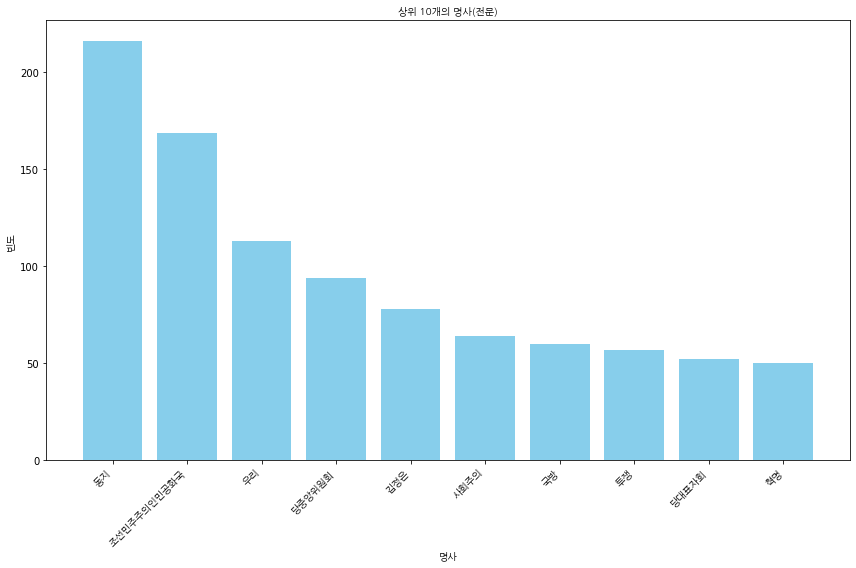

In [160]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_23end).most_common(10)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 10개의 명사(전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 20개 단어(전문)

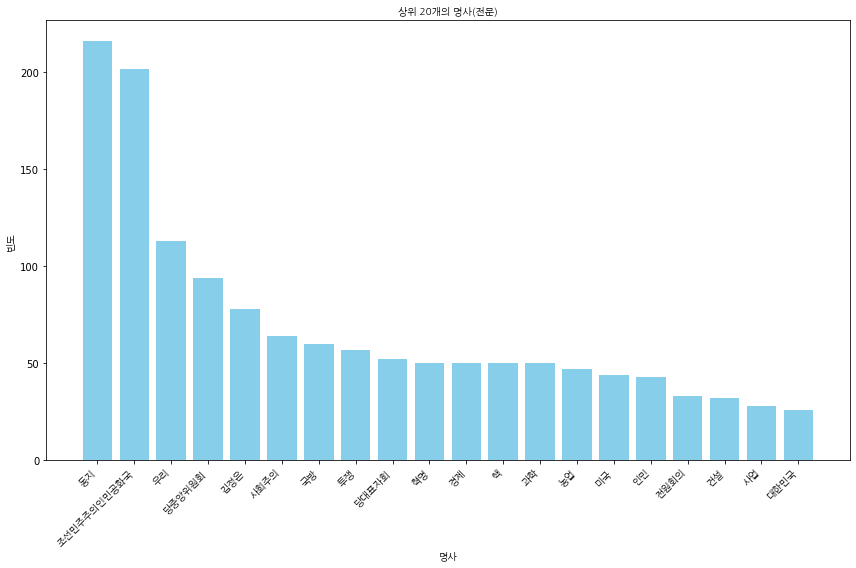

In [91]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_23end).most_common(20)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 20개의 명사(전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 30개 단어(전문)

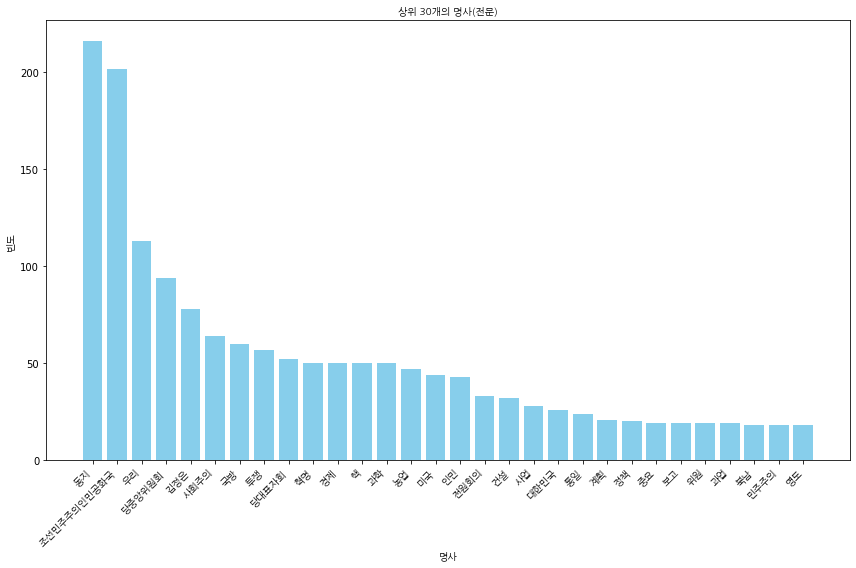

In [92]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_23end).most_common(30)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 30개의 명사(전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

# sheet2: 2023.1.1

In [80]:
df_23be = read_data(1,2) #sheet1: 2023.12.31

In [81]:
df_23be 

전문  \
0  가장 정의로운 사명과 원대한 리상을 안고 개척되고 전진하는 성스러운 조선혁명은 매 ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                               제목-서론  \
0  가장 정의로운 사명과 원대한 리상을 안고 개척되고 전진하는 성스러운 조선혁명은 매 ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                             정치-김씨일가  \
0  조선로동당 총비서이신 경애하는 김정은동지께서 전원회의에 참석하시였다.\n\n　　김정...   
1  1. 2022년도 주요당 및 국가정책들의 집행정형총화와 2023년도 사업계획에 대하여　　   
2                                            2. 조직문제   
3  4. 혁명학원들에 대한 당적지도를 강화할데 대하여\n\n　　5. 새시대 당건설의 5...   
4  \n　　전원회의는 상정된 의정들을 전원일치로 승인하였다.\n\n　　전원회의는 첫째 ...   
5  \n　　총비서동지께서는 2022년이 결코 무의미하지 않은 시간이였고 분명코 우리는 ...   

                                                  경제  \
0              3. 2022년도 국가예산집행정형과 2023년도 국가예산안에 대하여   
1  　　보고는 경제건설과 문화건설에서 이룩된 뚜렷한 성과들을 개괄하였다.\n\n　　건설...   
2  총비서동지께서는 국가경제의 안정적발전을 보장하며 인민생활향상에서 실제적인 변화를 가...   
3  총비서동지께서는 우리 당이 국가창건으로부터 사회주의건설의 전 행정에서 위대한 수령님...   
4                                                NaN   
5                                                NaN   

                                                과학기술  교육문화  \
0  보고에서는 인민경제발전과 인민생활향상에서 견인기적역할을 하는 과학기술의 중요성을 똑...   NaN   
1                                                NaN   NaN   
2                                                NaN   NaN   
3                                                NaN   NaN   
4                                                NaN   NaN   
5                                                NaN   NaN   

                                                  사회  \
0  보고는 2022년의 투쟁과정에 교육,보건을 비롯하여 사회주의문화건설의 각 방면에서 ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                                  국방  \
0  　가장 적중하고 가장 중대한 시기에 조선민주주의인민공화국 핵무력정책을 공식법화하여 ...   
1  　보고는 핵무력강화의 중요성을 강조하면서 우리의 핵무력은 전쟁억제와 평화안정수호를 ...   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                                정치-당  \
0  　총비서동지께서는 국가부흥발전의 강력한 추동력인 사회주의애국운동,혁명적인 대중운동을...   
1  　　총비서동지께서는 보고에서 우리 나라 국가사회제도를 공고발전시키고 그 우월성과 위...   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                                  외교  결론  
0  　　다사다변하고 격돌하는 국제정치정세의 흐름속에서도 우리 당의 국익수호,국위제고의 ... NaN  
1  \n　　보고에서는 북남관계의 현 상황과 지역의 평화와 안전을 엄중히 위협하는 외부적... NaN  
2  보고에서는 우리 혁명의 대외적환경에 대한 분석에 기초하여 대남,대외부문의 중심과업을... NaN  
3                                                NaN NaN  
4                                                NaN NaN  
5                                                NaN NaN

## 📌전문

### 데이터 불러오기

In [82]:
all = df_23be['전문'][0]

In [83]:
all

'가장 정의로운 사명과 원대한 리상을 안고 개척되고 전진하는 성스러운 조선혁명은 매 시기,매 단계마다 과학적인 진로와 명확한 실천방략을 제시하고 철저하고도 완벽한 집행에로 강력히 인도하는 조선로동당의 찬란한 향도의 손길에 의하여 그 줄기찬 상승발전이 확고히 담보되고있다.\n\n\u3000\u3000백전백승 조선로동당의 전투적기치따라 위대한 조선인민특유의 백절불굴의 정신과 견인불발의 투쟁력으로 전대미문의 온갖 도전과 위협들이 가득했던 2022년을 영예롭게 이겨낸 우리의 당원들과 근로자들,인민군장병들은 사회주의건설의 전면적발전에로 나아가는 거창한 행정에서 가장 어려운 고비를 완강하게,지혜롭게 돌파해온 나날들을 무한한 긍지와 자부심에 넘쳐 되새겨보고있다.\n\n\u3000\u3000시련에 찬 2022년에 우리 당과 인민은 자기 위업의 정당성과 자기의 존엄과 명예를 지켜 영웅적인 투쟁을 전개하여 조선의 잠재력,조선의 정신,조선혁명의 견결성을 힘있게 과시하였으며 뚜렷하고도 의미있는 진전을 이룩하는 과정을 통하여 자기 힘을 더 믿게 되고 변혁의 중심고리들을 더 명백히 찾아쥐게 되였으며 전면적인 발전의 로정도를 더 선명하게 설계하게 되였다.\n\n\u3000\u3000국가존망을 판가리하는 위험천만하고 급박한 고비들을 성공적으로 딛고 넘어 새로운 전진도약을 지향하는 오늘의 형세하에서 우리 혁명앞에는 의연 피할수도 에돌수도 없는 장애들이 버티고있으며 이는 오직 조선로동당의 정확하고 세련된 령도와 조선인민의 일치단합되고 강인하며 용감한 투쟁으로써만 타개하고 극복할수 있다.\n\n\u3000\u3000조선혁명의 불변지침인 자주,자립,자위의 사상을 철저히 구현하여 우리식 사회주의를 새로운 변혁과 발전에로 줄기차게 견인해나가기 위한 적극적이며 과학적인 정책방향을 확정명시함에 목적을 둔 조선로동당 중앙위원회 제8기 제6차전원회의 확대회의가 주체111(2022)년 12월 26일부터 31일까지 혁명의 최고참모부인 우리 당중앙위원회 본부에서 진행되였다.\n\n\u3000\u3000조선로동당

### 특수기호 일차적으로 제거

In [84]:
import re
all = re.sub(r'[()《》!]', ' ', all) #특수기호 제거, 정규 표현식  

### '\n\n'를 기준으로 문장 나누기

In [85]:
all = all.split('\n\n\u3000\u3000')

### 특수기호 이차적으로 ('1. ','2. ','3. ', '4. ' ,'\n' 등) 삭제

In [86]:
for idx,sent in enumerate(all):
    if '1. ' in sent or '2. 'in sent or '3. ' in sent or '4. ' in sent or '5. 'in sent or '6. 'in sent:
        all[idx] = sent[3:]

In [87]:
all_23be = []
for text in all:
    all_23be.append(re.sub(r'[\n\u3000]', ' ', text))

### 이름 추출

In [88]:
find_name = []
for sen in all_23be:
    if '동지' in sen :
        word = sen.split(' ')
        for char in word:
            if '동지' in char:
                name = char.split('동지')
                find_name.append(name[:-1])

In [89]:
find_name 

[['김정은'],
 ['김정은'],
 ['김정은'],
 ['김정은'],
 ['총비서'],
 ['김정은'],
 ['김정은'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서']]

In [90]:
name_23be = []
for i in find_name:
    for char in i:
        name_23be.append(char[-3:])

In [91]:
name_23be

['김정은',
 '김정은',
 '김정은',
 '김정은',
 '총비서',
 '김정은',
 '김정은',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서',
 '총비서']

#### 이름 빈도 구하기

In [92]:
name_extracted_nouns,texts_without_name  = [],[]
for text in all_23be:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,name_23be)
    name_extracted_nouns.append(extracted_nouns)
    texts_without_name.append(remaining_text)

In [93]:
word_frequencies_name = merge_synonyms_with_frequencies(name_extracted_nouns,synonym_dict)

In [94]:
from collections import Counter
word_frequencies_name_23be =  Counter(word_frequencies_name)

### 권력구조와 정치형태 관련 단어 사용자 정의 사전을 사용하여 명사 추출

In [95]:
user_defined_extracted_nouns,texts_without_user_nouns  = [],[]
for text in texts_without_name:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,user_defined_nouns)
    user_defined_extracted_nouns.append(extracted_nouns)
    texts_without_user_nouns.append(remaining_text)

In [96]:
user_defined_extracted_nouns

[[('조선로동당', 1), ('조선혁명', 1), ('리상', 1), ('집행', 1)],
 [('조선로동당', 1),
  ('인민군장병', 1),
  ('사회주의', 1),
  ('인민', 1),
  ('대미', 1),
  ('행정', 1),
  ('전투', 1),
  ('당원', 1),
  ('우리', 1),
  ('건설', 1),
  ('투쟁', 1)],
 [('조선혁명', 1), ('우리 당', 1), ('인민', 1), ('투쟁', 1)],
 [('조선로동당', 1),
  ('령도', 1),
  ('인민', 1),
  ('국가', 1),
  ('혁명', 1),
  ('우리', 1),
  ('투쟁', 1)],
 [('당 중앙위원회', 1),
  ('당중앙위원회', 1),
  ('최고참모부', 1),
  ('사회주의', 1),
  ('조선혁명', 1),
  ('확대회의', 1),
  ('전원회의', 1),
  ('우리식', 1),
  ('혁명', 1),
  ('정책', 1),
  ('우리', 1)],
 [('조선로동당', 1), ('전원회의', 1), ('동지', 1)],
 [('동지', 1)],
 [('사회주의', 1),
  ('우리 당', 1),
  ('전성기', 1),
  ('령도', 1),
  ('인민', 1),
  ('국가', 1),
  ('혁명', 2),
  ('동지', 1),
  ('수령', 1),
  ('우리', 2)],
 [('당 중앙위원회', 3),
  ('당중앙위원회', 1),
  ('후보위원', 2),
  ('중앙기관', 1),
  ('상무위원', 1),
  ('정치국', 2),
  ('시,군', 1),
  ('위원', 3),
  ('기관', 1)],
 [('당중앙위원회', 1), ('정치국', 1), ('위원', 1), ('집행', 1)],
 [('당 중앙위원회', 1), ('전원회의', 1), ('정치국', 1), ('동지', 1)],
 [('사회주의', 1),
  ('조선혁명', 1),
  ('우리 당', 1),
  ('대내외

#### 동의어 처리

In [97]:
word_frequencies_user_defined_nouns=merge_synonyms_with_frequencies(user_defined_extracted_nouns,synonym_dict)

#### 빈도수 구하기

In [98]:
word_frequencies_user = Counter(word_frequencies_user_defined_nouns)

In [99]:
texts_without_user_nouns

['가장 정의로운 사명과 원대한  을 안고 개척되고 전진하는 성스러운  은 매 시기,매 단계마다 과학적인 진로와 명확한 실천방략을 제시하고 철저하고도 완벽한  에로 강력히 인도하는  의 찬란한 향도의 손길에 의하여 그 줄기찬 상승발전이 확고히 담보되고있다.',
 '백전백승  의  적기치따라 위대한 조선 특유의 백절불굴의 정신과 견인불발의  력으로 전 문의 온갖 도전과 위협들이 가득했던 2022년을 영예롭게 이겨낸  의  들과 근로자들, 들은   의 전면적발전에로 나아가는 거창한  에서 가장 어려운 고비를 완강하게,지혜롭게 돌파해온 나날들을 무한한 긍지와 자부심에 넘쳐 되새겨보고있다.',
 '시련에 찬 2022년에  과  은 자기 위업의 정당성과 자기의 존엄과 명예를 지켜 영웅적인  을 전개하여 조선의 잠재력,조선의 정신, 의 견결성을 힘있게 과시하였으며 뚜렷하고도 의미있는 진전을 이룩하는 과정을 통하여 자기 힘을 더 믿게 되고 변혁의 중심고리들을 더 명백히 찾아쥐게 되였으며 전면적인 발전의 로정도를 더 선명하게 설계하게 되였다.',
 ' 존망을 판가리하는 위험천만하고 급박한 고비들을 성공적으로 딛고 넘어 새로운 전진도약을 지향하는 오늘의 형세하에서    앞에는 의연 피할수도 에돌수도 없는 장애들이 버티고있으며 이는 오직  의 정확하고 세련된  와 조선 의 일치단합되고 강인하며 용감한  으로써만 타개하고 극복할수 있다.',
 ' 의 불변지침인 자주,자립,자위의 사상을 철저히 구현하여    를 새로운 변혁과 발전에로 줄기차게 견인해나가기 위한 적극적이며 과학적인  방향을 확정명시함에 목적을 둔 조선로동  제8기 제6차   가 주체111 2022 년 12월 26일부터 31일까지  의  인     본부에서 진행되였다.',
 '   이신 경애하는   께서  에 참석하시였다.',
 '  께서 주석단에 등단하시자 폭풍같은  만세！ 의 환호성이 장내를 진감하였다.',
 '전체 참가자들은 주체 의 방향타를 억세게 틀어잡으시고 투철한 자주적신념과 비범한  활동으로 전당강화의  

### 불용어 제거

In [100]:
texts_without_stopwords=[]
for text in texts_without_user_nouns:
    remaining_text = remove_stopwords(text,stopwords)
    texts_without_stopwords.append(remaining_text)

In [101]:
texts_without_stopwords

['   정    사명  원대   을    개척   전진   성    은 매 시기,매 단계   과학   진로와 명확  실천방략을 제시   철저   완벽      강력히 인도      찬란  향도  손길     줄기찬 상승발전     담보    .',
 '백전백승     적기치  위대  조선 특유  백절불굴  정신  견인불발   력   전 문     도전  위협   가득했던   을 영예   이겨낸        근로자들,        전면적발전   나아   거창         어려운 고비를     ,지혜   돌파   나날   무한  긍지와 자부심   되새겨보고  .',
 '시련에 찬   에     은    위업  정당성      존엄  명예를 지켜 영웅    을 전개  조선  잠재력,조선  정신,   견결성을 힘   과시   뚜렷   의미   진전을 이룩   과정      힘을 더 믿게    변혁  중심고리   더 명백히 찾아쥐게    전면   발전  로정도를 더 선명   설계  .',
 ' 존망을 판가리   위험천만   급박  고비   성공   딛고 넘어     전진도약을 지향       형세하         의연 피  도 에돌수도    장애   버티고            정확   세련   와 조선   일치단합   강인   용감     만 타개   극복     .',
 '   불변지침인   ,자립,자위  사상을    구현     를     변혁  발전   줄기차게 견인해     적극    과학    방향을 확정명시함에 목적을 둔 조선로동                       2              인     본부   진행  .',
 '      경애         에 참석  .',
 '     주석단에 등단   폭풍    만세！   환호성  장내를 진감  .',
 '전체 참가자        방향타를 억세게 틀어잡으   투철    적신념  비범   활동   전당강화   를 펼치시며  위업을 비약   전면적발전   확신성   이끌어나가시는       위대   

#### '조선로동'이라는 단어는 단독으로 쓰인 단어가 아닌 '조선로동당 중앙위원회'와 같이 사용된 단어로 삭제한다.


In [102]:
sentences = []
for sentence in texts_without_stopwords:
    sentences.append(sentence.replace("조선로동", " "))

In [103]:
texts_without_stopwords = sentences

In [104]:
remaining_text = clean_text(texts_without_stopwords)

In [105]:
texts_without_stopwords = remaining_text

In [106]:
texts_without_stopwords

['사명 원대 개척 전진 시기,매 단계 과학 진로와 명확 실천방략을 제시 철저 완벽 강력히 인도 찬란 향도 손길 줄기찬 상승발전 담보 ',
 '백전백승 적기치 위대 조선 특유 백절불굴 정신 견인불발 도전 위협 가득했던 영예 이겨낸 근로자들, 전면적발전 나아 거창 어려운 고비를 ,지혜 돌파 나날 무한 긍지와 자부심 되새겨보고 ',
 '시련에 위업 정당성 존엄 명예를 지켜 영웅 전개 조선 잠재력,조선 정신, 견결성을 과시 뚜렷 의미 진전을 이룩 과정 힘을 믿게 변혁 중심고리 명백히 찾아쥐게 전면 발전 로정도를 선명 설계 ',
 '존망을 판가리 위험천만 급박 고비 성공 딛고 넘어 전진도약을 지향 형세하 의연 에돌수도 장애 버티고 정확 세련 조선 일치단합 강인 용감 타개 극복 ',
 '불변지침인 ,자립,자위 사상을 구현 변혁 발전 줄기차게 견인해 적극 과학 방향을 확정명시함에 목적을 본부 진행 ',
 '경애 참석 ',
 '주석단에 등단 폭풍 만세！ 환호성 장내를 진감 ',
 '전체 참가자 방향타를 억세게 틀어잡으 투철 적신념 비범 활동 전당강화 펼치시며 위업을 비약 전면적발전 확신성 이끌어나가시는 위대 영예와 승리 기치 우러러 최대 영광을 드리 ',
 '들, 회의에 부서 일군들,성, ,도급지도 ,중요공장,기업소 책임일군 방청 ',
 '선거 ',
 '사회를 위임 ',
 '경애 맞먹는 힘겨운 곤난 진통을 인내 전당 전체 열의를 고조 ,더 폭넓게 진척 온데 과정에 적환경 특수성을 파악 원칙 방법론,전진방향을 확증 고귀 경험으 ',
 '경험 교훈,실제적전진에 비약 진로를 밝히며 정확 효과 방략을 세워 발전 활로를 열고 신심 락관을 주는 계기 이를 위해 성원 책임성 적극성을 발휘하 개회를 선포 ',
 '의정 상정 ',
 '',
 '주요당 형총화와 사업 ',
 '조직문제 3. ',
 '학원 당적지도를 강화 ',
 '새시대 로선에 ',
 '',
 '상정 의정 전원일치 ',
 '의정 주요당 형총화와 사업 ',
 '의정 보고를 ',
 '보고 단결 간고 발전을 이룩 성과 ',
 '활동

### soynlp 명사 추출기 ( 이미 명사로 분류된 단어들은 제외)

In [107]:
from soynlp.noun import LRNounExtractor_v2
noun_extractor = LRNounExtractor_v2(verbose=True, extract_compound=True)
noun_extractor.train(texts_without_stopwords)
soynlp_nouns = noun_extractor.extract()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 772 from 72 sents. mem=0.187 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=995, mem=0.187 Gb
[Noun Extractor] batch prediction was completed for 266 words
[Noun Extractor] checked compounds. discovered 5 compounds
[Noun Extractor] postprocessing detaching_features : 71 -> 71
[Noun Extractor] postprocessing ignore_features : 71 -> 69
[Noun Extractor] postprocessing ignore_NJ : 69 -> 69
[Noun Extractor] 69 nouns (5 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.187 Gb                    
[Noun Extractor] 19.80 % eojeols are covered


In [108]:
#soynlp로 추출된 명사를 (명사,빈도수)로 저장
extracted_soynlp_words = {word:score.frequency for word,score in soynlp_nouns.items() if len(word) >= 2}
extracted_soynlp_words

{'총적방향': 2,
 '애국운동': 1,
 '공고발전': 2,
 '새시대': 3,
 '중요성': 3,
 '당사업': 2,
 '이겨': 2,
 '성과': 6,
 '평화': 2,
 '진로': 2,
 '영예': 2,
 '명예': 2,
 '강화': 9,
 '적대': 2,
 '목표': 2,
 '사명': 3,
 '경험': 4,
 '창건': 2,
 '줄기': 3,
 '발휘': 2,
 '견인': 1,
 '도전': 2,
 '전개': 4,
 '담보': 4,
 '형세': 2,
 '실행': 2,
 '변화': 4,
 '고비': 2,
 '기치': 2,
 '사회': 1,
 '과제': 3,
 '체계': 2,
 '문제': 2,
 '사상': 2,
 '원칙': 5,
 '위업': 2,
 '진전': 2,
 '변혁': 3,
 '중심': 2,
 '발전': 10,
 '방향': 2,
 '방법': 1,
 '사업': 8,
 '안전': 2,
 '전환': 4,
 '생산': 1,
 '전통': 3,
 '과정': 3,
 '분석': 2,
 '세계': 1,
 '안전담보': 1.0,
 '사업체계': 1.0,
 '강화발전': 1.0}

In [109]:
word_frequencies_soynlp=Counter(extracted_soynlp_words)

#### soynlp로 추출한 명사 데이터셋에서 삭제

In [110]:
#texts_without_stopwords에 삭제할 단어 저장
remove_word_soynlp = [ word for word in soynlp_nouns if len(word) >= 2]

In [111]:
#soynlp로 추출된 명사들을 texts_without_stopwords에서 삭제한다.
texts_without_soynlp=[]
for text in texts_without_stopwords:
    remaining_text = remove_stopwords(text,remove_word_soynlp)
    texts_without_soynlp.append(remaining_text)

In [112]:
texts_without_soynlp

['   원대 개척 전진 시기,매 단계 과학   와 명확 실천방략을 제시 철저 완벽 강력히 인도 찬란 향도 손길   찬 상승      ',
 '백전백승 적   위대 조선 특유 백절불굴 정신   불발    위협 가득했던      낸 근로자들, 전면적   나아 거창 어려운   를 ,지혜 돌파 나날 무한 긍지와 자부심 되새겨보고 ',
 '시련에    정당성 존엄   를 지켜 영웅    조선 잠재력,조선 정신, 견결성을 과시 뚜렷 의미   을 이룩    힘을 믿게      고리 명백히 찾아쥐게 전면    로정도를 선명 설계 ',
 '존망을 판가리 위험천만 급박    성공 딛고 넘어 전진도약을 지향   하 의연 에돌수도 장애 버티고 정확 세련 조선 일치단합 강인 용감 타개 극복 ',
 '불변지침인 ,자립,자위   을 구현         차게   해 적극 과학   을 확정명시함에 목적을 본부 진행 ',
 '경애 참석 ',
 '주석단에 등단 폭풍 만세！ 환호성 장내를 진감 ',
 '전체 참가자   타를 억세게 틀어잡으 투철 적신념 비범 활동 전당   펼치시며   을 비약 전면적   확신성 이끌어나가시는 위대   와 승리    우러러 최대 영광을 드리 ',
 '들, 회의에 부서 일군들,성, ,도급지도 ,중요공장,기업소 책임일군 방청 ',
 '선거 ',
 '  를 위임 ',
 '경애 맞먹는 힘겨운 곤난 진통을 인내 전당 전체 열의를 고조 ,더 폭넓게 진척 온데   에 적환경 특수성을 파악      론,전진  을 확증 고귀   으 ',
 '   교훈,실제적전진에 비약   를 밝히며 정확 효과 방략을 세워    활로를 열고 신심 락관을 주는 계기 이를 위해 성원 책임성 적극성을   하 개회를 선포 ',
 '의정 상정 ',
 '',
 '주요당 형총화와    ',
 '조직   3. ',
 '학원 당적지도를    ',
 '   로선에 ',
 '',
 '상정 의정 전원일치 ',
 '의정 주요당 형총화와    ',
 '의정 보고를 ',
 '보고 단결 간고   을 이룩    ',
 '활동 

In [113]:
remaining_text = clean_text(texts_without_soynlp)
    

In [114]:
remaining_text

['원대 개척 전진 시기,매 단계 과학 명확 실천방략을 제시 철저 완벽 강력히 인도 찬란 향도 손길 상승 ',
 '백전백승 위대 조선 특유 백절불굴 정신 불발 위협 가득했던 근로자들, 전면적 나아 거창 어려운 ,지혜 돌파 나날 무한 긍지와 자부심 되새겨보고 ',
 '시련에 정당성 존엄 지켜 영웅 조선 잠재력,조선 정신, 견결성을 과시 뚜렷 의미 이룩 힘을 믿게 고리 명백히 찾아쥐게 전면 로정도를 선명 설계 ',
 '존망을 판가리 위험천만 급박 성공 딛고 넘어 전진도약을 지향 의연 에돌수도 장애 버티고 정확 세련 조선 일치단합 강인 용감 타개 극복 ',
 '불변지침인 ,자립,자위 구현 차게 적극 과학 확정명시함에 목적을 본부 진행 ',
 '경애 참석 ',
 '주석단에 등단 폭풍 만세！ 환호성 장내를 진감 ',
 '전체 참가자 타를 억세게 틀어잡으 투철 적신념 비범 활동 전당 펼치시며 비약 전면적 확신성 이끌어나가시는 위대 승리 우러러 최대 영광을 드리 ',
 '들, 회의에 부서 일군들,성, ,도급지도 ,중요공장,기업소 책임일군 방청 ',
 '선거 ',
 '위임 ',
 '경애 맞먹는 힘겨운 곤난 진통을 인내 전당 전체 열의를 고조 ,더 폭넓게 진척 온데 적환경 특수성을 파악 론,전진 확증 고귀 ',
 '교훈,실제적전진에 비약 밝히며 정확 효과 방략을 세워 활로를 열고 신심 락관을 주는 계기 이를 위해 성원 책임성 적극성을 개회를 선포 ',
 '의정 상정 ',
 '',
 '주요당 형총화와 ',
 '조직 3. ',
 '학원 당적지도를 ',
 '로선에 ',
 '',
 '상정 의정 전원일치 ',
 '의정 주요당 형총화와 ',
 '의정 보고를 ',
 '보고 단결 간고 이룩 ',
 '활동 자체 괄목 이룩 ',
 '결정 완벽 당활동 지향 급격 준엄 국면 주도 령활 실천 전당 전체 전진 강력히 인도 과감 기민 대응 풍격을 유지 향도력을 세련 대오 단결 위력을 경지 승화 ',
 '전당 관건 중요고리 보강 실속 조치 백년,천년미래를 리론 정립 전도양양 강위력 무기 마련 ',
 '적

In [115]:
texts_without_soynlp = remaining_text

### 북한 용어사전을 활용하여 명사 추출

In [116]:
site_defined_extracted_nouns,texts_without_extracted_nouns = [],[]
for text in texts_without_soynlp:
    extracted_nouns, remaining_text = extract_site_defined_nouns(text,dict_site)
    site_defined_extracted_nouns.append(extracted_nouns)
    texts_without_extracted_nouns.append(remaining_text)

In [117]:
# 리스트 평탄화
site_defined_extracted_nouns = [item for sublist in site_defined_extracted_nouns for item in sublist]

print(site_defined_extracted_nouns)

['단계', '손길', '완벽', '원대', '천방', '향도', '로자', '보고', '부심', '불발', '정신', '조선', '로정도', '과시', '시련', '정당', '정신', '조선', '조선', '판가리', '세련', '장애', '조선', '자위', '지침', '주석단', '확신', '책임일군', '기업소', '도급', '일군', '곤난', '파악', '락관', '효과', '적지', '로선', '보고', '보고', '대오', '세련', '완벽', '향도', '리론', '마련', '양양', '전도', '각인', '과시', '법화', '자위', '적지', '해결', '보고', '대무', '보고', '가지', '대상', '련포', '장성', '창조', '화성', '기대', '보기', '전국', '간고분투', '무의', '전취', '정신', '창조', '리정표', '과시', '가지', '로정', '완수', '새길', '전망', '걸음', '규정', '략수', '보고', '완수', '장성', '활개', '기술신비주의', '토착병', '외피', '일군', '객관', '리지', '흥정', '술자', '정신', '략수', '방도', '보고', '장기', '지게', '지표', '거리', '세기', '세대', '세대', '화성', '구체화', '방도', '보고', '편의봉사', '경영', '모색', '방공', '현실', '단계', '보고', '방도', '보고', '운동', '든든히', '가지', '당조', '리고', '선차', '보고', '엄중', '자위', '류례', '류사', '리고', '세력', '일무', '전전', '공조', '수단', '아시', '올리', '대결', '세력', '정조', '보고', '정수', '간내', '단계', '단기', '보고', '구호', '동원', '실전', '보고', '일군', '대외', '대외', '보고', '대외', '랭전', '사수', '속화', '구체화', '리적', '보고', '고수', '대오', '리고', '일군', '간

In [118]:
word_frequencies_site = Counter(site_defined_extracted_nouns)

In [119]:
word_frequencies_site

Counter({'단계': 3,
         '손길': 1,
         '완벽': 2,
         '원대': 1,
         '천방': 1,
         '향도': 2,
         '로자': 1,
         '보고': 17,
         '부심': 1,
         '불발': 1,
         '정신': 4,
         '조선': 4,
         '로정도': 1,
         '과시': 3,
         '시련': 1,
         '정당': 1,
         '판가리': 1,
         '세련': 2,
         '장애': 1,
         '자위': 3,
         '지침': 1,
         '주석단': 1,
         '확신': 1,
         '책임일군': 1,
         '기업소': 1,
         '도급': 1,
         '일군': 4,
         '곤난': 1,
         '파악': 1,
         '락관': 1,
         '효과': 1,
         '적지': 2,
         '로선': 1,
         '대오': 2,
         '리론': 1,
         '마련': 1,
         '양양': 1,
         '전도': 1,
         '각인': 1,
         '법화': 1,
         '해결': 1,
         '대무': 1,
         '가지': 3,
         '대상': 1,
         '련포': 1,
         '장성': 2,
         '창조': 2,
         '화성': 2,
         '기대': 2,
         '보기': 1,
         '전국': 1,
         '간고분투': 1,
         '무의': 1,
         '전취': 1,
         '리정표': 1,


In [120]:
remaining_text = clean_text(texts_without_extracted_nouns)

In [121]:
remaining_text

['개척 전진 시기,매 과학 명확 략을 제시 철저 강력히 인도 찬란 상승 ',
 '백전백승 위대 특유 백절불굴 위협 가득했던 들, 전면적 나아 거창 어려운 ,지혜 돌파 나날 무한 긍지와 되새겨 ',
 '존엄 지켜 영웅 잠재력, 견결성을 뚜렷 의미 이룩 힘을 믿게 고리 명백히 찾아쥐게 전면 선명 설계 ',
 '존망을 위험천만 급박 성공 딛고 넘어 전진도약을 지향 의연 에돌수도 버티고 정확 일치단합 강인 용감 타개 극복 ',
 '불변 ,자립, 구현 차게 적극 과학 확정명시함에 목적을 본부 진행 ',
 '경애 참석 ',
 '등단 폭풍 만세！ 환호성 장내를 진감 ',
 '전체 참가자 타를 억세게 틀어잡으 투철 적신념 비범 활동 전당 펼치시며 비약 전면적 이끌어나가시는 위대 승리 우러러 최대 영광을 드리 ',
 '들, 회의에 부서 들,성, 지도 ,중요공장, 방청 ',
 '선거 ',
 '위임 ',
 '경애 맞먹는 힘겨운 진통을 인내 전당 전체 열의를 고조 ,더 폭넓게 진척 온데 적환경 특수성을 론,전진 확증 고귀 ',
 '교훈,실제적전진에 비약 밝히며 정확 방략을 세워 활로를 열고 신심 주는 계기 이를 위해 성원 책임성 적극성을 개회를 선포 ',
 '의정 상정 ',
 '',
 '주요당 형총화와 ',
 '조직 3. ',
 '학원 도를 ',
 '',
 '',
 '상정 의정 전원일치 ',
 '의정 주요당 형총화와 ',
 '의정 ',
 '단결 간고 이룩 ',
 '활동 자체 괄목 이룩 ',
 '결정 당활동 지향 급격 준엄 국면 주도 령활 실천 전당 전체 전진 강력히 인도 과감 기민 대응 풍격을 유지 력을 단결 위력을 경지 승화 ',
 '전당 관건 중요고리 보강 실속 조치 백년,천년미래를 정립 강위력 무기 ',
 '적중 중대 시기에 공식 구축 전략 위를 명백히 투철 정치구도 주도 보나, 궤도를 높이에 올려세운 정치적사변 위력을 가진다. ',
 '달성 ',
 '강세를 확실 력을 키운 정부, 크나큰 자부 ',
 '다사다변 격돌 국제정치 흐름 수호, 제고 기본 훌륭히 관철됨 전략적구상 

In [122]:
texts_without_extracted_nouns = remaining_text

### Mecab 명사 추출기(이미 명사로 분류된 단어들은 제외)

In [123]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab_nouns = []
for text in texts_without_extracted_nouns:
    mecab_nouns += mecab.nouns(text)

In [124]:
mecab_nouns

['개척',
 '전진',
 '시기',
 '과학',
 '제시',
 '철저',
 '인도',
 '찬란',
 '상승',
 '백전백승',
 '위대',
 '특유',
 '백절불굴',
 '위협',
 '전면',
 '나아',
 '지혜',
 '돌파',
 '나날',
 '무한',
 '긍지',
 '존엄',
 '영웅',
 '잠재력',
 '견결',
 '힘',
 '고리',
 '전면',
 '선명',
 '설계',
 '존망',
 '위험',
 '천만',
 '급박',
 '성공',
 '전진',
 '도약',
 '지향',
 '연',
 '수',
 '정확',
 '일치',
 '단합',
 '강인',
 '감',
 '타개',
 '극복',
 '불변',
 '자립',
 '구현',
 '차게',
 '적극',
 '과학',
 '확정',
 '명시',
 '목적',
 '본부',
 '진행',
 '경애',
 '참석',
 '등단',
 '폭풍',
 '만세',
 '환호성',
 '장내',
 '진감',
 '전체',
 '참가자',
 '타',
 '신념',
 '활동',
 '전당',
 '비약',
 '전면',
 '위대',
 '승리',
 '최대',
 '영광',
 '드리',
 '회의',
 '부서',
 '성',
 '지도',
 '중요',
 '공장',
 '방청',
 '선거',
 '위임',
 '경애',
 '진통',
 '인내',
 '전당',
 '전체',
 '열의',
 '고조',
 '척',
 '데',
 '환경',
 '특수',
 '전진',
 '확증',
 '고귀',
 '교훈',
 '실제',
 '전진',
 '비약',
 '정확',
 '방략',
 '활로',
 '계기',
 '이',
 '성원',
 '책임',
 '적극',
 '개회',
 '선포',
 '의정',
 '상정',
 '주요',
 '당',
 '총화',
 '조직',
 '학원',
 '도',
 '상정',
 '전원',
 '일치',
 '의정',
 '주요',
 '당',
 '총화',
 '의정',
 '단결',
 '간고',
 '활동',
 '자체',
 '괄목',
 '룩',
 '결정',
 '활동',
 '지향',
 '국면',
 '주도',
 '령',

In [125]:
mecab_nouns_clean = []
for char in mecab_nouns:
    if len(char)>1:
        mecab_nouns_clean.append(char)

In [126]:
mecab_nouns = [map_to_synonym(noun, synonym_dict) for noun in mecab_nouns_clean] #동의어 처리

In [127]:
#단어 빈도수 계산
from collections import Counter
word_frequencies_mecab = Counter(mecab_nouns)
word_frequencies_mecab

Counter({'개척': 1,
         '전진': 7,
         '시기': 3,
         '과학': 4,
         '제시': 8,
         '철저': 1,
         '인도': 2,
         '찬란': 1,
         '상승': 1,
         '백전백승': 1,
         '위대': 6,
         '특유': 1,
         '백절불굴': 1,
         '위협': 3,
         '전면': 3,
         '나아': 1,
         '지혜': 1,
         '돌파': 1,
         '나날': 1,
         '무한': 1,
         '긍지': 1,
         '존엄': 4,
         '영웅': 1,
         '잠재력': 1,
         '견결': 1,
         '고리': 2,
         '선명': 1,
         '설계': 1,
         '존망': 1,
         '위험': 2,
         '천만': 2,
         '급박': 1,
         '성공': 1,
         '도약': 1,
         '지향': 2,
         '정확': 2,
         '일치': 2,
         '단합': 1,
         '강인': 2,
         '타개': 2,
         '극복': 2,
         '불변': 1,
         '자립': 2,
         '구현': 2,
         '차게': 1,
         '적극': 4,
         '확정': 1,
         '명시': 3,
         '목적': 1,
         '본부': 1,
         '진행': 1,
         '경애': 2,
         '참석': 1,
         '등단': 1,
         '폭풍': 1,
     

In [128]:
texts_without_mecab=[]
for text in texts_without_extracted_nouns:
    remaining_text = remove_stopwords(text,mecab_nouns)
    texts_without_mecab.append(remaining_text)

In [129]:
texts_without_mecab

['        ,매    명확 략을         히          ',
 '               가득했던 들,   적    거창 어려운 ,              와 되새겨 ',
 '   지켜      ,   성을 뚜렷 의미 이룩 힘을 믿게    명백히 찾아쥐게          ',
 '  을            딛고 넘어     을    의연 에돌   버티고            용감       ',
 '   ,  ,                 함에   을       ',
 '      ',
 '        ！      를    ',
 '      타를 억세게 틀어잡으 투철 적   비범       펼치시며      적 이끌어나가시는       우러러      을    ',
 '들,   에    들,성,    ,    ,    ',
 '   ',
 '   ',
 '   맞먹는 힘겨운   을            를    ,더 폭넓게 진척 온데 적     성을 론,         ',
 '  ,  적  에    밝히며      을 세워   를 열고 신심 주는    이를 위해      성   성을   를    ',
 '      ',
 '',
 '  당 형  와 ',
 '   3. ',
 '   도를 ',
 '',
 '',
 '           ',
 '     당 형  와 ',
 '   ',
 '      이룩 ',
 '         이룩 ',
 '   당      급격 준엄       령활               히    과감         을    력을      을       ',
 '                    백년,천년  를    강      ',
 '        에          위를 명백히 투철         보나,   를   에 올려세운   적     을 가진다. ',
 '   ',
 '  를 확실 력을 키운   , 크나큰    ',
 '                  ,       훌륭히   됨   적     대    

### 모두 합하기

In [130]:
word_frequencies_all_23be = word_frequencies_mecab+word_frequencies_soynlp+word_frequencies_name_23be+word_frequencies_site+word_frequencies_user

In [131]:
combined_all_23be = merge_frequencies_with_synonyms(word_frequencies_all_23be, synonym_dict)
combined_all_23be

{'농촌': 6,
 '농업': 8,
 '혁명': 42,
 '사회주의': 46,
 '조선민주주의인민공화국': 78,
 '괴뢰': 1,
 '대한민국': 8,
 '김정은': 42,
 '북남': 2,
 '미국': 12,
 '우리': 46,
 '조선로동당': 10,
 '당중앙위원회': 22,
 '당대표자회': 8,
 '경제': 26,
 '핵': 22,
 '국방': 30,
 '과학': 18,
 '우주': 4,
 '력사': 6,
 '제국주의': 1,
 '애국': 4,
 '동지': 40,
 '영도': 8,
 '정치사상': 4,
 '문명': 1,
 '수산업': 1,
 '일꾼': 2,
 '개척': 1,
 '전진': 7,
 '시기': 3,
 '제시': 8,
 '철저': 1,
 '인도': 2,
 '찬란': 1,
 '상승': 1,
 '백전백승': 1,
 '위대': 6,
 '특유': 1,
 '백절불굴': 1,
 '위협': 3,
 '전면': 3,
 '나아': 1,
 '지혜': 1,
 '돌파': 1,
 '나날': 1,
 '무한': 1,
 '긍지': 1,
 '존엄': 4,
 '영웅': 1,
 '잠재력': 1,
 '견결': 1,
 '고리': 2,
 '선명': 1,
 '설계': 1,
 '존망': 1,
 '위험': 2,
 '천만': 2,
 '급박': 1,
 '성공': 1,
 '도약': 1,
 '지향': 2,
 '정확': 2,
 '일치': 2,
 '단합': 1,
 '강인': 2,
 '타개': 2,
 '극복': 2,
 '불변': 1,
 '자립': 2,
 '구현': 2,
 '차게': 1,
 '적극': 4,
 '확정': 1,
 '명시': 3,
 '목적': 1,
 '본부': 1,
 '진행': 1,
 '경애': 2,
 '참석': 1,
 '등단': 1,
 '폭풍': 1,
 '만세': 1,
 '환호성': 1,
 '장내': 1,
 '진감': 1,
 '전체': 4,
 '참가자': 1,
 '신념': 1,
 '활동': 4,
 '전당': 4,
 '비약': 2,
 '승리': 5,
 '최대': 2,
 '영광': 1,
 '

In [132]:
doc_word_freq['23be'] = combined_all_23be
update_excel_with_new_doc(doc_word_freq, file_path)

Excel 파일이 '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'로 업데이트되었습니다.


### 단어 빈도 시각화

#### 상위 10개 단어(전문)

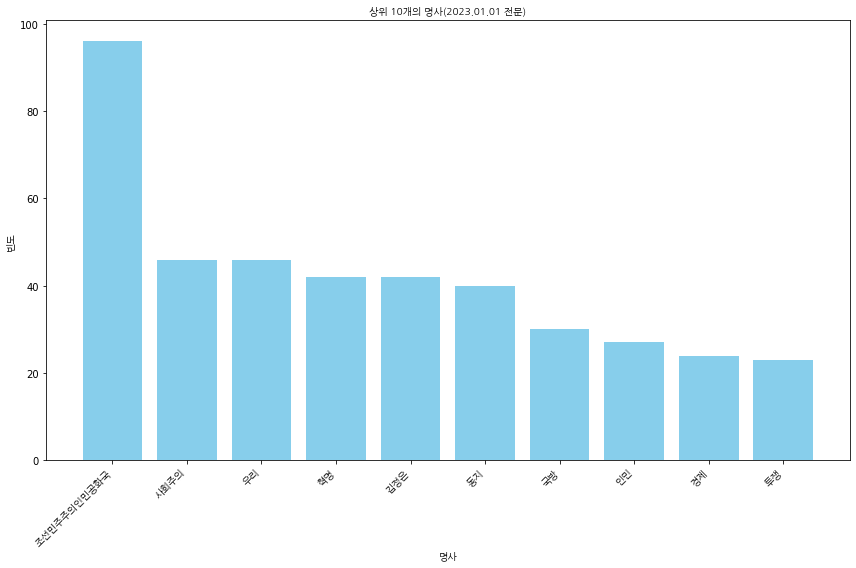

In [144]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_23be).most_common(10)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 10개의 명사(2023.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 20개 단어(전문)

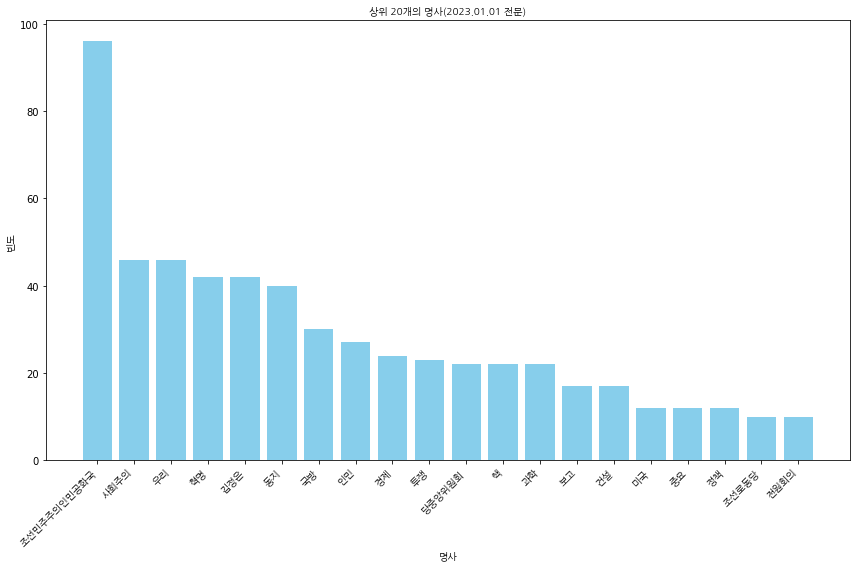

In [145]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_23be).most_common(20)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 20개의 명사(2023.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 30개 단어(전문)

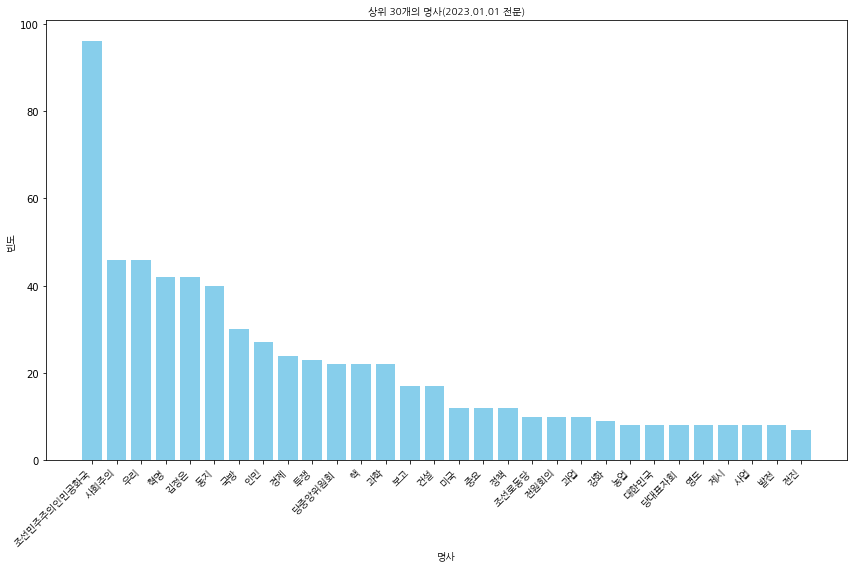

In [146]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_23be).most_common(30)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 30개의 명사(2023.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

# sheet3: 2022.1.1

In [133]:
df_22be = read_data(2,3)

In [134]:
df_22be 

전문  \
0  전원회의는 전당, 전국, 전민이 당 제8차대회가 제시한 웅대한 전략사상과 실천강령을...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                               제목-서론  \
0  전원회의는 전당, 전국, 전민이 당 제8차대회가 제시한 웅대한 전략사상과 실천강령을...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                             정치-김씨일가  \
0    1. 2021년도 주요당 및 국가정책들의 집행정형총화와 2022년도 사업계획에 대하여   
1  당대회가 열린 올해 수많은 청년들이 어렵고 힘든 부문에 탄원진출하고 사람들을 감동시...   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                                  경제  \
0              2. 2021년도 국가예산집행정형과 2022년도 국가예산안에 대하여   
1            3. 우리 나라 사회주의농촌문제의 옳바른 해결을 위한 당면과업에 대하여   
2  전원회의는 상정된 의정들을 전원일치로 승인하였다.\n\n전원회의는 첫째 의정토의로 ...   
3  내각을 비롯한 경제지도기관들에서 경제사업에 대한 국가의 통일적지도와 통제를 강화하고...   
4  다음해 우리 당과 인민앞에 나서는 기본과업은 5개년계획수행의 확고한 담보를 구축하고...   
5  전원회의는 둘째 의정토의에서 국가예산심의조가 검토하여 제기한 2021년도 국가예산집...   

                                                과학기술  \
0  결론에서는 과학과 교육, 보건을 비롯한 문화분야의 사업을 혁신하여 사회주의건설의 전...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                                교육문화  \
0  교육부문에서는 우리의 교육을 미래를 마음놓고 떠맡길수 있는 가장 우월한 교육, 리상...   
1  문학예술부문에서는 창작가, 예술인들의 사상관점과 창작태도, 창조방식을 근본적으로 혁...   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                                  사회  \
0  다음해 보건사업의 기본방향을 인민들에 대한 의료봉사의 질을 더욱 높일수 있는 확실한...   
1  결론은 비상방역사업을 국가사업의 제1순위로 놓고 사소한 해이나 빈틈, 허점도 없이 ...   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                                  국방  \
0  국방공업부문에서 자기의 정확한 발전계획에 따라 첨단무기체계들을 련속 개발해내면서 우...   
1  총비서동지께서는 국방부문앞에 나서는 전투적과업들을 제시하시였다.\n\n날로 불안정해...   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                                정치-당  \
0  4. 당규약의 일부 조항을 수정할데 대하여\n\n5. 당중앙지도기관 성원들의 202...   
1  사회주의적인 생활, 사회주의적인 발전을 지향하는 전인민적인 공통된 사상의식이 보다 ...   
2  결론에서는 전당적, 전국가적, 전사회적으로 반사회주의, 비사회주의와의 투쟁을 보다 ...   
3  결론에서는 사회주의건설의 새 승리를 위한 중대한 투쟁과업을 성과적으로 수행하기 위하...   
4  전원회의는 넷째 의정에 대한 당중앙지도기관 성원들의 충분한 사전연구를 통하여 당규약...   
5                                                NaN   

                                                  외교  \
0  \n결론은 다사다변한 국제정치정세와 주변환경에 대처하여 북남관계와 대외사업부문에서 ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                                  결론  
0  \n5일간에 걸쳐 혁명적열의속에 진행된 조선로동당 중앙위원회 제8기 제4차전원회의는...  
1         

## 📌전문

### 데이터 불러오기

In [135]:
all = df_22be['전문'][0]

In [136]:
all

'전원회의는 전당, 전국, 전민이 당 제8차대회가 제시한 웅대한 전략사상과 실천강령을 받들어 5개년계획수행의 첫해를 자랑찬 승리로 빛내이고 사회주의건설의 전면적발전을 향한 다음단계의 투쟁에로 신심드높이 이행하고있는 력사적인 시기에 소집되였다.\n\n조선로동당 총비서이신 경애하는 김정은동지께서 전원회의에 참석하시였다.\n\n김정은동지께서 회의장 주석단에 등단하시자 전체 참가자들은 비상한 사상리론적예지로 사회주의 새 승리의 표대를 세워주시고 온 한해 정력적인 령도활동으로 국가부흥의 튼튼한 기틀을 마련해주신 우리 당과 인민의 탁월한 령도자이시며 우리 국가의 강대성의 상징이신 김정은동지를 우러러 열광의 환호를 터쳐올리였다.\n\n전원회의에는 조선로동당 중앙위원회 위원, 후보위원들이 참가하였다.\n\n당중앙위원회 부서 일군들과 성,중앙기관, 도급지도적기관과 시, 군, 중요공장, 기업소 책임일군들, 해당 중요부문 일군들이 방청하였다.\n\n당중앙위원회 정치국 위원들로 집행부가 구성되였다.\n\n당중앙위원회 정치국은 김정은동지께 전원회의 사회를 위임하였다.\n\n김정은동지께서는 이번 전원회의소집의 기본목적과 그 의의, 중요성에 대하여 언급하시고 력사적인 당 제8차대회 결정관철의 첫해인 2021년도 당 및 국가사업에 대한 당중앙위원회적인 분석과 평가를 내리시였다.\n\n총비서동지께서는 당대회가 제시한 발전과 변혁의 5개년계획을 수행함에 있어서 지금의 한해한해의 사업은 사회주의건설의 발전적단계에 있어서나 우리 당과 국가의 현실적조건과 환경에 있어서 대단히 관건적이고 중요한 의의를 가진다고 하시면서 이번 전원회의를 통하여 우리모두는 올해 사업 못지 않게 방대하고도 중대한 다음해 사업의 전략적중요성에 대해 자각하면서 무겁고도 책임적인 고민을 마주하게 될것이라고 하시였다.\n\n총비서동지께서는 올해의 투쟁을 통하여 우리는 현재 우리가 마주하고있고 또 앞으로 직면하게 될 혁명의 주객관적조건과 환경을 보다 선명하게 예측할수 있게 되였으며 우리가 할수 있는것들을 잘 알고 우리의 가능성과

### 특수기호 일차적으로 제거

In [137]:
import re
all = re.sub(r'[()《》!]', ' ', all) #특수기호 제거, 정규 표현식  

### '\n\n'를 기준으로 문장 나누기

In [138]:
all = all.split('\n\n')

### 특수기호 이차적으로 ('1. ','2. ','3. ', '4. ' ,'\n' 등) 삭제

In [139]:
for idx,sent in enumerate(all):
    if ('1. ' in sent) or ('2. ' in sent) or ('3. ' in sent) or ('4. ' in sent) or ('5. 'in sent) or ('6. 'in sent):
        all[idx] = sent[3:]

In [140]:
all_22be = []
for text in all:
    all_22be.append(re.sub(r'[\n]', ' ', text))

In [141]:
all_22be 

['전원회의는 전당, 전국, 전민이 당 제8차대회가 제시한 웅대한 전략사상과 실천강령을 받들어 5개년계획수행의 첫해를 자랑찬 승리로 빛내이고 사회주의건설의 전면적발전을 향한 다음단계의 투쟁에로 신심드높이 이행하고있는 력사적인 시기에 소집되였다.',
 '조선로동당 총비서이신 경애하는 김정은동지께서 전원회의에 참석하시였다.',
 '김정은동지께서 회의장 주석단에 등단하시자 전체 참가자들은 비상한 사상리론적예지로 사회주의 새 승리의 표대를 세워주시고 온 한해 정력적인 령도활동으로 국가부흥의 튼튼한 기틀을 마련해주신 우리 당과 인민의 탁월한 령도자이시며 우리 국가의 강대성의 상징이신 김정은동지를 우러러 열광의 환호를 터쳐올리였다.',
 '전원회의에는 조선로동당 중앙위원회 위원, 후보위원들이 참가하였다.',
 '당중앙위원회 부서 일군들과 성,중앙기관, 도급지도적기관과 시, 군, 중요공장, 기업소 책임일군들, 해당 중요부문 일군들이 방청하였다.',
 '당중앙위원회 정치국 위원들로 집행부가 구성되였다.',
 '당중앙위원회 정치국은 김정은동지께 전원회의 사회를 위임하였다.',
 '김정은동지께서는 이번 전원회의소집의 기본목적과 그 의의, 중요성에 대하여 언급하시고 력사적인 당 제8차대회 결정관철의 첫해인 2021년도 당 및 국가사업에 대한 당중앙위원회적인 분석과 평가를 내리시였다.',
 '총비서동지께서는 당대회가 제시한 발전과 변혁의 5개년계획을 수행함에 있어서 지금의 한해한해의 사업은 사회주의건설의 발전적단계에 있어서나 우리 당과 국가의 현실적조건과 환경에 있어서 대단히 관건적이고 중요한 의의를 가진다고 하시면서 이번 전원회의를 통하여 우리모두는 올해 사업 못지 않게 방대하고도 중대한 다음해 사업의 전략적중요성에 대해 자각하면서 무겁고도 책임적인 고민을 마주하게 될것이라고 하시였다.',
 '총비서동지께서는 올해의 투쟁을 통하여 우리는 현재 우리가 마주하고있고 또 앞으로 직면하게 될 혁명의 주객관적조건과 환경을 보다 선명하게 예측할수 있게 되였으며 우리가 할수 있는것들을 잘 알

### 이름 추출

In [142]:
find_name = []
for sen in all_22be:
    if '동지' in sen :
        word = sen.split(' ')
        for char in word:
            if '동지' in char:
                name = char.split('동지')
                find_name.append(name[:-1])


In [143]:
find_name 

[['김정은'],
 ['김정은'],
 ['김정은'],
 ['김정은'],
 ['김정은'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['김덕훈'],
 ['김정은'],
 ['총비서'],
 ['총비서'],
 ['김정은'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['김정은'],
 ['김정은'],
 ['김정은'],
 ['김정은'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['총비서'],
 ['김정은'],
 ['김정은'],
 ['김일성'],
 ['김정일']]

In [144]:
name_22be = []
for i in find_name:
    for char in i:
        name_22be.append(char[-3:])

In [145]:
name_extracted_nouns,texts_without_name  = [],[]
for text in all_22be:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,name_22be)
    name_extracted_nouns.append(extracted_nouns)
    texts_without_name.append(remaining_text)

In [146]:
word_frequencies_name =merge_synonyms_with_frequencies(name_extracted_nouns,synonym_dict)

In [147]:
word_frequencies_name

{'김정은': 40, '김덕훈': 1, '김일성': 1, '김정일': 1}

In [148]:
from collections import Counter
word_frequencies_name_22be = Counter(word_frequencies_name)

### 권력구조와 정치형태 관련 단어 사용자 정의 사전을 사용하여 명사 추출

In [149]:
user_defined_extracted_nouns,texts_without_user_nouns  = [],[]
for text in texts_without_name:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,user_defined_nouns)
    user_defined_extracted_nouns.append(extracted_nouns)
    texts_without_user_nouns.append(remaining_text)

In [150]:
user_defined_extracted_nouns

[[('사회주의', 1),
  ('전원회의', 1),
  ('력사적', 1),
  ('대회', 1),
  ('계획', 1),
  ('건설', 1),
  ('투쟁', 1)],
 [('조선로동당', 1), ('전원회의', 1), ('동지', 1)],
 [('사회주의', 1),
  ('우리 당', 1),
  ('령도', 2),
  ('인민', 1),
  ('국가', 2),
  ('동지', 2),
  ('우리', 1)],
 [('당 중앙위원회', 1), ('후보위원', 1), ('전원회의', 1), ('위원', 1)],
 [('당중앙위원회', 1), ('중앙기관', 1), ('기관', 1)],
 [('당중앙위원회', 1), ('정치국', 1), ('위원', 1), ('집행', 1)],
 [('당중앙위원회', 1), ('전원회의', 1), ('정치국', 1), ('동지', 1)],
 [('당중앙위원회', 1), ('전원회의', 1), ('력사적', 1), ('국가', 1), ('동지', 1), ('대회', 1)],
 [('사회주의', 1),
  ('우리 당', 1),
  ('전원회의', 1),
  ('당대회', 1),
  ('국가', 1),
  ('동지', 1),
  ('계획', 1),
  ('우리', 1),
  ('건설', 1)],
 [('혁명', 1), ('동지', 1), ('우리', 4), ('투쟁', 1)],
 [('대내외', 1), ('투쟁', 2)],
 [('전원회의', 1), ('혁명', 2), ('동지', 1), ('정책', 1), ('우리', 3)],
 [('당중앙위원회', 1), ('사회주의', 1), ('계획', 1), ('토의', 1), ('건설', 1)],
 [('전원회의', 1)],
 [('국가', 1), ('행정', 1), ('계획', 1), ('정책', 1)],
 [('국가예산', 2), ('행정', 1)],
 [('사회주의', 1), ('과업', 1), ('나라', 1), ('우리', 1), ('제의', 1)],
 [('당규약', 1)],

#### 동의어 처리

In [151]:
word_frequencies_user_defined_nouns=merge_synonyms_with_frequencies(user_defined_extracted_nouns,synonym_dict)

#### 빈도수 구하기

In [152]:
word_frequencies_user = Counter(word_frequencies_user_defined_nouns)

In [153]:
texts_without_user_nouns

[' 는 전당, 전국, 전민이 당 제8차 가 제시한 웅대한 전략사상과 실천강령을 받들어 5개년 수행의 첫해를 자랑찬 승리로 빛내이고   의 전면적발전을 향한 다음단계의  에로 신심드높이 이행하고있는  인 시기에 소집되였다.',
 '   이신 경애하는   께서  에 참석하시였다.',
 '  께서 회의장 주석단에 등단하시자 전체 참가자들은 비상한 사상리론적예지로   새 승리의 표대를 세워주시고 온 한해 정력적인  활동으로  부흥의 튼튼한 기틀을 마련해주신  과  의 탁월한  자이시며    의 강대성의 상징이신   를 우러러 열광의 환호를 터쳐올리였다.',
 ' 에는 조선로동   ,  들이 참가하였다.',
 '  부서 일군들과 성, , 도급지도적 과 시, 군, 중요공장, 기업소 책임일군들, 해당 중요부문 일군들이 방청하였다.',
 '     들로  부가 구성되였다.',
 '   은   께   사회를 위임하였다.',
 '  께서는 이번  소집의 기본목적과 그 의의, 중요성에 대하여 언급하시고  인 당 제8차  결정관철의 첫해인 2021년도 당 및  사업에 대한  적인 분석과 평가를 내리시였다.',
 '  께서는  가 제시한 발전과 변혁의 5개년 을 수행함에 있어서 지금의 한해한해의 사업은   의 발전적단계에 있어서나  과  의 현실적조건과 환경에 있어서 대단히 관건적이고 중요한 의의를 가진다고 하시면서 이번  를 통하여  모두는 올해 사업 못지 않게 방대하고도 중대한 다음해 사업의 전략적중요성에 대해 자각하면서 무겁고도 책임적인 고민을 마주하게 될것이라고 하시였다.',
 '  께서는 올해의  을 통하여  는 현재  가 마주하고있고 또 앞으로 직면하게 될  의 주객관적조건과 환경을 보다 선명하게 예측할수 있게 되였으며  가 할수 있는것들을 잘 알고  의 가능성과 자신심을 더욱 명확히 가지게 되였다고 하시였다.',
 '지금의  형세를 정확히 리해하고 정확히 판단하며 정확한  방침을 틀어쥐고 정확한 방향을 따라 정확한 걸음을 옮겨디뎌야만 실제적인 발전적변화로써 다음단계의 

### 불용어 제거

In [154]:
texts_without_stopwords=[]
for text in texts_without_user_nouns:
    remaining_text = remove_stopwords(text,stopwords)
    texts_without_stopwords.append(remaining_text)

In [155]:
texts_without_stopwords

[' 는 전당, 전국, 전민  당      제시  웅대  전략사상  실천강령       수행  첫해를 자랑찬 승리  빛내       전면적발전을 향    단계      신심드높  이행    인 시기에 소집  .',
 '      경애         에 참석  .',
 '     회의장 주석단에 등단   전체 참가자   비상  사상리론적예지      승리  표대를 세워주   온    정력    활동    부흥  튼튼  기틀을 마련해         탁월   자        강대성  상징     를 우러러 열광  환호를 터쳐올리  .',
 '    조선로동   ,     참   .',
 '  부서 일군   성, , 도급지도    시, 군, 중요공장, 기업소 책임일군들, 해당 중요   일군   방청  .',
 '         부  구성  .',
 '   은   께   사회를 위임  .',
 '         소집  기본목     의의, 중요성에    언급    인 당     결정관철  첫해인   도 당 및  사업       분석  평가를 내리시  .',
 '        제시  발전  변혁      을 수행함에              사업은     발전적단계에           현실적조건  환경에    대단히 관건    중요  의의를           를       는    사업 못지 않게 방대   중대    해 사업  전략적중요성   자    무겁고도 책임   고민을      될     .',
 '             는              또 앞   직면   될    주객관적조건  환경을    선명   예측            할    을   알고    가능성    심을    명확히 가지게   고   .',
 '     형세를    리해      판단   정확   방침을 틀어쥐고 정확  방향   정확  걸음을 옮겨디뎌야만 실제   발전적변화     단계      이행     고   .',
 '        사업을 긍지   총화     시점  도  는    

#### '조선로동'이라는 단어는 단독으로 쓰인 단어가 아닌 '조선로동당 중앙위원회'와 같이 사용된 단어로 삭제한다.


In [156]:
sentences = []
for sentence in texts_without_stopwords:
    sentences.append(sentence.replace("조선로동", " "))
    

In [157]:
texts_without_stopwords = sentences

In [158]:
remaining_text = clean_text(texts_without_stopwords)

In [159]:
texts_without_stopwords = remaining_text

### soynlp 명사 추출기 ( 이미 명사로 분류된 단어들은 제외)

In [160]:
from soynlp.noun import LRNounExtractor_v2
noun_extractor = LRNounExtractor_v2(verbose=True, extract_compound=True)
noun_extractor.train(texts_without_stopwords)
soynlp_nouns = noun_extractor.extract()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 1429 from 166 sents. mem=0.185 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=2285, mem=0.185 Gb
[Noun Extractor] batch prediction was completed for 477 words
[Noun Extractor] checked compounds. discovered 15 compounds
[Noun Extractor] postprocessing detaching_features : 158 -> 158
[Noun Extractor] postprocessing ignore_features : 158 -> 154
[Noun Extractor] postprocessing ignore_NJ : 154 -> 154
[Noun Extractor] 154 nouns (15 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.185 Gb                    
[Noun Extractor] 33.44 % eojeols are covered


In [161]:
#soynlp로 추출된 명사를 (명사,빈도수)로 저장
extracted_soynlp_words = {word:score.frequency for word,score in soynlp_nouns.items() if len(word) >= 2}
extracted_soynlp_words

{'농촌발전전략': 4,
 '전면적발전': 9,
 '비약적발전': 1,
 '세기적숙망': 2,
 '농촌문제': 2,
 '조직문제': 2,
 '중대조치': 2,
 '황해남도': 2,
 '농업생산': 9,
 '실천강령': 3,
 '기계수단': 3,
 '알곡생산': 1,
 '도덕기풍': 2,
 '농촌마을': 5,
 '집단주의': 2,
 '발전궤도': 1,
 '이루어': 1,
 '해결방': 1,
 '실천적': 1,
 '밀농사': 1,
 '기계화': 1,
 '과학성': 1,
 '정확성': 2,
 '현대성': 1,
 '안전성': 2,
 '문화성': 1,
 '정치성': 2,
 '당사업': 3,
 '중요성': 3,
 '현대전': 2,
 '목표': 7,
 '지도': 5,
 '단계': 5,
 '환호': 3,
 '성과': 7,
 '지지': 1,
 '단위': 4,
 '주의': 2,
 '남새': 1,
 '제도': 2,
 '의지': 1,
 '제공': 2,
 '이룩': 14,
 '열어': 2,
 '다그': 8,
 '발전': 16,
 '전개': 6,
 '달성': 2,
 '자랑': 5,
 '평가': 1,
 '추동': 4,
 '해결': 10,
 '생산': 7,
 '대처': 2,
 '강렬': 2,
 '현대': 6,
 '확립': 8,
 '추진': 9,
 '보장': 11,
 '중시': 6,
 '도입': 3,
 '조성': 3,
 '제고': 4,
 '집중': 6,
 '실현': 11,
 '수행': 12,
 '여러': 6,
 '일어': 2,
 '농사': 6,
 '의의': 3,
 '승리': 12,
 '담보': 6,
 '첫해': 4,
 '사회': 3,
 '과제': 2,
 '시대': 4,
 '국토': 1,
 '문제': 4,
 '미래': 2,
 '실태': 2,
 '투자': 1,
 '설계': 1,
 '살아': 2,
 '사업': 37,
 '농촌': 56,
 '생활': 7,
 '역할': 4,
 '환경': 7,
 '방법': 3,
 '사상': 6,
 '결정': 6,
 '방침': 4,
 '확신': 2,
 '주목': 3,


In [162]:
word_frequencies_soynlp=Counter(extracted_soynlp_words)

#### soynlp로 추출한 명사 데이터셋에서 삭제

In [163]:
#texts_without_stopwords에 삭제할 단어 저장
remove_word_soynlp = [ word for word in soynlp_nouns if len(word) >= 2]

In [164]:
#soynlp로 추출된 명사들을 texts_without_stopwords에서 삭제한다.
texts_without_soynlp=[]
for text in texts_without_stopwords:
    remaining_text = remove_stopwords(text,remove_word_soynlp)
    texts_without_soynlp.append(remaining_text)

In [165]:
texts_without_soynlp

['  , 전국, 전민 제시 웅대 전략           를   찬         을    신심드높 이행 시기에 소집 ',
 '경애 참석 ',
 '  장 주석단에 등단 전체 참가자 비상   리론적예지    표대를 세워주 정력    부흥 튼튼 기틀을 마련해 탁월 강대성 상징 우러러 열광   를 터쳐올리 ',
 '',
 '부서 일군 성, 도급   시, 군, 중요공장, 기업소 책임일군들, 해당 중요 일군 방청 ',
 '구성 ',
 '  를 위임 ',
 '소집 기본목   ,   에 언급   관철   인    분석   를 내리시 ',
 '제시    변혁   함에   은   적  에 현실적     에 대단히 관건 중요   를    못지 않게 방대 중대    전략적   무겁고도 책임 고민을 ',
 '직면 주객관적     을 선명 예측 알고 가능성 심을 명확히 가지게 ',
 '형세를 리해 판단 정확   을 틀어쥐고 정확 방향 정확 걸음을 옮겨디뎌야만 실제   적변화    이행 ',
 '  을 긍지 총화 시점 랭정성을 가지고 교훈 분석 일련 교훈 보완   잠재력을 불러일으키는   력 는데 소집 중요      의 ',
 '값비싼 교훈 헌신 노력 응축 비상 책임감 분발력 충만   와    적극 장려 증폭 무거운 책임성 최대 창의창발성을 발휘 성공      을 당겨와 인정 ',
 '   상정 ',
 '주요당 형총화와    ',
 '',
 '  문    당면 ',
 '일부 조항을 수정 ',
 '성원 하반 당조직   에 ',
 '   ',
 '상정    전원일치 ',
 '   제기 보고와 별토론 청취 ',
 '           방향에 ',
 '  관철        을 분석총화 ',
 '제시   을 긴장 보람 엄혹 난관    거창 변화 서막을   놓은 위대    내린 총평 ',
 '   내세운   와 지향은 제시    기다리고 반기는 실제 변화, 실질   를 안아오는것 ',
 '  을 포치    작성   지향성 견인성,   을    철저성,    기풍을 세우는데 특별 힘을 넣었 일군 

In [166]:
remaining_text = clean_text(texts_without_soynlp)

In [167]:
remaining_text

['전국, 전민 제시 웅대 전략 신심드높 이행 시기에 소집 ',
 '경애 참석 ',
 '주석단에 등단 전체 참가자 비상 리론적예지 표대를 세워주 정력 부흥 튼튼 기틀을 마련해 탁월 강대성 상징 우러러 열광 터쳐올리 ',
 '',
 '부서 일군 성, 도급 시, 군, 중요공장, 기업소 책임일군들, 해당 중요 일군 방청 ',
 '구성 ',
 '위임 ',
 '소집 기본목 언급 관철 분석 내리시 ',
 '제시 변혁 함에 현실적 대단히 관건 중요 못지 않게 방대 중대 전략적 무겁고도 책임 고민을 ',
 '직면 주객관적 선명 예측 알고 가능성 심을 명확히 가지게 ',
 '형세를 리해 판단 정확 틀어쥐고 정확 방향 정확 걸음을 옮겨디뎌야만 실제 적변화 이행 ',
 '긍지 총화 시점 랭정성을 가지고 교훈 분석 일련 교훈 보완 잠재력을 불러일으키는 는데 소집 중요 ',
 '값비싼 교훈 헌신 노력 응축 비상 책임감 분발력 충만 적극 장려 증폭 무거운 책임성 최대 창의창발성을 발휘 성공 당겨와 인정 ',
 '상정 ',
 '주요당 형총화와 ',
 '',
 '당면 ',
 '일부 조항을 수정 ',
 '성원 하반 당조직 ',
 '',
 '상정 전원일치 ',
 '제기 보고와 별토론 청취 ',
 '방향에 ',
 '관철 분석총화 ',
 '제시 긴장 보람 엄혹 난관 거창 변화 서막을 놓은 위대 내린 총평 ',
 '내세운 지향은 제시 기다리고 반기는 실제 변화, 실질 안아오는것 ',
 '포치 작성 지향성 견인성, 철저성, 기풍을 세우는데 특별 힘을 넣었 일군 각성분발 절실 현안 적시에 수립 ',
 '심을 가지게 뚜렷 진일보 ',
 '중요 흉풍을 좌우하던 재해성기상현상 장애요인 예견성 대응 과학 론을 장악 안전 지을 가지게 된것 농업근로자 비상 애국적열성 견인불발 노력 안아온 소중 결실 ',
 '불리 짓는데 적극 기여 모범 일군 근로자들, 과학자, 기술자들 이름 감사를 보내자는 정중히 ',
 '전폭 찬동 ',
 '내놓은 방대 박력 약동 저력을 과시 ',
 '송신, 송화지구 세대 기본 결속 대건축군 

In [168]:
texts_without_soynlp = remaining_text

### 북한 용어사전을 활용하여 명사 추출

In [169]:
site_defined_extracted_nouns,texts_without_extracted_nouns = [],[]
for text in texts_without_soynlp:
    extracted_nouns, remaining_text = extract_site_defined_nouns(text,dict_site)
    site_defined_extracted_nouns.append(extracted_nouns)
    texts_without_extracted_nouns.append(remaining_text)

In [170]:
# 리스트 평탄화
site_defined_extracted_nouns = [item for sublist in site_defined_extracted_nouns for item in sublist]

print(site_defined_extracted_nouns)

['전국', '리론적', '주석단', '대성', '마련', '비상', '열광', '올리', '책임일군', '기업소', '도급', '일군', '일군', '구성', '무겁', '현실', '가지', '객관', '걸음', '리해', '방향', '야만', '가지', '발성', '비상', '당조', '보고', '청취', '방향', '총평', '리고', '일군', '가지', '가지', '로자', '불발', '비상', '성기', '장악', '장애', '로자', '술자', '일군', '과시', '세대', '완벽', '전망', '삼지연', '가지', '리기', '무리', '보기', '장기', '전국', '지방', '대상', '락식', '립증', '물피', '창조', '림업', '앙양', '활기', '규률', '일군', '규률', '창조', '과시', '련속', '자리', '차지', '체계', '앙양', '긍정', '정화', '곤난', '로자', '불발', '특기', '방향', '새기', '기본전선', '현행', '세련', '대상', '동력기지', '올리', '고속도굴진', '연탄', '운동', '탄밭', '체계', '대상설비', '륜전기계', '전기', '식의주', '로력', '리재', '지원', '놓고', '세대', '지방', '공기', '대우', '빠짐', '형태', '물고', '림업', '사방야계공사', '강하천정리', '거리', '경영', '년중', '물질기술적토대', '가지', '력량', '배양', '놓고', '세기', '조형', '후비', '견인기', '원대', '지방', '체계', '물질기술적토대', '방향', '관점', '성에', '세대', '창조', '창조', '후비', '국풍', '진보', '놓고', '비상', '시금', '물질기술적토대', '대우', '력량', '당중앙', '당중앙', '경상', '동원', '적당', '실전', '대외', '방향', '주변', '부인', '당일군', '당중앙', '간부', '견실', '규률', '리고', '책임일군', '당조'

In [171]:
word_frequencies_site

Counter({'단계': 3,
         '손길': 1,
         '완벽': 2,
         '원대': 1,
         '천방': 1,
         '향도': 2,
         '로자': 1,
         '보고': 17,
         '부심': 1,
         '불발': 1,
         '정신': 4,
         '조선': 4,
         '로정도': 1,
         '과시': 3,
         '시련': 1,
         '정당': 1,
         '판가리': 1,
         '세련': 2,
         '장애': 1,
         '자위': 3,
         '지침': 1,
         '주석단': 1,
         '확신': 1,
         '책임일군': 1,
         '기업소': 1,
         '도급': 1,
         '일군': 4,
         '곤난': 1,
         '파악': 1,
         '락관': 1,
         '효과': 1,
         '적지': 2,
         '로선': 1,
         '대오': 2,
         '리론': 1,
         '마련': 1,
         '양양': 1,
         '전도': 1,
         '각인': 1,
         '법화': 1,
         '해결': 1,
         '대무': 1,
         '가지': 3,
         '대상': 1,
         '련포': 1,
         '장성': 2,
         '창조': 2,
         '화성': 2,
         '기대': 2,
         '보기': 1,
         '전국': 1,
         '간고분투': 1,
         '무의': 1,
         '전취': 1,
         '리정표': 1,


In [172]:
word_frequencies_site = Counter(site_defined_extracted_nouns)

In [173]:
remaining_text = clean_text(texts_without_extracted_nouns)

In [174]:
remaining_text

['전민 제시 웅대 전략 신심드높 이행 시기에 소집 ',
 '경애 참석 ',
 '등단 전체 참가자 예지 표대를 세워주 정력 부흥 튼튼 기틀을 탁월 상징 우러러 터쳐 ',
 '',
 '부서 성, 시, 군, 중요공장, 들, 해당 중요 방청 ',
 '',
 '위임 ',
 '소집 기본목 언급 관철 분석 내리시 ',
 '제시 변혁 함에 대단히 관건 중요 못지 않게 방대 중대 전략적 고도 책임 고민을 ',
 '직면 선명 예측 알고 가능성 심을 명확히 ',
 '형세를 판단 정확 틀어쥐고 정확 정확 옮겨디뎌 실제 적변화 이행 ',
 '긍지 총화 시점 랭정성을 교훈 분석 일련 교훈 보완 잠재력을 불러일으키는 는데 소집 중요 ',
 '값비싼 교훈 헌신 노력 응축 책임감 분발력 충만 적극 장려 증폭 무거운 책임성 최대 창의창 발휘 성공 당겨와 인정 ',
 '상정 ',
 '주요당 형총화와 ',
 '',
 '당면 ',
 '일부 조항을 수정 ',
 '성원 하반 ',
 '',
 '상정 전원일치 ',
 '제기 별토론 ',
 '',
 '관철 분석총화 ',
 '제시 긴장 보람 엄혹 난관 거창 변화 서막을 놓은 위대 내린 ',
 '내세운 지향은 제시 기다 반기는 실제 변화, 실질 안아오는것 ',
 '포치 작성 지향성 견인성, 철저성, 기풍을 세우는데 특별 힘을 넣었 각성분발 절실 현안 적시에 수립 ',
 '심을 뚜렷 진일보 ',
 '중요 흉풍을 좌우하던 재해 상현상 요인 예견성 대응 과학 론을 안전 지을 된것 농업근 애국적열성 견인 노력 안아온 소중 결실 ',
 '불리 짓는데 적극 기여 모범 들, 과학자, 이름 감사를 보내자는 정중히 ',
 '전폭 찬동 ',
 '내놓은 방대 박력 약동 저력을 ',
 '송신, 송화지구 기본 결속 대건축군 수도 살림집 실체를 보여준 기적 ',
 '시꾸 공사 밀고 ',
 '검덕지 살림집 진척 함경남도와 함경북도 해복 원만히 진행 주택 많은 공사들 건축형식 착상 건축 대번영기 개화 ',
 '동력 맡은 벌려 차게 견인 건재 기계, 채취, 륙해운, 철도운수 안받침 진일보

In [175]:
texts_without_extracted_nouns = remaining_text

### Mecab 명사 추출기(이미 명사로 분류된 단어들은 제외)

In [176]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab_nouns = []
for text in texts_without_extracted_nouns:
    mecab_nouns += mecab.nouns(text)

In [177]:
mecab_nouns

['전민',
 '제시',
 '전략',
 '신심',
 '이행',
 '시기',
 '소집',
 '경애',
 '참석',
 '등단',
 '전체',
 '참가자',
 '예지',
 '표대',
 '정력',
 '부흥',
 '기틀',
 '상징',
 '부서',
 '시',
 '군',
 '중요',
 '공장',
 '해당',
 '중요',
 '방청',
 '위임',
 '소집',
 '기본',
 '목',
 '언급',
 '관철',
 '분석',
 '제시',
 '변혁',
 '관건',
 '중요',
 '방대',
 '중대',
 '전략',
 '고도',
 '책임',
 '고민',
 '직면',
 '선명',
 '예측',
 '가능',
 '심',
 '형세',
 '판단',
 '정확',
 '정확',
 '정확',
 '실제',
 '변화',
 '이행',
 '긍지',
 '총화',
 '시점',
 '랭',
 '정성',
 '교훈',
 '분석',
 '일련',
 '교훈',
 '보완',
 '잠재력',
 '소집',
 '중요',
 '교훈',
 '헌신',
 '노력',
 '응축',
 '책임감',
 '분발',
 '충만',
 '적극',
 '장려',
 '증폭',
 '책임',
 '최대',
 '창',
 '창',
 '발휘',
 '성공',
 '인정',
 '상정',
 '주요',
 '당',
 '총화',
 '당면',
 '일부',
 '조항',
 '수정',
 '성원',
 '하반',
 '상정',
 '전원',
 '일치',
 '제기',
 '토론',
 '관철',
 '분석',
 '총화',
 '제시',
 '긴장',
 '보람',
 '난관',
 '거창',
 '변화',
 '서막',
 '위대',
 '지향',
 '제시',
 '기다',
 '실제',
 '변화',
 '실질',
 '것',
 '포치',
 '작성',
 '지향',
 '견인성',
 '철저',
 '기풍',
 '특별',
 '힘',
 '성분',
 '발',
 '현안',
 '시',
 '수립',
 '심',
 '일보',
 '중요',
 '흉풍',
 '좌우',
 '재해',
 '상현',
 '요인',
 '예견',
 '대응',
 '과학',
 '지',
 '

In [178]:
mecab_nouns_clean = []
for char in mecab_nouns:
    if len(char)>1:
        mecab_nouns_clean.append(char)

In [179]:
mecab_nouns = [map_to_synonym(noun, synonym_dict) for noun in mecab_nouns_clean] #동의어 처리

In [180]:
texts_without_mecab=[]
for text in texts_without_extracted_nouns:
    remaining_text = remove_stopwords(text,mecab_nouns)
    texts_without_mecab.append(remaining_text)
texts_without_mecab

['      웅대      드높      에    ',
 '      ',
 '              를 세워주       튼튼   을 탁월    우러러 터쳐 ',
 '',
 '   성, 시, 군,     , 들,          ',
 '',
 '   ',
 '     목          내리시 ',
 '      함에 대단히       못지 않게         적         을 ',
 '         알고   성 심을 명확히 ',
 '  를       틀어쥐고       옮겨디뎌    적      ',
 '         랭  을                  을 불러일으키는 는데       ',
 '값비싼               감   력             무거운   성    창의창       당겨와    ',
 '   ',
 '  당 형  와 ',
 '',
 '   ',
 '     을    ',
 '      ',
 '',
 '        ',
 '   별   ',
 '',
 '        ',
 '         엄혹            을 놓은    내린 ',
 '내세운   은       반기는      ,    안아오는것 ',
 '        성   ,   성,   을   는데    힘을 넣었 각성   절실    적시에    ',
 '심을 뚜렷 진   ',
 '     을   하던      상      성       론을 안전 지을 된것   근     성       안아온       ',
 '   짓는데          들,   자,      를 보내자는 정중히 ',
 '      ',
 '내놓은            을 ',
 '  ,            대      살림집   를 보여준    ',
 '시꾸    밀고 ',
 '검   살림집      와       원만히       많은   들            대번      ',
 '   맡은 벌려 차게    건재   ,   , 륙  ,         진   졌다. ',
 

In [181]:
#단어 빈도수 계산
from collections import Counter
word_frequencies_mecab = Counter(mecab_nouns)
word_frequencies_mecab

Counter({'전민': 1,
         '제시': 18,
         '전략': 6,
         '신심': 2,
         '이행': 3,
         '시기': 8,
         '소집': 3,
         '경애': 1,
         '참석': 1,
         '등단': 1,
         '전체': 5,
         '참가자': 2,
         '예지': 1,
         '표대': 1,
         '정력': 1,
         '부흥': 5,
         '기틀': 1,
         '상징': 1,
         '부서': 1,
         '중요': 22,
         '공장': 6,
         '해당': 4,
         '방청': 1,
         '위임': 1,
         '기본': 9,
         '언급': 10,
         '관철': 4,
         '분석': 6,
         '변혁': 3,
         '관건': 2,
         '방대': 3,
         '중대': 4,
         '고도': 1,
         '책임': 3,
         '고민': 1,
         '직면': 1,
         '선명': 1,
         '예측': 1,
         '가능': 1,
         '형세': 1,
         '판단': 1,
         '정확': 5,
         '실제': 2,
         '변화': 4,
         '긍지': 2,
         '총화': 6,
         '시점': 1,
         '정성': 1,
         '교훈': 4,
         '일련': 2,
         '보완': 1,
         '잠재력': 1,
         '헌신': 1,
         '노력': 3,
         '응축': 1,
     

### 모두 합하기

In [182]:
word_frequencies_all_22be = word_frequencies_mecab+word_frequencies_soynlp+word_frequencies_name_22be+word_frequencies_site+word_frequencies_user

In [183]:
combined_all_22be = merge_frequencies_with_synonyms(word_frequencies_all_22be, synonym_dict)
combined_all_22be

{'농촌': 127.0,
 '농업': 137.0,
 '혁명': 76,
 '사회주의': 124,
 '조선민주주의인민공화국': 146,
 '김정은': 80,
 '북남': 2,
 '우리': 58,
 '조선로동당': 6,
 '당중앙위원회': 40,
 '당대표자회': 24,
 '경제': 56,
 '핵': 4,
 '통일': 6,
 '국방': 22,
 '과학': 52,
 '력사': 24,
 '김정일': 2,
 '애국': 8,
 '동지': 84,
 '영도': 14,
 '정치사상': 6,
 '문명': 7,
 '에네르기': 2,
 '수산업': 5,
 '일꾼': 2,
 '전민': 1,
 '제시': 18,
 '전략': 6,
 '신심': 2,
 '이행': 3,
 '시기': 8,
 '소집': 3,
 '경애': 1,
 '참석': 1,
 '등단': 1,
 '전체': 5,
 '참가자': 2,
 '예지': 1,
 '표대': 1,
 '정력': 1,
 '부흥': 5,
 '기틀': 1,
 '상징': 1,
 '부서': 1,
 '중요': 22,
 '공장': 6,
 '해당': 4,
 '방청': 1,
 '위임': 1,
 '기본': 9,
 '언급': 10,
 '관철': 4,
 '분석': 6,
 '변혁': 3,
 '관건': 2,
 '방대': 3,
 '중대': 4,
 '고도': 1,
 '책임': 3,
 '고민': 1,
 '직면': 1,
 '선명': 1,
 '예측': 1,
 '가능': 1,
 '형세': 1,
 '판단': 1,
 '정확': 5,
 '실제': 2,
 '변화': 4,
 '긍지': 2,
 '총화': 6,
 '시점': 1,
 '정성': 1,
 '교훈': 4,
 '일련': 2,
 '보완': 1,
 '잠재력': 1,
 '헌신': 1,
 '노력': 3,
 '응축': 1,
 '책임감': 1,
 '분발': 1,
 '충만': 1,
 '적극': 9,
 '장려': 2,
 '증폭': 1,
 '최대': 1,
 '발휘': 3,
 '성공': 1,
 '인정': 2,
 '상정': 2,
 '주요': 4,
 '당면': 6,
 '일부

In [184]:
doc_word_freq['22be'] = combined_all_22be
update_excel_with_new_doc(doc_word_freq, file_path)

Excel 파일이 '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'로 업데이트되었습니다.


### 단어 빈도 시각화

#### 상위 10개 단어(전문)

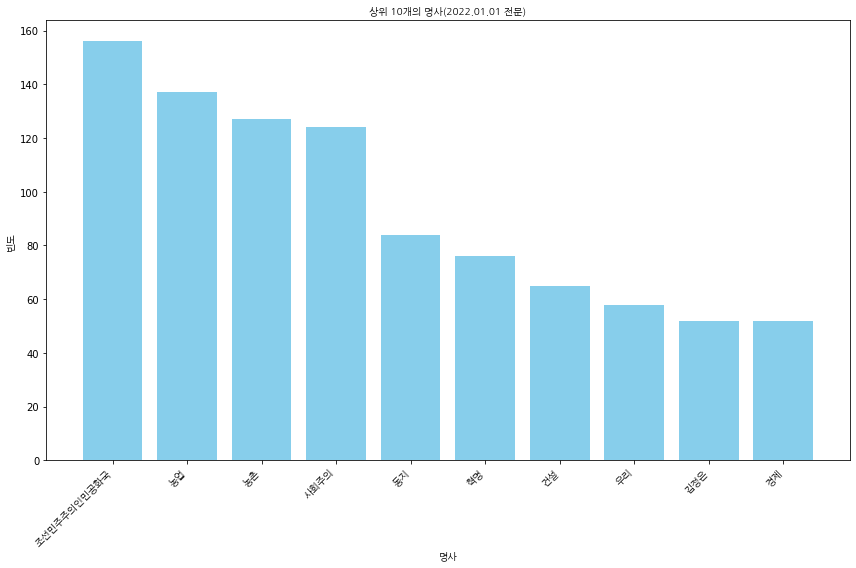

In [199]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_22be).most_common(10)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 10개의 명사(2022.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 20개 단어(전문)

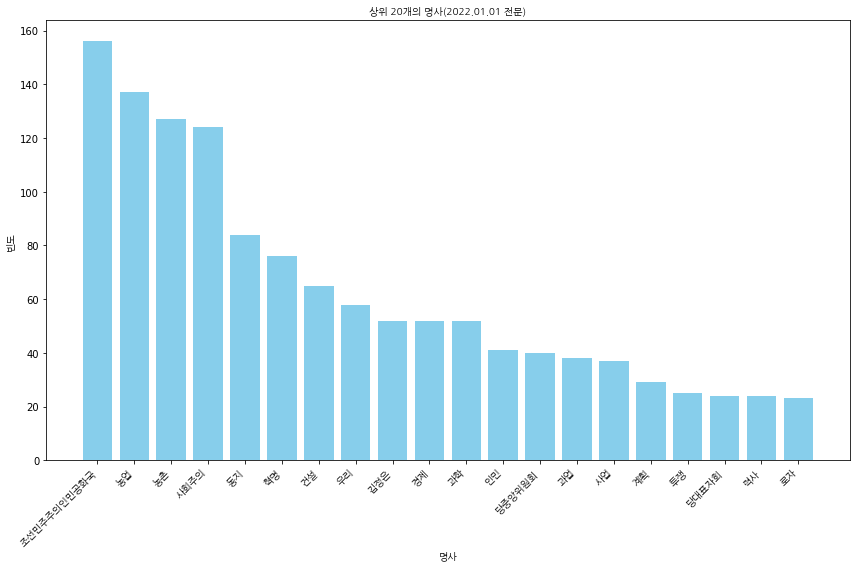

In [200]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_22be).most_common(20)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 20개의 명사(2022.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 30개 단어(전문)

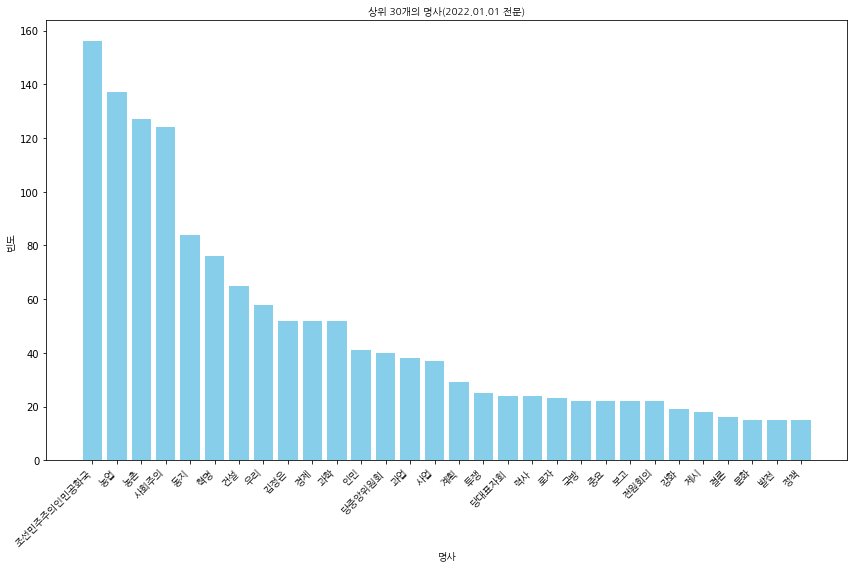

In [201]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_22be).most_common(30)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 30개의 명사(2022.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

# Sheet4 2021.01.06

In [185]:
df_21be = read_data(3,3)

In [186]:
df_21be

전문  \
0  친애하는 대표자동지들!\n\n우리의 수백만 당원동지들이 애국충성의 심장을 불태우며 ...   
1                                                NaN   
2                                                NaN   

                                               제목-서론  \
0  친애하는 대표자동지들!\n\n우리의 수백만 당원동지들이 애국충성의 심장을 불태우며 ...   
1                                                NaN   
2                                                NaN   

                                             정치-김씨일가  \
0  지금의 간고한 상황에서의 당대회의 소집은 대내외형세의 변화발전에 미치는 영향에 있어...   
1  \n사회주의건설에서 부단한 새로운 승리를 쟁취하기 위해 투쟁하는 우리의 노력과 전진...   
2  이밖에도 전국도처의 수많은 전구들에서 우리의 당원동지들과 각계층 근로자들은 귀중한 ...   

                                                  경제  과학기술  교육문화  \
0  그러나 국가경제발전 5개년전략수행기간이 지난해까지 끝났지만 내세웠던 목표는 거의 모...   NaN   NaN   
1                                                NaN   NaN   NaN   
2                                                NaN   NaN   NaN   

                                                  사회  국방  정치-당  외교  결론  
0  그처럼 어려웠던 지난 한해 전례없이 장기화된 사상초유의 세계적인 보건위기상황속에서도... NaN   NaN NaN NaN  
1                                                NaN NaN   NaN NaN NaN  
2                                                NaN NaN   NaN NaN NaN

## 📌전문

### 데이터 불러오기

In [187]:
all = df_21be['전문'][0]

In [188]:
all

'친애하는 대표자동지들!\n\n우리의 수백만 당원동지들이 애국충성의 심장을 불태우며 정성다해 준비하고 고대하여온 조선로동당 제8차대회는 우리 혁명발전에서 매우 중요하고도 책임적인 시기에 소집되였습니다.\n\n나는 먼저 대표자동지들과 전당의 당원들, 온 나라 전체 인민들과 인민군장병들의 다함없는 충성의 마음을 담아 조선로동당의 창건자이시고 건설자이시며 우리 당과 국가와 인민의 영원한 수령들이신 위대한 수령 김일성동지와 위대한 령도자 김정일동지께 가장 숭고한 경의와 최대의 영광을 삼가 드립니다.\n\n대표자동지들!\n\n당 제7차대회가 확정한 사회주의건설의 당면한 목표와 임무수행을 위하여 우리 당과 전체 인민이 새로운 진군을 시작한 때로부터 5년세월이 흘렀습니다.\n\n이 나날 일찌기 있어본적 없는 최악중의 최악으로 계속된 난국은 우리 혁명의 전진에 커다란 장애를 몰아왔으나 우리 당은 자기의 투쟁강령을 실현하기 위한 완강하고도 정확한 실천행동으로 거대한 승리들을 쟁취하였습니다.\n\n총결기간 더욱 확대강화된 우리의 주체적힘과 비상히 높아진 나라의 대외적지위는 사회주의건설의 새로운 고조기, 장엄한 격변기가 도래하였음을 명백히 알리고있습니다.\n\n지난해 8월에 있은 당중앙위원회 제7기 제6차전원회의는 우리 혁명발전의 새로운 추이와 조성된 주객관적정세의 요구를 심도있게 분석판단하고 이번 당대회의 소집을 결정하였습니다.\n\n지금의 간고한 상황에서의 당대회의 소집은 대내외형세의 변화발전에 미치는 영향에 있어서나 사회주의집권당인 우리 당의 투쟁전망에 있어서 커다란 의의를 가지는 특기할 정치적사변입니다.\n\n당대회소집에 관한 력사적인 결정이 공표되자 온 나라 인민들은 크나큰 격동에 휩싸여 열렬히 지지찬동하였으며 우리의 위업을 적대시하고 방해하려는 온갖 반동세력들은 심대한 타격을 당하였습니다.\n\n그것은 당의 최고회의소집자체가 혁명을 승리의 다음단계로 이끌어나가려는 조선로동당의 확고한 자신심의 표출이며 국가의 장래를 걸머지고 자기의 책무를 다함으로써 인민들의 하늘같은 믿

### 특수기호 일차적으로 제거

In [189]:
import re
all = re.sub(r'[()《》!]', ' ', all) #특수기호 제거, 정규 표현식  

### '\n\n'를 기준으로 문장 나누기

In [190]:
all = all.split('\n\n')

### 특수기호 이차적으로 ('1. ','2. ','3. ', '4. ' ,'\n' 등) 삭제

In [191]:
for idx,sent in enumerate(all):
    if ('1. ' in sent) or ('2. ' in sent) or ('3. ' in sent) or ('4. ' in sent) or ('5. 'in sent) or ('6. 'in sent):
        all[idx] = sent[3:]

In [192]:
all_21be = []
for text in all:
    all_21be.append(re.sub(r'[\n]', ' ', text))

### 이름 추출

In [193]:
find_name = []
for sen in all_21be:
    if '동지' in sen :
        print(sen)

친애하는 대표자동지들 
우리의 수백만 당원동지들이 애국충성의 심장을 불태우며 정성다해 준비하고 고대하여온 조선로동당 제8차대회는 우리 혁명발전에서 매우 중요하고도 책임적인 시기에 소집되였습니다.
나는 먼저 대표자동지들과 전당의 당원들, 온 나라 전체 인민들과 인민군장병들의 다함없는 충성의 마음을 담아 조선로동당의 창건자이시고 건설자이시며 우리 당과 국가와 인민의 영원한 수령들이신 위대한 수령 김일성동지와 위대한 령도자 김정일동지께 가장 숭고한 경의와 최대의 영광을 삼가 드립니다.
대표자동지들 
대표자동지들 
조선혁명의 새로운 투쟁의 앞길을 밝힐 제8차 당대회를 위하여 전당의 당원동지들과 온 나라 인민들은 정면돌파전의 기세드높이 당창건 75돐을 대경사로 빛내이고 충성의 80일전투에 총궐기하여 혁혁한 성과를 달성하면서 당대회의 성공적개최를 보장하였습니다.
당대회를 앞둔 존엄높은 자기 당에 영광과 힘을 보태기 위하여 성의와 노력을 다한 우리 당원동지들과 인민들의 드높은 정치적열의는 오늘의 세계에서 도저히 찾아볼수 없는 비상한 혁명성의 분출입니다.
이밖에도 전국도처의 수많은 전구들에서 우리의 당원동지들과 각계층 근로자들은 귀중한 성과들로 가득찬 전투성과보고서를 당중앙위원회에 보내여왔습니다.
나는 겹쌓인 곤난을 이겨내는 간고한 투쟁의 불길속에서 당의 두리에 억척같이 뭉친 단결과 단합의 위력을 더 높이 떨치며 불타는 애국헌신과 위대한 승리로 당 제8차대회를 굳건히 보위해준 전당의 당원동지들과 온 나라 인민들, 인민군장병들에게 충심으로 되는 뜨거운 감사와 전투적인사를 드립니다.
나는 조선로동당 제8차대회의 이름으로 당의 강화발전과 조국의 부강번영을 위하여, 인민의 행복과 후손들의 미래를 위하여 고귀한 삶을 아낌없이 바친 혁명동지들, 여기에 참가하지 못한 잊을수 없는 전우들을 경건히 추억하면서 모든 애국렬사들에게 숭고한 경의를 드립니다.
친애하는 대표자동지들 
조선로동당의 성스러운 력사에서 여덟번째로 되는 이번 대회의 전체 참가자들을 대표하여 본 대회가 위대한 김일성동지와 

In [194]:
find_name = []
for sen in all_21be:
    if '동지' in sen :
        word = sen.split(' ')
        for char in word:
            if '동지' in char:
                name = char.split('동지')
                find_name.append(name[:-1])

In [195]:
find_name

[['대표자'],
 ['당원'],
 ['대표자'],
 ['김일성'],
 ['김정일'],
 ['대표자'],
 ['대표자'],
 ['당원'],
 ['당원'],
 ['당원'],
 ['당원'],
 ['혁명'],
 ['대표자'],
 ['김일성'],
 ['김정일'],
 ['대표자']]

In [196]:
name = []
for i in find_name:
    for char in i:
        name.append(char[-3:])
    

In [197]:
name_21be,texts_without_name  = [],[]
for text in all_21be:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,name)
    name_21be.append(extracted_nouns)
    texts_without_name.append(remaining_text)

In [198]:
name_21be

[[('대표자', 1)],
 [('당원', 1), ('혁명', 1)],
 [('대표자', 1), ('당원', 1), ('김일성', 1), ('김정일', 1)],
 [('대표자', 1)],
 [],
 [('혁명', 1)],
 [],
 [('혁명', 1)],
 [],
 [],
 [('혁명', 1)],
 [],
 [('당원', 1)],
 [('혁명', 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('혁명', 1)],
 [],
 [('대표자', 1)],
 [],
 [],
 [('당원', 1)],
 [],
 [],
 [],
 [('당원', 1)],
 [('당원', 1), ('혁명', 1)],
 [],
 [('혁명', 1)],
 [('혁명', 1)],
 [('대표자', 1), ('당원', 1)],
 [('당원', 1), ('혁명', 1)],
 [('당원', 1), ('혁명', 1)],
 [],
 [('당원', 1)],
 [('당원', 1)],
 [],
 [('혁명', 1)],
 [('대표자', 1)],
 [],
 [('당원', 1), ('혁명', 1)],
 [],
 [('당원', 1), ('혁명', 1)],
 [],
 [('대표자', 1)],
 [('대표자', 1), ('당원', 1)],
 [('대표자', 2)],
 [],
 [('김일성', 1), ('김정일', 1), ('혁명', 1)],
 [],
 [('대표자', 1)]]

In [199]:
word_frequencies_name = merge_synonyms_with_frequencies(name_21be,synonym_dict)

In [200]:
word_frequencies_name

{'대표자': 11, '당원': 14, '혁명': 15, '김일성': 2, '김정일': 2}

In [201]:
from collections import Counter
word_frequencies_name_21be = Counter(word_frequencies_name)

In [202]:
texts_without_name 

['친애하는  동지들 ',
 '우리의 수백만  동지들이 애국충성의 심장을 불태우며 정성다해 준비하고 고대하여온 조선로동당 제8차대회는 우리  발전에서 매우 중요하고도 책임적인 시기에 소집되였습니다.',
 '나는 먼저  동지들과 전당의  들, 온 나라 전체 인민들과 인민군장병들의 다함없는 충성의 마음을 담아 조선로동당의 창건자이시고 건설자이시며 우리 당과 국가와 인민의 영원한 수령들이신 위대한 수령  동지와 위대한 령도자  동지께 가장 숭고한 경의와 최대의 영광을 삼가 드립니다.',
 ' 동지들 ',
 '당 제7차대회가 확정한 사회주의건설의 당면한 목표와 임무수행을 위하여 우리 당과 전체 인민이 새로운 진군을 시작한 때로부터 5년세월이 흘렀습니다.',
 '이 나날 일찌기 있어본적 없는 최악중의 최악으로 계속된 난국은 우리  의 전진에 커다란 장애를 몰아왔으나 우리 당은 자기의 투쟁강령을 실현하기 위한 완강하고도 정확한 실천행동으로 거대한 승리들을 쟁취하였습니다.',
 '총결기간 더욱 확대강화된 우리의 주체적힘과 비상히 높아진 나라의 대외적지위는 사회주의건설의 새로운 고조기, 장엄한 격변기가 도래하였음을 명백히 알리고있습니다.',
 '지난해 8월에 있은 당중앙위원회 제7기 제6차전원회의는 우리  발전의 새로운 추이와 조성된 주객관적정세의 요구를 심도있게 분석판단하고 이번 당대회의 소집을 결정하였습니다.',
 '지금의 간고한 상황에서의 당대회의 소집은 대내외형세의 변화발전에 미치는 영향에 있어서나 사회주의집권당인 우리 당의 투쟁전망에 있어서 커다란 의의를 가지는 특기할 정치적사변입니다.',
 '당대회소집에 관한 력사적인 결정이 공표되자 온 나라 인민들은 크나큰 격동에 휩싸여 열렬히 지지찬동하였으며 우리의 위업을 적대시하고 방해하려는 온갖 반동세력들은 심대한 타격을 당하였습니다.',
 '그것은 당의 최고회의소집자체가  을 승리의 다음단계로 이끌어나가려는 조선로동당의 확고한 자신심의 표출이며 국가의 장래를 걸머지고 자기의 책무를 다함으로써 인민들의 하늘같은 믿음과 기대

### 권력구조와 정치형태 관련 단어 사용자 정의 사전을 사용하여 명사 추출

In [203]:
user_defined_extracted_nouns,texts_without_user_nouns  = [],[]
for text in texts_without_name:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,user_defined_nouns)
    user_defined_extracted_nouns.append(extracted_nouns)
    texts_without_user_nouns.append(remaining_text)

In [204]:
user_defined_extracted_nouns

[[('동지', 1)],
 [('조선로동당', 1), ('동지', 1), ('대회', 1), ('우리', 2)],
 [('조선로동당', 1),
  ('인민군장병', 1),
  ('우리 당', 1),
  ('령도', 1),
  ('인민', 2),
  ('국가', 1),
  ('동지', 3),
  ('수령', 2),
  ('나라', 1),
  ('건설', 1)],
 [('동지', 1)],
 [('사회주의', 1), ('우리 당', 1), ('인민', 1), ('대회', 1), ('건설', 1)],
 [('우리 당', 1), ('우리', 1), ('투쟁', 1)],
 [('사회주의', 1), ('나라', 1), ('우리', 1), ('건설', 1)],
 [('당중앙위원회', 1), ('전원회의', 1), ('당대회', 1), ('우리', 1), ('정세', 1)],
 [('사회주의', 1), ('우리 당', 1), ('대내외', 1), ('당대회', 1), ('투쟁', 1)],
 [('반동세력', 1), ('력사적', 1), ('당대회', 1), ('인민', 1), ('나라', 1), ('우리', 1)],
 [('조선로동당', 1), ('최고회의', 1), ('인민', 1), ('국가', 1), ('심의', 1)],
 [('당중앙위원회', 1), ('조선로동당', 1), ('대회', 4), ('우리', 1), ('투쟁', 1)],
 [('중앙위원회', 1), ('사회주의', 1), ('우리 식', 1), ('인민', 1), ('건설', 1), ('투쟁', 1)],
 [('우리 당', 1), ('건설', 1), ('투쟁', 2)],
 [('경제건설', 1), ('조국', 1), ('인민', 2), ('대회', 1)],
 [('국가경제', 1)],
 [('사회주의', 1), ('우리', 1), ('건설', 1), ('투쟁', 1)],
 [('우리', 1)],
 [('당대회', 1), ('과업', 1), ('우리', 1), ('투쟁', 2)],
 [('우리', 1)],


#### 동의어 처리

In [205]:
word_frequencies_user_defined_nouns=merge_synonyms_with_frequencies(user_defined_extracted_nouns,synonym_dict)

#### 빈도수 구하기

In [206]:
word_frequencies_user = Counter(word_frequencies_user_defined_nouns)

In [207]:
texts_without_user_nouns

['친애하는   들 ',
 ' 의 수백만   들이 애국충성의 심장을 불태우며 정성다해 준비하고 고대하여온   제8차 는    발전에서 매우 중요하고도 책임적인 시기에 소집되였습니다.',
 '나는 먼저   들과 전당의  들, 온   전체  들과  들의 다함없는 충성의 마음을 담아  의 창건자이시고  자이시며  과  와  의 영원한  들이신 위대한     와 위대한  자   께 가장 숭고한 경의와 최대의 영광을 삼가 드립니다.',
 '  들 ',
 '당 제7차 가 확정한   의 당면한 목표와 임무수행을 위하여  과 전체  이 새로운 진군을 시작한 때로부터 5년세월이 흘렀습니다.',
 '이 나날 일찌기 있어본적 없는 최악중의 최악으로 계속된 난국은    의 전진에 커다란 장애를 몰아왔으나  은 자기의  강령을 실현하기 위한 완강하고도 정확한 실천행동으로 거대한 승리들을 쟁취하였습니다.',
 '총결기간 더욱 확대강화된  의 주체적힘과 비상히 높아진  의 대외적지위는   의 새로운 고조기, 장엄한 격변기가 도래하였음을 명백히 알리고있습니다.',
 '지난해 8월에 있은   제7기 제6차 는    발전의 새로운 추이와 조성된 주객관적 의 요구를 심도있게 분석판단하고 이번  의 소집을 결정하였습니다.',
 '지금의 간고한 상황에서의  의 소집은  형세의 변화발전에 미치는 영향에 있어서나  집권당인  의  전망에 있어서 커다란 의의를 가지는 특기할 정치적사변입니다.',
 ' 소집에 관한  인 결정이 공표되자 온    들은 크나큰 격동에 휩싸여 열렬히 지지찬동하였으며  의 위업을 적대시하고 방해하려는 온갖  들은 심대한 타격을 당하였습니다.',
 '그것은 당의  소집자체가  을 승리의 다음단계로 이끌어나가려는  의 확고한 자신  표출이며  의 장래를 걸머지고 자기의 책무를 다함으로써  들의 하늘같은 믿음과 기대에 보답하려는 강렬한 의지와 엄숙한 맹세로 되기때문입니다.',
 '   는   제8차 를 일하는  ,  하는  , 전진하는  로 되게 할것을 만천하에 천명하였습니다.',


### 불용어 제거

In [208]:
texts_without_stopwords=[]
for text in texts_without_user_nouns:
    remaining_text = remove_stopwords(text,stopwords)
    texts_without_stopwords.append(remaining_text)

In [209]:
texts_without_stopwords

['친애       ',
 '           애국충성  심장을 불태우며 정성다해 준비   고  온      는    발전      중요   책임   시기에 소집되  .',
 '           전당   들, 온   전체         다함   충성  마음을 담아    창건자     자       와    영원     신 위대      와 위대   자   께    숭고  경의와 최대  영광을 삼    .',
 '    ',
 '당      확정      당면  목표와 임무수행      전체        진군을 시작  때     세월  흘렀  .',
 '  나날    있어본     최악중  최악       난국은      전진에    장애를 몰아왔으   은      강령을 실현        정확  실천행동   거대  승리   쟁취하  .',
 '총결기간    확대강화       적힘     높아진    대외적지위는         고조기, 장엄  격변기  도래하였음을 명백히 알리고있  .',
 '   8월에 있은         는    발전      추이와 조성  주객관    요구를 심도   분석판단         소집을 결정하  .',
 '    간고  상황       소집은  형세  변화발전에 미치는 영향에      집권당인     전망에       의의를 가지는 특기할 정치적사변  .',
 ' 소집에     인 결정  공표되자 온       크나큰 격동에 휩싸여 열렬히 지지찬동      위업을 적대시   방해          심대  타격을 당하  .',
 '    당   소집자체   을 승리    단계  이끌어나가려는    확고      표출      장래를 걸머지고     책무를 다       하늘   믿음  기대에 보답   강렬  의지와 엄숙  맹세  되기    .',
 '   는      를 일    ,      , 전진            만천하에 천명하  .',
 '   총결기간  사업을 엄정히 총화               승리를 쟁취   정확

#### '조선로동'이라는 단어는 단독으로 쓰인 단어가 아닌 '조선로동당 중앙위원회'와 같이 사용된 단어로 삭제한다.


In [210]:
sentences = []
for sentence in texts_without_stopwords:
    sentences.append(sentence.replace("조선로동", " "))

In [211]:
texts_without_stopwords = sentences

In [212]:
remaining_text = clean_text(texts_without_stopwords)

In [213]:
texts_without_stopwords = remaining_text

### soynlp 명사 추출기 ( 이미 명사로 분류된 단어들은 제외)

In [214]:
from soynlp.noun import LRNounExtractor_v2
noun_extractor = LRNounExtractor_v2(verbose=True, extract_compound=True)
noun_extractor.train(texts_without_stopwords)
soynlp_nouns = noun_extractor.extract()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 529 from 59 sents. mem=0.192 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=648, mem=0.192 Gb
[Noun Extractor] batch prediction was completed for 175 words
[Noun Extractor] checked compounds. discovered 0 compounds
[Noun Extractor] postprocessing detaching_features : 45 -> 45
[Noun Extractor] postprocessing ignore_features : 45 -> 44
[Noun Extractor] postprocessing ignore_NJ : 44 -> 44
[Noun Extractor] 44 nouns (0 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.192 Gb                    
[Noun Extractor] 23.30 % eojeols are covered


In [215]:
#soynlp로 추출된 명사를 (명사,빈도수)로 저장
extracted_soynlp_words = {word:score.frequency for word,score in soynlp_nouns.items() if len(word) >= 2}
extracted_soynlp_words

{'목표': 4,
 '승리': 9,
 '요구': 2,
 '사업': 10,
 '성과': 4,
 '교훈': 3,
 '정치': 1,
 '이겨': 2,
 '진행': 5,
 '참가': 3,
 '쟁취': 4,
 '결정': 4,
 '마련': 3,
 '확신': 2,
 '보장': 2,
 '임무': 1,
 '장애': 1,
 '문제': 2,
 '연구': 2,
 '미래': 1,
 '위업': 3,
 '운명': 3,
 '의견': 3,
 '소집': 4,
 '영광': 5,
 '전진': 4,
 '생활': 1,
 '노력': 3,
 '원인': 2,
 '조선': 4,
 '도약': 2,
 '행복': 3,
 '기대': 2}

In [216]:
word_frequencies_soynlp=Counter(extracted_soynlp_words)

#### soynlp로 추출한 명사 데이터셋에서 삭제

In [217]:
#texts_without_stopwords에 삭제할 단어 저장
remove_word_soynlp = [ word for word in soynlp_nouns if len(word) >= 2]

In [218]:
#soynlp로 추출된 명사들을 texts_without_stopwords에서 삭제한다.
texts_without_soynlp=[]
for text in texts_without_stopwords:
    remaining_text = remove_stopwords(text,remove_word_soynlp)
    texts_without_soynlp.append(remaining_text)

In [219]:
texts_without_soynlp

['친애 ',
 '애국충성 심장을 불태우며 정성다해 준비 발전 중요 책임 시기에   되 ',
 '전당 들, 전체 다함 충성 마음을 담아 창건자 영원 위대 위대 숭고 경의와 최대   을 ',
 '',
 '확정 당면   와   수행 전체 진군을 시작 세월 흘렀 ',
 '나날 있어본 최악중 최악 난국은   에   를 몰아왔으 강령을 실현 정확 실천행동 거대      하 ',
 '총결기간 확대강화 적힘 높아진 대외적지위는 고조기, 장엄 격변기 도래하였음을 명백히 알리고있 ',
 '8월에 있은 발전 추이와 조성 주객관   를 심도 분석판단   을   하 ',
 '간고 상황   은 형세 변화발전에 미치는 영향에 집권당인 전망에 의의를 가지는 특기할   적사변 ',
 '  에    공표되자 크나큰 격동에 휩싸여 열렬히 지지찬동   을 적대시 방해 심대 타격을 당하 ',
 '  자체    단계 이끌어나가려는 확고 표출 장래를 걸머지고 책무를 하늘 믿음   에 보답 강렬 의지와 엄숙 맹세 되기 ',
 '   만천하에 천명하 ',
 '총결기간   을 엄정히 총화   를    정확 방향   를 명백히 확정 실제 대책을    약속 ',
 '간고   넘친 려정에    거둔 적지는 ',
 '반만년민족사에 대서특필할   와 사변 안아옴   을 세세년 믿음직 수호할 강력 담보를    촉진   을 향상 일련 의미 소중    토대들도   하 ',
 '발전 년전략수행기간 끝났 내세웠던   는 미달되 ',
 '부단   를         을 방해 저애 갖가지 도전은 외부 내부 의연히 존재 ',
 '현존 첩첩난관을 확실 돌파 묘술은 자체 힘, 적력량을 백방 강화 ',
 '결함   을 객관 주관 찾고 역할을 높여   를 풀어나 원칙으 총결기간 얻은 경험   , 오유를 전면 분석총화 기초 과학   와 확정 ',
 '이룩   도 귀중 쓰라린   도 귀중 ',
 '금전을 주고도 살수    귀중 밑천 ',
 '피땀      와    장려 확대발전 아픈    되풀 예방 ',
 '방치해두면   로, 걸림돌 결함

In [220]:
remaining_text =[]
for sentence in texts_without_soynlp:
    sentences = ''
    for char in sentence.split(' '):
        if len(char)>1:
            sentences += char + ' '
    remaining_text.append(sentences)
    

In [221]:
remaining_text

['친애 ',
 '애국충성 심장을 불태우며 정성다해 준비 발전 중요 책임 시기에 ',
 '전당 들, 전체 다함 충성 마음을 담아 창건자 영원 위대 위대 숭고 경의와 최대 ',
 '',
 '확정 당면 수행 전체 진군을 시작 세월 흘렀 ',
 '나날 있어본 최악중 최악 난국은 몰아왔으 강령을 실현 정확 실천행동 거대 ',
 '총결기간 확대강화 적힘 높아진 대외적지위는 고조기, 장엄 격변기 도래하였음을 명백히 알리고있 ',
 '8월에 있은 발전 추이와 조성 주객관 심도 분석판단 ',
 '간고 상황 형세 변화발전에 미치는 영향에 집권당인 전망에 의의를 가지는 특기할 적사변 ',
 '공표되자 크나큰 격동에 휩싸여 열렬히 지지찬동 적대시 방해 심대 타격을 당하 ',
 '자체 단계 이끌어나가려는 확고 표출 장래를 걸머지고 책무를 하늘 믿음 보답 강렬 의지와 엄숙 맹세 되기 ',
 '만천하에 천명하 ',
 '총결기간 엄정히 총화 정확 방향 명백히 확정 실제 대책을 약속 ',
 '간고 넘친 려정에 거둔 적지는 ',
 '반만년민족사에 대서특필할 사변 안아옴 세세년 믿음직 수호할 강력 담보를 촉진 향상 일련 의미 소중 토대들도 ',
 '발전 년전략수행기간 끝났 내세웠던 미달되 ',
 '부단 방해 저애 갖가지 도전은 외부 내부 의연히 존재 ',
 '현존 첩첩난관을 확실 돌파 묘술은 자체 힘, 적력량을 백방 강화 ',
 '결함 객관 주관 찾고 역할을 높여 풀어나 원칙으 총결기간 얻은 경험 오유를 전면 분석총화 기초 과학 확정 ',
 '이룩 귀중 쓰라린 귀중 ',
 '금전을 주고도 살수 귀중 밑천 ',
 '피땀 장려 확대발전 아픈 되풀 예방 ',
 '방치해두면 로, 걸림돌 결함 대담 인정 다시는 그러 페단 반복 단호 대책을 세워야 ',
 '배짱 신념을 바탕 열렸 ',
 '실속 옳은 로선 내놓으면 기, 고조기를 ',
 '부흥발전 단계 이행 ',
 '',
 '실속 준비 4개월 힘을 넣었 ',
 '형을 전면 립체 세부 분석총화 발전 경험 찾는 ',
 '이를 비상설중앙검열 회를 조직 아래에 

In [222]:
texts_without_soynlp = remaining_text

### 북한 용어사전을 활용하여 명사 추출

In [223]:
site_defined_extracted_nouns,texts_without_extracted_nouns = [],[]
for text in texts_without_soynlp:
    extracted_nouns, remaining_text = extract_site_defined_nouns(text,dict_site)
    site_defined_extracted_nouns.append(extracted_nouns)
    texts_without_extracted_nouns.append(remaining_text)

In [224]:
# 리스트 평탄화
site_defined_extracted_nouns = [item for sublist in site_defined_extracted_nouns for item in sublist]

print(site_defined_extracted_nouns)

['대외', '리고', '변기', '아진', '적지', '객관', '추이', '가지', '전망', '특기', '단계', '하늘', '명하', '방향', '려정', '적지', '담보', '년전', '략수', '가지', '도전', '력량', '첩첩', '객관', '오유', '반복', '로선', '단계', '립체', '로동자', '료해', '비상', '지식', '료해', '방향', '소조', '파악', '놓고', '료해', '소조', '시하', '적지', '태공', '구체', '당조', '자료', '전국', '정형', '당조', '정말', '가지', '반영', '낡은것', '적당', '현실', '료해', '정형', '당조', '비상', '사상', '세대', '장기', '로자', '보고', '전구', '전국', '곤난', '두리', '총련', '렬사', '니고', '자리', '도전', '로선', '열망', '근로단체', '구성', '녀성', '사상', '리정표']


In [225]:
word_frequencies_site = Counter(site_defined_extracted_nouns)

In [226]:
word_frequencies_site

Counter({'대외': 1,
         '리고': 1,
         '변기': 1,
         '아진': 1,
         '적지': 3,
         '객관': 2,
         '추이': 1,
         '가지': 3,
         '전망': 1,
         '특기': 1,
         '단계': 2,
         '하늘': 1,
         '명하': 1,
         '방향': 2,
         '려정': 1,
         '담보': 1,
         '년전': 1,
         '략수': 1,
         '도전': 2,
         '력량': 1,
         '첩첩': 1,
         '오유': 1,
         '반복': 1,
         '로선': 2,
         '립체': 1,
         '로동자': 1,
         '료해': 4,
         '비상': 2,
         '지식': 1,
         '소조': 2,
         '파악': 1,
         '놓고': 1,
         '시하': 1,
         '태공': 1,
         '구체': 1,
         '당조': 3,
         '자료': 1,
         '전국': 2,
         '정형': 2,
         '정말': 1,
         '반영': 1,
         '낡은것': 1,
         '적당': 1,
         '현실': 1,
         '사상': 2,
         '세대': 1,
         '장기': 1,
         '로자': 1,
         '보고': 1,
         '전구': 1,
         '곤난': 1,
         '두리': 1,
         '총련': 1,
         '렬사': 1,
         '니고': 1,
        

In [227]:
remaining_text = clean_text(texts_without_extracted_nouns)

In [228]:
remaining_text

['친애 ',
 '애국충성 심장을 불태우며 정성다해 준비 발전 중요 책임 시기에 ',
 '전당 들, 전체 다함 충성 마음을 담아 창건자 영원 위대 위대 숭고 경의와 최대 ',
 '',
 '확정 당면 수행 전체 진군을 시작 세월 흘렀 ',
 '나날 있어본 최악중 최악 난국은 몰아왔으 강령을 실현 정확 실천행동 거대 ',
 '총결기간 확대강화 적힘 위는 고조기, 장엄 도래하였음을 명백히 ',
 '8월에 있은 발전 조성 심도 분석판단 ',
 '간고 상황 형세 변화발전에 미치는 영향에 집권당인 의의를 적사변 ',
 '공표되자 크나큰 격동에 휩싸여 열렬히 지지찬동 적대시 방해 심대 타격을 당하 ',
 '자체 이끌어나가려는 확고 표출 장래를 걸머지고 책무를 믿음 보답 강렬 의지와 엄숙 맹세 되기 ',
 '만천하에 ',
 '총결기간 엄정히 총화 정확 명백히 확정 실제 대책을 약속 ',
 '간고 넘친 거둔 ',
 '반만년민족사에 대서특필할 사변 안아옴 세세년 믿음직 수호할 강력 촉진 향상 일련 의미 소중 토대들도 ',
 '발전 행기간 끝났 내세웠던 미달되 ',
 '부단 방해 저애 외부 내부 의연히 존재 ',
 '현존 난관을 확실 돌파 묘술은 자체 힘, 백방 강화 ',
 '결함 주관 찾고 역할을 높여 풀어나 원칙으 총결기간 얻은 경험 전면 분석총화 기초 과학 확정 ',
 '이룩 귀중 쓰라린 귀중 ',
 '금전을 주고도 살수 귀중 밑천 ',
 '피땀 장려 확대발전 아픈 되풀 예방 ',
 '방치해두면 로, 걸림돌 결함 대담 인정 다시는 그러 페단 단호 대책을 세워야 ',
 '배짱 신념을 바탕 열렸 ',
 '실속 옳은 내놓으면 기, 고조기를 ',
 '부흥발전 이행 ',
 '',
 '실속 준비 4개월 힘을 넣었 ',
 '형을 전면 세부 분석총화 발전 경험 찾는 ',
 '이를 설중앙검열 회를 조직 아래에 파견 실태를 현장 농민, 진지 듣도록 ',
 '파견 실태를 성, 별, 내보내여 전격 전면 ',
 '검열 관철 잘못 인가, 않고 인가, 실리 형식 인가, 잘못 인가, 결함은 진상을 빠개

In [229]:
texts_without_extracted_nouns = remaining_text

### Mecab 명사 추출기(이미 명사로 분류된 단어들은 제외)

In [230]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab_nouns = []
for text in texts_without_extracted_nouns:
    mecab_nouns += mecab.nouns(text)

In [231]:
mecab_nouns

['친애',
 '애국',
 '충성',
 '심장',
 '정성',
 '준비',
 '발전',
 '중요',
 '책임',
 '시기',
 '전당',
 '전체',
 '충성',
 '마음',
 '창건자',
 '영원',
 '숭고',
 '경의',
 '최대',
 '확정',
 '당면',
 '수행',
 '전체',
 '진군',
 '시작',
 '세월',
 '나날',
 '최악',
 '중',
 '최악',
 '난국',
 '강령',
 '실현',
 '정확',
 '실천',
 '행동',
 '거대',
 '총결',
 '기간',
 '확대',
 '강화',
 '힘',
 '위',
 '고조기',
 '장엄',
 '도래',
 '월',
 '발전',
 '조성',
 '심도',
 '분석',
 '판단',
 '간고',
 '상황',
 '형세',
 '변화',
 '발전',
 '영향',
 '집권당',
 '의의',
 '사변',
 '공표',
 '격동',
 '지지',
 '찬동',
 '대시',
 '방해',
 '심대',
 '타격',
 '당하',
 '자체',
 '표출',
 '장래',
 '책무',
 '보답',
 '지와',
 '맹세',
 '만천하',
 '총결',
 '기간',
 '총화',
 '정확',
 '확정',
 '실제',
 '대책',
 '약속',
 '거',
 '반만년',
 '민족사',
 '대서특필',
 '사변',
 '년',
 '수호',
 '강력',
 '촉진',
 '향상',
 '일련',
 '미',
 '소중',
 '토대',
 '발전',
 '행기',
 '간',
 '끝',
 '미달',
 '부단',
 '방해',
 '저애',
 '외부',
 '내부',
 '존재',
 '현존',
 '난관',
 '돌파',
 '묘술',
 '자체',
 '힘',
 '백방',
 '강화',
 '결함',
 '주관',
 '역할',
 '원칙',
 '총결',
 '기간',
 '경험',
 '전면',
 '분석',
 '총화',
 '기초',
 '과학',
 '확정',
 '귀중',
 '금전',
 '살수',
 '귀중',
 '밑천',
 '피땀',
 '장려',
 '확대',
 '발전',
 '되',
 '풀',
 '예

In [232]:
mecab_nouns_clean = []
for char in mecab_nouns:
    if len(char)>1:
        mecab_nouns_clean.append(char)

In [233]:
mecab_nouns = [map_to_synonym(noun, synonym_dict) for noun in mecab_nouns_clean] #동의어 처리

In [234]:
texts_without_mecab=[]
for text in texts_without_extracted_nouns:
    remaining_text = remove_stopwords(text,mecab_nouns)
    texts_without_mecab.append(remaining_text)
texts_without_mecab

['   ',
 '       을 불태우며   다해               에 ',
 '   들,    다함      을 담아                  와    ',
 '',
 '              을       흘렀 ',
 '   있어본   중      은 몰아왔으   을               ',
 '          적힘 위는   ,      하였음을 명백히 ',
 '8월에 있은               ',
 '             에 미치는   에   인   를 적   ',
 '  되자 크나큰   에 휩싸여 열렬히      적           을    ',
 '   이끌어나가려는 확고      를 걸머지고   를       강렬 의   엄숙    되기 ',
 '  에 ',
 '     엄정히       명백히         을    ',
 '   넘친 거둔 ',
 '    에   할    안아옴 세세년   직   할             의미      들도 ',
 '   행   끝났 내세웠던   되 ',
 '               의연히    ',
 '     을 확실      은    힘,       ',
 '      찾고   을 높여 풀어나   으      얻은                     ',
 '이룩    쓰라린    ',
 '  을 주고도          ',
 '           아픈 되풀    ',
 '  해   로,             다시는 그러 페단      을 세워야 ',
 '     을    열렸 ',
 '   옳은 내놓으면 기,   를 ',
 '        ',
 '',
 '      4   힘을 넣었 ',
 '형을                  찾는 ',
 '이를 설     회를      에      를      ,    듣도록 ',
 '     를 성, 별, 내보내여       ',
 '         인가, 않고 인가,       인가,    인가,   은   을 빠개 ',
 '    

In [235]:
#단어 빈도수 계산
from collections import Counter
word_frequencies_mecab = Counter(mecab_nouns)
word_frequencies_mecab

Counter({'친애': 2,
         '애국': 2,
         '충성': 3,
         '심장': 1,
         '정성': 1,
         '준비': 5,
         '발전': 11,
         '중요': 2,
         '책임': 4,
         '시기': 2,
         '전당': 7,
         '전체': 4,
         '마음': 1,
         '창건자': 1,
         '영원': 1,
         '숭고': 2,
         '경의': 1,
         '최대': 1,
         '확정': 4,
         '당면': 1,
         '수행': 3,
         '진군': 1,
         '시작': 1,
         '세월': 1,
         '나날': 1,
         '최악': 2,
         '난국': 1,
         '강령': 1,
         '실현': 1,
         '정확': 2,
         '실천': 1,
         '행동': 1,
         '거대': 1,
         '총결': 3,
         '기간': 4,
         '확대': 2,
         '강화': 6,
         '고조기': 2,
         '장엄': 1,
         '도래': 1,
         '조성': 1,
         '심도': 2,
         '분석': 4,
         '판단': 1,
         '간고': 2,
         '상황': 2,
         '형세': 2,
         '변화': 1,
         '영향': 1,
         '집권당': 1,
         '의의': 2,
         '사변': 2,
         '공표': 1,
         '격동': 1,
         '지지': 1,
      

### 모두 합하기

In [236]:
word_frequencies_all_21be = word_frequencies_mecab+word_frequencies_soynlp+word_frequencies_name_21be+word_frequencies_site+word_frequencies_user

In [237]:
combined_all_21be = merge_frequencies_with_synonyms(word_frequencies_all_21be, synonym_dict)
combined_all_21be

{'농업': 2,
 '혁명': 30,
 '사회주의': 12,
 '조선민주주의인민공화국': 30,
 '우리': 30,
 '조선로동당': 18,
 '당중앙위원회': 14,
 '당대표자회': 94,
 '경제': 6,
 '핵': 4,
 '국방': 14,
 '과학': 4,
 '력사': 8,
 '제국주의': 1,
 '김정일': 4,
 '애국': 6,
 '동지': 32,
 '영도': 2,
 '문명': 1,
 '친애': 2,
 '충성': 3,
 '심장': 1,
 '정성': 1,
 '준비': 5,
 '발전': 11,
 '중요': 2,
 '책임': 4,
 '시기': 2,
 '전당': 7,
 '전체': 4,
 '마음': 1,
 '창건자': 1,
 '영원': 1,
 '숭고': 2,
 '경의': 1,
 '최대': 1,
 '확정': 4,
 '당면': 1,
 '수행': 3,
 '진군': 1,
 '시작': 1,
 '세월': 1,
 '나날': 1,
 '최악': 2,
 '난국': 1,
 '강령': 1,
 '실현': 1,
 '정확': 2,
 '실천': 1,
 '행동': 1,
 '거대': 1,
 '총결': 3,
 '기간': 4,
 '확대': 2,
 '강화': 6,
 '고조기': 2,
 '장엄': 1,
 '도래': 1,
 '조성': 1,
 '심도': 2,
 '분석': 4,
 '판단': 1,
 '간고': 2,
 '상황': 2,
 '형세': 2,
 '변화': 1,
 '영향': 1,
 '집권당': 1,
 '의의': 2,
 '사변': 2,
 '공표': 1,
 '격동': 1,
 '지지': 1,
 '찬동': 1,
 '대시': 1,
 '방해': 2,
 '심대': 1,
 '타격': 1,
 '당하': 1,
 '자체': 2,
 '표출': 1,
 '장래': 1,
 '책무': 1,
 '보답': 2,
 '지와': 1,
 '맹세': 1,
 '만천하': 1,
 '총화': 7,
 '실제': 1,
 '대책': 3,
 '약속': 1,
 '반만년': 1,
 '민족사': 1,
 '대서특필': 1,
 '수호': 1,
 '강력': 1,

In [238]:
doc_word_freq['21be'] = combined_all_21be
update_excel_with_new_doc(doc_word_freq, file_path)

Excel 파일이 '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'로 업데이트되었습니다.


### 단어 빈도 시각화

#### 상위 10개 단어(전문)

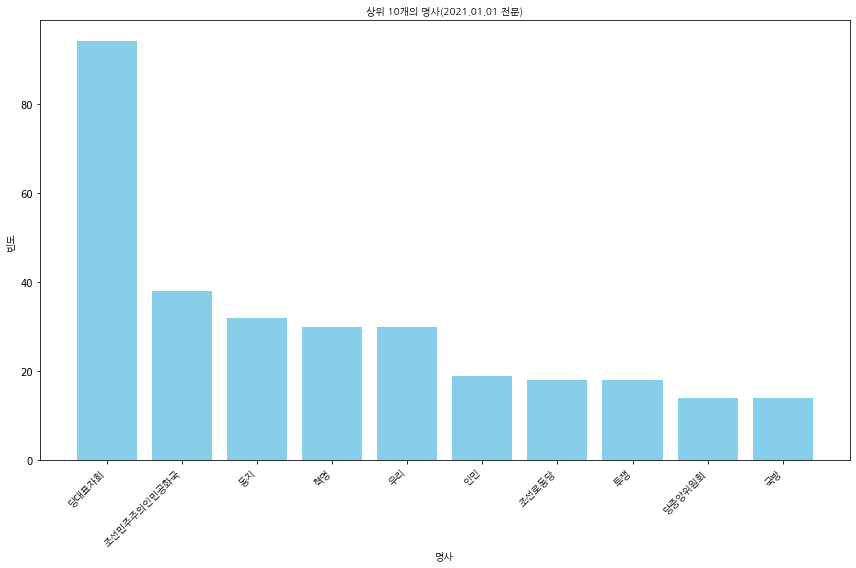

In [254]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_21be).most_common(10)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 10개의 명사(2021.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 20개 단어(전문)

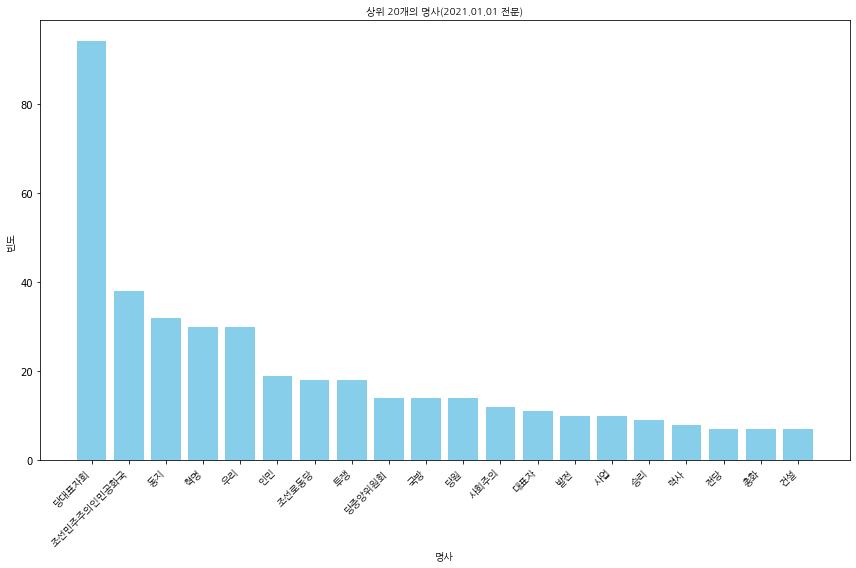

In [255]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_21be).most_common(20)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 20개의 명사(2021.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 30개 단어(전문)

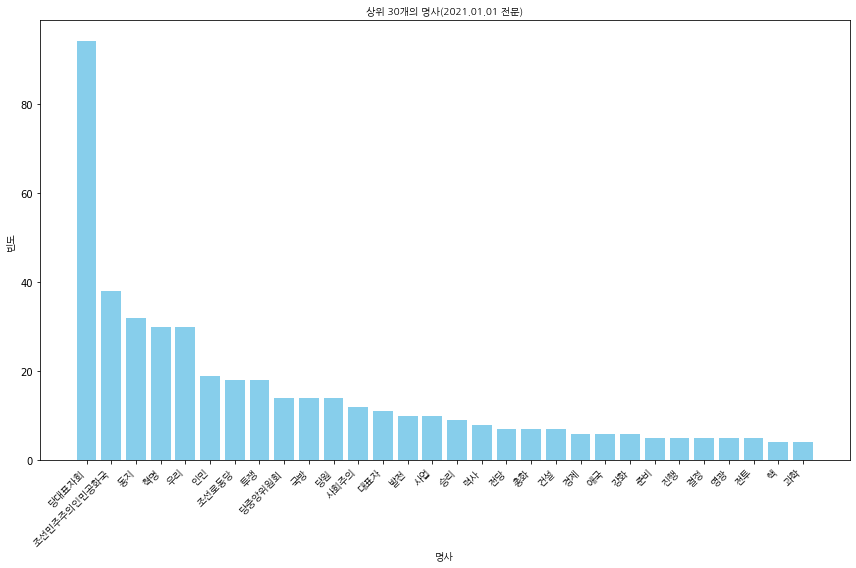

In [256]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_21be).most_common(30)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 30개의 명사(2021.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

# Sheet5 2020.01.01

In [240]:
df_20be = read_data(4,2)

In [241]:
df_20be

전문  \
0  조선로동당 중앙위원회 제7기 제5차전원회의가 주체108(2019)년 12월 28일부...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                               제목-서론  \
0  조선로동당 중앙위원회 제7기 제5차전원회의가 주체108(2019)년 12월 28일부...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                             정치-김씨일가  \
0  전원회의에서는 첫째 의정이 토의되였다.\n\n김정은 동지께서 첫째 의정에 대한 보고...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                                  경제  \
0  조선로동당 위원장동지께서는 경제건설분야에서도 일련의 성과들이 이룩된데 대하여 언급하...   
1  조선로동당 위원장동지께서는 자력강화의 견지에서 볼 때 국가관리와 경제사업을 비롯한 ...   
2  첫째, 나라의 경제토대를 재정비하고 가능한 생산잠재력을 총발동하여 경제발전과 인민생...   
3  국가기관 간부들을 해임 및 임명하였다.\n\n김일철동지를 내각부총리 겸 국가계획위원...   

                                                과학기술  \
0  조선로동당 위원장동지께서는 과학, 교육, 보건사업을 개선할데 대하여 언급하시였다.\...   
1       둘째, 과학기술을 중시하며 사회주의제도의 영상인 교육, 보건사업을 개선할것이다.   
2                                                NaN   
3                           김승진동지를 국가과학원 원장으로 임명하였다.   

                                                교육문화  \
0  조선로동당 위원장동지께서는 교육혁명의 시대에 맞게 나라의 교육을 근본적으로 개선하기...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                                  사회  \
0  조선로동당 위원장동지께서는 위대한 수령님과 위대한 장군님께서 마련해주신 세상에서 가...   
1   셋째, 생태환경을 보호하며 자연재해에 대응하기 위한 국가적인 위기관리체계를 세울것이다.   
2                                                NaN   
3                                                NaN   

                                                  국방  \
0  \n지난 몇개월동안 우리앞에 봉착한 도전은 남들같으면 하루도 지탱하지 못하고 물러앉...   
1  조선로동당 위원장동지께서는 누구도 범접할수 없는 무적의 군사력을 보유하고 계속 강화...   
2                                                NaN   
3                                                NaN   

                                                정치-당  \
0  조선로동당 위원장동지께서는 전당적, 전국가적, 전사회적으로 반사회주의, 비사회주의현...   
1  다섯째, 반사회주의, 비사회주의와의 투쟁을 강화하고 도덕기강을 세우며 근로단체조직들...   
2  전원회의에서는 둘째 의정인 조직문제를 보았다.\n\n당중앙위원회 정치국 위원, 후보...   
3  전원회의에서는 셋째 의정으로 당중앙위원회구호집을 수정보충할데 대한 문제를 토의결정하...   

                                                  외교  \
0  조선로동당 위원장동지께서는 조성된 현정세의 추이를 분석하시면서 미국의 본심은 대화와...   
1  조선로동당 위원장동지께서는 정면돌파전을 정치외교적으로, 군사적으로 담보할데 대하여 ...   
2           넷째, 강력한 정치외교적, 군사적공세로 정면돌파전의 승리를 담보할것이다.   
3                                                NaN   

                                                  결론  
0  조선로동당 위원장동지께서는 전원회의를 마치시면서 이번 전원회의가 조성된 국면을 정면...  
1                                                NaN  
2                                                NaN  
3                                                NaN

## 전문

### 데이터 불러오기

In [242]:
all = df_20be['전문'][0]

In [243]:
all

'조선로동당 중앙위원회 제7기 제5차전원회의가 주체108(2019)년 12월 28일부터 31일까지 당중앙위원회 본부청사에서 진행되였다.\n\n조선로동당 위원장 김정은 동지께서 전원회의를 지도하시였다.\n\n전원회의에는 조선로동당 중앙위원회 위원, 후보위원들과 당중앙검사위원회 위원들이 참가하였다.\n\n당중앙위원회 일군들과 성, 중앙기관 일군들, 도인민위원장들, 도농촌경리위원장들, 시, 군당위원장들, 중요부문과 단위, 무력기관 일군들이 방청으로 참가하였다.\n\n김정은 동지께서 당중앙위원회 정치국의 위임에 따라 전원회의를 운영집행하시였다.\n\n전원회의에는 다음과 같은 의정들이 상정되였다.\n\n1. 조성된 대내외형세하에서 우리의 당면한 투쟁방향에 대하여\n\n2. 조직문제에 대하여\n\n3. 당중앙위원회 구호집을 수정보충할데 대하여\n\n4. 조선로동당창건 75돐을 성대히 기념할데 대하여\n\n전원회의에서는 첫째 의정이 토의되였다.\n\n김정은 동지께서 첫째 의정에 대한 보고를 하시였다.\n\n조선로동당 위원장동지께서는 당중앙위원회 제7기 제4차전원회의가 있은 때로부터 지난 8개월간은 대단히 강도높은 투쟁과 과감한 전진의 련속이였다고 하시면서 우리 당이 그 기간 항상 우리 인민의 절실한 요구와 권익, 국가의 자주권과 안전보장을 중심에 두고 정확한 대내외정치로선을 수립하고 견지하며 그를 관철하기 위하여 부단히 투쟁한데 대하여 언급하시였다.\n\n조선로동당 위원장동지께서는 당중앙은 우리 혁명의 거창하고도 줄기찬 전진도상에 직면한 주객관적인 장애와 난관들을 전면적으로 심도있게 분석평가하고 사회주의건설을 더욱 촉진시키기 위한 결정적대책을 강구할 취지에서 이번 전원회의를 소집하였다고 말씀하시였다.\n\n조선로동당 위원장동지께서는 현정세와 혁명발전의 요구에 맞게 정면돌파전을 벌릴데 대한 혁명적로선을 천명하시였다.\n\n당중앙위원회 제7기 제4차전원회의 결정관철을 위한 긴장된 투쟁속에서 자립,자력을 원동력으로 하는 우리의 주체적힘이 일층 강화되였다고 평가하시면서 조선로동당

### 특수기호 일차적으로 제거

In [244]:
import re
all = re.sub(r'[()《》!]', ' ', all) #특수기호 제거, 정규 표현식  

### '\n\n'를 기준으로 문장 나누기

In [245]:
all = all.split('\n\n')

### 특수기호 이차적으로 ('1. ','2. ','3. ', '4. ' ,'\n' 등) 삭제

In [246]:
for idx,sent in enumerate(all):
    if ('1. ' in sent) or ('2. ' in sent) or ('3. ' in sent) or ('4. ' in sent) or ('5. 'in sent) or ('6. 'in sent):
        all[idx] = sent[3:]

In [247]:
all_20be = []
for text in all:
    all_20be.append(re.sub(r'[\n]', ' ', text))

### 이름 추출

In [248]:
for sen in all_20be:
    if '동지' in sen :
        print(sen)

조선로동당 위원장 김정은 동지께서 전원회의를 지도하시였다.
김정은 동지께서 당중앙위원회 정치국의 위임에 따라 전원회의를 운영집행하시였다.
김정은 동지께서 첫째 의정에 대한 보고를 하시였다.
조선로동당 위원장동지께서는 당중앙위원회 제7기 제4차전원회의가 있은 때로부터 지난 8개월간은 대단히 강도높은 투쟁과 과감한 전진의 련속이였다고 하시면서 우리 당이 그 기간 항상 우리 인민의 절실한 요구와 권익, 국가의 자주권과 안전보장을 중심에 두고 정확한 대내외정치로선을 수립하고 견지하며 그를 관철하기 위하여 부단히 투쟁한데 대하여 언급하시였다.
조선로동당 위원장동지께서는 당중앙은 우리 혁명의 거창하고도 줄기찬 전진도상에 직면한 주객관적인 장애와 난관들을 전면적으로 심도있게 분석평가하고 사회주의건설을 더욱 촉진시키기 위한 결정적대책을 강구할 취지에서 이번 전원회의를 소집하였다고 말씀하시였다.
조선로동당 위원장동지께서는 현정세와 혁명발전의 요구에 맞게 정면돌파전을 벌릴데 대한 혁명적로선을 천명하시였다.
당중앙위원회 제7기 제4차전원회의 결정관철을 위한 긴장된 투쟁속에서 자립,자력을 원동력으로 하는 우리의 주체적힘이 일층 강화되였다고 평가하시면서 조선로동당 위원장동지께서는 자력갱생의 기치를 더 높이 들고 사회주의건설의 일대 앙양기를 열어나갈데 대한 당의 호소따라 우리 국가와 인민이 난국을 맞받아 도도히 전진비약해나가는 강인한 기상과 막강한 잠재력을 크게 과시한데 대하여 지적하시였다.
조선로동당 위원장동지께서는 경제건설분야에서도 일련의 성과들이 이룩된데 대하여 언급하시였다.
조선로동당 위원장동지께서는 조성된 현정세의 추이를 분석하시면서 미국의 본심은 대화와 협상의 간판을 걸어놓고 흡진갑진하면서 저들의 정치외교적리속을 차리는 동시에 제재를 계속 유지하여 우리의 힘을 점차 소모약화시키자는것이라고 락인하시였다.
조선로동당 위원장동지께서는 자력강화의 견지에서 볼 때 국가관리와 경제사업을 비롯한 이여의 분야에서 바로잡아야 할 문제가 적지 않다는데 대하여 언급하시였다.
조선로동당 위원장동

In [249]:
find_name = []
for sen in all_20be:
    if '동지' in sen :
        word = sen.split(' ')
        for idx,char in enumerate(word):
            if '동지' in char:
                name = char.split('동지')
                if name[0] == '':
                    find_name.append(word[idx-1])
                elif name[0] != '위원장':
                    find_name.append(name[0])

In [250]:
find_name

['김정은',
 '김정은',
 '김정은',
 '리일환',
 '리병철',
 '김덕훈',
 '김정관',
 '박정천',
 '김형준',
 '허철만',
 '리호림',
 '김일철',
 '리일환',
 '김형준',
 '리병철',
 '김덕훈',
 '김형준',
 '한광상',
 '강종관',
 '김광철',
 '김경준',
 '양승호',
 '곽창식',
 '박광주',
 '박명수',
 '리봉춘',
 '송석원',
 '허철만',
 '리호림',
 '오일정',
 '김영환',
 '김일철',
 '김정호',
 '손영훈',
 '림광일',
 '최상건',
 '장광명',
 '전현철',
 '심홍빈',
 '리태일',
 '최광일',
 '리완식',
 '리영철',
 '최춘길',
 '김학철',
 '김철',
 '박정근',
 '전학철',
 '조용덕',
 '신영철',
 '김승진',
 '문정웅',
 '리정길',
 '최성남',
 '전형길',
 '강선',
 '김영배',
 '김기룡',
 '신홍철',
 '김영남',
 '리상원',
 '리일환',
 '김형준',
 '최휘',
 '리병철',
 '김덕훈',
 '최부일',
 '허철만',
 '리호림',
 '한광상',
 '오일정',
 '김동일',
 '리영길',
 '김여정',
 '리영식',
 '김영환',
 '김일철',
 '전학철',
 '전명식',
 '김승진',
 '김정은']

In [251]:
name_20be, texts_without_name  = [],[]
for text in all_20be:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,list(set(find_name)))
    name_20be.append(extracted_nouns)
    texts_without_name.append(remaining_text)

In [252]:
name_20be

[[],
 [('김정은', 1)],
 [],
 [],
 [('김정은', 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [('김정은', 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('김덕훈', 1), ('리병철', 1), ('리일환', 1)],
 [('허철만', 1), ('리호림', 1), ('박정천', 1), ('김정관', 1), ('김일철', 1), ('김형준', 1)],
 [],
 [('김덕훈', 1), ('리병철', 1), ('리일환', 1), ('김형준', 1)],
 [],
 [('한광상', 1),
  ('허철만', 1),
  ('강종관', 1),
  ('김정호', 1),
  ('리호림', 1),
  ('림광일', 1),
  ('박명수', 1),
  ('리봉춘', 1),
  ('김경준', 1),
  ('손영훈', 1),
  ('양승호', 1),
  ('김영환', 1),
  ('송석원', 1),
  ('곽창식', 1),
  ('최상건', 1),
  ('박광주', 1),
  ('오일정', 1),
  ('김일철', 1),
  ('김형준', 1),
  ('김광철', 1)],
 [('최성남', 1),
  ('신홍철', 1),
  ('강선', 1),
  ('신영철', 1),
  ('조용덕', 1),
  ('최광일', 1),
 

#### 동의어 처리

In [253]:
word_frequencies_name =merge_synonyms_with_frequencies(name_20be,synonym_dict)

#### 이름 빈도 구하기

In [254]:
from collections import Counter
word_frequencies_name_20be = Counter(word_frequencies_name)

In [255]:
word_frequencies_name_20be

Counter({'김정은': 4,
         '김덕훈': 3,
         '리병철': 3,
         '리일환': 3,
         '허철만': 3,
         '리호림': 3,
         '박정천': 1,
         '김정관': 1,
         '김일철': 3,
         '김형준': 4,
         '한광상': 2,
         '강종관': 1,
         '김정호': 1,
         '림광일': 1,
         '박명수': 1,
         '리봉춘': 1,
         '김경준': 1,
         '손영훈': 1,
         '양승호': 1,
         '김영환': 2,
         '송석원': 1,
         '곽창식': 1,
         '최상건': 1,
         '박광주': 1,
         '오일정': 2,
         '김광철': 1,
         '최성남': 1,
         '신홍철': 1,
         '강선': 1,
         '신영철': 1,
         '조용덕': 1,
         '최광일': 1,
         '전학철': 2,
         '김승진': 2,
         '장광명': 1,
         '리영철': 1,
         '리정길': 1,
         '박정근': 1,
         '리완식': 1,
         '김영남': 1,
         '김철': 1,
         '김기룡': 1,
         '리태일': 1,
         '전현철': 1,
         '최춘길': 1,
         '김학철': 1,
         '문정웅': 1,
         '전형길': 1,
         '심홍빈': 1,
         '김영배': 1,
         '리상원': 1,
         '최휘': 1,
         '최부일':

#### 추출한 이름 데이터셋에서 삭제

In [256]:
texts_without_name 

['조선로동당 중앙위원회 제7기 제5차전원회의가 주체108 2019 년 12월 28일부터 31일까지 당중앙위원회 본부청사에서 진행되였다.',
 '조선로동당 위원장   동지께서 전원회의를 지도하시였다.',
 '전원회의에는 조선로동당 중앙위원회 위원, 후보위원들과 당중앙검사위원회 위원들이 참가하였다.',
 '당중앙위원회 일군들과 성, 중앙기관 일군들, 도인민위원장들, 도농촌경리위원장들, 시, 군당위원장들, 중요부문과 단위, 무력기관 일군들이 방청으로 참가하였다.',
 '  동지께서 당중앙위원회 정치국의 위임에 따라 전원회의를 운영집행하시였다.',
 '전원회의에는 다음과 같은 의정들이 상정되였다.',
 '조성된 대내외형세하에서 우리의 당면한 투쟁방향에 대하여',
 '조직문제에 대하여',
 '당중앙위원회 구호집을 수정보충할데 대하여',
 '조선로동당창건 75돐을 성대히 기념할데 대하여',
 '전원회의에서는 첫째 의정이 토의되였다.',
 '  동지께서 첫째 의정에 대한 보고를 하시였다.',
 '조선로동당 위원장동지께서는 당중앙위원회 제7기 제4차전원회의가 있은 때로부터 지난 8개월간은 대단히 강도높은 투쟁과 과감한 전진의 련속이였다고 하시면서 우리 당이 그 기간 항상 우리 인민의 절실한 요구와 권익, 국가의 자주권과 안전보장을 중심에 두고 정확한 대내외정치로선을 수립하고 견지하며 그를 관철하기 위하여 부단히 투쟁한데 대하여 언급하시였다.',
 '조선로동당 위원장동지께서는 당중앙은 우리 혁명의 거창하고도 줄기찬 전진도상에 직면한 주객관적인 장애와 난관들을 전면적으로 심도있게 분석평가하고 사회주의건설을 더욱 촉진시키기 위한 결정적대책을 강구할 취지에서 이번 전원회의를 소집하였다고 말씀하시였다.',
 '조선로동당 위원장동지께서는 현정세와 혁명발전의 요구에 맞게 정면돌파전을 벌릴데 대한 혁명적로선을 천명하시였다.',
 '당중앙위원회 제7기 제4차전원회의 결정관철을 위한 긴장된 투쟁속에서 자립,자력을 원동력으로 하는 우리의 주체적힘이 일층 강화되였다고 평가하시면서 조선로동당 위

### 권력구조와 정치형태 관련 단어 사용자 정의 사전을 사용하여 명사 추출

In [257]:
user_defined_extracted_nouns,texts_without_user_nouns  = [],[]
for text in texts_without_name:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,user_defined_nouns)
    user_defined_extracted_nouns.append(extracted_nouns)
    texts_without_user_nouns.append(remaining_text)

In [258]:
user_defined_extracted_nouns

[[('당 중앙위원회', 1), ('당중앙위원회', 1), ('전원회의', 1)],
 [('조선로동당', 1), ('전원회의', 1), ('위원장', 1), ('동지', 1)],
 [('당중앙검사위원회', 1), ('당 중앙위원회', 1), ('후보위원', 1), ('전원회의', 1), ('위원', 2)],
 [('당중앙위원회', 1), ('중앙기관', 1), ('위원장', 3), ('인민', 1), ('기관', 1), ('무력', 1)],
 [('당중앙위원회', 1), ('전원회의', 1), ('정치국', 1), ('동지', 1), ('집행', 1)],
 [('전원회의', 1)],
 [('대내외', 1), ('우리', 1), ('투쟁', 1)],
 [],
 [('당중앙위원회', 1)],
 [('조선로동당', 1)],
 [('전원회의', 1), ('토의', 1)],
 [('동지', 1)],
 [('조선로동당 위원장동지', 1),
  ('당중앙위원회', 1),
  ('우리 당', 1),
  ('전원회의', 1),
  ('대내외', 1),
  ('인민', 1),
  ('국가', 1),
  ('우리', 1),
  ('투쟁', 2)],
 [('조선로동당 위원장동지', 1),
  ('사회주의', 1),
  ('전원회의', 1),
  ('혁명', 1),
  ('우리', 1),
  ('건설', 1)],
 [('조선로동당 위원장동지', 1), ('돌파전', 1), ('혁명', 2), ('정세', 1)],
 [('조선로동당 위원장동지', 1),
  ('당중앙위원회', 1),
  ('사회주의', 1),
  ('전원회의', 1),
  ('인민', 1),
  ('국가', 1),
  ('우리', 2),
  ('건설', 1),
  ('투쟁', 1)],
 [('국방력', 1), ('인민', 1), ('국가', 1), ('우리', 2)],
 [('과학기술', 2), ('로동계급', 1), ('국방', 1), ('우리', 2)],
 [('공화국', 1), ('상하', 1), ('우리', 2

#### 동의어 처리

In [259]:
word_frequencies_user_defined_nouns=merge_synonyms_with_frequencies(user_defined_extracted_nouns,synonym_dict)

#### 빈도수 구하기

In [260]:
word_frequencies_user = Counter(word_frequencies_user_defined_nouns)

In [261]:
texts_without_user_nouns

['조선로동  제7기 제5차 가 주체108 2019 년 12월 28일부터 31일까지   본부청사에서 진행되였다.',
 '       께서  를 지도하시였다.',
 ' 에는 조선로동   ,  들과    들이 참가하였다.',
 '  일군들과 성,   일군들, 도  들, 도농촌경리 들, 시, 군당 들, 중요부문과 단위,    일군들이 방청으로 참가하였다.',
 '   께서    의 위임에 따라  를 운영 하시였다.',
 ' 에는 다음과 같은 의정들이 상정되였다.',
 '조성된  형세하에서  의 당면한  방향에 대하여',
 '조직문제에 대하여',
 '  구호집을 수정보충할데 대하여',
 ' 창건 75돐을 성대히 기념할데 대하여',
 ' 에서는 첫째 의정이  되였다.',
 '   께서 첫째 의정에 대한 보고를 하시였다.',
 ' 께서는   제7기 제4차 가 있은 때로부터 지난 8개월간은 대단히 강도높은  과 과감한 전진의 련속이였다고 하시면서  이 그 기간 항상    의 절실한 요구와 권익,  의 자주권과 안전보장을 중심에 두고 정확한  정치로선을 수립하고 견지하며 그를 관철하기 위하여 부단히  한데 대하여 언급하시였다.',
 ' 께서는 당중앙은    의 거창하고도 줄기찬 전진도상에 직면한 주객관적인 장애와 난관들을 전면적으로 심도있게 분석평가하고   을 더욱 촉진시키기 위한 결정적대책을 강구할 취지에서 이번  를 소집하였다고 말씀하시였다.',
 ' 께서는 현 와  발전의 요구에 맞게 정면 을 벌릴데 대한  적로선을 천명하시였다.',
 '  제7기 제4차  결정관철을 위한 긴장된  속에서 자립,자력을 원동력으로 하는  의 주체적힘이 일층 강화되였다고 평가하시면서  께서는 자력갱생의 기치를 더 높이 들고   의 일대 앙양기를 열어나갈데 대한 당의 호소따라    와  이 난국을 맞받아 도도히 전진비약해나가는 강인한 기상과 막강한 잠재력을 크게 과시한데 대하여 지적하시였다.',
 '지난 몇개월동안  앞에 봉착한 도전은 남들같으면 하루도 지탱하지 못하고 물러앉을 혹독하고 위험

### 불용어 제거

In [262]:
texts_without_stopwords=[]
for text in texts_without_user_nouns:
    remaining_text = remove_stopwords(text,stopwords)
    texts_without_stopwords.append(remaining_text)

In [263]:
texts_without_stopwords

['조선로동                                   본부청사   진행  .',
 '           를 지도  .',
 '    조선로동   ,           참   .',
 '  일군   성,   일군들, 도  들, 도농촌경리 들, 시, 군당 들, 중요    단위,    일군   방청   참   .',
 '           위임    를 운영   .',
 '         의정   상정  .',
 '조성   형세하      당면   방향에   ',
 '조직문제에   ',
 '  구호집을 수정보충     ',
 ' 창건   을    기념     ',
 '       의정     .',
 '         의정   보고를   .',
 '              있은 때      8개월간은 대단히 강도      과감  전진  련속   고         기간 항상      절실  요구와 권익,      권  안전보장을 중심에 두고 정확   정치로선을 수립   견지      관철             언급  .',
 '    당중앙은      거창   줄기찬 전진도   직면  주객관   장애와 난관   전면   심도   분석평가     을    촉진     결정적대책을 강구할 취지       를 소집  고     .',
 '    현 와  발전  요    정면 을 벌릴데 대   적로선을 천명  .',
 '         결정관철   긴장      자립,자력을 원동력           적힘  일층 강화  고 평        자력갱생  기치를 더 높         일대 앙양기를 열어  데 대  당  호소     와    난국을 맞받아 도도히 전진비약   강인  기상  막강  잠재력을    과시      지   .',
 '   몇개월       봉착  도전은   같으면   도 지탱   못   물러앉을 혹독   위험천만  격난이였으     곤난도 공고  전일체를 이루고 굴함없  나아        돌진을 멈춰세울수도 지체  수도 없었      힘,

#### '조선로동'이라는 단어는 단독으로 쓰인 단어가 아닌 '조선로동당 중앙위원회'와 같이 사용된 단어로 삭제한다.


In [264]:
sentences = []
for sentence in texts_without_stopwords:
    sentences.append(sentence.replace("조선로동", " "))
    

In [265]:
texts_without_stopwords = sentences

In [266]:
remaining_text = clean_text(texts_without_stopwords)

In [267]:
texts_without_stopwords = remaining_text

### soynlp 명사 추출기 ( 이미 명사로 분류된 단어들은 제외)

In [268]:
from soynlp.noun import LRNounExtractor_v2
noun_extractor = LRNounExtractor_v2(verbose=True, extract_compound=True)
noun_extractor.train(texts_without_stopwords)
soynlp_nouns = noun_extractor.extract()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 821 from 113 sents. mem=0.191 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=1118, mem=0.190 Gb
[Noun Extractor] batch prediction was completed for 266 words
[Noun Extractor] checked compounds. discovered 2 compounds
[Noun Extractor] postprocessing detaching_features : 68 -> 68
[Noun Extractor] postprocessing ignore_features : 68 -> 65
[Noun Extractor] postprocessing ignore_NJ : 65 -> 65
[Noun Extractor] 65 nouns (2 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.190 Gb                    
[Noun Extractor] 18.96 % eojeols are covered


In [269]:
#soynlp로 추출된 명사를 (명사,빈도수)로 저장
extracted_soynlp_words = {word:score.frequency for word,score in soynlp_nouns.items() if len(word) >= 2}
extracted_soynlp_words

{'전략무기개발': 1,
 '정면돌파': 3,
 '조직문제': 2,
 '제재해제': 1,
 '자연재해': 1,
 '결정서': 3,
 '억제력': 1,
 '지도': 2,
 '요구': 2,
 '장애': 1,
 '성과': 3,
 '대화': 2,
 '제재': 4,
 '시대': 3,
 '가로': 4,
 '전진': 8,
 '난관': 9,
 '곤난': 2,
 '줄기': 2,
 '담보': 4,
 '강구': 2,
 '주저': 2,
 '개선': 6,
 '보장': 3,
 '형세': 2,
 '문제': 8,
 '승리': 7,
 '구호': 2,
 '관계': 2,
 '박차': 1,
 '방도': 3,
 '제도': 2,
 '지배': 2,
 '지켜': 2,
 '매여': 2,
 '결정': 6,
 '안전': 7,
 '사업': 9,
 '존엄': 4,
 '발전': 6,
 '상승': 2,
 '위력': 4,
 '본심': 1,
 '방안': 2,
 '대책': 3,
 '원칙': 1,
 '중심': 1,
 '공약': 2,
 '의정': 8,
 '성원': 2,
 '안전보장': 1.0}

In [270]:
word_frequencies_soynlp=Counter(extracted_soynlp_words)

#### soynlp로 추출한 명사 데이터셋에서 삭제

In [271]:
#texts_without_stopwords에 삭제할 단어 저장
remove_word_soynlp = [ word for word in soynlp_nouns if len(word) >= 2]

In [272]:
#soynlp로 추출된 명사들을 texts_without_stopwords에서 삭제한다.
texts_without_soynlp=[]
for text in texts_without_stopwords:
    remaining_text = remove_stopwords(text,remove_word_soynlp)
    texts_without_soynlp.append(remaining_text)

In [273]:
texts_without_soynlp

['본부청사 진행 ',
 '   ',
 '',
 '일군 성, 일군들, 들, 도농촌경리 들, 시, 군당 들, 중요 단위, 일군 방청 ',
 '위임 운영 ',
 '   상정 ',
 '조성   하 당면 방향에 ',
 '  에 ',
 '  집을 수정보충 ',
 '창건 기념 ',
 '   ',
 '   보고를 ',
 '있은 8개월간은 대단히 강도 과감    련속 기간 항상 절실   와 권익,     을   에 두고 정확 정치로선을 수립 견지 관철 언급 ',
 '당중앙은 거창   찬   도 직면 주객관   와    전면 심도 분석평가 촉진   적  을   할 취지 소집 ',
 '   정면 벌릴데 적로선을 천명 ',
 '  관철 긴장 자립,자력을 원동력 적힘 일층 강화 자력갱생 기치를 일대 앙양기를 열어 호소 난국을 맞받아 도도히   비약 강인 기상 막강 잠재력을 과시 ',
 '몇개월 봉착 도전은 같으면 지탱 물러앉을 혹독 위험천만 격난이였으   도 공고 전일체를 이루고 굴함없 나아 돌진을 멈춰세울수도 지체 수도 없었 힘, 강화 거대    비축 언급 ',
 '선진국들 보유 첨단무기체계 개발 방대 복잡   은 적측면 혁신 해결책을 도움 스스 찾을 전제 연구과제 적력량 믿음직 과학자, 설계가, 군수 완벽 수행 ',
 '위대    되며 전망 전략무기체계 수중에 쥐여지게    생존권을 보위    사변으 ',
 '첨단 과학 비약은 기술적강세를 불가역 국력   을 촉진 주변정치 통제력을 제고 적들 심대 혹심 불안 공포 타격을 안겨줄 ',
 '끌면 끌수록,    결산을    예측 강대    속수무책 없게 처지에 빠져들게 ',
 '분야 일련    이룩 언급 ',
 '조성 추이를 분석   은   와 협상 간판을 걸어놓고 흡진갑진 정치외교적리속을 차리는   를 유지 힘을 점차 소모약화 락인 ',
 '      미래   을 절대 바꾸지 결심 강조 ',
 '근본 배치   를 내대고 강도 태도를 교착상태는 불가피 장기성을 띠게 근간에   재개  를 지속   타령을 횡설수설 애당초 적대시 철회  

In [274]:
remaining_text = clean_text(texts_without_soynlp) 

In [275]:
remaining_text

['본부청사 진행 ',
 '',
 '',
 '일군 성, 일군들, 들, 도농촌경리 들, 시, 군당 들, 중요 단위, 일군 방청 ',
 '위임 운영 ',
 '상정 ',
 '조성 당면 방향에 ',
 '',
 '집을 수정보충 ',
 '창건 기념 ',
 '',
 '보고를 ',
 '있은 8개월간은 대단히 강도 과감 련속 기간 항상 절실 권익, 두고 정확 정치로선을 수립 견지 관철 언급 ',
 '당중앙은 거창 직면 주객관 전면 심도 분석평가 촉진 취지 소집 ',
 '정면 벌릴데 적로선을 천명 ',
 '관철 긴장 자립,자력을 원동력 적힘 일층 강화 자력갱생 기치를 일대 앙양기를 열어 호소 난국을 맞받아 도도히 비약 강인 기상 막강 잠재력을 과시 ',
 '몇개월 봉착 도전은 같으면 지탱 물러앉을 혹독 위험천만 격난이였으 공고 전일체를 이루고 굴함없 나아 돌진을 멈춰세울수도 지체 수도 없었 힘, 강화 거대 비축 언급 ',
 '선진국들 보유 첨단무기체계 개발 방대 복잡 적측면 혁신 해결책을 도움 스스 찾을 전제 연구과제 적력량 믿음직 과학자, 설계가, 군수 완벽 수행 ',
 '위대 되며 전망 전략무기체계 수중에 쥐여지게 생존권을 보위 사변으 ',
 '첨단 과학 비약은 기술적강세를 불가역 국력 촉진 주변정치 통제력을 제고 적들 심대 혹심 불안 공포 타격을 안겨줄 ',
 '끌면 끌수록, 결산을 예측 강대 속수무책 없게 처지에 빠져들게 ',
 '분야 일련 이룩 언급 ',
 '조성 추이를 분석 협상 간판을 걸어놓고 흡진갑진 정치외교적리속을 차리는 유지 힘을 점차 소모약화 락인 ',
 '미래 절대 바꾸지 결심 강조 ',
 '근본 배치 내대고 강도 태도를 교착상태는 불가피 장기성을 띠게 근간에 재개 지속 타령을 횡설수설 애당초 적대시 철회 사면초가 처지 년말시한부를 무난히 넘겨 치명 타격을 피할 벌이를 해보자는것일뿐 타령을 완전히 질식 압살 도발 정치 적, 흉계를 날강도 이중적행태 못박으시 ',
 '파렴치 불순 목적실현에 악용 절대 허용 고통 억제 대가를 깨끗 받아내 충격 실제행동 넘어갈 

In [276]:
texts_without_soynlp = remaining_text

### 북한 용어사전을 활용하여 명사 추출

In [277]:
site_defined_extracted_nouns,texts_without_extracted_nouns = [],[]
for text in texts_without_soynlp:
    extracted_nouns, remaining_text = extract_site_defined_nouns(text,dict_site)
    site_defined_extracted_nouns.append(extracted_nouns)
    texts_without_extracted_nouns.append(remaining_text)

In [278]:
# 리스트 평탄화
site_defined_extracted_nouns = [item for sublist in site_defined_extracted_nouns for item in sublist]

print(site_defined_extracted_nouns)

['농촌경리', '일군', '일군', '일군', '방향', '보고', '련속', '로선', '당중앙', '객관', '로선', '과시', '앙양', '도전', '루고', '일체', '력량', '연구', '완벽', '전제', '체계', '해결', '전망', '지게', '체계', '주변', '흡진갑진', '놓고', '락인', '리속', '소모', '차리', '추이', '기성', '년말', '보자', '대가', '렴치', '대외', '대결', '대결', '대결', '세기', '세력', '장기', '정사', '적지', '현실', '지게', '창조', '당조', '일군', '기본전선', '체계', '체계', '뢰도', '현실', '해결', '구체', '구체', '일군', '현실', '방향', '장성', '해결', '건재공업', '대전', '전망', '지표', '략자', '의거', '물질기술적토대', '의료일군', '마련', '인간', '전사', '운동', '증산', '도전', '공격', '규정', '단계', '대상', '야만', '엄중', '인간', '대륙간탄도로케트', '고작', '놓고', '대조', '시금', '합동', '립장', '세력', '중단', '세력', '리고', '목격', '보고', '복락', '부환', '현실', '활기', '가지', '기대', '중단', '평화', '경상', '동원', '립장', '장기', '부대', '쟁쟁', '단계', '로선', '완벽', '간직', '년간', '일군', '근로단체', '전사', '전사', '부인', '간부', '사상', '도전', '세력', '세력', '향도', '장기', '타승', '불발', '정신', '당중앙', '도전', '론자', '사상', '사상', '놓고', '체계', '부인', '일군', '당조', '보선', '소환', '보선', '보선', '보선', '소환', '보선', '보선', '당중앙', '보선', '소환', '부장', '부장', '부장', '부장', '량강', '간부', '과학원', '가지', 

In [279]:
word_frequencies_site = Counter(site_defined_extracted_nouns)

In [280]:
word_frequencies_site

Counter({'농촌경리': 1,
         '일군': 7,
         '방향': 2,
         '보고': 2,
         '련속': 1,
         '로선': 3,
         '당중앙': 3,
         '객관': 3,
         '과시': 1,
         '앙양': 2,
         '도전': 4,
         '루고': 1,
         '일체': 1,
         '력량': 1,
         '연구': 1,
         '완벽': 2,
         '전제': 1,
         '체계': 5,
         '해결': 3,
         '전망': 2,
         '지게': 2,
         '주변': 1,
         '흡진갑진': 1,
         '놓고': 3,
         '락인': 1,
         '리속': 1,
         '소모': 1,
         '차리': 1,
         '추이': 1,
         '기성': 1,
         '년말': 1,
         '보자': 1,
         '대가': 1,
         '렴치': 1,
         '대외': 1,
         '대결': 3,
         '세기': 1,
         '세력': 6,
         '장기': 3,
         '정사': 1,
         '적지': 1,
         '현실': 4,
         '창조': 1,
         '당조': 2,
         '기본전선': 1,
         '뢰도': 1,
         '구체': 3,
         '장성': 1,
         '건재공업': 1,
         '대전': 1,
         '지표': 1,
         '략자': 1,
         '의거': 1,
         '물질기술적토대': 1,
         '의료일군

In [281]:
remaining_text = clean_text(texts_without_extracted_nouns)

In [282]:
remaining_text

['본부청사 진행 ',
 '',
 '',
 '성, 들, 들, 들, 시, 군당 들, 중요 단위, 방청 ',
 '위임 운영 ',
 '상정 ',
 '조성 당면 ',
 '',
 '집을 수정보충 ',
 '창건 기념 ',
 '',
 '',
 '있은 8개월간은 대단히 강도 과감 기간 항상 절실 권익, 두고 정확 정치 수립 견지 관철 언급 ',
 '거창 직면 전면 심도 분석평가 촉진 취지 소집 ',
 '정면 벌릴데 천명 ',
 '관철 긴장 자립,자력을 원동력 적힘 일층 강화 자력갱생 기치를 일대 기를 열어 호소 난국을 맞받아 도도히 비약 강인 기상 막강 잠재력을 ',
 '몇개월 봉착 같으면 지탱 물러앉을 혹독 위험천만 격난이였으 공고 굴함없 나아 돌진을 멈춰세울수도 지체 수도 없었 힘, 강화 거대 비축 언급 ',
 '선진국들 보유 첨단무기 개발 방대 복잡 적측면 혁신 책을 도움 스스 찾을 과제 믿음직 과학자, 설계가, 군수 수행 ',
 '위대 되며 전략무기 수중에 쥐여 생존권을 보위 사변으 ',
 '첨단 과학 비약은 기술적강세를 불가역 국력 촉진 정치 통제력을 제고 적들 심대 혹심 불안 공포 타격을 안겨줄 ',
 '끌면 끌수록, 결산을 예측 강대 속수무책 없게 처지에 빠져들게 ',
 '분야 일련 이룩 언급 ',
 '조성 분석 협상 간판을 걸어 정치외교적 유지 힘을 점차 약화 ',
 '미래 절대 바꾸지 결심 강조 ',
 '근본 배치 내대고 강도 태도를 교착상태는 불가피 띠게 근간에 재개 지속 타령을 횡설수설 애당초 적대시 철회 사면초가 처지 시한부를 무난히 넘겨 치명 타격을 피할 벌이를 는것일뿐 타령을 완전히 질식 압살 도발 정치 적, 흉계를 날강도 이중적행태 못박으시 ',
 '불순 목적실현에 악용 절대 허용 고통 억제 깨끗 받아내 충격 실제행동 넘어갈 ',
 '유리 적환경 절실히 필요 사실 화려 변신을 바라며 목숨 팔수는 강조 ',
 '와서 자력갱생 압축 명백 그림을 ',
 '고라도 접어들것 정치적위협은 나지 적대립을 예고 조성 적대 살아 실화 방면 내부적힘을 강화 절박 밝

In [283]:
texts_without_extracted_nouns = remaining_text

### Mecab 명사 추출기(이미 명사로 분류된 단어들은 제외)

In [284]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab_nouns = []
for text in texts_without_extracted_nouns:
    mecab_nouns += mecab.nouns(text)

In [285]:
mecab_nouns

['본부',
 '청사',
 '진행',
 '성',
 '시',
 '군당',
 '중요',
 '단위',
 '방청',
 '위임',
 '운영',
 '상정',
 '조성',
 '당면',
 '집',
 '수정',
 '보충',
 '창건',
 '기념',
 '개월',
 '간',
 '강',
 '기간',
 '권익',
 '정확',
 '정치',
 '수립',
 '견지',
 '관철',
 '언급',
 '거창',
 '직면',
 '전면',
 '심도',
 '분석',
 '평가',
 '촉진',
 '취지',
 '소집',
 '정면',
 '데',
 '천명',
 '관철',
 '긴장',
 '자립',
 '자력',
 '원동력',
 '힘',
 '강화',
 '자력갱생',
 '기치',
 '기',
 '호소',
 '난국',
 '비약',
 '강인',
 '기상',
 '막강',
 '잠재력',
 '개월',
 '봉착',
 '지탱',
 '위험',
 '천만',
 '격난',
 '공고',
 '굴',
 '돌진',
 '수',
 '지체',
 '수',
 '힘',
 '강화',
 '거대',
 '비축',
 '언급',
 '선진국',
 '보유',
 '첨단',
 '무기',
 '개발',
 '측면',
 '혁신',
 '책',
 '도움',
 '스스',
 '과제',
 '과학자',
 '설계',
 '군수',
 '수행',
 '전략',
 '무기',
 '수중',
 '생존',
 '보위',
 '사변',
 '으',
 '첨단',
 '과학',
 '비약',
 '기술',
 '강세',
 '불가역',
 '국력',
 '촉진',
 '정치',
 '통제력',
 '제고',
 '심대',
 '불안',
 '공포',
 '타격',
 '결산',
 '예측',
 '강대',
 '속수무책',
 '처지',
 '분야',
 '일련',
 '룩',
 '언급',
 '조성',
 '분석',
 '협상',
 '간판',
 '정치',
 '외교',
 '유지',
 '힘',
 '약화',
 '미래',
 '결심',
 '강조',
 '근본',
 '배치',
 '강도',
 '태도',
 '교착',
 '상태',
 '근간',
 '재개',
 '지속',
 '타령'

In [286]:
mecab_nouns_clean = []
for char in mecab_nouns:
    if len(char)>1:
        mecab_nouns_clean.append(char)

In [287]:
mecab_nouns = [map_to_synonym(noun, synonym_dict) for noun in mecab_nouns_clean] #동의어 처리

In [288]:
texts_without_mecab=[]
for text in texts_without_extracted_nouns:
    remaining_text = remove_stopwords(text,mecab_nouns)
    texts_without_mecab.append(remaining_text)
texts_without_mecab

['        ',
 '',
 '',
 '성, 들, 들, 들, 시,    들,      ,    ',
 '      ',
 '   ',
 '      ',
 '',
 '집을      ',
 '      ',
 '',
 '',
 '있은 8  간은 대단히    과감    항상 절실   , 두고                   ',
 '                          ',
 '   벌릴데    ',
 '        ,  을    적힘 일층      갱생   를 일대 기를 열어      을 맞받아 도도히               을 ',
 '몇      같으면    물러앉을 혹독        이였으    굴함없 나아   을 멈춰  수도    수도 없었 힘,             ',
 '  들            방대 복잡 적      책을       찾을      직   자,   가,       ',
 '   되며        에 쥐여   권을      으 ',
 '        은   적  를               을    적들    혹심         을 안겨줄 ',
 '끌면 끌수록,   을          없게   에 빠져들게 ',
 '      이룩    ',
 '           을 걸어     적    힘을 점차    ',
 '      바꾸지       ',
 '      내대고      를     는 불가피 띠게   에         을       적              를 무난히 넘겨      을 피할   를 는것일뿐   을 완전히             적,   를 날     적   못박으시 ',
 '       에                깨끗 받아내         넘어갈 ',
 '   적   절실히    사실 화려   을 바라며    팔수는    ',
 '와서   갱생    명백   을 ',
 '  도 접어들것   적  은    적  을          살아         적힘을       밝히시 ',
 '     

In [289]:
#단어 빈도수 계산
from collections import Counter
word_frequencies_mecab = Counter(mecab_nouns)
word_frequencies_mecab

Counter({'본부': 1,
         '청사': 1,
         '진행': 4,
         '군당': 1,
         '중요': 3,
         '단위': 1,
         '방청': 1,
         '위임': 1,
         '운영': 1,
         '상정': 1,
         '조성': 7,
         '당면': 2,
         '수정': 2,
         '보충': 2,
         '창건': 2,
         '기념': 2,
         '개월': 2,
         '기간': 1,
         '권익': 1,
         '정확': 1,
         '정치': 10,
         '수립': 1,
         '견지': 2,
         '관철': 3,
         '언급': 11,
         '거창': 2,
         '직면': 1,
         '전면': 3,
         '심도': 2,
         '분석': 6,
         '평가': 1,
         '촉진': 2,
         '취지': 1,
         '소집': 1,
         '정면': 11,
         '천명': 4,
         '긴장': 1,
         '자립': 2,
         '자력': 6,
         '원동력': 1,
         '강화': 16,
         '자력갱생': 5,
         '기치': 1,
         '호소': 3,
         '난국': 2,
         '비약': 2,
         '강인': 1,
         '기상': 1,
         '막강': 1,
         '잠재력': 3,
         '봉착': 1,
         '지탱': 1,
         '위험': 2,
         '천만': 1,
         '격난': 1,
  

### 모두 합하기

In [290]:
word_frequencies_all_20be= word_frequencies_mecab+word_frequencies_soynlp+word_frequencies_name_20be+word_frequencies_site+word_frequencies_user

In [291]:
combined_all_20be = merge_frequencies_with_synonyms(word_frequencies_all_20be, synonym_dict)
combined_all_20be

{'농촌': 1,
 '농업': 2,
 '혁명': 38,
 '사회주의': 30,
 '조선민주주의인민공화국': 72,
 '대한민국': 2,
 '김정은': 72,
 '미국': 56,
 '우리': 67,
 '조선로동당': 10,
 '당중앙위원회': 56,
 '당중앙검사위원회': 2,
 '경제': 50,
 '핵': 26,
 '통일': 2,
 '군수': 2,
 '국방': 34,
 '과학': 26,
 '력사': 2,
 '제국주의': 1,
 '동지': 164,
 '영도': 4,
 '강국': 1,
 '일꾼': 2,
 '본부': 1,
 '청사': 1,
 '진행': 4,
 '군당': 1,
 '중요': 3,
 '단위': 1,
 '방청': 1,
 '위임': 1,
 '운영': 1,
 '상정': 1,
 '조성': 7,
 '당면': 2,
 '수정': 2,
 '보충': 2,
 '창건': 2,
 '기념': 2,
 '개월': 2,
 '기간': 1,
 '권익': 1,
 '정확': 1,
 '정치': 10,
 '수립': 1,
 '견지': 2,
 '관철': 3,
 '언급': 11,
 '거창': 2,
 '직면': 1,
 '전면': 3,
 '심도': 2,
 '분석': 6,
 '평가': 1,
 '촉진': 2,
 '취지': 1,
 '소집': 1,
 '정면': 11,
 '천명': 4,
 '긴장': 1,
 '자립': 2,
 '자력': 6,
 '원동력': 1,
 '강화': 16,
 '자력갱생': 5,
 '기치': 1,
 '호소': 3,
 '난국': 2,
 '비약': 2,
 '강인': 1,
 '기상': 1,
 '막강': 1,
 '잠재력': 3,
 '봉착': 1,
 '지탱': 1,
 '위험': 2,
 '천만': 1,
 '격난': 1,
 '공고': 2,
 '돌진': 1,
 '지체': 1,
 '거대': 1,
 '비축': 1,
 '선진국': 1,
 '보유': 4,
 '첨단': 3,
 '무기': 3,
 '개발': 1,
 '측면': 1,
 '혁신': 3,
 '도움': 1,
 '스스': 1,
 '과제': 1,
 '설계': 1,

In [292]:
doc_word_freq['20be'] = combined_all_20be
update_excel_with_new_doc(doc_word_freq, file_path)

Excel 파일이 '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'로 업데이트되었습니다.


### 단어 빈도 시각화

#### 상위 10개 단어(전문)

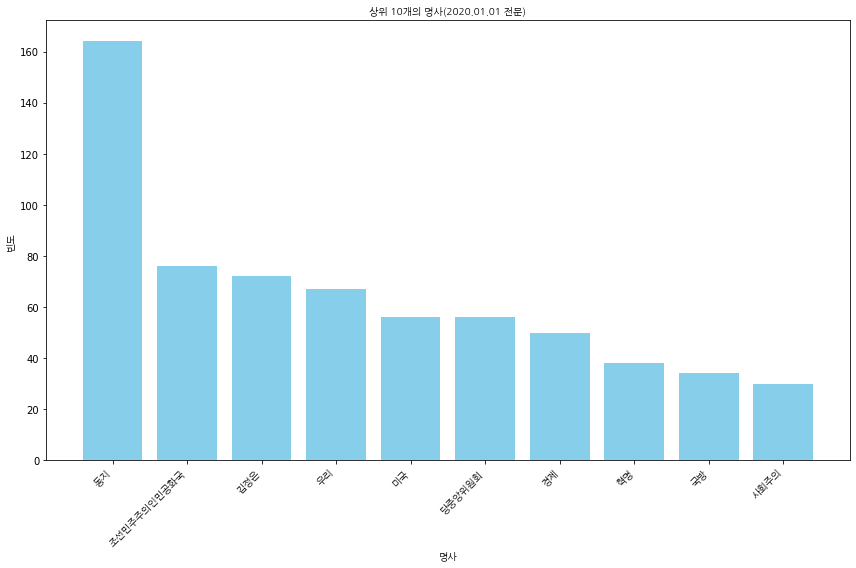

In [312]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_20be).most_common(10)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 10개의 명사(2020.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 20개 단어(전문)

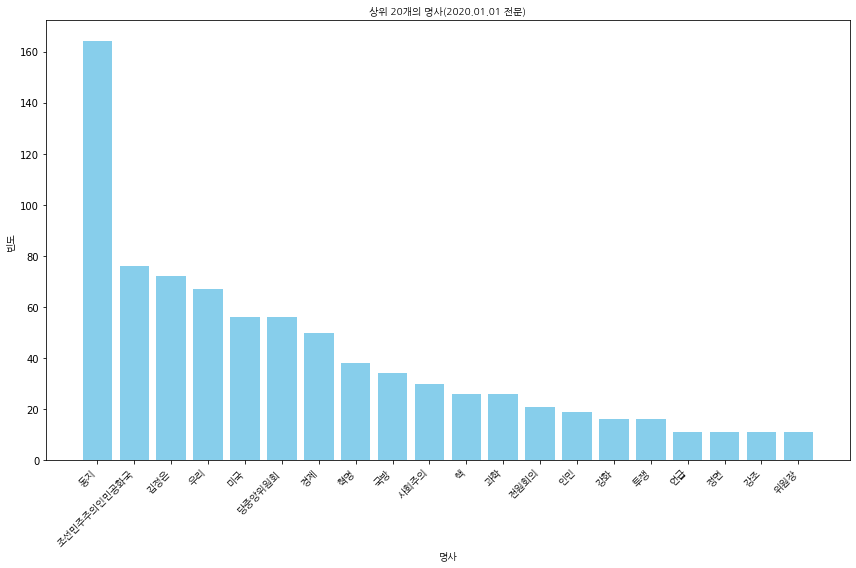

In [313]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_20be).most_common(20)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 20개의 명사(2020.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 30개 단어(전문)

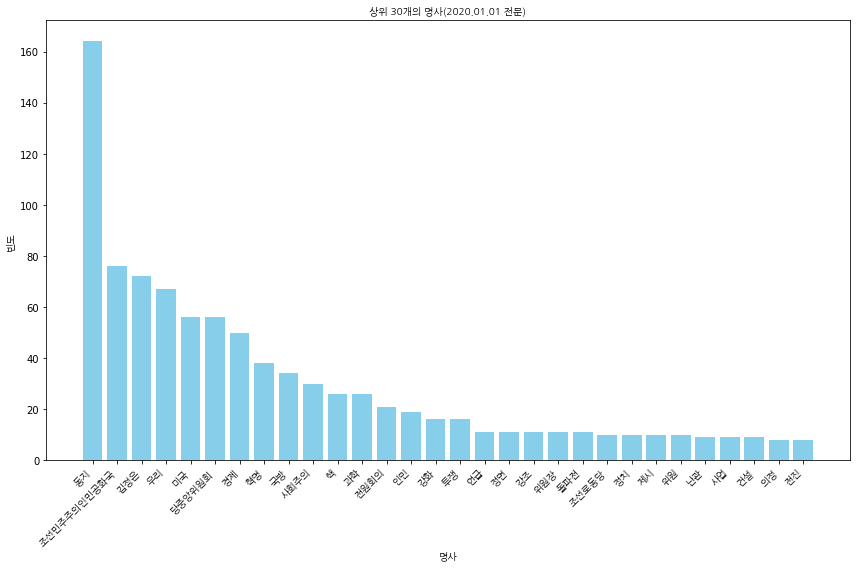

In [314]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_20be).most_common(30)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 30개의 명사(2020.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

# Sheet6 2019.01.01

In [293]:
df_19be = read_data(5,3)

In [294]:
df_19be 

전문  \
0  사랑하는 온 나라 인민들과 인민군장병들!\n\n동포형제자매들!\n\n동지들과 벗들!...   
1                                                NaN   
2                                                NaN   

                                               제목-서론  \
0  사랑하는 온 나라 인민들과 인민군장병들!\n\n동포형제자매들!\n\n동지들과 벗들!...   
1                                                NaN   
2                                                NaN   

                                             정치-김씨일가  \
0  동지들!\n\n주체혁명의 새시대를 빛내이기 위한 투쟁속에서 더욱 세련되고 억세여진 ...   
1                                                NaN   
2                                                NaN   

                                                  경제  \
0  사회주의자립경제의 위력을 더욱 강화하여야 하겠습니다.\n\n우리는 자체의 기술력과 ...   
1  모든 부문, 모든 단위에서 예비와 가능성, 잠재력을 최대한 탐구동원하며 증산하고 절...   
2  인민경제 모든 부문에서 국가경제발전 ５개년전략목표수행에 박차를 가하여야 하겠습니다....   

                                                과학기술  \
0  인재와 과학기술은 사회주의건설에서 대비약을 일으키기 위한 우리의 주되는 전략적자원이...   
1                                                  .   
2                                                  .   

                                                교육문화  \
0  사회주의문명건설을 다그쳐야 하겠습니다.\n\n온 사회에 혁명적학습기풍과 문화정서생활...   
1  사회주의생활양식과 고상한 도덕기풍을 확립하기 위한 된바람을 일으켜 우리 인민의 감정...   
2                                                NaN   

                                                  사회  \
0  \n우리는 올해에도 조국의 부강과 인민의 행복을 위한 거창한 대건설사업들을 통이 크...   
1  인민들이 사회주의보건제도의 우월성을 실감할수 있게 제약공장들과 의료기구공장들을 현대...   
2                                                NaN   

                                                  국방  \
0  국가방위력을 튼튼히 다져야 하겠습니다.\n\n인민군대는 ４대강군화로선을 일관하게 틀...   
1                                                  .   
2                                                NaN   

                                                정치-당  \
0  사회주의 우리 국가의 정치사상적힘을 백방으로 다져나가야 하겠습니다.\n\n주체의 인...   
1  올해 우리앞에 나선 전투적과업을 성과적으로 수행하자면 혁명의 지휘성원들인 일군들이 ...   
2                                                NaN   

                                                  외교  \
0  \n동지들!\n\n지난해는 ７０여년의 민족분렬사상 일찌기 있어본적이 없는 극적인 변...   
1                                                  .   
2                                                NaN   

                                                  결론 Unnamed: 11  
0  동지들!\n\n우리는 내 나라, 내 조국을 위해, 후대들의 더 밝은 웃음을 위해 결...           .  
1                                                NaN         NaN  
2                                                NaN         NaN

## 전문

### 데이터 불러오기

In [295]:
all = df_19be['전문'][0]

In [296]:
all

'사랑하는 온 나라 인민들과 인민군장병들!\n\n동포형제자매들!\n\n동지들과 벗들!\n\n우리는 지울수 없는 또 한번의 력사의 깊은 발자취를 남기며 조국과 혁명, 민족사에 뜻깊은 사변들이 아로새겨진 ２０１８년을 보내고 희망의 꿈을 안고 새해 ２０１９년을 맞이하였습니다.\n\n새해에 즈음하여 나는 격동적인 지난해의 나날들에 우리 당과 숨결과 보폭을 함께 하며 사회주의건설위업에 헌신하여온 전체 인민들과 인민군장병들에게 충심으로 되는 인사를 드리며 온 나라 가정들에 사랑과 희망, 행복이 넘쳐나기를 축원합니다.\n\n나는 민족의 화해와 단합, 평화번영의 새 력사를 써나가기 위하여 우리와 마음을 같이한 남녘겨레들과 해외동포들에게 따뜻한 새해인사를 보냅니다.\n\n나는 사회적진보와 발전, 세계의 평화와 정의를 위하여 노력하고있는 각국의 수반들과 벗들의 사업에서 성과가 있기를 바랍니다.\n\n동지들!\n\n２０１８년은 우리 당의 자주로선과 전략적결단에 의하여 대내외정세에서 커다란 변화가 일어나고 사회주의건설이 새로운 단계에 들어선 력사적인 해였습니다.\n\n지난해 ４월에 진행된 당중앙위원회 제７기 제３차전원회의는 병진로선의 위대한 승리에 토대하여 우리 혁명을 새롭게 상승시키고 사회주의의 전진속도를 계속 높여나가는데서 전환적의의를 가지는 중요한 계기로 되였습니다.사회주의에 대한 필승의 신념을 지니고 간고한 투쟁의 길을 걸어온 우리 인민은 자주권수호와 평화번영의 굳건한 담보를 제손으로 마련하고 부강조국건설의 더 높은 목표를 점령하기 위한 혁명적대진군에 떨쳐나서게 되였습니다.\n\n우리의 주동적이면서도 적극적인 노력에 의하여 조선반도에서 평화에로 향한 기류가 형성되고 공화국의 국제적권위가 계속 높아가는 속에 우리 인민은 커다란 긍지와 자부심을 안고 영광스러운 조선민주주의인민공화국창건 일흔돐을 성대히 경축하였습니다.\n\n９월의 경축행사들을 통하여 온 사회의 사상적일색화와 당과 인민의 일심단결을 실현하고 튼튼한 자립경제와 자위적국방력을 가진 우리 공화국의 위력과 사회주의위업의 

### 특수기호 일차적으로 제거

In [297]:
import re
all = re.sub(r'[()《》!]', ' ', all) #특수기호 제거, 정규 표현식  

### '\n\n'를 기준으로 문장 나누기

In [298]:
all = all.split('\n\n')

### 특수기호 이차적으로 ('1. ','2. ','3. ', '4. ' ,'\n' 등) 삭제

In [299]:
for idx,sent in enumerate(all):
    if ('1. ' in sent) or ('2. ' in sent) or ('3. ' in sent) or ('4. ' in sent) or ('5. 'in sent) or ('6. 'in sent):
        all[idx] = sent[3:]

In [300]:
all_19be = []
for text in all:
    all_19be.append(re.sub(r'[\n]', ' ', text))

In [301]:
all_19be = all_19be[:-1]

### 이름 추출
이름 언급이 없었다.

In [302]:
for sen in all_19be:
    if '동지' in sen :
        print(sen)

동지들과 벗들 
동지들 
동지들 
동지들 
동지들 
동지들 
동지들 


### 권력구조와 정치형태 관련 단어 사용자 정의 사전을 사용하여 명사 추출

In [303]:
user_defined_extracted_nouns,texts_without_user_nouns  = [],[]
for text in all_19be:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,user_defined_nouns)
    user_defined_extracted_nouns.append(extracted_nouns)
    texts_without_user_nouns.append(remaining_text)

In [304]:
user_defined_extracted_nouns

[[('인민군장병', 1), ('인민', 1), ('나라', 1)],
 [('동포', 1)],
 [('동지', 1)],
 [('조국', 1), ('혁명', 1), ('력사', 1), ('우리', 1)],
 [('인민군장병', 1),
  ('사회주의', 1),
  ('우리 당', 1),
  ('인민', 1),
  ('인사', 1),
  ('나라', 1),
  ('건설', 1)],
 [('해외동포', 1), ('평화번영', 1), ('인사', 1), ('남녘', 1), ('력사', 1), ('우리', 1)],
 [],
 [('동지', 1)],
 [('사회주의', 1), ('우리 당', 1), ('대내외', 1), ('력사적', 1), ('건설', 1), ('정세', 1)],
 [('당중앙위원회', 1),
  ('사회주의', 2),
  ('평화번영', 1),
  ('전원회의', 1),
  ('조국', 1),
  ('인민', 1),
  ('혁명', 2),
  ('우리', 2),
  ('건설', 1),
  ('투쟁', 1)],
 [('조선민주주의인민공화국', 1), ('조선반도', 1), ('공화국', 1), ('인민', 1), ('우리', 2)],
 [('자립경제', 1),
  ('사회주의', 1),
  ('공화국', 1),
  ('국방력', 1),
  ('인민', 2),
  ('행사', 1),
  ('우리', 1),
  ('투쟁', 1)],
 [('자립경제', 1), ('경제건설', 1), ('인민', 1)],
 [('인민', 2), ('전력', 1), ('화학', 1), ('경제', 1), ('우리', 4), ('투쟁', 1)],
 [('자립경제', 1), ('로동계급', 1), ('농업부', 1), ('농장', 1), ('석탄', 1), ('투쟁', 2)],
 [('군수공업부', 1),
  ('우리 당', 1),
  ('경제발전', 1),
  ('경제건설', 1),
  ('농기계', 1),
  ('인민', 2),
  ('전투', 1),
  ('건설', 1)],


#### 동의어 처리

In [305]:
word_frequencies_user_defined_nouns=merge_synonyms_with_frequencies(user_defined_extracted_nouns,synonym_dict)

#### 빈도수 구하기

In [306]:
word_frequencies_user = Counter(word_frequencies_user_defined_nouns)

In [307]:
texts_without_user_nouns

['사랑하는 온    들과  들 ',
 ' 형제자매들 ',
 ' 들과 벗들 ',
 ' 는 지울수 없는 또 한번의  의 깊은 발자취를 남기며  과  , 민족사에 뜻깊은 사변들이 아로새겨진 ２０１８년을 보내고 희망의 꿈을 안고 새해 ２０１９년을 맞이하였습니다.',
 '새해에 즈음하여 나는 격동적인 지난해의 나날들에  과 숨결과 보폭을 함께 하며   위업에 헌신하여온 전체  들과  들에게 충심으로 되는  를 드리며 온   가정들에 사랑과 희망, 행복이 넘쳐나기를 축원합니다.',
 '나는 민족의 화해와 단합,  의 새  를 써나가기 위하여  와 마음을 같이한  겨레들과  들에게 따뜻한 새해 를 보냅니다.',
 '나는 사회적진보와 발전, 세계의 평화와 정의를 위하여 노력하고있는 각국의 수반들과 벗들의 사업에서 성과가 있기를 바랍니다.',
 ' 들 ',
 '２０１８년은  의 자주로선과 전략적결단에 의하여   에서 커다란 변화가 일어나고   이 새로운 단계에 들어선  인 해였습니다.',
 '지난해 ４월에 진행된   제７기 제３차 는 병진로선의 위대한 승리에 토대하여    을 새롭게 상승시키고  의 전진속도를 계속 높여나가는데서 전환적의의를 가지는 중요한 계기로 되였습니다. 에 대한 필승의 신념을 지니고 간고한  의 길을 걸어온    은 자주권수호와  의 굳건한 담보를 제손으로 마련하고 부강  의 더 높은 목표를 점령하기 위한  적대진군에 떨쳐나서게 되였습니다.',
 ' 의 주동적이면서도 적극적인 노력에 의하여  에서 평화에로 향한 기류가 형성되고  의 국제적권위가 계속 높아가는 속에    은 커다란 긍지와 자부심을 안고 영광스러운  창건 일흔돐을 성대히 경축하였습니다.',
 '９월의 경축 들을 통하여 온 사회의 사상적일색화와 당과  의 일심단결을 실현하고 튼튼한  와 자위적 을 가진    의 위력과  위업의 승리를 위해 끝까지  하려는 영웅적조선 의 강렬한 의지를 세계앞에 힘있게 과시하였습니다.',
 '지난해에 전체  이  에 총력을 집중할데 대한 당의 새로운 전략적로선관

### 불용어 제거

In [308]:
texts_without_stopwords=[]
for text in texts_without_user_nouns:
    remaining_text = remove_stopwords(text,stopwords)
    texts_without_stopwords.append(remaining_text)

In [309]:
texts_without_stopwords

['사랑   온          ',
 ' 형제자매  ',
 '    벗  ',
 ' 는 지울수    또 한번     깊은 발자취를 남기며     , 민족사에    사변   아로새겨진   을 보내고 희망  꿈을         을 맞이하  .',
 '  에       격동       나날      숨결  보폭을         위업에 헌신  온 전체      들   충심       를    온   가정   사랑  희망, 행복  넘쳐나기를 축원  .',
 '   민족  화해와 단합,       를        와 마음을      겨레    들   따뜻     를   .',
 '   사회적진보와 발전, 세계  평화와 정의를    노력   각국  수반   벗   사업   성   있기를   .',
 '   ',
 '  은      로선  전략적결단           변화  일어나고         단계에 들어선  인 해  .',
 '     에 진행       는 병진로선  위대  승리에 토      을     상승      전진속도를    높여나     전환적의의를 가지는 중요  계기  되  .    필승  신념을 지니고 간고     을 걸어온    은   권수호와        담보를 제손   마련   부강    더    목표를 점령    적대진군에 떨쳐나서게 되  .',
 '   주동적이면서도 적극   노력       평화   향  기류  형성      국제적권위     높아         은    긍지와 자부심을    영광    창건   을    경축하  .',
 '    경축     온 사회  사상적일색화와 당     일심단결을 실현   튼튼   와 자위  을 가진      위력   위업  승리를 위해        영웅적조선   강렬  의지를 세계   힘   과시하  .',
 '   전체     에 총력을 집중   대  당      전략적로선관철에 떨쳐     토대를 일층 강화하  .',
 '      화로선을 관철       의미   소중  전진  이룩되  .북창

#### '조선로동'이라는 단어는 단독으로 쓰인 단어가 아닌 '조선로동당 중앙위원회'와 같이 사용된 단어로 삭제한다.


In [310]:
sentences = []
for sentence in texts_without_stopwords:
    sentences.append(sentence.replace("조선로동", " "))
    

In [311]:
texts_without_stopwords = sentences

In [312]:
remaining_text = clean_text(texts_without_stopwords)

In [313]:
texts_without_stopwords = remaining_text

### soynlp 명사 추출기 ( 이미 명사로 분류된 단어들은 제외)

In [314]:
from soynlp.noun import LRNounExtractor_v2
noun_extractor = LRNounExtractor_v2(verbose=True, extract_compound=True)
noun_extractor.train(texts_without_stopwords)
soynlp_nouns = noun_extractor.extract()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 1188 from 120 sents. mem=0.194 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=1535, mem=0.194 Gb
[Noun Extractor] batch prediction was completed for 409 words
[Noun Extractor] checked compounds. discovered 6 compounds
[Noun Extractor] postprocessing detaching_features : 112 -> 112
[Noun Extractor] postprocessing ignore_features : 112 -> 110
[Noun Extractor] postprocessing ignore_NJ : 110 -> 110
[Noun Extractor] 110 nouns (6 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.194 Gb                    
[Noun Extractor] 25.34 % eojeols are covered


In [315]:
#soynlp로 추출된 명사를 (명사,빈도수)로 저장
extracted_soynlp_words = {word:score.frequency for word,score in soynlp_nouns.items() if len(word) >= 2}
extracted_soynlp_words

{'개성공업지구': 2,
 '적적대관계': 1,
 '전략적로선': 1,
 '평화체제': 2,
 '적대진군': 2,
 '문제해결': 2,
 '만들어': 1,
 '국산화': 1,
 '잠재력': 3,
 '대비약': 2,
 '대전환': 2,
 '활성화': 3,
 '세차례': 2,
 '결심': 5,
 '평화': 13,
 '화해': 3,
 '긍지': 2,
 '시대': 8,
 '제재': 3,
 '인재': 2,
 '농사': 2,
 '의사': 2,
 '행위': 3,
 '신뢰': 1,
 '전개': 2,
 '문제': 3,
 '마련': 2,
 '이룩': 7,
 '모색': 2,
 '추진': 7,
 '일어': 3,
 '대표': 2,
 '경축': 2,
 '과시': 2,
 '강화': 6,
 '추동': 5,
 '여러': 8,
 '관계': 6,
 '의지': 3,
 '사회': 3,
 '정의': 2,
 '승리': 4,
 '담보': 3,
 '토대': 1,
 '성과': 3,
 '기치': 2,
 '구호': 2,
 '지도': 2,
 '제도': 1,
 '철도': 1,
 '요구': 3,
 '조치': 3,
 '과거': 2,
 '교류': 2,
 '늘어': 2,
 '지켜': 2,
 '발전': 17,
 '생산': 9,
 '노력': 9,
 '전환': 5,
 '사업': 9,
 '위력': 3,
 '현실': 4,
 '단합': 2,
 '전진': 4,
 '신념': 2,
 '실현': 5,
 '자원': 3,
 '보람': 2,
 '생활': 2,
 '작전': 4,
 '난관': 2,
 '결정': 3,
 '확신': 3,
 '도전': 4,
 '진군': 1,
 '전망': 1,
 '동력': 1,
 '자각': 1,
 '군중': 2,
 '관심': 1,
 '열망': 2,
 '회담': 3,
 '친선': 2,
 '안정': 2,
 '위업': 3,
 '다그': 3,
 '예술': 2,
 '주인': 3,
 '생산활성화': 1.0,
 '생산토대': 1.0,
 '평화시대': 1.0,
 '시대발전': 1.0}

In [316]:
word_frequencies_soynlp=Counter(extracted_soynlp_words)

#### soynlp로 추출한 명사 데이터셋에서 삭제

In [317]:
#texts_without_stopwords에 삭제할 단어 저장
remove_word_soynlp = [ word for word in soynlp_nouns if len(word) >= 2]

In [318]:
#soynlp로 추출된 명사들을 texts_without_stopwords에서 삭제한다.
texts_without_soynlp=[]
for text in texts_without_stopwords:
    remaining_text = remove_stopwords(text,remove_word_soynlp)
    texts_without_soynlp.append(remaining_text)

In [319]:
texts_without_soynlp

['사랑 ',
 '형제자매 ',
 '',
 '지울수 한번 깊은 발자취를 남기며 민족사에 사변 아로새겨진 보내고 희망 꿈을 맞이하 ',
 '격동 나날 숨결 보폭을   에 헌신 전체 충심 가정 사랑 희망, 행복 넘쳐나기를 축원 ',
 '민족   와   , 마음을 겨레 따뜻 ',
 '  적진보와   , 세계   와   를    각국 수반    있기를 ',
 '',
 '로선 전략적결단 변화   나고 단계에 들어선 ',
 '진행 병진로선 위대   에 상승   속도를 높여나   적의의를 가지는 중요 계기 필승   을 지니고 간고 걸어온 권수호와   를 제손    부강 목표를 점령   에 떨쳐나서게 ',
 '주동적이면서도 적극       기류 형성 국제적권위 높아   와 자부심을 영광 창건   하 ',
 '      사상적일색화와 일심단결을    튼튼 자위 가진         를 위해 영웅적조선 강렬   를 세계   하 ',
 '전체 총력을 집중   관철에 떨쳐   를 일층   하 ',
 '화로선을 관철 의미 소중      되 .북창화력  련합기업소   능력   나고 김철 황철 금속공장들   를 확대 공업 자립적  를         되 힘, 기술,      낸   와    보기만 해도 흐뭇 륜전기계 경공업제품 질적수준 한계단 도약 대량   기쁘게 ',
 '공업 어려운 생명선을    결사    벌렸 알곡증산 이악 불리 일기조건 확을    단위 수많 배출되 ',
 '힘을 집중 적호소를 심장 받아   가지 기계, 협동품 소비품      향상을   하 ',
 '웅대 구상      를 빛내 방대    립체   됨    끄떡없고 멈춤 노도와 떨쳐   승승장 조선 억센 기상 막강      되 ',
 '   적  을 일으킬데   을 첨단산업   을      에 이바지 가치 연구   내놓았 적극    전국 많은 대학 중학교, 소학교 조건 환경 개선되 ',
 '대집단체조와   공연을 창작공연 반향을 불러일으키고      면모와 특유와 우월성을 뚜렷 시위하 ',
 '',
 '기에 자랑찬   

In [320]:
remaining_text = clean_text(texts_without_soynlp) 

In [321]:
remaining_text

['사랑 ',
 '형제자매 ',
 '',
 '지울수 한번 깊은 발자취를 남기며 민족사에 사변 아로새겨진 보내고 희망 꿈을 맞이하 ',
 '격동 나날 숨결 보폭을 헌신 전체 충심 가정 사랑 희망, 행복 넘쳐나기를 축원 ',
 '민족 마음을 겨레 따뜻 ',
 '적진보와 세계 각국 수반 있기를 ',
 '',
 '로선 전략적결단 변화 나고 단계에 들어선 ',
 '진행 병진로선 위대 상승 속도를 높여나 적의의를 가지는 중요 계기 필승 지니고 간고 걸어온 권수호와 제손 부강 목표를 점령 떨쳐나서게 ',
 '주동적이면서도 적극 기류 형성 국제적권위 높아 자부심을 영광 창건 ',
 '사상적일색화와 일심단결을 튼튼 자위 가진 위해 영웅적조선 강렬 세계 ',
 '전체 총력을 집중 관철에 떨쳐 일층 ',
 '화로선을 관철 의미 소중 .북창화력 련합기업소 능력 나고 김철 황철 금속공장들 확대 공업 자립적 힘, 기술, 보기만 해도 흐뭇 륜전기계 경공업제품 질적수준 한계단 도약 대량 기쁘게 ',
 '공업 어려운 생명선을 결사 벌렸 알곡증산 이악 불리 일기조건 확을 단위 수많 배출되 ',
 '힘을 집중 적호소를 심장 받아 가지 기계, 협동품 소비품 향상을 ',
 '웅대 구상 빛내 방대 립체 끄떡없고 멈춤 노도와 떨쳐 승승장 조선 억센 기상 막강 ',
 '일으킬데 첨단산업 이바지 가치 연구 내놓았 적극 전국 많은 대학 중학교, 소학교 조건 환경 개선되 ',
 '대집단체조와 공연을 창작공연 반향을 불러일으키고 면모와 특유와 우월성을 뚜렷 시위하 ',
 '',
 '기에 자랑찬 한페지를 새긴 정당성 불패 힘에 다시금 .부 맞받아나 불굴 자강력은 육성 발걸음은 빨라지고있 ',
 '자리를 빌어 멈춤없 달려 청사에 위훈을 세운 전체 뜨거운 감사 드리고싶 ',
 '',
 '빛내 세련 억세여진 신심 포부를 길에 나섰 ',
 '자립적 능력을 확대 진일보 확고 열어놓 ',
 '밝은 앞날을 자력 개척 방략 창조방식 .당 틀어쥐고 자력갱생, 견인불발 국력은 배가 훌륭히 ',
 '자력갱생 진격로를 열어나가자 로

In [322]:
texts_without_soynlp = remaining_text

### 북한 용어사전을 활용하여 명사 추출

In [323]:
site_defined_extracted_nouns,texts_without_extracted_nouns = [],[]
for text in texts_without_soynlp:
    extracted_nouns, remaining_text = extract_site_defined_nouns(text,dict_site)
    site_defined_extracted_nouns.append(extracted_nouns)
    texts_without_extracted_nouns.append(remaining_text)

In [324]:
# 리스트 평탄화
site_defined_extracted_nouns = [item for sublist in site_defined_extracted_nouns for item in sublist]

print(site_defined_extracted_nouns)

['겨레', '진보', '단계', '로선', '가지', '니고', '로선', '부심', '사상', '일심', '자위', '조선', '련합기업소', '륜전기계', '로선', '보기', '화력', '이악', '증산', '가지', '립체', '조선', '가치', '소학', '연구', '전국', '대집', '걸음', '라지', '시금', '정당', '리고', '자리', '세련', '불발', '창조', '로정', '보검', '앙양', '단계', '장성', '적목', '정신', '창조', '동원', '련쇄', '경영', '공간', '구체', '로자', '리방', '창조', '체계', '적지', '교수', '력량', '연구', '장성', '지적', '창조', '년전', '선차', '대상', '리용', '리용', '지방', '정상', '화력', '화력', '사상', '정신', '지원', '정상', '련합기업소', '린비료', '만가동', '비날론', '회망초', '로력', '기계제작공업', '통과능력', '가지', '공기', '규률', '바람', '장성', '주타격', '전방', '증산', '분배', '개인부업', '축산기지', '닭공장', '지게', '물고', '잡이', '가지', '방공', '정상', '마감건재', '삼지연군', '세멘트', '갈마', '누리', '대상', '전국', '최상', '경영', '록화', '동원', '완수', '증산', '지표', '두리', '고작', '관료', '놓고', '만사', '복무', '일체', '천사', '파괴', '간직', '로자', '세대', '반영', '영화', '적재', '정서', '정신', '지니', '지식', '화적', '랑만', '리고', '사수', '전문', '조선', '대가정', '바람', '정서', '로선', '창조', '사보', '자위', '지원', '일군', '무결', '보고', '실력', '일군', '일군', '해제', '정신', '창조', '창조', '초소', '후대', '당조', '단적', '당조', '방공

In [325]:
word_frequencies_site = Counter(site_defined_extracted_nouns)

In [326]:
word_frequencies_site

Counter({'겨레': 6,
         '진보': 1,
         '단계': 3,
         '로선': 4,
         '가지': 7,
         '니고': 2,
         '부심': 1,
         '사상': 2,
         '일심': 1,
         '자위': 2,
         '조선': 3,
         '련합기업소': 2,
         '륜전기계': 1,
         '보기': 1,
         '화력': 3,
         '이악': 1,
         '증산': 3,
         '립체': 1,
         '가치': 1,
         '소학': 1,
         '연구': 2,
         '전국': 2,
         '대집': 1,
         '걸음': 3,
         '라지': 1,
         '시금': 2,
         '정당': 1,
         '리고': 2,
         '자리': 2,
         '세련': 1,
         '불발': 1,
         '창조': 7,
         '로정': 1,
         '보검': 1,
         '앙양': 1,
         '장성': 3,
         '적목': 1,
         '정신': 5,
         '동원': 2,
         '련쇄': 1,
         '경영': 2,
         '공간': 1,
         '구체': 1,
         '로자': 2,
         '리방': 1,
         '체계': 1,
         '적지': 1,
         '교수': 1,
         '력량': 1,
         '지적': 1,
         '년전': 1,
         '선차': 1,
         '대상': 2,
         '리용': 2,
         '지방': 1,
     

In [327]:
remaining_text = clean_text(texts_without_extracted_nouns)

In [328]:
remaining_text

['사랑 ',
 '형제자매 ',
 '',
 '지울수 한번 깊은 발자취를 남기며 민족사에 사변 아로새겨진 보내고 희망 꿈을 맞이하 ',
 '격동 나날 숨결 보폭을 헌신 전체 충심 가정 사랑 희망, 행복 넘쳐나기를 축원 ',
 '민족 마음을 따뜻 ',
 '세계 각국 수반 있기를 ',
 '',
 '전략적결단 변화 나고 들어선 ',
 '진행 병진 위대 상승 속도를 높여나 적의의를 중요 계기 필승 간고 걸어온 권수호와 제손 부강 목표를 점령 떨쳐나서게 ',
 '주동적이면서도 적극 기류 형성 국제적권위 높아 영광 창건 ',
 '적일색화와 단결을 튼튼 가진 위해 영웅적 강렬 세계 ',
 '전체 총력을 집중 관철에 떨쳐 일층 ',
 '관철 의미 소중 .북창 능력 나고 김철 황철 금속공장들 확대 공업 자립적 힘, 기술, 해도 흐뭇 경공업제품 질적수준 한계단 도약 대량 기쁘게 ',
 '공업 어려운 생명선을 결사 벌렸 알곡 불리 일기조건 확을 단위 수많 배출되 ',
 '힘을 집중 적호소를 심장 받아 기계, 협동품 소비품 향상을 ',
 '웅대 구상 빛내 방대 끄떡없고 멈춤 노도와 떨쳐 승승장 억센 기상 막강 ',
 '일으킬데 첨단산업 이바지 내놓았 적극 많은 대학 중학교, 조건 환경 개선되 ',
 '단체조와 공연을 창작공연 반향을 불러일으키고 면모와 특유와 우월성을 뚜렷 시위하 ',
 '',
 '기에 자랑찬 한페지를 새긴 불패 힘에 .부 맞받아나 불굴 자강력은 육성 고있 ',
 '빌어 멈춤없 달려 청사에 위훈을 세운 전체 뜨거운 감사 ',
 '',
 '빛내 억세여진 신심 포부를 길에 나섰 ',
 '자립적 능력을 확대 진일보 확고 열어놓 ',
 '밝은 앞날을 자력 개척 방략 방식 .당 틀어쥐고 자력갱생, 견인 국력은 배가 훌륭히 ',
 '자력갱생 진격로를 열어나가자 비약 자력갱생을 번영 틀어쥐고 전선 일으켜 ',
 '',
 '자체 기술력 전체 적열의에 전략 표를 달성 이행 ',
 '정비보강 ',
 '발양 요소와 살리 전략적대책 강구 인적, 물적 실리 조직 중심을 틀어쥐고 고리를 추켜

In [329]:
texts_without_extracted_nouns = remaining_text

### Mecab 명사 추출기(이미 명사로 분류된 단어들은 제외)

In [330]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab_nouns = []
for text in texts_without_extracted_nouns:
    mecab_nouns += mecab.nouns(text)

In [331]:
mecab_nouns

['사랑',
 '형제자매',
 '수',
 '번',
 '발자취',
 '민족사',
 '사변',
 '희망',
 '꿈',
 '격동',
 '나날',
 '숨결',
 '보폭',
 '헌신',
 '전체',
 '충심',
 '가정',
 '사랑',
 '희망',
 '행복',
 '축원',
 '민족',
 '마음',
 '세계',
 '각국',
 '수반',
 '전략',
 '결단',
 '변화',
 '진행',
 '병진',
 '위대',
 '상승',
 '속도',
 '나',
 '의의',
 '중요',
 '계기',
 '필승',
 '간고',
 '권',
 '수호',
 '제',
 '손',
 '부강',
 '목표',
 '점령',
 '주동',
 '적극',
 '기류',
 '형성',
 '국제',
 '권위',
 '영광',
 '창건',
 '일색',
 '단결',
 '영웅',
 '세계',
 '전체',
 '총력',
 '집중',
 '관철',
 '관철',
 '미',
 '소중',
 '북창',
 '능력',
 '김철',
 '황철',
 '금속',
 '공장',
 '확대',
 '공업',
 '자립',
 '힘',
 '기술',
 '경공업',
 '제품',
 '수준',
 '계단',
 '대량',
 '공업',
 '생명선',
 '결사',
 '알곡',
 '불리',
 '일기',
 '조건',
 '확',
 '단위',
 '배출',
 '힘',
 '집중',
 '호소',
 '심장',
 '기계',
 '협',
 '동품',
 '소비품',
 '향상',
 '구상',
 '방대',
 '노도',
 '승승',
 '장',
 '기상',
 '막강',
 '데',
 '첨단',
 '산업',
 '바지',
 '적극',
 '대학',
 '중학교',
 '조건',
 '환경',
 '개선',
 '단체',
 '조',
 '공연',
 '창작',
 '공연',
 '반향',
 '면모',
 '특유',
 '우월성',
 '기',
 '자랑',
 '찬',
 '페지',
 '불패',
 '힘',
 '부',
 '불굴',
 '강력',
 '육성',
 '청사',
 '위훈',
 '전체',
 '감사',
 '신심',
 '포부',
 '길',
 '자

In [332]:
mecab_nouns_clean = []
for char in mecab_nouns:
    if len(char)>1:
        mecab_nouns_clean.append(char)

In [333]:
mecab_nouns = [map_to_synonym(noun, synonym_dict) for noun in mecab_nouns_clean] #동의어 처리

In [334]:
texts_without_mecab=[]
for text in texts_without_extracted_nouns:
    remaining_text = remove_stopwords(text,mecab_nouns)
    texts_without_mecab.append(remaining_text)

In [335]:
texts_without_mecab

['   ',
 '   ',
 '',
 '지울수 한번 깊은   를 남기며   에    아로새겨진 보내고    꿈을 맞이하 ',
 '           을                  ,    넘쳐나기를    ',
 '     을 따뜻 ',
 '         있기를 ',
 '',
 '  적      나고 들어선 ',
 '              를 높여나 적  를             걸어온 권  와 제손      를    떨쳐나서게 ',
 '  적이면서도            적   높아       ',
 '적  화와   을 튼튼 가진 위해   적 강렬    ',
 '     을      에 떨쳐 일층 ',
 '   의미    .      나고           들         적 힘,   , 해도 흐뭇 경     질적   한   도약    기쁘게 ',
 '   어려운   을    벌렸            확을    수많   되 ',
 '힘을    적  를    받아   , 협        을 ',
 '웅대    빛내    끄떡없고 멈춤   와 떨쳐   장 억센       ',
 '일으킬데      이   내놓았    많은      ,         되 ',
 '  조와   을        을 불러일으키고   와   와   을 뚜렷 시위하 ',
 '',
 '기에   찬 한  를 새긴    힘에 .부 맞받아나    자  은    고있 ',
 '빌어 멈춤없 달려   에   을 세운    뜨거운    ',
 '',
 '빛내 억세여진      를 길에 나섰 ',
 '  적   을       확고 열어놓 ',
 '밝은   을             .당 틀어쥐고   갱생,      은 배가 훌륭히 ',
 '  갱생   로를 열어나가자      갱생을    틀어쥐고    일으켜 ',
 '',
 '     력    적  에    표를       ',
 '     ',
 '     와      적      인적, 물적         을 틀어쥐고   를 추켜세우며    ',

In [336]:
#단어 빈도수 계산
from collections import Counter
word_frequencies_mecab = Counter(mecab_nouns)
word_frequencies_mecab

Counter({'사랑': 3,
         '형제자매': 1,
         '발자취': 1,
         '민족사': 1,
         '사변': 3,
         '희망': 2,
         '격동': 3,
         '나날': 1,
         '숨결': 1,
         '보폭': 1,
         '헌신': 1,
         '전체': 5,
         '충심': 1,
         '가정': 1,
         '행복': 2,
         '축원': 1,
         '민족': 14,
         '마음': 4,
         '세계': 7,
         '각국': 1,
         '수반': 1,
         '전략': 5,
         '결단': 1,
         '변화': 3,
         '진행': 3,
         '병진': 1,
         '위대': 2,
         '상승': 1,
         '속도': 2,
         '의의': 2,
         '중요': 2,
         '계기': 1,
         '필승': 1,
         '간고': 1,
         '수호': 5,
         '부강': 3,
         '목표': 3,
         '점령': 1,
         '주동': 3,
         '적극': 8,
         '기류': 1,
         '형성': 1,
         '국제': 6,
         '권위': 1,
         '영광': 1,
         '창건': 2,
         '일색': 1,
         '단결': 2,
         '영웅': 1,
         '총력': 1,
         '집중': 4,
         '관철': 5,
         '소중': 2,
         '북창': 1,
         '능력': 6,
     

### 모두 합하기

In [337]:
word_frequencies_all_19be = word_frequencies_mecab+word_frequencies_soynlp+word_frequencies_site+word_frequencies_user

In [338]:
combined_all_19be = merge_frequencies_with_synonyms(word_frequencies_all_19be, synonym_dict)
combined_all_19be

{'농업': 12,
 '혁명': 34,
 '사회주의': 78,
 '조선민주주의인민공화국': 145,
 '대한민국': 4,
 '북남': 48,
 '미국': 20,
 '우리': 75,
 '조선로동당': 2,
 '당중앙위원회': 4,
 '당대표자회': 2,
 '경제': 76,
 '핵': 6,
 '통일': 28,
 '국방': 24,
 '과학': 18,
 '력사': 16,
 '친선': 6,
 '애국': 2,
 '동지': 18,
 '강국': 1,
 '정치사상': 4,
 '문명': 2,
 '에네르기': 10,
 '수산업': 6,
 '일꾼': 4,
 '사랑': 3,
 '형제자매': 1,
 '발자취': 1,
 '민족사': 1,
 '사변': 3,
 '희망': 2,
 '격동': 3,
 '나날': 1,
 '숨결': 1,
 '보폭': 1,
 '헌신': 1,
 '전체': 5,
 '충심': 1,
 '가정': 1,
 '행복': 2,
 '축원': 1,
 '민족': 14,
 '마음': 4,
 '세계': 7,
 '각국': 1,
 '수반': 1,
 '전략': 5,
 '결단': 1,
 '변화': 3,
 '진행': 3,
 '병진': 1,
 '위대': 2,
 '상승': 1,
 '속도': 2,
 '의의': 2,
 '중요': 2,
 '계기': 1,
 '필승': 1,
 '간고': 1,
 '수호': 5,
 '부강': 3,
 '목표': 3,
 '점령': 1,
 '주동': 3,
 '적극': 8,
 '기류': 1,
 '형성': 1,
 '국제': 6,
 '권위': 1,
 '영광': 1,
 '창건': 2,
 '일색': 1,
 '단결': 2,
 '영웅': 1,
 '총력': 1,
 '집중': 4,
 '관철': 5,
 '소중': 2,
 '북창': 1,
 '능력': 6,
 '김철': 1,
 '황철': 1,
 '금속': 4,
 '공장': 7,
 '확대': 5,
 '공업': 13,
 '자립': 2,
 '기술': 9,
 '경공업': 1,
 '제품': 1,
 '수준': 4,
 '계단': 1,
 '대량': 1,
 '생명선': 1,


In [339]:
doc_word_freq['19be'] = combined_all_19be
update_excel_with_new_doc(doc_word_freq, file_path)

Excel 파일이 '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'로 업데이트되었습니다.


### 단어 빈도 시각화

#### 상위 10개 단어(전문)

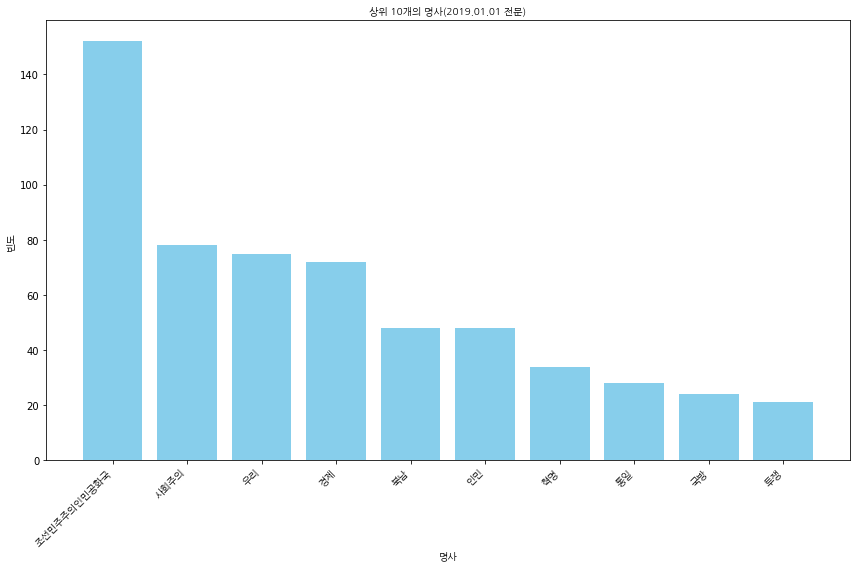

In [359]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_19be).most_common(10)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 10개의 명사(2019.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 20개 단어(전문)

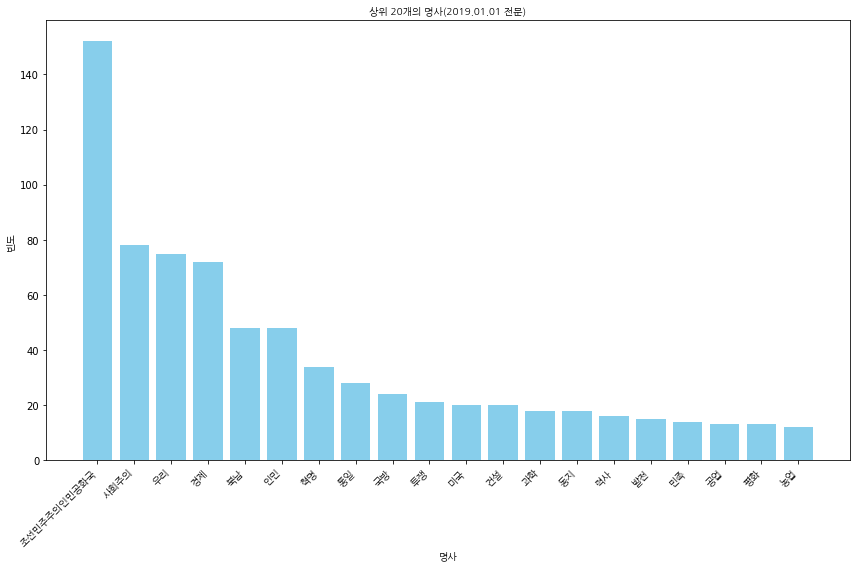

In [360]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_19be).most_common(20)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 20개의 명사(2019.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 30개 단어(전문)

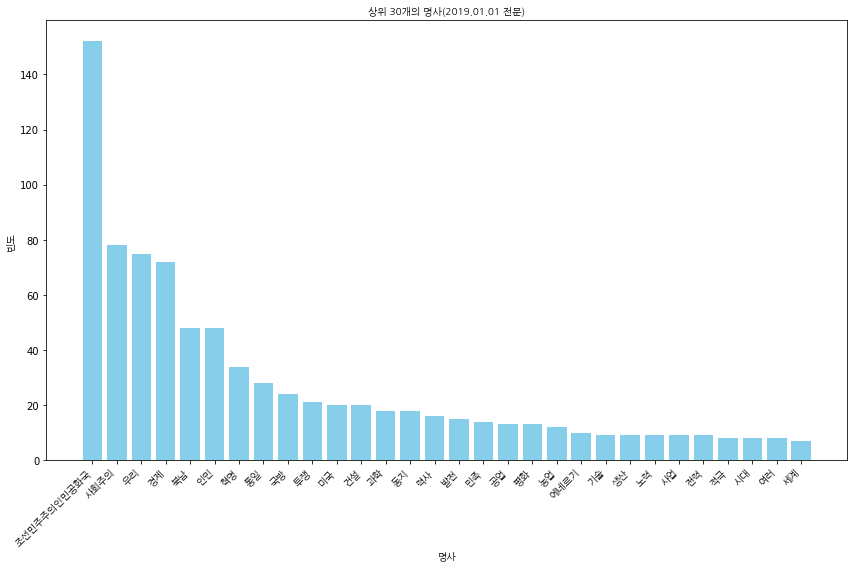

In [361]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_19be).most_common(30)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 30개의 명사(2019.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

# Sheet7 2018.01.01

In [340]:
df_18be = read_data(6,3)

In [341]:
df_18be

전문  \
0  지금부터 조선 노동당 위원장이시자 국무위원회 위원장이며 최고사령관 당과 국가 군대 ...   
1                                                NaN   

                                               제목-서론  \
0  지금부터 조선 노동당 위원장이시자 국무위원회 위원장이며 최고사령관 당과 국가 군대 ...   
1                                                NaN   

                                             정치-김씨일가  \
0  동지들. 올해 우리는 영광스러운 조선민주주의 인민공화국 창건 70주년을 맞이하게 됩...   
1                                                NaN   

                                                  경제  \
0  국가 경제발전 5개년 전략 수행의 세 번째 해인 올해 경제전선 전반에서 활성화의 돌...   
1                                                NaN   

                                                과학기술  \
0  자립경제 발전의 지름길은 과학기술을 앞세우고 경제작전과 지휘를 혁신하는데 있습니다....   
1  내각을 비롯한 경제지도 기관들은 올해 인민경제 계획을 수행하기 위한 작전안을 현실성...   

                                                교육문화  사회  \
0  사회주의 문화를 전면적으로 발전시켜야 하겠습니다. 교원 진영을 강화하고 현대 교육 ... NaN   
1                                                NaN NaN   

                                                  국방  \
0  위대한 수령님께서 조선인민혁명군을 정규적 혁명무력으로 강화발전 시키신 70돌이 되는...   
1                                                NaN   

                                                정치-당  \
0  정치 사상적 위력은 우리 국가의 제일 국력이며 사회주의 강국 건설의 활로를 열어 나...   
1                                                NaN   

                                                  외교  \
0  동지들, 지난해에도 우리 인민은 민족의 지향과 요구에 맞게 나라의 평화를 지키고 조...   
1                                                NaN   

                                                  결론  
0  동지들. 2018년은 우리 인민에게 있어서 또 하나의 승리 해로 될 것입니다.\n\...  
1                                                NaN

## 전문

### 데이터 불러오기

In [342]:
all = df_18be['전문'][0]

In [343]:
all

'지금부터 조선 노동당 위원장이시자 국무위원회 위원장이며 최고사령관 당과 국가 군대 최고령도자 김정은 동지께서 2018년 새해 즈음하여 하신 신년사를 보내드리겠습니다.\n\n사랑하는 온 나라 인민들과 영용한 인민군장병들 동포 형제 여러분!\n\n오늘 우리 모두는 근면하고 보람찬 노동으로 성실한 땀과 노력으로 지나간 한해에 자신들이 이루어놓은 자랑스런 일들을 커다란 기쁨과 자부심 속에 감회 깊이 추억하며 새로운 희망과 기대를 안고 새해 2018년을 맞이합니다.\n\n나는 희망의 새해를 맞이하면서 온 나라 가정의 건강과 행복 성과와 번영을 축원하며 우리 어린이들이 새해 소원과 우리 인민 모두가 지향하는 아름다운 꿈이 이뤄지길 바랍니다.\n\n동지들!\n\n겹쌓이는 난관과 시련 속에서도 언제나 변함없이 당을 믿고 따르는 강인한 인민의 진정어린 모습에서 큰 힘과 지혜 얻으며 조국번영의 진군길 힘차게 달려온 지난 한해를 돌이켜보면서 나는 얼마나 위대한 인민과 함께 혁명을 하고 있는가 하는 생각에 가슴 뜨거워집니다.\n\n나는 간고하고도 영광스러운 투쟁의 나날에 뜻과 마음을 같이하며 당의 결심을 지지하고 받들어 반만년민족사에 특이할 기적적 승리를 안아온 전체 인민들과 인민군 장병들에게 조선노동당과 공화국정부의 이름으로 충심으로 되는 감사와 새해 인사를 삼가 드립니다.\n\n나는 조국의 통일을 위하여 투쟁하고 있는 남녘의 겨레들과 해외동포들, 침략 전쟁을 반대하고 우리의 정의의 위협에 굳은 연대성을 보내준 세계 진보적 인민들과 벗들에게 새해 인사를 보냅니다.\n\n동지들!\n2017년은 자력자강의 동력으로 사회주의 강국 건설사에 불멸의 이정표를 세운 영웅적 투쟁과 위대한 승리의 해였습니다.\n\n지난해 미국과 그 추종세력들의 반공화국 고립 압살 책동은 극도에 달하였으며 우리 혁명은 유례없는 엄혹한 도전에 부닥치게 되었습니다. 조성된 정세와 전진도상에 가로놓인 최악의 난관 속에서 우리 당은 인민을 믿고 인민은 당을 결사옹위하며 역경을 순경으로 화를 복으로 전환하며 사회주의 

### 특수기호 일차적으로 제거

In [344]:
import re
all = re.sub(r'[()《》!]', ' ', all) #특수기호 제거, 정규 표현식  

### '\n\n'를 기준으로 문장 나누기

In [345]:
all = all.split('\n\n')

### 특수기호 이차적으로 ('1. ','2. ','3. ', '4. ' ,'\n' 등) 삭제

In [346]:
for idx,sent in enumerate(all):
    if ('1. ' in sent) or ('2. ' in sent) or ('3. ' in sent) or ('4. ' in sent) or ('5. 'in sent) or ('6. 'in sent):
        all[idx] = sent[3:]

In [347]:
all_18be = []
for text in all:
    all_18be.append(re.sub(r'[\n]', ' ', text))

In [348]:
all_18be = all_18be[1:]

In [349]:
all_18be[-1] = all_18be[-1][:60]

In [350]:
all_18be 

['사랑하는 온 나라 인민들과 영용한 인민군장병들 동포 형제 여러분 ',
 '오늘 우리 모두는 근면하고 보람찬 노동으로 성실한 땀과 노력으로 지나간 한해에 자신들이 이루어놓은 자랑스런 일들을 커다란 기쁨과 자부심 속에 감회 깊이 추억하며 새로운 희망과 기대를 안고 새해 2018년을 맞이합니다.',
 '나는 희망의 새해를 맞이하면서 온 나라 가정의 건강과 행복 성과와 번영을 축원하며 우리 어린이들이 새해 소원과 우리 인민 모두가 지향하는 아름다운 꿈이 이뤄지길 바랍니다.',
 '동지들 ',
 '겹쌓이는 난관과 시련 속에서도 언제나 변함없이 당을 믿고 따르는 강인한 인민의 진정어린 모습에서 큰 힘과 지혜 얻으며 조국번영의 진군길 힘차게 달려온 지난 한해를 돌이켜보면서 나는 얼마나 위대한 인민과 함께 혁명을 하고 있는가 하는 생각에 가슴 뜨거워집니다.',
 '나는 간고하고도 영광스러운 투쟁의 나날에 뜻과 마음을 같이하며 당의 결심을 지지하고 받들어 반만년민족사에 특이할 기적적 승리를 안아온 전체 인민들과 인민군 장병들에게 조선노동당과 공화국정부의 이름으로 충심으로 되는 감사와 새해 인사를 삼가 드립니다.',
 '나는 조국의 통일을 위하여 투쟁하고 있는 남녘의 겨레들과 해외동포들, 침략 전쟁을 반대하고 우리의 정의의 위협에 굳은 연대성을 보내준 세계 진보적 인민들과 벗들에게 새해 인사를 보냅니다.',
 '동지들  2017년은 자력자강의 동력으로 사회주의 강국 건설사에 불멸의 이정표를 세운 영웅적 투쟁과 위대한 승리의 해였습니다.',
 '지난해 미국과 그 추종세력들의 반공화국 고립 압살 책동은 극도에 달하였으며 우리 혁명은 유례없는 엄혹한 도전에 부닥치게 되었습니다. 조성된 정세와 전진도상에 가로놓인 최악의 난관 속에서 우리 당은 인민을 믿고 인민은 당을 결사옹위하며 역경을 순경으로 화를 복으로 전환하며 사회주의 강국 건설의 모든 전선에서 눈부신 성과를 이룩하였습니다.',
 '우리는 지난해의 장엄한 투쟁을 통하여 위대한 수령님과 위대한 장군님께서 열어주신 주체의 사회주

### 이름 추출
이름 언급 없다.

### 권력구조와 정치형태 관련 단어 사용자 정의 사전을 사용하여 명사 추출

In [351]:
user_defined_extracted_nouns,texts_without_user_nouns  = [],[]
for text in all_18be:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,user_defined_nouns)
    user_defined_extracted_nouns.append(extracted_nouns)
    texts_without_user_nouns.append(remaining_text)

In [352]:
user_defined_extracted_nouns

[[('인민군장병', 1), ('인민', 1), ('동포', 1), ('나라', 1)],
 [('우리', 1)],
 [('인민', 1), ('나라', 1), ('우리', 2)],
 [('동지', 1)],
 [('조국', 1), ('인민', 2), ('혁명', 1)],
 [('조선노동당', 1),
  ('공화국', 1),
  ('인민군', 1),
  ('인민', 1),
  ('인사', 1),
  ('장병', 1),
  ('투쟁', 1)],
 [('해외동포', 1),
  ('조국', 1),
  ('인민', 1),
  ('인사', 1),
  ('남녘', 1),
  ('통일', 1),
  ('우리', 1),
  ('투쟁', 1)],
 [('사회주의', 1), ('동지', 1), ('건설', 1), ('투쟁', 1)],
 [('사회주의', 1),
  ('우리 당', 1),
  ('반공화국', 1),
  ('인민', 2),
  ('혁명', 1),
  ('우리', 1),
  ('건설', 1),
  ('미국', 1),
  ('정세', 1)],
 [('사회주의', 2),
  ('인민', 1),
  ('수령', 1),
  ('우리', 1),
  ('내외', 1),
  ('투쟁', 1),
  ('장군', 1)],
 [('우리 당', 1), ('핵무력', 1), ('인민', 1), ('국가', 2)],
 [('열핵무기', 1), ('공화국', 1), ('우리', 3), ('핵', 1)],
 [('국가', 1), ('우리', 1), ('무력', 1), ('미국', 2), ('핵', 2)],
 [('국가', 1), ('우리', 1), ('미국', 1)],
 [('우리', 1), ('미국', 1), ('핵', 2)],
 [('인민', 1), ('국가', 1), ('수령', 1), ('나라', 1), ('우리', 1), ('장군', 1)],
 [('조국', 1), ('인민', 1), ('군대', 1), ('노선', 1), ('우리', 1), ('건설', 1)],
 [('우리 당', 1),

#### 동의어 처리

In [353]:
word_frequencies_user_defined_nouns=merge_synonyms_with_frequencies(user_defined_extracted_nouns,synonym_dict)

#### 빈도수 구하기

In [354]:
word_frequencies_user = Counter(word_frequencies_user_defined_nouns)

In [355]:
texts_without_user_nouns

['사랑하는 온    들과 영용한  들   형제 여러분 ',
 '오늘   모두는 근면하고 보람찬 노동으로 성실한 땀과 노력으로 지나간 한해에 자신들이 이루어놓은 자랑스런 일들을 커다란 기쁨과 자부심 속에 감회 깊이 추억하며 새로운 희망과 기대를 안고 새해 2018년을 맞이합니다.',
 '나는 희망의 새해를 맞이하면서 온   가정의 건강과 행복 성과와 번영을 축원하며   어린이들이 새해 소원과     모두가 지향하는 아름다운 꿈이 이뤄지길 바랍니다.',
 ' 들 ',
 '겹쌓이는 난관과 시련 속에서도 언제나 변함없이 당을 믿고 따르는 강인한  의 진정어린 모습에서 큰 힘과 지혜 얻으며  번영의 진군길 힘차게 달려온 지난 한해를 돌이켜보면서 나는 얼마나 위대한  과 함께  을 하고 있는가 하는 생각에 가슴 뜨거워집니다.',
 '나는 간고하고도 영광스러운  의 나날에 뜻과 마음을 같이하며 당의 결심을 지지하고 받들어 반만년민족사에 특이할 기적적 승리를 안아온 전체  들과    들에게  과  정부의 이름으로 충심으로 되는 감사와 새해  를 삼가 드립니다.',
 '나는  의  을 위하여  하고 있는  의 겨레들과  들, 침략 전쟁을 반대하고  의 정의의 위협에 굳은 연대성을 보내준 세계 진보적  들과 벗들에게 새해  를 보냅니다.',
 ' 들  2017년은 자력자강의 동력으로   강국  사에 불멸의 이정표를 세운 영웅적  과 위대한 승리의 해였습니다.',
 '지난해  과 그 추종세력들의   고립 압살 책동은 극도에 달하였으며    은 유례없는 엄혹한 도전에 부닥치게 되었습니다. 조성된  와 전진도상에 가로놓인 최악의 난관 속에서  은  을 믿고  은 당을 결사옹위하며 역경을 순경으로 화를 복으로 전환하며   강국  의 모든 전선에서 눈부신 성과를 이룩하였습니다.',
 ' 는 지난해의 장엄한  을 통하여 위대한  님과 위대한  님께서 열어주신 주체의   한길을 따라 끝까지 나아가려는 절대 불변의 신념과 의지, 전체  이 당의 두리에 굳게 뭉친   조선의 일심단결을  에 

### 불용어 제거

In [356]:
texts_without_stopwords=[]
for text in texts_without_user_nouns:
    remaining_text = remove_stopwords(text,stopwords)
    texts_without_stopwords.append(remaining_text)

In [357]:
texts_without_stopwords

['사랑   온       영용       형제    ',
 '       는 근면   보람찬 노동   성실  땀  노력   지나간   에      이루어놓은 자랑스런 일      기쁨  자부심    감회 깊  추억       희망  기대를         을 맞   .',
 '   희망    를 맞    온   가정  건강  행복 성과와 번영을 축원     어린       소원          지향   아름   꿈  이뤄지길   .',
 '   ',
 '겹쌓   난관  시련   도       당을 믿고 따르는 강인     진정어린 모습   큰 힘  지혜 얻    번영  진군길    달려온      를 돌이켜  서       위대         을           생각에 가슴 뜨거워집니다.',
 '   간고   영광      나날에 뜻  마음을      당  결심을 지지   받들어 반만년민족사에 특이할 기적  승리를 안아온 전체        들       정부  이름   충심      감사와     를 삼    .',
 '                    겨레    들, 침략 전쟁을 반대      정의  위협에 굳은 연대성을 보내준 세계 진보      벗들       를   .',
 '      은 자력자강  동력     강국  사에 불멸  이정표를 세운 영웅     위대  승리  해  .',
 '        추종세력     고립 압살 책동은 극도에 달      은 유례   엄혹  도전에 부닥치게   . 조성   와 전진도   가로놓인 최악  난관     은  을 믿고  은 당을 결사옹위   역경을 순경   화를 복   전환     강국       전선   눈부신 성과를 이룩하  .',
 ' 는     장엄      위대   님  위대   님   열어         한길      나아가려는 절대 불변  신념  의지, 전체    당  두리에    뭉친   조선  일심단결을  에 힘   과시하  .',
 '       와    쟁취  특출  성과는     완성

#### '조선로동'이라는 단어는 단독으로 쓰인 단어가 아닌 '조선로동당 중앙위원회'와 같이 사용된 단어로 삭제한다.


In [358]:
sentences = []
for sentence in texts_without_stopwords:
    sentences.append(sentence.replace("조선로동", " "))
    

In [359]:
texts_without_stopwords = clean_text(sentences)

### soynlp 명사 추출기 ( 이미 명사로 분류된 단어들은 제외)

In [360]:
from soynlp.noun import LRNounExtractor_v2
noun_extractor = LRNounExtractor_v2(verbose=True, extract_compound=True)
noun_extractor.train(texts_without_stopwords)
soynlp_nouns = noun_extractor.extract()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 1073 from 99 sents. mem=0.199 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=1543, mem=0.199 Gb
[Noun Extractor] batch prediction was completed for 341 words
[Noun Extractor] checked compounds. discovered 4 compounds
[Noun Extractor] postprocessing detaching_features : 117 -> 117
[Noun Extractor] postprocessing ignore_features : 117 -> 114
[Noun Extractor] postprocessing ignore_NJ : 114 -> 114
[Noun Extractor] 114 nouns (4 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.199 Gb                    
[Noun Extractor] 28.32 % eojeols are covered


In [361]:
#soynlp로 추출된 명사를 (명사,빈도수)로 저장
extracted_soynlp_words = {word:score.frequency for word,score in soynlp_nouns.items() if len(word) >= 2}
extracted_soynlp_words

{'일심단결': 3,
 '생산공정': 4,
 '억제력': 3,
 '아름': 2,
 '마음': 3,
 '당국': 7,
 '평화': 9,
 '설비': 5,
 '원료': 2,
 '성과': 6,
 '감사': 2,
 '제재': 2,
 '요구': 3,
 '시대': 4,
 '가로': 1,
 '부닥': 2,
 '위협': 7,
 '전쟁': 9,
 '전진': 5,
 '시험': 2,
 '노력': 5,
 '마련': 5,
 '지향': 6,
 '대응': 2,
 '생활': 7,
 '해결': 4,
 '달성': 2,
 '점령': 3,
 '현상': 2,
 '대중': 2,
 '이룩': 8,
 '과시': 3,
 '쟁취': 4,
 '증명': 2,
 '추동': 1,
 '풀어': 4,
 '세력': 4,
 '승리': 14,
 '문제': 10,
 '관계': 5,
 '기대': 2,
 '세계': 6,
 '역사': 4,
 '토대': 2,
 '강화': 10,
 '담보': 2,
 '기초': 2,
 '공세': 2,
 '지도': 2,
 '격화': 4,
 '안아': 2,
 '사업': 10,
 '생산': 16,
 '환경': 4,
 '운명': 3,
 '혁신': 6,
 '긴장': 4,
 '단합': 3,
 '번영': 2,
 '난관': 4,
 '결심': 1,
 '책동': 7,
 '도전': 2,
 '역경': 2,
 '전환': 2,
 '성공': 2,
 '사상': 5,
 '생존': 1,
 '기술': 4,
 '수준': 2,
 '향상': 3,
 '활동': 2,
 '위업': 3,
 '국력': 2,
 '조직': 6,
 '방법': 2,
 '정신': 3,
 '전당': 3,
 '불신': 2,
 '내왕': 3,
 '구실': 2,
 '나날': 2,
 '단계': 2,
 '개발': 3,
 '다그': 3,
 '진정': 2,
 '체육': 2,
 '기술혁신': 1.0,
 '대중체육': 1.0,
 '사업방법': 1.0}

In [362]:
word_frequencies_soynlp=Counter(extracted_soynlp_words)

#### soynlp로 추출한 명사 데이터셋에서 삭제

In [363]:
#texts_without_stopwords에 삭제할 단어 저장
remove_word_soynlp = [ word for word in soynlp_nouns if len(word) >= 2]

In [364]:
#soynlp로 추출된 명사들을 texts_without_stopwords에서 삭제한다.
texts_without_soynlp=[]
for text in texts_without_stopwords:
    remaining_text = remove_stopwords(text,remove_word_soynlp)
    texts_without_soynlp.append(remaining_text)

In [365]:
texts_without_soynlp

['사랑 영용 형제 ',
 '근면 보람찬 노동 성실    지나간 이루어놓은 자랑스런 기쁨 자부심 감회 추억 희망   를 ',
 '희망 가정 건강 행복   와   을 축원 어린 소원       이뤄지길 ',
 '',
 '겹쌓    시련 당을 믿고 따르는 강인   어린 모습 지혜    진군길 달려온 돌이켜 위대 생각에 가슴 뜨거워집니다. ',
 '간고 영광   에   을   을 지지 받들어 반만년민족사에 특이할 기적   를   온 전체 정부 이름 충심   와 ',
 '겨레 들, 침략   을 반대 정의   에 굳은 연대성을 보내준    진보 벗들 ',
 '자력자강 동력 강국 사에 불멸 이정표를 세운 영웅 위대    ',
 '추종   고립 압살   은 극도에 유례 엄혹   에   치게 조성   도   놓인 최악    믿고 당을 결사옹위   을 순경 화를    강국 전선 눈부신   를   하 ',
 '장엄 위대 위대 열어 한길 나아가려는 절대 불변 신념 의지, 전체 두리에 뭉친 조선   을   하 ',
 '   특출   는 완성    대업을 성취 자리 정부를 대표 대륙간탄도로케트 추진    마감    추진 공표 이행 여러 차례    발사 안전 투명 진행 확고   을   하 ',
 '운반 수단 초강력   도 단행    전략 목표를          마침내 되돌릴 강력 믿음직      을 보유 ',
 '  도 분쇄    모험 불장난을 없게 제압 강력    ',
 '상대   을 ',
 '본토 전역 타격 사정권안 단추 사무실 책상 위에 항상 놓여 것,    현실 ',
 '권을 믿음직 지켜낼 최강 방위력을    바치신 위대 염원을   들었 전체 장구 세월 허리띠를 바라던   수호 강력 보검을 틀어쥐었 ',
 '위대   는 병진 과학중시    정당성   력 뚜렷 증시 부강 확고 전망을 열어놓고 필승 신심을 안겨준    장거 ',
 '  을      와 봉쇄 어려운    병진 믿고 절대 지지 떠밀어준 영웅 조선 숭고 ',
 '중앙 구상   은 진리 실천       헌신분투 과학자 군

In [366]:
remaining_text = clean_text(texts_without_soynlp)

In [367]:
remaining_text

['사랑 영용 형제 ',
 '근면 보람찬 노동 성실 지나간 이루어놓은 자랑스런 기쁨 자부심 감회 추억 희망 ',
 '희망 가정 건강 행복 축원 어린 소원 이뤄지길 ',
 '',
 '겹쌓 시련 당을 믿고 따르는 강인 어린 모습 지혜 진군길 달려온 돌이켜 위대 생각에 가슴 뜨거워집니다. ',
 '간고 영광 지지 받들어 반만년민족사에 특이할 기적 전체 정부 이름 충심 ',
 '겨레 들, 침략 반대 정의 굳은 연대성을 보내준 진보 벗들 ',
 '자력자강 동력 강국 사에 불멸 이정표를 세운 영웅 위대 ',
 '추종 고립 압살 극도에 유례 엄혹 치게 조성 놓인 최악 믿고 당을 결사옹위 순경 화를 강국 전선 눈부신 ',
 '장엄 위대 위대 열어 한길 나아가려는 절대 불변 신념 의지, 전체 두리에 뭉친 조선 ',
 '특출 완성 대업을 성취 자리 정부를 대표 대륙간탄도로케트 추진 마감 추진 공표 이행 여러 차례 발사 안전 투명 진행 확고 ',
 '운반 수단 초강력 단행 전략 목표를 마침내 되돌릴 강력 믿음직 보유 ',
 '분쇄 모험 불장난을 없게 제압 강력 ',
 '상대 ',
 '본토 전역 타격 사정권안 단추 사무실 책상 위에 항상 놓여 것, 현실 ',
 '권을 믿음직 지켜낼 최강 방위력을 바치신 위대 염원을 들었 전체 장구 세월 허리띠를 바라던 수호 강력 보검을 틀어쥐었 ',
 '위대 병진 과학중시 정당성 뚜렷 증시 부강 확고 전망을 열어놓고 필승 신심을 안겨준 장거 ',
 '봉쇄 어려운 병진 믿고 절대 지지 떠밀어준 영웅 조선 숭고 ',
 '중앙 구상 진리 실천 헌신분투 과학자 군수노동계급 뜨거운 ',
 '발전 전략수행 ',
 '금속공업 화를 실현 벌여 김책제철연합기업소에 산소열법 용광 일떠서 무연탄 선철 정상화 공업 자립 전략 고지를 전망을 열어놓았 ',
 '방직 공업, 신발 편직, 식료공업 경공업 많은 공장들 기치를 높게 여러 벌여 소비품 다종화, 다양화를 실현 제품 질을 높일 ',
 '기계공업 자력갱생 기치를 높이 제시 새형 뜨락또르와 화물자동차 목표를 농촌 경리 종

In [368]:
texts_without_soynlp = remaining_text

### 북한 용어사전을 활용하여 명사 추출

In [369]:
site_defined_extracted_nouns,texts_without_extracted_nouns = [],[]
for text in texts_without_soynlp:
    extracted_nouns, remaining_text = extract_site_defined_nouns(text,dict_site)
    site_defined_extracted_nouns.append(extracted_nouns)
    texts_without_extracted_nouns.append(remaining_text)

In [370]:
# 리스트 평탄화
site_defined_extracted_nouns = [item for sublist in site_defined_extracted_nouns for item in sublist]

print(site_defined_extracted_nouns)

['노동', '부심', '돌이', '시련', '겨레', '대성', '정의', '진보', '두리', '아가', '조선', '대륙간탄도로케트', '자리', '단행', '마침', '수단', '전역', '현실', '보검', '놓고', '전망', '정당', '조선', '노동', '략수', '기업소', '연탄', '전망', '정상', '식료공업', '종화', '뜨락또르', '경리', '계화', '과일', '리고', '보기', '축산기지', '거리', '려명', '기업소', '리마', '창조', '연구', '보기', '창조', '체계', '두리', '부심', '시련', '조선', '건국', '조선', '구호', '로자', '리마', '부수', '앙양', '불비', '증산', '화력', '성에', '정상', '지방', '지방', '바람', '철정광', '자금', '린비료', '뜨락또르', '기업소', '리화', '연대', '정시', '효과', '전기', '지방', '과일', '량종', '앙양', '배무이', '어로전', '수리', '삼지연군', '황해남도', '갈마', '단기', '대상', '리기', '물길', '양관', '강하', '동원', '정리', '정상', '증산', '창조', '성에', '운동', '현실', '협동단체', '기업소', '리제', '가지', '교수', '진영', '반동문화', '리마', '반영', '인간', '창조', '창조', '가도', '니고', '전사', '전문병', '부대', '실전', '완벽', '조선', '청년근위대', '적대분자', '노동', '조선', '로케트', '로케트', '뢰성', '실전', '당세도', '관료', '가도', '두리', '근로단체', '전문', '근로단체', '가도', '대전', '로자', '리마', '리마', '새기', '조선', '창조', '로자', '리마', '리마', '세기', '세대', '앞장', '엄중', '자위', '장애', '메달', '보수', '겨레', '대결', '조선', '풀기', '정상', '외

In [371]:
word_frequencies_site = Counter(site_defined_extracted_nouns)

In [372]:
word_frequencies_site

Counter({'노동': 3,
         '부심': 2,
         '돌이': 1,
         '시련': 2,
         '겨레': 4,
         '대성': 1,
         '정의': 2,
         '진보': 1,
         '두리': 3,
         '아가': 1,
         '조선': 10,
         '대륙간탄도로케트': 1,
         '자리': 1,
         '단행': 1,
         '마침': 1,
         '수단': 1,
         '전역': 1,
         '현실': 2,
         '보검': 1,
         '놓고': 1,
         '전망': 2,
         '정당': 1,
         '략수': 1,
         '기업소': 4,
         '연탄': 1,
         '정상': 4,
         '식료공업': 1,
         '종화': 1,
         '뜨락또르': 2,
         '경리': 1,
         '계화': 1,
         '과일': 2,
         '리고': 1,
         '보기': 2,
         '축산기지': 1,
         '거리': 1,
         '려명': 1,
         '리마': 7,
         '창조': 6,
         '연구': 1,
         '체계': 1,
         '건국': 1,
         '구호': 1,
         '로자': 3,
         '부수': 1,
         '앙양': 2,
         '불비': 1,
         '증산': 2,
         '화력': 1,
         '성에': 2,
         '지방': 3,
         '바람': 1,
         '철정광': 1,
         '자금': 1,
         '린비료

In [373]:
remaining_text = clean_text(texts_without_extracted_nouns)

In [374]:
remaining_text

['사랑 영용 형제 ',
 '근면 보람찬 성실 지나간 이루어놓은 자랑스런 기쁨 감회 추억 희망 ',
 '희망 가정 건강 행복 축원 어린 소원 이뤄지길 ',
 '',
 '겹쌓 당을 믿고 따르는 강인 어린 모습 지혜 진군길 달려온 위대 생각에 가슴 뜨거워집니다. ',
 '간고 영광 지지 받들어 반만년민족사에 특이할 기적 전체 정부 이름 충심 ',
 '들, 침략 반대 굳은 보내준 벗들 ',
 '자력자강 동력 강국 사에 불멸 이정표를 세운 영웅 위대 ',
 '추종 고립 압살 극도에 유례 엄혹 치게 조성 놓인 최악 믿고 당을 결사옹위 순경 화를 강국 전선 눈부신 ',
 '장엄 위대 위대 열어 한길 려는 절대 불변 신념 의지, 전체 뭉친 ',
 '특출 완성 대업을 성취 정부를 대표 추진 마감 추진 공표 이행 여러 차례 발사 안전 투명 진행 확고 ',
 '운반 초강력 전략 목표를 되돌릴 강력 믿음직 보유 ',
 '분쇄 모험 불장난을 없게 제압 강력 ',
 '상대 ',
 '본토 타격 사정권안 단추 사무실 책상 위에 항상 놓여 것, ',
 '권을 믿음직 지켜낼 최강 방위력을 바치신 위대 염원을 들었 전체 장구 세월 허리띠를 바라던 수호 강력 틀어쥐었 ',
 '위대 병진 과학중시 뚜렷 증시 부강 확고 열어 필승 신심을 안겨준 장거 ',
 '봉쇄 어려운 병진 믿고 절대 지지 떠밀어준 영웅 숭고 ',
 '중앙 구상 진리 실천 헌신분투 과학자 군수 계급 뜨거운 ',
 '발전 ',
 '금속공업 화를 실현 벌여 김책제철연합 산소열법 용광 일떠서 선철 공업 자립 전략 고지를 열어놓았 ',
 '방직 공업, 신발 편직, 경공업 많은 공장들 기치를 높게 여러 벌여 소비품 다양화를 실현 제품 질을 높일 ',
 '기계공업 자력갱생 기치를 높이 제시 새형 화물자동차 목표를 농촌 종합 튼튼 농업 과학농법을 적극 받아들여 불리 기후조건 작업반 대열을 예년에 드문 풍작을 ',
 '웅장화려 대규모 세포지 일떠세우고 산림복 수행 군민대단결 위력 잠재력을 ',
 '속도 벅찬 전형 단위 태어났 수많은 공장 연간

In [375]:
texts_without_extracted_nouns = remaining_text

### Mecab 명사 추출기(이미 명사로 분류된 단어들은 제외)

In [376]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab_nouns = []
for text in texts_without_extracted_nouns:
    mecab_nouns += mecab.nouns(text)

In [377]:
mecab_nouns

['사랑',
 '영용',
 '형제',
 '근면',
 '성실',
 '자랑',
 '기쁨',
 '감회',
 '추억',
 '희망',
 '희망',
 '가정',
 '건강',
 '행복',
 '축원',
 '소원',
 '겹',
 '강인',
 '모습',
 '지혜',
 '진군',
 '길',
 '위대',
 '생각',
 '가슴',
 '간고',
 '영광',
 '지지',
 '반만년',
 '민족사',
 '특이',
 '기적',
 '전체',
 '정부',
 '이름',
 '충심',
 '침략',
 '반대',
 '굳',
 '벗',
 '자력',
 '자강',
 '동력',
 '강국',
 '사',
 '불멸',
 '정표',
 '영웅',
 '위대',
 '추종',
 '고립',
 '압살',
 '극도',
 '유례',
 '조성',
 '최악',
 '당',
 '결사',
 '옹위',
 '순경',
 '강국',
 '전선',
 '장엄',
 '열어',
 '절대',
 '불변',
 '신념',
 '전체',
 '완성',
 '대업',
 '성취',
 '정부',
 '대표',
 '추진',
 '마감',
 '추진',
 '공표',
 '이행',
 '차례',
 '발사',
 '안전',
 '투명',
 '진행',
 '운반',
 '강력',
 '전략',
 '목표',
 '강력',
 '보유',
 '분쇄',
 '모험',
 '불장난',
 '제압',
 '강력',
 '상대',
 '본토',
 '타격',
 '사정',
 '권안',
 '단추',
 '사무실',
 '책상',
 '위',
 '것',
 '권',
 '최강',
 '방위력',
 '위대',
 '염원',
 '전체',
 '장구',
 '세월',
 '허리띠',
 '수호',
 '강력',
 '위대',
 '병진',
 '과학',
 '중시',
 '증시',
 '부강',
 '필승',
 '신심',
 '장거',
 '봉쇄',
 '병진',
 '지지',
 '영웅',
 '숭고',
 '중앙',
 '구상',
 '진리',
 '실천',
 '헌신',
 '분투',
 '과학자',
 '군수',
 '계급',
 '발전',
 '금속',
 '공업',
 '실현',
 '김책',
 

In [378]:
mecab_nouns_clean = []
for char in mecab_nouns:
    if len(char)>1:
        mecab_nouns_clean.append(char)

In [379]:
mecab_nouns = [map_to_synonym(noun, synonym_dict) for noun in mecab_nouns_clean] #동의어 처리

In [380]:
texts_without_mecab=[]
for text in texts_without_extracted_nouns :
    remaining_text = remove_stopwords(text,mecab_nouns)
    texts_without_mecab.append(remaining_text)

In [381]:
texts_without_mecab

['         ',
 '   보람찬    지나간 이루어놓은   스런             ',
 '               어린    이뤄지길 ',
 '',
 '겹쌓 당을 믿고 따르는    어린         길 달려온      에    뜨거워집니다. ',
 '         받들어     에   할                ',
 '들,       굳은 보내준 벗들 ',
 '           사에    이  를 세운       ',
 '           에    엄혹 치게    놓인    믿고 당을         화를       눈부신 ',
 '            한길 려는            ,    뭉친 ',
 '특출      을      를                   여러                확고 ',
 '   초        를 되돌릴      직    ',
 '        을 없게       ',
 '   ',
 '                    위에 항상 놓여 것, ',
 '권을   직 지켜낼      을 바치신      을 들었            를 바라던       틀어쥐었 ',
 '           뚜렷       확고         을 안겨준    ',
 '   어려운    믿고       떠밀어준       ',
 '                   자       뜨거운 ',
 '   ',
 '     화를    벌여          열법    일떠서               를   놓았 ',
 '     ,      , 경   많은   들   를 높게 여러 벌여      화를       질을 높일 ',
 '       갱생   를 높이    새형 화     를       튼튼        을    받아들여 불리 기후        을   에 드문   을 ',
 '웅장화려 대     지 일       복      대        을 ',
 '   벅찬       태어났 수많은       앞당겨       

In [382]:
#단어 빈도수 계산
from collections import Counter
word_frequencies_mecab = Counter(mecab_nouns)
word_frequencies_mecab

Counter({'사랑': 2,
         '영용': 1,
         '형제': 1,
         '근면': 1,
         '성실': 1,
         '자랑': 1,
         '기쁨': 1,
         '감회': 1,
         '추억': 1,
         '희망': 2,
         '가정': 1,
         '건강': 1,
         '행복': 2,
         '축원': 1,
         '소원': 1,
         '강인': 1,
         '모습': 1,
         '지혜': 1,
         '진군': 3,
         '위대': 7,
         '생각': 1,
         '가슴': 1,
         '간고': 1,
         '영광': 2,
         '지지': 3,
         '반만년': 1,
         '민족사': 2,
         '특이': 1,
         '기적': 1,
         '전체': 7,
         '정부': 4,
         '이름': 1,
         '충심': 1,
         '침략': 4,
         '반대': 1,
         '자력': 1,
         '자강': 1,
         '동력': 3,
         '강국': 9,
         '불멸': 1,
         '정표': 1,
         '영웅': 7,
         '추종': 4,
         '고립': 1,
         '압살': 1,
         '극도': 1,
         '유례': 1,
         '조성': 7,
         '최악': 1,
         '결사': 1,
         '옹위': 1,
         '순경': 1,
         '전선': 6,
         '장엄': 2,
         '열어': 1,
        

### 모두 합하기

In [383]:
word_frequencies_all_18be = word_frequencies_mecab+word_frequencies_soynlp+word_frequencies_site+word_frequencies_user

In [384]:
combined_all_18be = merge_frequencies_with_synonyms(word_frequencies_all_18be, synonym_dict)
combined_all_18be

{'농촌': 2,
 '농업': 10,
 '혁명': 40,
 '사회주의': 62,
 '조선민주주의인민공화국': 81,
 '대한민국': 18,
 '북남': 46,
 '민주주의': 4,
 '미국': 28,
 '우리': 58,
 '당중앙위원회': 4,
 '당대표자회': 8,
 '경제': 42,
 '핵': 44,
 '통일': 24,
 '군수': 6,
 '국방': 32,
 '과학': 34,
 '제국주의': 2,
 '애국': 4,
 '동지': 20,
 '영도': 4,
 '강국': 9,
 '문명': 2,
 '에네르기': 2,
 '수산업': 4,
 '일꾼': 4,
 '사랑': 2,
 '영용': 1,
 '형제': 1,
 '근면': 1,
 '성실': 1,
 '자랑': 1,
 '기쁨': 1,
 '감회': 1,
 '추억': 1,
 '희망': 2,
 '가정': 1,
 '건강': 1,
 '행복': 2,
 '축원': 1,
 '소원': 1,
 '강인': 1,
 '모습': 1,
 '지혜': 1,
 '진군': 3,
 '위대': 7,
 '생각': 1,
 '가슴': 1,
 '간고': 1,
 '영광': 2,
 '지지': 3,
 '반만년': 1,
 '민족사': 2,
 '특이': 1,
 '기적': 1,
 '전체': 7,
 '정부': 4,
 '이름': 1,
 '충심': 1,
 '침략': 4,
 '반대': 1,
 '자력': 1,
 '자강': 1,
 '동력': 3,
 '불멸': 1,
 '정표': 1,
 '영웅': 7,
 '추종': 4,
 '고립': 1,
 '압살': 1,
 '극도': 1,
 '유례': 1,
 '조성': 7,
 '최악': 1,
 '결사': 1,
 '옹위': 1,
 '순경': 1,
 '전선': 6,
 '장엄': 2,
 '열어': 1,
 '절대': 1,
 '불변': 1,
 '신념': 1,
 '완성': 4,
 '대업': 1,
 '성취': 1,
 '대표': 1,
 '추진': 3,
 '마감': 1,
 '공표': 1,
 '이행': 1,
 '차례': 1,
 '발사': 1,
 '안전': 4,
 '투명': 1

In [385]:
doc_word_freq['18be'] = combined_all_18be
update_excel_with_new_doc(doc_word_freq, file_path)

Excel 파일이 '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'로 업데이트되었습니다.


### 단어 빈도 시각화

#### 상위 10개 단어(전문)

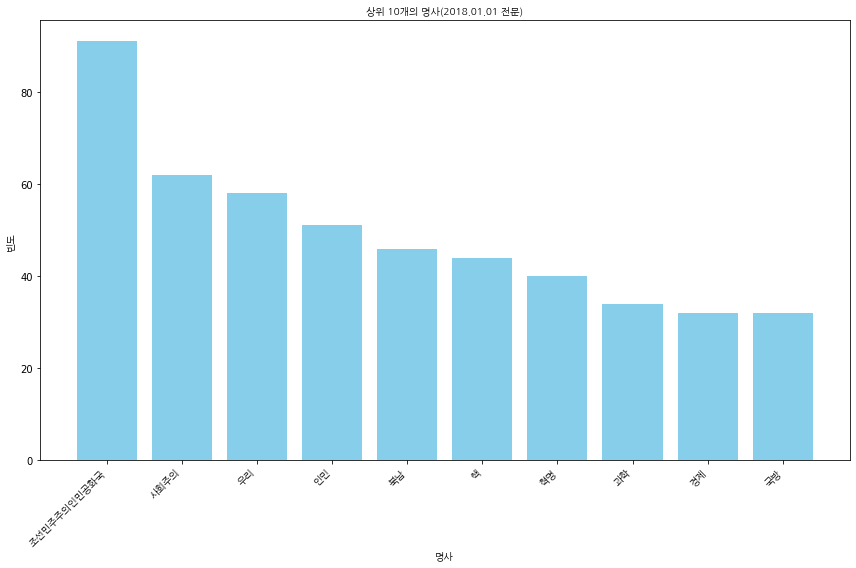

In [408]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_18be).most_common(10)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 10개의 명사(2018.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 20개 단어(전문)

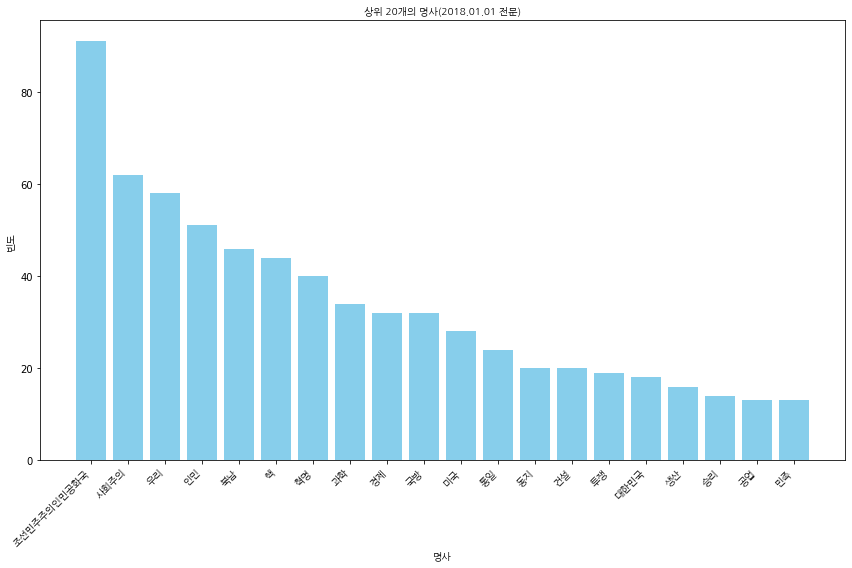

In [409]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_18be).most_common(20)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 20개의 명사(2018.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 30개 단어(전문)

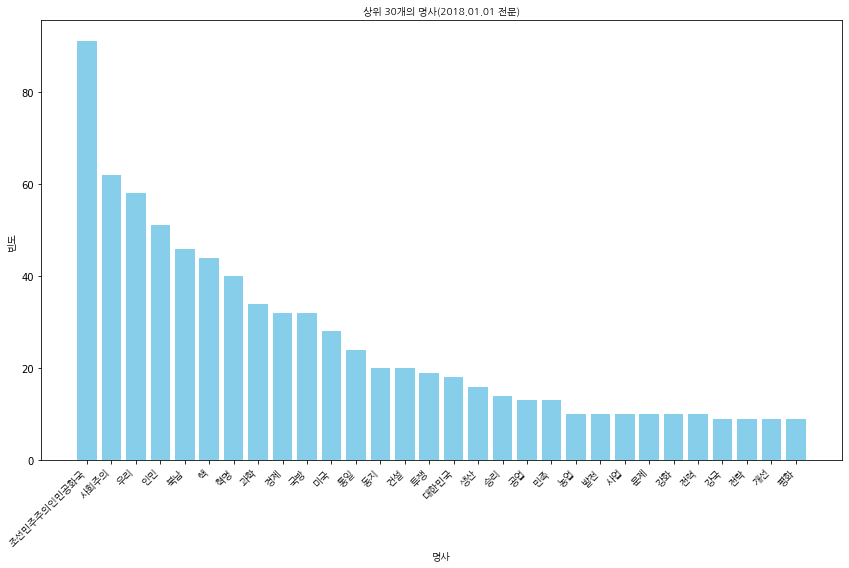

In [410]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_18be).most_common(30)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 30개의 명사(2018.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

# Sheet8 2017.01.01

In [386]:
df_17be = read_data(7,3)

In [387]:
df_17be

전문  \
0  친애하는 동지들！\n\n우리는 주체혁명사에 일찌기 없었던 위대한 번영의 새 역사를 ...   
1                                                NaN   

                                               제목-서론  \
0  친애하는 동지들！\n\n우리는 주체혁명사에 일찌기 없었던 위대한 번영의 새 역사를 ...   
1                                                NaN   

                                             정치-김씨일가  \
0  동지들！\n\n우리는 더 큰 승리를 안아오기 위한 새해 행군길에 또다시 떨쳐나서야 ...   
1                                                NaN   

                                                  경제  \
0  국가경제발전 5개년전략 수행에 총력을 집중하여야 하겠습니다.\n\n올해는 국가경제발...   
1  경제전략목표를 수행하기 위한 투쟁에서 전력과 금속, 화학공업부문이 기치를 들고 나가...   

                                                과학기술  \
0  과학기술 부문에서는 원료와 연료, 설비의 국산화에 중심을 두고 공장, 기업소들의 현...   
1                                                NaN   

                                                교육문화  사회  \
0  교육과 보건, 체육, 문학예술을 비롯한 문화분야의 모든 전선에서 새로운 혁명적앙양을... NaN   
1                                                NaN NaN   

                                                  국방  \
0  조선인민군 창건 85돌이 되는 올해에 군력강화의 불바람을 세차게 일으켜야 하겠습니다...   
1                                                NaN   

                                                정치-당  \
0  사회주의 정치군사진지를 불패의 보루로 더욱 튼튼히 다져야 하겠습니다.\n\n일심단결...   
1  당 제7차대회 결정관철을 위한 올해 전투의 승패는 당조직들과 근로단체조직들의 역할에...   

                                                  외교  \
0  지난해에 우리는 조선노동당 제7차 대회에서 민족의 통일염원과 시대의 요구를 반영하여...   
1                                                NaN   

                                                  결론  
0  동지들！\n\n또 한해를 시작하는 이 자리에 서고보니 나를 굳게 믿어주고 한마음 한...  
1                                                NaN

### 데이터 불러오기

In [388]:
all = df_17be['전문'][0]

In [389]:
all

'친애하는 동지들！\n\n우리는 주체혁명사에 일찌기 없었던 위대한 번영의 새 역사를 창조하며 하루하루를 격동적인 투쟁의 날과 날로 빛내인 2016년을 보내고 새해 2017년을 맞이합니다.\n\n위대한 인민이 안아온 자랑찬 기적의 위대한 한해를 긍지높이 돌이켜보는 뜻깊은 이 자리에서 나는 당과 사상도 뜻도 의지도 하나가 되여 기쁨과 아픔도 함께 나누고 생사운명을 같이하며 역사에 유례없는 만난시련을 웃으며 헤쳐온 전체 조선인민에게 가장 숭엄한 마음으로 뜨거운 인사를 보내며 희망찬 새해의 영광과 축복을 삼가 드립니다.\n\n나는 또한 남녘겨레들과 해외동포들 그리고 자주와 정의를 지향하는 세계 진보적인민들과 벗들에게 따뜻한 인사를 보냅니다.\n\n2016년은 우리 당과 조국역사에 특기할 혁명적 경사의 해, 위대한 전환의 해였습니다.\n\n지난해에 전체 당원들과 인민군장병들, 인민들의 드높은 혁명적 열의와 세계의 커다란 관심 속에 조선노동당 제7차 대회가 대정치 축전으로 뜻깊고 성대하게 진행되였습니다.\n\n당 제7차 대회는 위대한 수령님과 위대한 장군님의 현명한 영도 밑에 주체혁명위업을 백승의 한길로 전진시켜온 우리 당의 영광스러운 투쟁사를 긍지높이 총화하고 김일성－김정일주의 기치따라 사회주의 위업을 완성하기 위한 웅대한 설계도를 펼치였습니다.\n\n역사적인 당 제7차대회를 통하여 당을 따라 영원히 주체의 한길로 나아가려는 우리 군대와 인민의 철석의 의지가 힘있게 과시되고 조선혁명의 만년기틀이 확고히 마련되였습니다.\n\n조선노동당 제7차대회는 위대한 김일성－김정일주의당의 불패의 위력을 시위한 승리자의 대회, 주체혁명위업수행에서 새로운 이정표를 세운 영광의 대회로 조국청사에 길이 빛날 것입니다.\n\n지난해에 주체조선의 국방력 강화에서 획기적 전환이 이룩되여 우리 조국이 그 어떤 강적도 감히 건드릴 수 없는 동방의 핵강국, 군사강국으로 솟구쳐올랐습니다.\n\n제국주의자들의 날로 악랄해지는 핵전쟁위협에 대처한 우리의 첫 수소탄(수소폭탄) 시험과 각이한 공격수단들의 시험

### 특수기호 일차적으로 제거

In [390]:
import re
all = re.sub(r'[()《》!]', ' ', all) #특수기호 제거, 정규 표현식  

### '\n\n'를 기준으로 문장 나누기

In [391]:
all = all.split('\n\n')

### 특수기호 이차적으로 ('1. ','2. ','3. ', '4. ' ,'\n' 등) 삭제

In [392]:
for idx,sent in enumerate(all):
    if ('1. ' in sent) or ('2. ' in sent) or ('3. ' in sent) or ('4. ' in sent) or ('5. 'in sent) or ('6. 'in sent):
        all[idx] = sent[3:]

In [393]:
all_17be = []
for text in all:
    all_17be.append(re.sub(r'[\n]', ' ', text))

In [394]:
all_17be

['친애하는 동지들！',
 '우리는 주체혁명사에 일찌기 없었던 위대한 번영의 새 역사를 창조하며 하루하루를 격동적인 투쟁의 날과 날로 빛내인 2016년을 보내고 새해 2017년을 맞이합니다.',
 '위대한 인민이 안아온 자랑찬 기적의 위대한 한해를 긍지높이 돌이켜보는 뜻깊은 이 자리에서 나는 당과 사상도 뜻도 의지도 하나가 되여 기쁨과 아픔도 함께 나누고 생사운명을 같이하며 역사에 유례없는 만난시련을 웃으며 헤쳐온 전체 조선인민에게 가장 숭엄한 마음으로 뜨거운 인사를 보내며 희망찬 새해의 영광과 축복을 삼가 드립니다.',
 '나는 또한 남녘겨레들과 해외동포들 그리고 자주와 정의를 지향하는 세계 진보적인민들과 벗들에게 따뜻한 인사를 보냅니다.',
 '2016년은 우리 당과 조국역사에 특기할 혁명적 경사의 해, 위대한 전환의 해였습니다.',
 '지난해에 전체 당원들과 인민군장병들, 인민들의 드높은 혁명적 열의와 세계의 커다란 관심 속에 조선노동당 제7차 대회가 대정치 축전으로 뜻깊고 성대하게 진행되였습니다.',
 '당 제7차 대회는 위대한 수령님과 위대한 장군님의 현명한 영도 밑에 주체혁명위업을 백승의 한길로 전진시켜온 우리 당의 영광스러운 투쟁사를 긍지높이 총화하고 김일성－김정일주의 기치따라 사회주의 위업을 완성하기 위한 웅대한 설계도를 펼치였습니다.',
 '역사적인 당 제7차대회를 통하여 당을 따라 영원히 주체의 한길로 나아가려는 우리 군대와 인민의 철석의 의지가 힘있게 과시되고 조선혁명의 만년기틀이 확고히 마련되였습니다.',
 '조선노동당 제7차대회는 위대한 김일성－김정일주의당의 불패의 위력을 시위한 승리자의 대회, 주체혁명위업수행에서 새로운 이정표를 세운 영광의 대회로 조국청사에 길이 빛날 것입니다.',
 '지난해에 주체조선의 국방력 강화에서 획기적 전환이 이룩되여 우리 조국이 그 어떤 강적도 감히 건드릴 수 없는 동방의 핵강국, 군사강국으로 솟구쳐올랐습니다.',
 '제국주의자들의 날로 악랄해지는 핵전쟁위협에 대처한 우리의 첫 수소탄 수소폭탄  시험과 각이

### 이름 추출
이름 언급 없다.

### 권력구조와 정치형태 관련 단어 사용자 정의 사전을 사용하여 명사 추출

In [395]:
user_defined_extracted_nouns,texts_without_user_nouns  = [],[]
for text in all_17be:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,user_defined_nouns)
    user_defined_extracted_nouns.append(extracted_nouns)
    texts_without_user_nouns.append(remaining_text)

In [396]:
user_defined_extracted_nouns

[[('동지', 1)],
 [('혁명', 1), ('우리', 1), ('투쟁', 1)],
 [('인민', 2), ('인사', 1)],
 [('해외동포', 1), ('인민', 1), ('인사', 1), ('남녘', 1)],
 [('우리 당', 1), ('조국', 1), ('혁명', 1)],
 [('조선노동당', 1), ('인민군장병', 1), ('인민', 1), ('혁명', 1), ('당원', 1), ('대회', 1)],
 [('사회주의', 1),
  ('우리 당', 1),
  ('김정일', 1),
  ('김일성', 1),
  ('혁명', 1),
  ('수령', 1),
  ('대회', 1),
  ('투쟁', 1),
  ('영도', 1),
  ('장군', 1)],
 [('조선혁명', 1), ('인민', 1), ('군대', 1), ('대회', 1), ('우리', 1)],
 [('조선노동당', 1), ('김정일', 1), ('김일성', 1), ('조국', 1), ('혁명', 1), ('대회', 3)],
 [('핵강국', 1), ('국방력', 1), ('조국', 1), ('군사', 1), ('우리', 1)],
 [('대륙간 탄도로켓', 1),
  ('사회주의강국', 1),
  ('수소폭탄', 1),
  ('무장장비', 1),
  ('제국주의', 1),
  ('핵전쟁', 1),
  ('핵탄두', 1),
  ('수소탄', 1),
  ('국방력', 1),
  ('조국', 1),
  ('군사', 1),
  ('우리', 1),
  ('건설', 1)],
 [('전쟁도발책동', 1), ('인민군대', 1), ('정치사상', 1), ('조국', 1), ('혁명', 1), ('군사', 1)],
 [('국방분야', 1), ('반동세력', 1), ('제국주의', 1), ('공화국', 1), ('인민', 1), ('우리', 1)],
 [('전투', 2), ('대회', 1), ('우리', 1)],
 [('사회주의강국', 1), ('반공화국', 1), ('전투', 2), ('건설', 1)],


#### 동의어 처리

In [397]:
word_frequencies_user_defined_nouns=merge_synonyms_with_frequencies(user_defined_extracted_nouns,synonym_dict)

#### 빈도수 구하기

In [398]:
word_frequencies_user = Counter(word_frequencies_user_defined_nouns)

In [399]:
texts_without_user_nouns

['친애하는  들！',
 ' 는 주체 사에 일찌기 없었던 위대한 번영의 새 역사를 창조하며 하루하루를 격동적인  의 날과 날로 빛내인 2016년을 보내고 새해 2017년을 맞이합니다.',
 '위대한  이 안아온 자랑찬 기적의 위대한 한해를 긍지높이 돌이켜보는 뜻깊은 이 자리에서 나는 당과 사상도 뜻도 의지도 하나가 되여 기쁨과 아픔도 함께 나누고 생사운명을 같이하며 역사에 유례없는 만난시련을 웃으며 헤쳐온 전체 조선 에게 가장 숭엄한 마음으로 뜨거운  를 보내며 희망찬 새해의 영광과 축복을 삼가 드립니다.',
 '나는 또한  겨레들과  들 그리고 자주와 정의를 지향하는 세계 진보적 들과 벗들에게 따뜻한  를 보냅니다.',
 '2016년은  과  역사에 특기할  적 경사의 해, 위대한 전환의 해였습니다.',
 '지난해에 전체  들과  들,  들의 드높은  적 열의와 세계의 커다란 관심 속에   제7차  가 대정치 축전으로 뜻깊고 성대하게 진행되였습니다.',
 '당 제7차  는 위대한  님과 위대한  님의 현명한   밑에 주체 위업을 백승의 한길로 전진시켜온  의 영광스러운  사를 긍지높이 총화하고  － 주의 기치따라   위업을 완성하기 위한 웅대한 설계도를 펼치였습니다.',
 '역사적인 당 제7차 를 통하여 당을 따라 영원히 주체의 한길로 나아가려는    와  의 철석의 의지가 힘있게 과시되고  의 만년기틀이 확고히 마련되였습니다.',
 '  제7차 는 위대한  － 주의당의 불패의 위력을 시위한 승리자의  , 주체 위업수행에서 새로운 이정표를 세운 영광의  로  청사에 길이 빛날 것입니다.',
 '지난해에 주체조선의   강화에서 획기적 전환이 이룩되여    이 그 어떤 강적도 감히 건드릴 수 없는 동방의  ,  강국으로 솟구쳐올랐습니다.',
 ' 자들의 날로 악랄해지는  위협에 대처한  의 첫      시험과 각이한 공격수단들의 시험발사,   폭발시험이 성공적으로 진행되였으며, 첨단  연구개발사업이 활발해지고   시험발사 준비사업이 마감단계에 이른 것을 비롯하여

### 불용어 제거

In [400]:
texts_without_stopwords=[]
for text in texts_without_user_nouns:
    remaining_text = remove_stopwords(text,stopwords)
    texts_without_stopwords.append(remaining_text)

In [401]:
texts_without_stopwords

['친애    들！',
 ' 는    사에    위대  번영    역사를 창조     를 격동      날  날  빛내인   을 보내고      을 맞   .',
 '위대     안아온 자랑찬 기   위대    를 긍지높  돌이켜보는      자리      당  사상도 뜻도 의지도 하    기쁨  아픔도    나누고 생사운명을      역사에 유례   만난시련을 웃   헤쳐온 전체 조선       숭엄  마음   뜨거운  를 보내며 희망찬     영광  축복을 삼    .',
 '       겨레           와 정의를 지향   세계 진보     벗들   따뜻   를   .',
 '  은     역사에 특기할    경사  해, 위대  전환  해  .',
 '   전체      들,     드      열의와 세계     관심            대정치 축전   뜻깊고 성대   진행되  .',
 '당     는 위대   님  위대   님  현명          위업을 백승     전진  온    영광    사를 긍지높  총화    － 주  기치    위업을 완성   웅대  설계도를 펼치  .',
 '역사   당    를    당   영원히        나아가려는    와    철석  의지  힘   과시      만년기틀     마련되  .',
 '     는 위대   － 주의당  불패  위력을 시위  승리자   ,    위업수행       이정표를 세운 영광      청사에 길  빛날   .',
 '     조선    강화   획기  전환  이룩           강적도 감히 건드릴 수    동방   ,  강국   솟구쳐올랐  .',
 ' 자   날  악랄    위협에 대처     첫      시험  각이  공격수단   시험발사,   폭발시험  성공   진행  , 첨단  연구개발사업  활발해지고   시험발사 준비사업  마감단계에            강화   경    사변   다계단  , 연발   이룩됨      민족  운명을 수호      위업을 승리   

#### '조선로동'이라는 단어는 단독으로 쓰인 단어가 아닌 '조선로동당 중앙위원회'와 같이 사용된 단어로 삭제한다.


In [402]:
sentences = []
for sentence in texts_without_stopwords:
    sentences.append(sentence.replace("조선로동", " "))

In [403]:
texts_without_stopwords = sentences

In [404]:
remaining_text = clean_text(texts_without_stopwords)

In [405]:
texts_without_stopwords = remaining_text

### soynlp 명사 추출기 ( 이미 명사로 분류된 단어들은 제외)

In [406]:
from soynlp.noun import LRNounExtractor_v2
noun_extractor = LRNounExtractor_v2(verbose=True, extract_compound=True)
noun_extractor.train(texts_without_stopwords)
soynlp_nouns = noun_extractor.extract()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 1010 from 106 sents. mem=0.200 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=1284, mem=0.200 Gb
[Noun Extractor] batch prediction was completed for 335 words
[Noun Extractor] checked compounds. discovered 3 compounds
[Noun Extractor] postprocessing detaching_features : 99 -> 99
[Noun Extractor] postprocessing ignore_features : 99 -> 97
[Noun Extractor] postprocessing ignore_NJ : 97 -> 97
[Noun Extractor] 97 nouns (3 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.200 Gb                    
[Noun Extractor] 23.91 % eojeols are covered


In [407]:
#soynlp로 추출된 명사를 (명사,빈도수)로 저장
extracted_soynlp_words = {word:score.frequency for word,score in soynlp_nouns.items() if len(word) >= 2}
extracted_soynlp_words

{'철도운수': 2,
 '방해책동': 2,
 '일심단결': 5,
 '활성화': 3,
 '총동원': 2,
 '국산화': 2,
 '수산업': 2,
 '행군길': 2,
 '평화': 5,
 '긍지': 1,
 '열의': 2,
 '호소': 2,
 '지도': 2,
 '제도': 1,
 '사상': 4,
 '난관': 2,
 '마음': 5,
 '지지': 1,
 '실천': 3,
 '보위': 2,
 '충실': 2,
 '이룩': 9,
 '추동': 2,
 '악랄': 4,
 '활발': 1,
 '승리': 11,
 '역사': 7,
 '성과': 5,
 '의의': 3,
 '기치': 2,
 '주의': 1,
 '준비': 2,
 '피해': 1,
 '구호': 2,
 '문제': 2,
 '보수': 1,
 '요구': 2,
 '나아': 2,
 '안아': 2,
 '생산': 9,
 '위업': 4,
 '전진': 6,
 '전환': 5,
 '위력': 9,
 '대중': 4,
 '역할': 3,
 '지향': 4,
 '안전': 2,
 '수준': 2,
 '기적': 2,
 '신념': 2,
 '비약': 2,
 '정신': 2,
 '앙양': 2,
 '공업': 7,
 '운영': 2,
 '능력': 2,
 '사업': 2,
 '환경': 1,
 '개선': 4,
 '충돌': 2,
 '세력': 3,
 '두리': 3,
 '노력': 3,
 '자리': 2,
 '수행': 10,
 '앞장': 2,
 '단계': 1,
 '다그': 2,
 '빛내': 4,
 '위업수행': 1.0,
 '준비사업': 1.0,
 '사상정신': 1.0}

In [408]:
word_frequencies_soynlp=Counter(extracted_soynlp_words)

#### soynlp로 추출한 명사 데이터셋에서 삭제

In [409]:
#texts_without_stopwords에 삭제할 단어 저장
remove_word_soynlp = [ word for word in soynlp_nouns if len(word) >= 2]

In [410]:
#soynlp로 추출된 명사들을 texts_without_stopwords에서 삭제한다.
texts_without_soynlp=[]
for text in texts_without_stopwords:
    remaining_text = remove_stopwords(text,remove_word_soynlp)
    texts_without_soynlp.append(remaining_text)

In [411]:
texts_without_soynlp

['친애 들！ ',
 '사에 위대 번영   를 창조 격동   인 보내고 ',
 '위대   온 자랑찬 위대   높 돌이켜보는      도 뜻도 의   기쁨 아픔도 나누고 생사운명을   에 유례 만난시련을 헤쳐온 전체 조선 숭엄    뜨거운 보내며 희망찬 영광 축복을 ',
 '겨레 정의를    세계 진보 벗들 따뜻 ',
 '  에 특기할 경사 해, 위대    ',
 '전체 들,   와 세계 관심 대정치 축전 뜻깊고 성대 진행되 ',
 '위대 위대 현명   을 백승    영광 사를   높 총화      을 완성 웅대 설계도를 펼치 ',
 '   영원히   가려는 철석 의지 과시 만년기틀 마련되 ',
 '위대   당 불패   을 시위   자      이정표를 세운 영광 청사에 빛날 ',
 '조선 강화 획기       강적도 감히 건드릴 동방 강국 솟구쳐올랐 ',
 '   위협에 대처 시험 각이 공격수단 시험발사, 폭발시험 성공 진행 첨단 연구개발     해지고 시험발사      마감  에 강화 사변 다계단 연발   됨 민족 운명을 수호   을          담보 마련되 ',
 '영용 무분별 침략 짓부    전취물을 믿음직    무적강군 면모와 기술   를 완벽 갖추었 ',
 '   크나큰 민족   와 고무적힘을 안겨주고 수치 파멸 몰아넣었 전략적지위를 ',
 '   자랑찬    포성을 울렸 ',
 '   고립압살책동을 여지없 짓부 전선    국면을 열어놓은 전민결사전, 만리마 새시대를 탄생시킨 거창 창조대전 ',
 '전체 영웅 내세운 방대 목표    돌파 열리게 ',
 '슬기 재능 과학자,기술자 ’호를 발사 새형 대출력 고출력 발동기 성공 길을 닦아놓았 ',
 '본보기   체계 확립 농업   통장훈 확실 자랑    부를 확품종 육종해낸 생활향상 중요   를 가지는 자랑찬    내놓았 ',
 '금속, 건재     를 중요    수송 목표를    잠재력을 과시   하 ',
 '수많은 공장, 기업소 최고     을 돌파 자랑찬   를 거두고   에 서서 황금해   를  

In [412]:
remaining_text = clean_text(texts_without_soynlp)

In [413]:
remaining_text

['친애 들！ ',
 '사에 위대 번영 창조 격동 보내고 ',
 '위대 자랑찬 위대 돌이켜보는 뜻도 기쁨 아픔도 나누고 생사운명을 유례 만난시련을 헤쳐온 전체 조선 숭엄 뜨거운 보내며 희망찬 영광 축복을 ',
 '겨레 정의를 세계 진보 벗들 따뜻 ',
 '특기할 경사 해, 위대 ',
 '전체 들, 세계 관심 대정치 축전 뜻깊고 성대 진행되 ',
 '위대 위대 현명 백승 영광 사를 총화 완성 웅대 설계도를 펼치 ',
 '영원히 가려는 철석 의지 과시 만년기틀 마련되 ',
 '위대 불패 시위 이정표를 세운 영광 청사에 빛날 ',
 '조선 강화 획기 강적도 감히 건드릴 동방 강국 솟구쳐올랐 ',
 '위협에 대처 시험 각이 공격수단 시험발사, 폭발시험 성공 진행 첨단 연구개발 해지고 시험발사 마감 강화 사변 다계단 연발 민족 운명을 수호 담보 마련되 ',
 '영용 무분별 침략 짓부 전취물을 믿음직 무적강군 면모와 기술 완벽 갖추었 ',
 '크나큰 민족 고무적힘을 안겨주고 수치 파멸 몰아넣었 전략적지위를 ',
 '자랑찬 포성을 울렸 ',
 '고립압살책동을 여지없 짓부 전선 국면을 열어놓은 전민결사전, 만리마 새시대를 탄생시킨 거창 창조대전 ',
 '전체 영웅 내세운 방대 목표 돌파 열리게 ',
 '슬기 재능 과학자,기술자 ’호를 발사 새형 대출력 고출력 발동기 성공 길을 닦아놓았 ',
 '본보기 체계 확립 농업 통장훈 확실 자랑 부를 확품종 육종해낸 생활향상 중요 가지는 자랑찬 내놓았 ',
 '금속, 건재 중요 수송 목표를 잠재력을 과시 ',
 '수많은 공장, 기업소 최고 돌파 자랑찬 거두고 서서 황금해 중요대상 장들 신화 속도 창조 보건, 체육 훌륭 ',
 '뜻밖 자연재해 입은 함북도지구 떨쳐일어 짧은 기간에 ',
 '기간에 시대 창조 믿음, 뿌리내리게 ',
 '불도가니 끓어번진 연속 철야진군 전체 근로자들, 청년 고난 시련을 용감 맞받아나 굴함 공격 역경 부름에 헌신 대답 결사관철 기상, 돕고 이끌면서 집단 떨쳤 ',
 '분야 눈부신 있은 조건 서도 하늘 우연도 '

In [414]:
texts_without_soynlp = remaining_text

### 북한 용어사전을 활용하여 명사 추출

In [415]:
site_defined_extracted_nouns,texts_without_extracted_nouns = [],[]
for text in texts_without_soynlp:
    extracted_nouns, remaining_text = extract_site_defined_nouns(text,dict_site)
    site_defined_extracted_nouns.append(extracted_nouns)
    texts_without_extracted_nouns.append(remaining_text)

In [416]:
# 리스트 평탄화
site_defined_extracted_nouns = [item for sublist in site_defined_extracted_nouns for item in sublist]

print(site_defined_extracted_nouns)

['창조', '돌이', '시련', '조선', '겨레', '정의', '진보', '특기', '대정치', '성대', '과시', '년기', '마련', '동방', '조선', '다계단', '각이', '공격', '담보', '마련', '수단', '연구', '완벽', '전취', '적지', '대전', '리마', '창조', '술자', '통장훈', '가지', '보기', '체계', '과시', '기업소', '대상', '창조', '창조', '불도가니', '공격', '로자', '사관', '시련', '연도', '하늘', '간고분투', '창조', '조선', '손길', '년전', '가지', '년전', '년전', '우자', '전망', '년전', '기업소', '정상', '가치', '경영', '리고', '운동', '체계', '정상', '기업소', '기업소', '장대', '해제', '기업소', '비날론', '가지', '뜨락또르', '가지', '전기', '기업소', '경영', '정상', '종화', '천지', '두벌농사', '축산기지', '주타격', '과일', '량종', '안도', '운동', '전방', '정상', '현실', '고기배', '어로전', '어구', '기업소', '거리', '대상', '시설', '전기', '천발', '최상', '완수', '증산', '지표', '강하', '리고', '기업관리', '가지', '년전', '자면', '바람', '시설', '전사', '보루', '박동', '피줄', '고정', '관료', '독초', '불바람', '싸움군', '전문병', '리도', '박치', '부대', '소탕', '호랑', '청년근위대', '노동', '일군', '당조', '당조', '화력', '당조', '무대', '옮기', '리마', '창조', '수인', '일군', '대오', '가지', '안목', '일군', '반영', '리면', '외면', '리채', '자국', '자욱', '치기', '흔들', '겨레', '경우', '기대', '대결', '대방', '자극', '정당', '겨레', '자위', '연대', '조선', '

In [417]:
word_frequencies_site = Counter(site_defined_extracted_nouns)

In [418]:
word_frequencies_site

Counter({'창조': 6,
         '돌이': 1,
         '시련': 2,
         '조선': 6,
         '겨레': 4,
         '정의': 3,
         '진보': 1,
         '특기': 1,
         '대정치': 1,
         '성대': 1,
         '과시': 2,
         '년기': 1,
         '마련': 2,
         '동방': 1,
         '다계단': 1,
         '각이': 1,
         '공격': 3,
         '담보': 1,
         '수단': 1,
         '연구': 1,
         '완벽': 1,
         '전취': 1,
         '적지': 1,
         '대전': 1,
         '리마': 2,
         '술자': 1,
         '통장훈': 1,
         '가지': 6,
         '보기': 1,
         '체계': 2,
         '기업소': 7,
         '대상': 2,
         '불도가니': 1,
         '로자': 1,
         '사관': 1,
         '연도': 1,
         '하늘': 1,
         '간고분투': 1,
         '손길': 1,
         '년전': 5,
         '우자': 1,
         '전망': 1,
         '정상': 4,
         '가치': 1,
         '경영': 2,
         '리고': 2,
         '운동': 2,
         '장대': 1,
         '해제': 1,
         '비날론': 1,
         '뜨락또르': 1,
         '전기': 2,
         '종화': 1,
         '천지': 1,
         '두벌농사': 

In [419]:
remaining_text = clean_text(texts_without_extracted_nouns)

In [420]:
remaining_text

['친애 들！ ',
 '사에 위대 번영 격동 보내고 ',
 '위대 자랑찬 위대 켜보는 뜻도 기쁨 아픔도 나누고 생사운명을 유례 만난 헤쳐온 전체 숭엄 뜨거운 보내며 희망찬 영광 축복을 ',
 '세계 벗들 따뜻 ',
 '경사 해, 위대 ',
 '전체 들, 세계 관심 축전 뜻깊고 진행되 ',
 '위대 위대 현명 백승 영광 사를 총화 완성 웅대 설계도를 펼치 ',
 '영원히 가려는 철석 의지 ',
 '위대 불패 시위 이정표를 세운 영광 청사에 빛날 ',
 '강화 획기 강적도 감히 건드릴 강국 솟구쳐올랐 ',
 '위협에 대처 시험 시험발사, 폭발시험 성공 진행 첨단 개발 해지고 시험발사 마감 강화 사변 연발 민족 운명을 수호 ',
 '영용 무분별 침략 짓부 물을 믿음직 무적강군 면모와 기술 갖추었 ',
 '크나큰 민족 고무적힘을 안겨주고 수치 파멸 몰아넣었 전략 위를 ',
 '자랑찬 포성을 울렸 ',
 '고립압살책동을 여지없 짓부 전선 국면을 열어놓은 전민결사전, 새시대를 탄생시킨 거창 ',
 '전체 영웅 내세운 방대 목표 돌파 열리게 ',
 '슬기 재능 과학자,기 ’호를 발사 새형 대출력 고출력 발동기 성공 길을 닦아놓았 ',
 '확립 농업 확실 자랑 부를 확품종 육종해낸 생활향상 중요 자랑찬 내놓았 ',
 '금속, 건재 중요 수송 목표를 잠재력을 ',
 '수많은 공장, 최고 돌파 자랑찬 거두고 서서 황금해 중요 장들 신화 속도 보건, 체육 훌륭 ',
 '뜻밖 자연재해 입은 함북도지구 떨쳐일어 짧은 기간에 ',
 '기간에 시대 믿음, 뿌리내리게 ',
 '끓어번진 연속 철야진군 전체 들, 청년 고난 용감 맞받아나 굴함 역경 부름에 헌신 대답 기상, 돕고 이끌면서 집단 떨쳤 ',
 '분야 눈부신 있은 조건 서도 ',
 '신비 힘은 다름 천만군민 위대 자강력 ',
 '해지고 엄혹 겹칠수록 전체 뭉쳐 자력갱생, 어려운 조건 세인을 경탄 있었 ',
 '생명 원동력 길은 자력자강 한길 장엄 확증 고귀 진리 ',
 '최후 믿고 애국충정 피와 땀을 아낌없 바쳐 다사다난했던 자랑찬

In [421]:
texts_without_extracted_nouns = remaining_text

### Mecab 명사 추출기(이미 명사로 분류된 단어들은 제외)

In [422]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab_nouns = []
for text in texts_without_extracted_nouns:
    mecab_nouns += mecab.nouns(text)

In [423]:
mecab_nouns

['친애',
 '사',
 '위대',
 '번영',
 '격동',
 '위대',
 '위대',
 '뜻',
 '기쁨',
 '아픔',
 '생사',
 '운명',
 '유례',
 '전체',
 '영광',
 '축복',
 '세계',
 '벗',
 '경사',
 '위대',
 '전체',
 '세계',
 '관심',
 '축전',
 '진행',
 '현명',
 '백',
 '승',
 '영광',
 '사',
 '총화',
 '완성',
 '설계도',
 '철석',
 '지',
 '위대',
 '불패',
 '시위',
 '이정표',
 '영광',
 '청사',
 '강화',
 '강적',
 '강국',
 '위협',
 '대처',
 '시험',
 '시험',
 '발사',
 '폭발',
 '시험',
 '성공',
 '진행',
 '첨단',
 '개발',
 '시험',
 '발사',
 '마감',
 '강화',
 '사변',
 '연발',
 '민족',
 '운명',
 '수호',
 '영용',
 '무분별',
 '침략',
 '짓',
 '부',
 '물',
 '무적',
 '강군',
 '면모',
 '기술',
 '민족',
 '고무',
 '힘',
 '수치',
 '파멸',
 '전략',
 '위',
 '자랑',
 '포성',
 '고립',
 '압살',
 '책동',
 '짓',
 '전선',
 '국면',
 '전민',
 '결사전',
 '시대',
 '탄생',
 '거',
 '창',
 '전체',
 '영웅',
 '방대',
 '목표',
 '돌파',
 '슬기',
 '재능',
 '과학자',
 '기',
 '호',
 '발사',
 '새',
 '출력',
 '고출력',
 '발동기',
 '성공',
 '길',
 '확립',
 '농업',
 '자랑',
 '부',
 '품종',
 '육종',
 '생활',
 '향상',
 '중요',
 '자랑',
 '찬',
 '금속',
 '건재',
 '중요',
 '수송',
 '목표',
 '잠재력',
 '공장',
 '최고',
 '돌파',
 '거',
 '황금',
 '중요',
 '장',
 '신화',
 '속도',
 '보건',
 '체육',
 '뜻밖',
 '자연재해',
 '입',
 '함북',
 '일어',

In [424]:
mecab_nouns_clean = []
for char in mecab_nouns:
    if len(char)>1:
        mecab_nouns_clean.append(char)

In [425]:
mecab_nouns = [map_to_synonym(noun, synonym_dict) for noun in mecab_nouns_clean] #동의어 처리

In [426]:
texts_without_mecab=[]
for text in texts_without_extracted_nouns:
    remaining_text = remove_stopwords(text,mecab_nouns)
    texts_without_mecab.append(remaining_text)

In [427]:
texts_without_mecab

['   들！ ',
 '사에          보내고 ',
 '     찬    켜보는 뜻도      도 나누고     을    만난 헤쳐온    숭엄 뜨거운 보내며 희망찬      을 ',
 '   벗들 따뜻 ',
 '   해,    ',
 '   들,          뜻깊고   되 ',
 '         백승    사를       웅대   를 펼치 ',
 '영원히 가려는    의지 ',
 '           를 세운      에 빛날 ',
 '   획기   도 감히 건드릴    솟구쳐올랐 ',
 '  에           ,                  해지고                       을    ',
 '         짓부 물을   직        와    갖추었 ',
 '크나큰    고  힘을 안겨주고       몰아넣었    위를 ',
 '  찬   을 울렸 ',
 '      을 여지없 짓부      을 열어놓은     , 새  를   시킨 거창 ',
 '      내세운          열리게 ',
 '        자,기 ’호를    새형 대   고         길을 닦아놓았 ',
 '      확실    부를 확     해낸           찬 내놓았 ',
 '  ,            를   을 ',
 '수많은   ,         찬 거두고 서서   해    장들         ,    훌륭 ',
 '      입은   도   떨쳐   짧은   에 ',
 '  에      ,   내리게 ',
 '끓어번진            들,       용감 맞받아나 굴함    부름에         , 돕고 이끌면서    떨쳤 ',
 '   눈부신 있은    서도 ',
 '   힘은 다름           력 ',
 '해지고 엄혹 겹칠      뭉쳐   , 어려운      을    있었 ',
 '      길은      한길             ',
 '   믿고      피와 땀을 아낌없 바쳐   했던   찬       다시 뜨거운

In [428]:
#단어 빈도수 계산
from collections import Counter
word_frequencies_mecab = Counter(mecab_nouns)
word_frequencies_mecab

Counter({'친애': 1,
         '위대': 8,
         '번영': 2,
         '격동': 2,
         '기쁨': 1,
         '아픔': 1,
         '생사': 1,
         '운명': 2,
         '유례': 1,
         '전체': 9,
         '영광': 3,
         '축복': 1,
         '세계': 3,
         '경사': 1,
         '관심': 1,
         '축전': 1,
         '진행': 3,
         '현명': 1,
         '총화': 1,
         '완성': 2,
         '설계도': 2,
         '철석': 1,
         '불패': 2,
         '시위': 1,
         '이정표': 1,
         '청사': 1,
         '강화': 7,
         '강적': 1,
         '강국': 2,
         '위협': 1,
         '대처': 1,
         '시험': 4,
         '발사': 3,
         '폭발': 2,
         '성공': 2,
         '첨단': 1,
         '개발': 4,
         '마감': 1,
         '사변': 1,
         '연발': 1,
         '민족': 17,
         '수호': 3,
         '영용': 1,
         '무분별': 1,
         '침략': 3,
         '무적': 1,
         '강군': 1,
         '면모': 2,
         '기술': 7,
         '고무': 1,
         '수치': 1,
         '파멸': 1,
         '전략': 4,
         '자랑': 3,
         '포성': 1,
      

### 모두 합하기

In [429]:
word_frequencies_all_17be = word_frequencies_mecab+word_frequencies_soynlp+word_frequencies_site+word_frequencies_user

In [430]:
combined_all_17be = merge_frequencies_with_synonyms(word_frequencies_all_17be, synonym_dict)
combined_all_17be

{'농업': 16,
 '혁명': 46,
 '사회주의': 20,
 '조선민주주의인민공화국': 54,
 '대한민국': 14,
 '북남': 20,
 '민주주의': 4,
 '미국': 10,
 '우리': 44,
 '당대표자회': 22,
 '경제': 36,
 '핵': 16,
 '통일': 36,
 '국방': 56,
 '과학': 28,
 '우주': 12,
 '제국주의': 13,
 '김정일': 8,
 '친선': 4,
 '애국': 4,
 '동지': 8,
 '영도': 2,
 '강국': 7,
 '정치사상': 2,
 '문명': 1,
 '수산업': 5,
 '일꾼': 6,
 '친애': 1,
 '위대': 8,
 '번영': 2,
 '격동': 2,
 '기쁨': 1,
 '아픔': 1,
 '생사': 1,
 '운명': 2,
 '유례': 1,
 '전체': 9,
 '영광': 3,
 '축복': 1,
 '세계': 3,
 '경사': 1,
 '관심': 1,
 '축전': 1,
 '진행': 3,
 '현명': 1,
 '총화': 1,
 '완성': 2,
 '설계도': 2,
 '철석': 1,
 '불패': 2,
 '시위': 1,
 '이정표': 1,
 '청사': 1,
 '강화': 7,
 '강적': 1,
 '위협': 1,
 '대처': 1,
 '시험': 4,
 '발사': 3,
 '폭발': 2,
 '성공': 2,
 '첨단': 1,
 '개발': 4,
 '마감': 1,
 '사변': 1,
 '연발': 1,
 '민족': 17,
 '수호': 3,
 '영용': 1,
 '무분별': 1,
 '침략': 3,
 '무적': 1,
 '강군': 1,
 '면모': 2,
 '기술': 7,
 '고무': 1,
 '수치': 1,
 '파멸': 1,
 '전략': 4,
 '자랑': 3,
 '포성': 1,
 '고립': 1,
 '압살': 1,
 '책동': 5,
 '전선': 3,
 '국면': 3,
 '전민': 2,
 '결사전': 1,
 '시대': 6,
 '탄생': 1,
 '영웅': 1,
 '방대': 1,
 '목표': 5,
 '돌파': 2,
 '슬기': 1,
 '재능':

In [431]:
doc_word_freq['17be'] = combined_all_17be
update_excel_with_new_doc(doc_word_freq, file_path)

Excel 파일이 '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'로 업데이트되었습니다.


### 단어 빈도 시각화

#### 상위 10개 단어(전문)

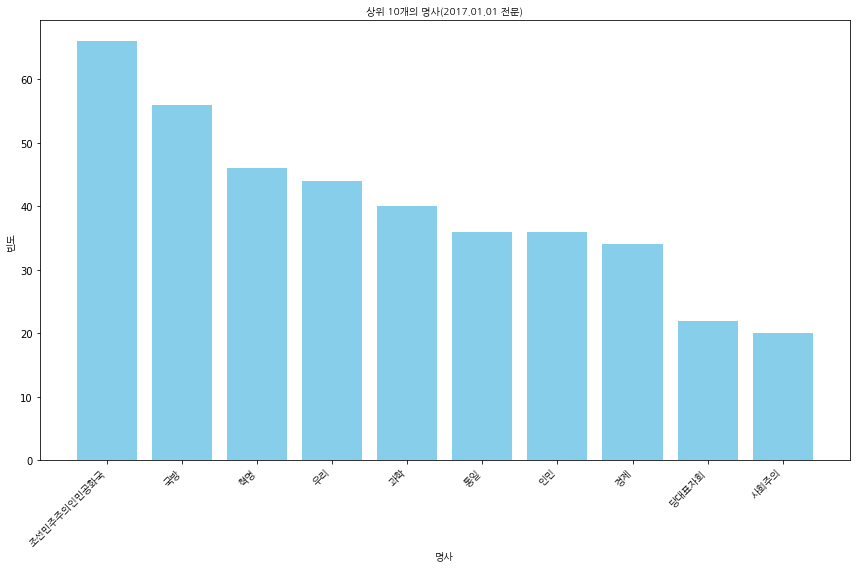

In [464]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_17be).most_common(10)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 10개의 명사(2017.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 20개 단어(전문)

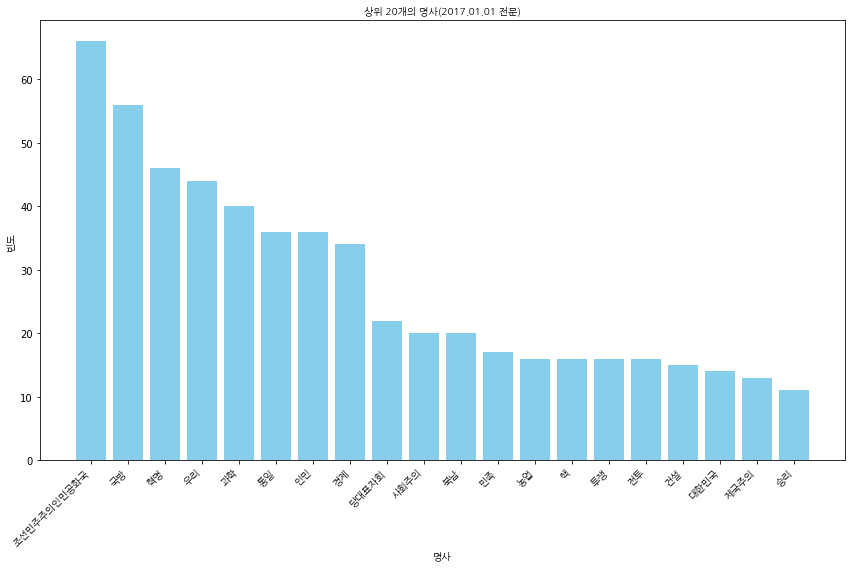

In [465]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_17be).most_common(20)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 20개의 명사(2017.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 30개 단어(전문)

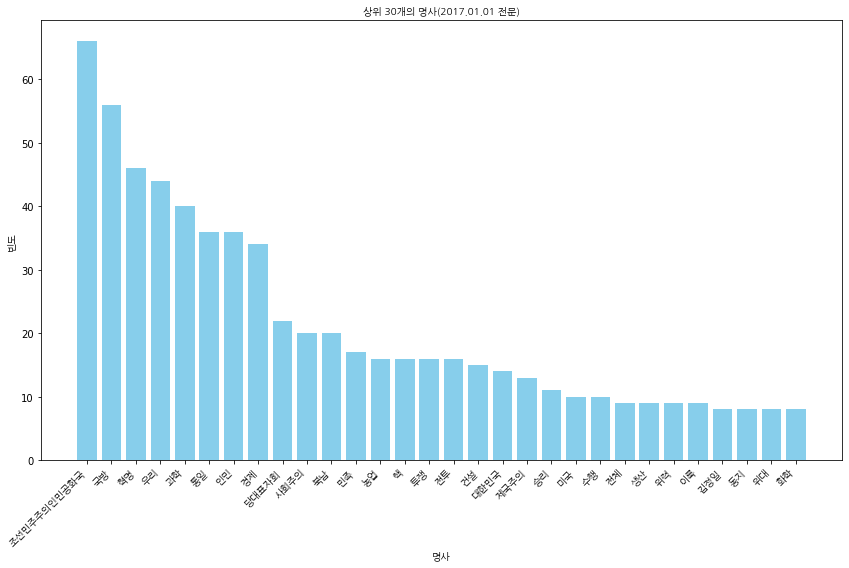

In [466]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_17be).most_common(30)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 30개의 명사(2017.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

# Sheet9 2016.01.01

In [432]:
df_16be = read_data(8,3)

In [433]:
df_16be

전문  \
0  친애하는 동지들！\n\n우리는 영광스러운 조선로동당과 조국력사에 빛나는 리정표를 아...   
1                                                NaN   

                                               제목-서론  \
0  친애하는 동지들！\n\n우리는 영광스러운 조선로동당과 조국력사에 빛나는 리정표를 아...   
1                                                  .   

                                             정치-김씨일가  \
0  동지들！\n\n올해는 조선로동당 제7차대회가 열리는 뜻깊은 해입니다.\n조선로동당 ...   
1                                                  .   

                                                  경제  \
0  경제강국건설에 총력을 집중하여 나라의 경제발전과 인민생활향상에서 새로운 전환을 일으...   
1  내각과 국가경제기관들에서 경제작전과 지휘를 결정적으로 개선하여야 합니다. 경제지도일...   

                                                과학기술  \
0  과학기술로 강성국가의 기초를 굳건히 다지고 과학기술의 기관차로 부강조국건설을 다그쳐...   
1                                                  .   

                                                교육문화 사회  \
0  인민들이 최상의 문명을 최고의 수준에서 누리게 하여야 하겠습니다.\n새 세기 교육혁...  .   
1                                                  .  .   

                                                  국방  \
0  나라의 방위력을 철벽으로 다져나가야 합니다.\n인민군대에서는 위대한 장군님께서 오중...   
1                                                  .   

                                                정치-당  \
0  우리 공화국의 정치군사적위력을 백방으로 강화하여야 하겠습니다.\n사회주의정치사상진지...   
1  모든 일군들과 근로자들이 당 제7차대회가 열리는 올해에 강성국가건설의 최전성기를 열...   

                                                  외교  \
0  조국통일은 가장 절박하고 사활적인 민족최대의 과업입니다.\n조국해방 일흔돐이 되는 ...   
1                                                  .   

                                                  결론 Unnamed: 11  
0  주체의 사회주의위업은 필승불패이며 조선로동당의 령도따라 나아가는 우리의 앞길에는 승...           .  
1                                                  .         NaN

## 📌전문

### 데이터 불러오기

In [434]:
all = df_16be['전문'][0]

In [435]:
all

'친애하는 동지들！\n\n우리는 영광스러운 조선로동당과 조국력사에 빛나는 리정표를 아로새긴 승리자의 긍지와 자부심에 넘쳐 새해 2016년을 맞이합니다.\n\n나는 전체 인민들과 인민군장병들의 열화같은 충정의 마음을 담아 사회주의조선의 영상이시며 주체의 태양이신 위대한 수령님과 위대한 장군님께 가장 숭고한 경의와 새해인사를 삼가 드립니다.\n\n나는 영원히 당과 주체의 한길을 걸어갈 억척의 신념을 안고 사회주의조국의 부강번영을 위하여 헌신적으로 투쟁하고있는 전체 인민군장병들과 인민들에게 새해의 인사를 드리며 모든 가정들에 화목과 정이 넘쳐나고 사랑하는 우리 어린이들의 행복의 웃음소리가 더 높이 울려퍼지기를 축원합니다.\n\n새해를 맞으며 민족의 숙원인 조국통일을 위하여 투쟁하고있는 남녘의 겨레들과 해외동포들,자주와 정의,평화를 지향하는 세계 진보적인민들과 외국의 벗들에게 인사를 보냅니다.\n2015년은 뜻깊은 사변들과 경이적인 성과들로 수놓아진 장엄한 투쟁의 해,사회주의조선의 존엄과 위용을 높이 떨친 승리와 영광의 해였습니다.\n\n지난해에 우리는 조선로동당창건 일흔돐을 백두산대국의 자랑스럽고 의의깊은 혁명적경사로 빛내였습니다.\n\n당의 호소를 높이 받들고 노도처럼 떨쳐나선 인민군장병들과 인민들은 백두의 혁명정신과 과감한 군민협동작전으로 영웅적인 투쟁을 벌려 어머니당에 드리는 자랑찬 로력적선물들을 마련하였습니다.\n\n백두산영웅청년발전소와 청천강계단식발전소,과학기술전당과 미래과학자거리,장천남새전문협동농장을 비롯하여 당의 사상과 정책이 구현된 만년대계의 창조물들과 사회주의선경마을들이 수없이 일떠서 1년을 10년 맞잡이로 비약하며 전진하는 조국의 기상을 과시하였습니다.\n\n우리의 로동계급과 과학자,기술자들은 위대한 수령님들의 유훈을 받들어 금속공업의 주체화에서 큰걸음을 내짚었으며 이르는 곳마다에 지식경제시대의 본보기공장,표준공장들을 일떠세우고 생산공정의 현대화,정보화를 적극 실현하여 전반적경제발전과 인민생활향상을 위한 투쟁에서 새로운 진격로를 열어놓았습니다. 당

### 특수기호 일차적으로 제거

In [436]:
import re
all = re.sub(r'[()《》!]', ' ', all) #특수기호 제거, 정규 표현식  

### '\n\n'를 기준으로 문장 나누기

In [437]:
all = all.split('\n\n')

### 특수기호 이차적으로 ('1. ','2. ','3. ', '4. ' ,'\n' 등) 삭제

In [438]:
for idx,sent in enumerate(all):
    if ('1. ' in sent) or ('2. ' in sent) or ('3. ' in sent) or ('4. ' in sent) or ('5. 'in sent) or ('6. 'in sent):
        all[idx] = sent[3:]

In [439]:
all_16be = []
for text in all:
    all_16be.append(re.sub(r'[\n]', ' ', text))

In [440]:
all_16be

['친애하는 동지들！',
 '우리는 영광스러운 조선로동당과 조국력사에 빛나는 리정표를 아로새긴 승리자의 긍지와 자부심에 넘쳐 새해 2016년을 맞이합니다.',
 '나는 전체 인민들과 인민군장병들의 열화같은 충정의 마음을 담아 사회주의조선의 영상이시며 주체의 태양이신 위대한 수령님과 위대한 장군님께 가장 숭고한 경의와 새해인사를 삼가 드립니다.',
 '나는 영원히 당과 주체의 한길을 걸어갈 억척의 신념을 안고 사회주의조국의 부강번영을 위하여 헌신적으로 투쟁하고있는 전체 인민군장병들과 인민들에게 새해의 인사를 드리며 모든 가정들에 화목과 정이 넘쳐나고 사랑하는 우리 어린이들의 행복의 웃음소리가 더 높이 울려퍼지기를 축원합니다.',
 '새해를 맞으며 민족의 숙원인 조국통일을 위하여 투쟁하고있는 남녘의 겨레들과 해외동포들,자주와 정의,평화를 지향하는 세계 진보적인민들과 외국의 벗들에게 인사를 보냅니다. 2015년은 뜻깊은 사변들과 경이적인 성과들로 수놓아진 장엄한 투쟁의 해,사회주의조선의 존엄과 위용을 높이 떨친 승리와 영광의 해였습니다.',
 '지난해에 우리는 조선로동당창건 일흔돐을 백두산대국의 자랑스럽고 의의깊은 혁명적경사로 빛내였습니다.',
 '당의 호소를 높이 받들고 노도처럼 떨쳐나선 인민군장병들과 인민들은 백두의 혁명정신과 과감한 군민협동작전으로 영웅적인 투쟁을 벌려 어머니당에 드리는 자랑찬 로력적선물들을 마련하였습니다.',
 '백두산영웅청년발전소와 청천강계단식발전소,과학기술전당과 미래과학자거리,장천남새전문협동농장을 비롯하여 당의 사상과 정책이 구현된 만년대계의 창조물들과 사회주의선경마을들이 수없이 일떠서 1년을 10년 맞잡이로 비약하며 전진하는 조국의 기상을 과시하였습니다.',
 '우리의 로동계급과 과학자,기술자들은 위대한 수령님들의 유훈을 받들어 금속공업의 주체화에서 큰걸음을 내짚었으며 이르는 곳마다에 지식경제시대의 본보기공장,표준공장들을 일떠세우고 생산공정의 현대화,정보화를 적극 실현하여 전반적경제발전과 인민생활향상을 위한 투쟁에서 새로운 진격로를 열어

### 이름 추출
이름 언급 없다.

### 권력구조와 정치형태 관련 단어 사용자 정의 사전을 사용하여 명사 추출

In [441]:
user_defined_extracted_nouns,texts_without_user_nouns  = [],[]
for text in all_16be:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,user_defined_nouns)
    user_defined_extracted_nouns.append(extracted_nouns)
    texts_without_user_nouns.append(remaining_text)

In [442]:
user_defined_extracted_nouns

[[('동지', 1)],
 [('조선로동당', 1), ('조국', 1), ('력사', 1), ('우리', 1)],
 [('인민군장병', 1), ('사회주의', 1), ('인민', 1), ('인사', 1), ('수령', 1), ('장군', 1)],
 [('인민군장병', 1),
  ('사회주의', 1),
  ('조국', 1),
  ('인민', 1),
  ('인사', 1),
  ('우리', 1),
  ('투쟁', 1)],
 [('해외동포', 1),
  ('사회주의', 1),
  ('조국통일', 1),
  ('인민', 1),
  ('인사', 1),
  ('남녘', 1),
  ('투쟁', 2)],
 [('조선로동당', 1), ('백두산', 1), ('혁명', 1), ('우리', 1)],
 [('인민군장병', 1), ('어머니당', 1), ('인민', 1), ('혁명', 1), ('투쟁', 1)],
 [('장천남새전문협동농장', 1),
  ('백두산영웅청년발전소', 1),
  ('청천강계단식발전소', 1),
  ('미래과학자거리', 1),
  ('과학기술전당', 1),
  ('사회주의', 1),
  ('조국', 1),
  ('정책', 1)],
 [('당정책옹위전', 1),
  ('사상관철전', 1),
  ('사회주의', 1),
  ('로동계급', 1),
  ('경제발전', 1),
  ('현대화', 1),
  ('조국', 1),
  ('인민', 3),
  ('전반', 1),
  ('전투', 1),
  ('군대', 1),
  ('수령', 1),
  ('경제', 1),
  ('우리', 5),
  ('투쟁', 1)],
 [('행사', 1), ('우리', 1)],
 [('인공지구위성', 1), ('우리 당', 1), ('인민', 1), ('군대', 1), ('투쟁', 1), ('핵', 1)],
 [('세계평화', 1), ('공화국', 1), ('조국', 1), ('인민', 1), ('군대', 1), ('우리', 1)],
 [('백두산혁명강군', 1), ('조국', 1), ('군사

#### 동의어 처리

In [443]:
word_frequencies_user_defined_nouns=merge_synonyms_with_frequencies(user_defined_extracted_nouns,synonym_dict)

#### 빈도수 구하기

In [444]:
word_frequencies_user = Counter(word_frequencies_user_defined_nouns)

In [445]:
texts_without_user_nouns

['친애하는  들！',
 ' 는 영광스러운  과   에 빛나는 리정표를 아로새긴 승리자의 긍지와 자부심에 넘쳐 새해 2016년을 맞이합니다.',
 '나는 전체  들과  들의 열화같은 충정의 마음을 담아  조선의 영상이시며 주체의 태양이신 위대한  님과 위대한  님께 가장 숭고한 경의와 새해 를 삼가 드립니다.',
 '나는 영원히 당과 주체의 한길을 걸어갈 억척의 신념을 안고   의 부강번영을 위하여 헌신적으로  하고있는 전체  들과  들에게 새해의  를 드리며 모든 가정들에 화목과 정이 넘쳐나고 사랑하는   어린이들의 행복의 웃음소리가 더 높이 울려퍼지기를 축원합니다.',
 '새해를 맞으며 민족의 숙원인  을 위하여  하고있는  의 겨레들과  들,자주와 정의,평화를 지향하는 세계 진보적 들과 외국의 벗들에게  를 보냅니다. 2015년은 뜻깊은 사변들과 경이적인 성과들로 수놓아진 장엄한  의 해, 조선의 존엄과 위용을 높이 떨친 승리와 영광의 해였습니다.',
 '지난해에  는  창건 일흔돐을  대국의 자랑스럽고 의의깊은  적경사로 빛내였습니다.',
 '당의 호소를 높이 받들고 노도처럼 떨쳐나선  들과  들은 백두의  정신과 과감한 군민협동작전으로 영웅적인  을 벌려  에 드리는 자랑찬 로력적선물들을 마련하였습니다.',
 ' 와  , 과  , 을 비롯하여 당의 사상과  이 구현된 만년대계의 창조물들과  선경마을들이 수없이 일떠서 1년을 10년 맞잡이로 비약하며 전진하는  의 기상을 과시하였습니다.',
 ' 의  과 과학자,기술자들은 위대한  님들의 유훈을 받들어 금속공업의 주체화에서 큰걸음을 내짚었으며 이르는 곳마다에 지식 시대의 본보기공장,표준공장들을 일떠세우고 생산공정의  ,정보화를 적극 실현하여  적 과  생활향상을 위한  에서 새로운 진격로를 열어놓았습니다. 당의  , 의 불길속에 하늘에서는  가 만든 비행기가 날고 땅속에서는  가 만든 지하전동차가 달리는 자랑찬 현실이 펼쳐졌으며  바다향기,과일향기가 넘쳐나  들에게 기쁨을 안겨주었습니다. 미더운 녀자축구

### 불용어 제거

In [446]:
texts_without_stopwords=[]
for text in texts_without_user_nouns:
    remaining_text = remove_stopwords(text,stopwords)
    texts_without_stopwords.append(remaining_text)

In [447]:
texts_without_stopwords

['친애    들！',
 ' 는 영광        에 빛   리정표를 아로새긴 승리자  긍지와 자부심        을 맞   .',
 '   전체         열화   충정  마음을 담아  조선  영상       태양   위대   님  위대   님께    숭고  경의와    를 삼    .',
 '   영원히 당      한길을 걸어갈 억척  신념을        부강번영   헌신       전체      들        를       가정   화목  정  넘쳐나고 사랑     어린    행복  웃음소리  더 높  울려퍼지기를 축원  .',
 '  를 맞   민족  숙원인            겨레    들,  와 정의,평화를 지향   세계 진보     외국  벗들    를   .   은    사변   경    성과     진 장엄     해, 조선  존엄  위용을 높  떨친 승리와 영광  해  .',
 '    는  창건   을  대국  자랑   의의깊은  적경사  빛내  .',
 '당  호소를 높  받   노도   떨쳐나선         백두   정신  과감  군민협동작전   영웅    을 벌려  에 드리는 자랑찬 로력적선물   마련하  .',
 ' 와  ,    , 을    당  사상     구현  만  계  창조물    선경마을   수없  일떠서 1년을    맞잡이  비약   전진      기상을 과시하  .',
 '      과학자,기술자   위대   님   유훈   금속공업    화   큰걸음을 내짚었   이르는 곳  에 지식 시대  본보기공장,표준공장   일떠세우고 생산공정   ,정보화를 적극 실현        생활향상           진격로를 열어놓았  . 당   ,   불길   하늘      만든 비행기  날고 땅속      만든 지하전동차  달리는 자랑찬 현실  펼쳐졌    바다향기,과일향기  넘쳐   들   기쁨을 안겨주었  . 미더운 녀자축구선수       체육인   국제경기들   승리  금메달     영예를 떨치고    와      적사

#### '조선로동'이라는 단어는 단독으로 쓰인 단어가 아닌 '조선로동당 중앙위원회'와 같이 사용된 단어로 삭제한다.


In [448]:
sentences = []
for sentence in texts_without_stopwords:
    sentences.append(sentence.replace("조선로동", " "))
    

In [449]:
texts_without_stopwords = sentences

In [450]:
remaining_text = clean_text(texts_without_stopwords)

In [451]:
texts_without_stopwords = remaining_text

### soynlp 명사 추출기 ( 이미 명사로 분류된 단어들은 제외)

In [452]:
from soynlp.noun import LRNounExtractor_v2
noun_extractor = LRNounExtractor_v2(verbose=True, extract_compound=True)
noun_extractor.train(texts_without_stopwords)
soynlp_nouns = noun_extractor.extract()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 923 from 70 sents. mem=0.200 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=1182, mem=0.200 Gb
[Noun Extractor] batch prediction was completed for 313 words
[Noun Extractor] checked compounds. discovered 0 compounds
[Noun Extractor] postprocessing detaching_features : 74 -> 74
[Noun Extractor] postprocessing ignore_features : 74 -> 74
[Noun Extractor] postprocessing ignore_NJ : 74 -> 74
[Noun Extractor] 74 nouns (0 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.200 Gb                    
[Noun Extractor] 20.39 % eojeols are covered


In [453]:
#soynlp로 추출된 명사를 (명사,빈도수)로 저장
extracted_soynlp_words = {word:score.frequency for word,score in soynlp_nouns.items() if len(word) >= 2}
extracted_soynlp_words

{'일심단결': 4,
 '총공격전': 2,
 '관계개선': 2,
 '적도발': 1,
 '영광': 3,
 '평화': 3,
 '긍지': 3,
 '대화': 2,
 '성과': 5,
 '요구': 2,
 '몰아': 1,
 '사상': 7,
 '바다': 1,
 '대업': 2,
 '창조': 4,
 '수호': 5,
 '전면': 2,
 '과시': 3,
 '마련': 3,
 '발휘': 3,
 '노력': 4,
 '문제': 7,
 '호소': 2,
 '영예': 2,
 '정치': 3,
 '높이': 1,
 '넘쳐': 2,
 '자랑': 5,
 '생산': 4,
 '심장': 4,
 '전환': 4,
 '한길': 3,
 '신념': 4,
 '기상': 3,
 '위업': 4,
 '긴장': 4,
 '행복': 3,
 '존엄': 4,
 '정신': 2,
 '불길': 2,
 '체육': 2,
 '위력': 5,
 '위험': 1,
 '화력': 1,
 '개선': 7,
 '혁신': 2,
 '수준': 4,
 '문명': 3,
 '자원': 2,
 '대중': 2,
 '건강': 2,
 '도전': 3,
 '교양': 1,
 '사회': 2,
 '진정': 2,
 '지식': 3}

In [454]:
word_frequencies_soynlp=Counter(extracted_soynlp_words)

#### soynlp로 추출한 명사 데이터셋에서 삭제

In [455]:
#texts_without_stopwords에 삭제할 단어 저장
remove_word_soynlp = [ word for word in soynlp_nouns if len(word) >= 2]

In [456]:
#soynlp로 추출된 명사들을 texts_without_stopwords에서 삭제한다.
texts_without_soynlp=[]
for text in texts_without_stopwords:
    remaining_text = remove_stopwords(text,remove_word_soynlp)
    texts_without_soynlp.append(remaining_text)

In [457]:
texts_without_soynlp

['친애 들！ ',
 '   리정표를 아로새긴 승리자   와 자부심 ',
 '전체 열화 충정 마음을 담아 조선 영상 태양 위대 위대 님께 숭고 경의와 ',
 '영원히   을 걸어갈 억척   을 부강번영 헌신 전체 가정 화목   나고 사랑 어린    웃음소리 울려퍼지기를 축원 ',
 '민족 숙원인 겨레 들, 정의,  를 지향 세계 진보 외국 벗들 사변    장엄 해, 조선    위용을 떨친 승리와    ',
 '창건 대국    의의깊은 적경사 빛내 ',
 '  를 노도 떨쳐나선 백두    과감 군민협동작전 영웅 벌려 드리는   찬 로력적선물   하 ',
 '   구현   물 선경마을 수없 일떠서 1년을 맞잡이 비약 전진   을   하 ',
 '과학자,기술자 위대 유훈 금속공업 큰걸음을 내짚었 이르는    시대 본보기공장,표준공장 일떠세우고   공정 ,정보화를 적극 실현 생활향상 진격로를 열어놓았    하늘 만든 비행기 날고 땅속 만든 지하전동차 달리는   찬 현실 펼쳐졌   향기,과일향기    기쁨을 안겨주었 미더운 녀자축구선수   인 국제경기들 승리 금메달   를 떨치고 적사기를 북돋아주었 ',
 '세계 이목 집중 가운데 성대 진행 당창건 경축 두리에 천만군민 철통 뭉친       조선 양양 전도를 만천하에   하 ',
 '경축광장에 펼쳐진 격동 화폭 폭탄을 터뜨리고 쏴올린것    누리를 진감    총대를 필승 무기 틀어쥐고 힘찬 진군은 가로막을수 똑똑히 보여주었 ',
 '민족 닥쳐온 전쟁   을 막고         하 ',
 '적대세력 엄중      책동 충돌 치닫던 일촉즉발 위기를 평정 전쟁 재앙 난파도    안전을 지켜낸 군민대단결 거대 힘, 무진막강    안아온 승리 ',
 '기쁜 마음 돌이켜보게 혈통,   대를 청년전위 충정 영웅 둘도 청년강국 위용을 떨친 ',
 '위대   육성 청년 정해준 폭풍쳐 내달리며 선군시대 청년돌격   청년문화를    만사람을 감동 훌륭 미풍   하 청년 위대 무장 두리에 천겹만겹 뭉친       강자,    계승자 억세게 

In [458]:
remaining_text = clean_text(texts_without_soynlp)
    

In [459]:
remaining_text

['친애 들！ ',
 '리정표를 아로새긴 승리자 자부심 ',
 '전체 열화 충정 마음을 담아 조선 영상 태양 위대 위대 님께 숭고 경의와 ',
 '영원히 걸어갈 억척 부강번영 헌신 전체 가정 화목 나고 사랑 어린 웃음소리 울려퍼지기를 축원 ',
 '민족 숙원인 겨레 들, 정의, 지향 세계 진보 외국 벗들 사변 장엄 해, 조선 위용을 떨친 승리와 ',
 '창건 대국 의의깊은 적경사 빛내 ',
 '노도 떨쳐나선 백두 과감 군민협동작전 영웅 벌려 드리는 로력적선물 ',
 '구현 선경마을 수없 일떠서 1년을 맞잡이 비약 전진 ',
 '과학자,기술자 위대 유훈 금속공업 큰걸음을 내짚었 이르는 시대 본보기공장,표준공장 일떠세우고 공정 ,정보화를 적극 실현 생활향상 진격로를 열어놓았 하늘 만든 비행기 날고 땅속 만든 지하전동차 달리는 현실 펼쳐졌 향기,과일향기 기쁨을 안겨주었 미더운 녀자축구선수 국제경기들 승리 금메달 떨치고 적사기를 북돋아주었 ',
 '세계 이목 집중 가운데 성대 진행 당창건 경축 두리에 천만군민 철통 뭉친 조선 양양 전도를 만천하에 ',
 '경축광장에 펼쳐진 격동 화폭 폭탄을 터뜨리고 쏴올린것 누리를 진감 총대를 필승 무기 틀어쥐고 힘찬 진군은 가로막을수 똑똑히 보여주었 ',
 '민족 닥쳐온 전쟁 막고 ',
 '적대세력 엄중 책동 충돌 치닫던 일촉즉발 위기를 평정 전쟁 재앙 난파도 안전을 지켜낸 군민대단결 거대 힘, 무진막강 안아온 승리 ',
 '기쁜 마음 돌이켜보게 혈통, 대를 청년전위 충정 영웅 둘도 청년강국 위용을 떨친 ',
 '위대 육성 청년 정해준 폭풍쳐 내달리며 선군시대 청년돌격 청년문화를 만사람을 감동 훌륭 미풍 청년 위대 무장 두리에 천겹만겹 뭉친 강자, 계승자 억세게 자라난 승리 ',
 '승리와 백두 부강번영 떨쳐나선 영웅 결실 바친 고귀 피와 결정체 ',
 '들끓고 충만 보내며 애국충정 불태우는 아름 세계와 견인불발 모습을 가슴뜨겁게 목격 병사 믿음에 시선 어린 목소리 용기를 얻었 ',
 '현명 당을 절대 지지 결사옹위 위대 있기에 천

In [460]:
texts_without_soynlp = remaining_text

### 북한 용어사전을 활용하여 명사 추출

In [461]:
site_defined_extracted_nouns,texts_without_extracted_nouns = [],[]
for text in texts_without_soynlp:
    extracted_nouns, remaining_text = extract_site_defined_nouns(text,dict_site)
    site_defined_extracted_nouns.append(extracted_nouns)
    texts_without_extracted_nouns.append(remaining_text)

In [462]:
# 리스트 평탄화
site_defined_extracted_nouns = [item for sublist in site_defined_extracted_nouns for item in sublist]

print(site_defined_extracted_nouns)

['리정표', '리자', '부심', '조선', '지기', '겨레', '외국', '정의', '조선', '진보', '로력적', '동작', '잡이', '본보기공장', '표준공장', '지하전', '걸음', '과일', '녀자', '메달', '사기', '술자', '아주', '하늘', '현실', '두리', '성대', '양양', '이목', '전도', '조선', '누리', '뜨리', '총대', '난파도', '세력', '엄중', '청년전위', '돌이', '두리', '만사', '목격', '불발', '악도', '리자', '구호', '비상', '세기', '조선', '앞장', '자면', '리용', '바람', '앙양', '전기', '천발', '해결', '효과', '수송조직', '규률', '렬차', '장대', '정상', '가지', '종합적기계화', '농촌경리', '농산', '량품', '어장', '장대', '장성', '전국', '기업소', '장대', '활기', '보기', '시설', '시설', '지게', '최상', '내부예비', '동원', '동음', '정상', '강하', '대기', '기업소', '보급실', '로자', '리고', '연구', '정상', '해결', '현실', '지도일군', '생활력', '력량', '로자', '바람', '선전', '앙양', '물질문화생활', '걸음', '관료', '놓고', '당조', '당조', '두리', '로자', '일군', '일군', '파괴', '싸움군', '대전', '련대', '령군', '로선', '리지', '실전', '실전', '완벽', '운동', '적당', '전구', '체계', '청년근위대', '적대분자', '단계', '동원', '원쑤', '수단', '자리', '누리', '세기', '최상', '열기', '전문', '조선', '바람', '활기', '로자', '일군', '가지', '로자', '산도', '앞장', '옮기', '한마', '간직', '고결', '기대', '니고', '래알', '려진', '복무', '일군', '주인', '현실', '앞선', '가지', '리

In [463]:
word_frequencies_site = Counter(site_defined_extracted_nouns)

In [464]:
word_frequencies_site

Counter({'리정표': 1,
         '리자': 2,
         '부심': 2,
         '조선': 6,
         '지기': 1,
         '겨레': 3,
         '외국': 1,
         '정의': 2,
         '진보': 1,
         '로력적': 1,
         '동작': 1,
         '잡이': 1,
         '본보기공장': 1,
         '표준공장': 1,
         '지하전': 1,
         '걸음': 2,
         '과일': 1,
         '녀자': 1,
         '메달': 1,
         '사기': 1,
         '술자': 1,
         '아주': 1,
         '하늘': 1,
         '현실': 3,
         '두리': 3,
         '성대': 1,
         '양양': 1,
         '이목': 1,
         '전도': 1,
         '누리': 2,
         '뜨리': 1,
         '총대': 1,
         '난파도': 1,
         '세력': 8,
         '엄중': 2,
         '청년전위': 1,
         '돌이': 1,
         '만사': 1,
         '목격': 1,
         '불발': 1,
         '악도': 1,
         '구호': 2,
         '비상': 1,
         '세기': 2,
         '앞장': 2,
         '자면': 1,
         '리용': 1,
         '바람': 3,
         '앙양': 2,
         '전기': 1,
         '천발': 1,
         '해결': 2,
         '효과': 1,
         '수송조직': 1,
         '규률': 

In [465]:
remaining_text = clean_text(texts_without_extracted_nouns)

In [466]:
remaining_text

['친애 들！ ',
 '아로새긴 ',
 '전체 열화 충정 마음을 담아 영상 태양 위대 위대 님께 숭고 경의와 ',
 '영원히 걸어갈 억척 부강번영 헌신 전체 가정 화목 나고 사랑 어린 웃음소리 울려퍼 축원 ',
 '민족 숙원인 들, 지향 세계 벗들 사변 장엄 해, 위용을 떨친 승리와 ',
 '창건 대국 의의깊은 적경사 빛내 ',
 '노도 떨쳐나선 백두 과감 군민협 영웅 벌려 드리는 선물 ',
 '구현 선경마을 수없 일떠서 1년을 비약 전진 ',
 '과학자,기 위대 유훈 금속공업 내짚었 이르는 시대 일떠세우고 공정 ,정보화를 적극 실현 생활향상 진격로를 열어놓았 만든 비행기 날고 땅속 만든 동차 달리는 펼쳐졌 향기, 향기 기쁨을 안겨주었 미더운 축구선수 국제경기들 승리 떨치고 북돋 ',
 '세계 집중 가운데 진행 당창건 경축 천만군민 철통 뭉친 만천하에 ',
 '경축광장에 펼쳐진 격동 화폭 폭탄을 쏴올린것 진감 필승 무기 틀어쥐고 힘찬 진군은 가로막을수 똑똑히 보여주었 ',
 '민족 닥쳐온 전쟁 막고 ',
 '적대 책동 충돌 치닫던 일촉즉발 위기를 평정 전쟁 재앙 안전을 지켜낸 군민대단결 거대 힘, 무진막강 안아온 승리 ',
 '기쁜 마음 켜보게 혈통, 대를 충정 영웅 둘도 청년강국 위용을 떨친 ',
 '위대 육성 청년 정해준 폭풍쳐 내달리며 선군시대 청년돌격 청년문화를 람을 감동 훌륭 미풍 청년 위대 무장 천겹만겹 뭉친 강자, 계승자 억세게 자라난 승리 ',
 '승리와 백두 부강번영 떨쳐나선 영웅 결실 바친 고귀 피와 결정체 ',
 '들끓고 충만 보내며 애국충정 불태우는 아름 세계와 견인 모습을 가슴뜨겁게 병사 믿음에 시선 어린 목소리 용기를 얻었 ',
 '현명 당을 절대 지지 결사옹위 위대 있기에 천만산 두렵지 않고 이룩 는것, 총화 ',
 '불타는 충정 필승 헌신 받들어 영웅 위훈 빛내인 전체 들, 뜨거운 감사를 ',
 '들！ ',
 '열리는 위대 현명 이룩 총화 최후승리를 앞당겨 휘황 설계도를 펼쳐놓게 ',
 '수행 빛내여야 ',
 '열리는 열어나가자 '

In [467]:
texts_without_extracted_nouns = remaining_text

### Mecab 명사 추출기(이미 명사로 분류된 단어들은 제외)

In [468]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab_nouns = []
for text in texts_without_extracted_nouns:
    mecab_nouns += mecab.nouns(text)

In [469]:
mecab_nouns

['친애',
 '전체',
 '열화',
 '충정',
 '마음',
 '영상',
 '태양',
 '숭고',
 '억척',
 '부강',
 '번영',
 '헌신',
 '전체',
 '가정',
 '화목',
 '사랑',
 '웃음',
 '소리',
 '축원',
 '민족',
 '숙원',
 '지향',
 '세계',
 '벗',
 '사변',
 '장엄',
 '위용',
 '승리',
 '창건',
 '대국',
 '적',
 '경사',
 '노도',
 '백두',
 '감',
 '군민',
 '협',
 '영웅',
 '선물',
 '구현',
 '선',
 '경마',
 '수',
 '일',
 '년',
 '비약',
 '전진',
 '과학자',
 '기',
 '위대',
 '유훈',
 '금속',
 '공업',
 '내',
 '시대',
 '일',
 '떠세',
 '우고',
 '공정',
 '정보',
 '적극',
 '실현',
 '생활',
 '향상',
 '진격',
 '비행기',
 '땅속',
 '동차',
 '향기',
 '향기',
 '기쁨',
 '축구',
 '선수',
 '국제',
 '경기',
 '승리',
 '세계',
 '집중',
 '가운데',
 '진행',
 '창건',
 '경축',
 '천만',
 '군민',
 '철통',
 '만천하',
 '경축',
 '광장',
 '격동',
 '폭',
 '폭탄',
 '것',
 '진감',
 '필승',
 '무기',
 '진군',
 '수',
 '민족',
 '전쟁',
 '적대',
 '책동',
 '충돌',
 '일촉즉발',
 '위기',
 '평정',
 '전쟁',
 '재앙',
 '안전',
 '군민',
 '단결',
 '거대',
 '힘',
 '막강',
 '승리',
 '마음',
 '혈통',
 '대',
 '충정',
 '영웅',
 '둘',
 '도',
 '청년',
 '강국',
 '위용',
 '위대',
 '육성',
 '청년',
 '폭풍',
 '선군',
 '시대',
 '청년',
 '돌격',
 '청년',
 '문화',
 '람',
 '감동',
 '미풍',
 '청년',
 '위대',
 '무장',
 '천',
 '겹',
 '만',
 '겹',
 '강자',
 '

In [470]:
mecab_nouns_clean = []
for char in mecab_nouns:
    if len(char)>1:
        mecab_nouns_clean.append(char)

In [471]:
mecab_nouns = [map_to_synonym(noun, synonym_dict) for noun in mecab_nouns_clean] #동의어 처리

In [472]:
texts_without_mecab=[]
for text in texts_without_extracted_nouns:
    remaining_text = remove_stopwords(text,mecab_nouns)
    texts_without_mecab.append(remaining_text)
texts_without_mecab

['   들！ ',
 '아로새긴 ',
 '           을 담아             님께    경의와 ',
 '영원히 걸어갈                     나고    어린      울려퍼    ',
 '     인 들,       벗들       해,   을 떨친   와 ',
 '      의의깊은 적   빛내 ',
 '   떨쳐나선    과감   협    벌려 드리는    ',
 '   선  을 수없 일떠서 1년을       ',
 '  자,기            내짚었 이르는    일        ,  화를              로를   놓았 만든    날고    만든    달리는 펼쳐졌   ,      을 안겨주었 미더운          들    떨치고 북돋 ',
 '            당              뭉친   에 ',
 '    에 펼쳐진    화폭   을 쏴올린것          틀어쥐고 힘찬   은 가로막을수 똑똑히 보여주었 ',
 '   닥쳐온    막고 ',
 '         치닫던      를            을 지켜낸   대      힘, 무진   안아온    ',
 '기쁜    켜보게   , 대를       둘도        을 떨친 ',
 '         정해준   쳐 내달리며               를 람을    훌륭             천겹만겹 뭉친   ,    억세게 자라난    ',
 '  와         떨쳐나선       바친    피와    ',
 '들끓고    보내며      불태우는      와      을   뜨겁게      에    어린 목     를 얻었 ',
 '   당을               있기에   산 두렵지 않고 이룩 는것,    ',
 '불타는          받들어       빛      들, 뜨거운   를 ',
 '들！ ',
 '  는       이룩        를 앞당겨      를 펼쳐놓게 ',
 '   빛내여야 ',
 '  는   나가자 ',
 '   불

In [473]:
#단어 빈도수 계산
from collections import Counter
word_frequencies_mecab = Counter(mecab_nouns)
word_frequencies_mecab

Counter({'친애': 1,
         '전체': 7,
         '열화': 1,
         '충정': 5,
         '마음': 2,
         '영상': 1,
         '태양': 1,
         '숭고': 1,
         '억척': 2,
         '부강': 4,
         '번영': 3,
         '헌신': 2,
         '가정': 1,
         '화목': 1,
         '사랑': 2,
         '웃음': 1,
         '소리': 1,
         '축원': 2,
         '민족': 15,
         '숙원': 1,
         '지향': 2,
         '세계': 7,
         '사변': 1,
         '장엄': 1,
         '위용': 2,
         '승리': 9,
         '창건': 2,
         '대국': 1,
         '경사': 1,
         '노도': 1,
         '백두': 4,
         '군민': 4,
         '영웅': 8,
         '선물': 1,
         '구현': 4,
         '경마': 1,
         '비약': 2,
         '전진': 2,
         '과학': 3,
         '위대': 6,
         '유훈': 2,
         '금속': 4,
         '공업': 5,
         '시대': 9,
         '떠세': 3,
         '우고': 2,
         '공정': 2,
         '정보': 1,
         '적극': 10,
         '실현': 5,
         '생활': 7,
         '향상': 3,
         '진격': 1,
         '비행기': 1,
         '땅속': 1,
       

### 모두 합하기

In [474]:
word_frequencies_all_16be = word_frequencies_mecab+word_frequencies_soynlp+word_frequencies_site+word_frequencies_user

In [475]:
combined_all_16be = merge_frequencies_with_synonyms(word_frequencies_all_16be, synonym_dict)
combined_all_16be

{'농촌': 3,
 '농업': 10,
 '혁명': 52,
 '사회주의': 36,
 '조선민주주의인민공화국': 78,
 '괴뢰': 1,
 '대한민국': 14,
 '북남': 28,
 '민주주의': 2,
 '미국': 22,
 '우리': 58,
 '조선로동당': 16,
 '당중앙위원회': 2,
 '당대표자회': 16,
 '경제': 34,
 '핵': 6,
 '통일': 62,
 '국방': 46,
 '과학': 30,
 '우주': 2,
 '력사': 4,
 '제국주의': 3,
 '김정일': 4,
 '친선': 2,
 '애국': 4,
 '동지': 4,
 '영도': 6,
 '강국': 11,
 '정치사상': 2,
 '문명': 5,
 '에네르기': 2,
 '수산업': 3,
 '일꾼': 2,
 '친애': 1,
 '전체': 7,
 '열화': 1,
 '충정': 5,
 '마음': 2,
 '영상': 1,
 '태양': 1,
 '숭고': 1,
 '억척': 2,
 '부강': 4,
 '번영': 3,
 '헌신': 2,
 '가정': 1,
 '화목': 1,
 '사랑': 2,
 '웃음': 1,
 '소리': 1,
 '축원': 2,
 '민족': 15,
 '숙원': 1,
 '지향': 2,
 '세계': 7,
 '사변': 1,
 '장엄': 1,
 '위용': 2,
 '승리': 9,
 '창건': 2,
 '대국': 1,
 '경사': 1,
 '노도': 1,
 '백두': 4,
 '군민': 4,
 '영웅': 8,
 '선물': 1,
 '구현': 4,
 '경마': 1,
 '비약': 2,
 '전진': 2,
 '위대': 6,
 '유훈': 2,
 '금속': 4,
 '공업': 5,
 '시대': 9,
 '떠세': 3,
 '우고': 2,
 '공정': 2,
 '정보': 1,
 '적극': 10,
 '실현': 5,
 '생활': 7,
 '향상': 3,
 '진격': 1,
 '비행기': 1,
 '땅속': 1,
 '동차': 1,
 '향기': 2,
 '기쁨': 1,
 '축구': 1,
 '선수': 1,
 '국제': 2,
 '경기': 2,
 '집중': 4,


In [476]:
doc_word_freq['16be'] = combined_all_16be
update_excel_with_new_doc(doc_word_freq, file_path)

Excel 파일이 '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'로 업데이트되었습니다.


### 단어 빈도 시각화

#### 상위 10개 단어(전문)

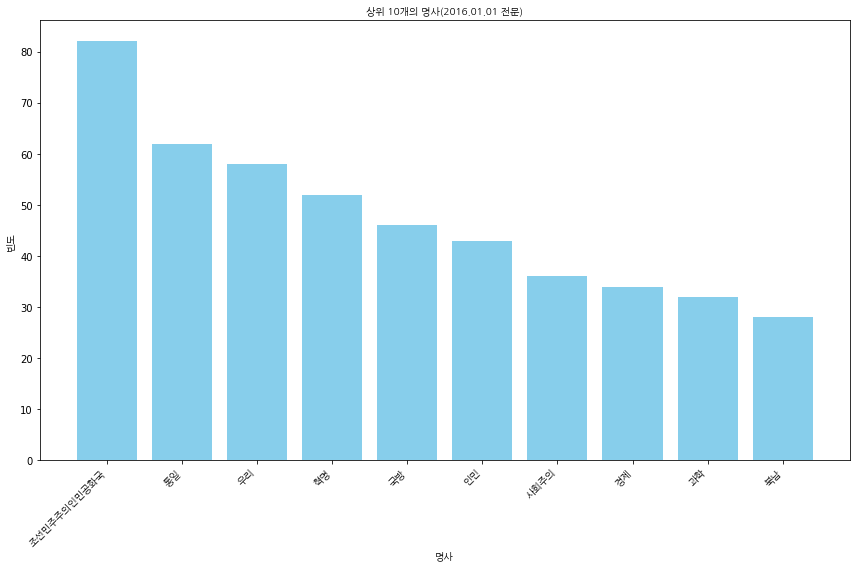

In [512]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_16be).most_common(10)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 10개의 명사(2016.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 20개 단어(전문)

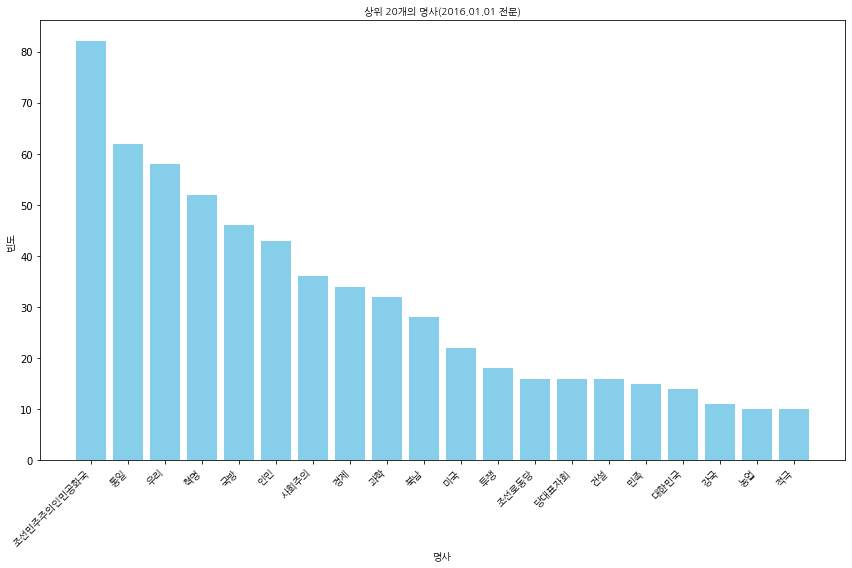

In [513]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_16be).most_common(20)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 20개의 명사(2016.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 30개 단어(전문)

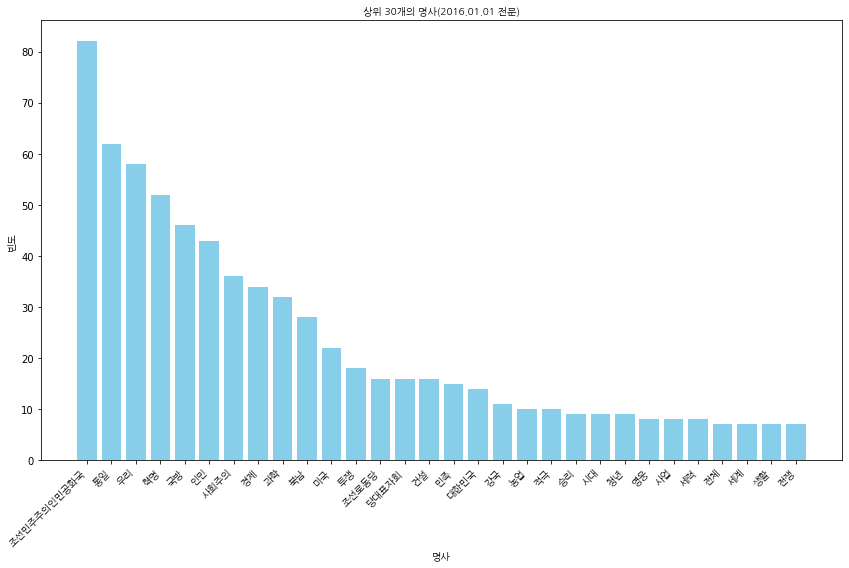

In [514]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_16be).most_common(30)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 30개의 명사(2016.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

# Sheet10 2015.01.01 

In [477]:
df_15be = read_data(9,3)

In [478]:
df_15be

전문  \
0  지금부터 조선노동당 제1비서이시며 조선민주주의인민공화국 국방위원회 제1위원장이 \n...   
1                                                NaN   

                                               제목-서론  \
0  지금부터 조선노동당 제1비서이시며 조선민주주의인민공화국 국방위원회 제1위원장이 \n...   
1                                                NaN   

                                             정치-김씨일가  \
0  동지들! 새해 2015년은 조국해방 70돌과 조선노동당 창건 70돌이 되는 매우 뜻...   
1                                                NaN   

                                                  경제  \
0  뜻깊은 올해 인민생활 향상에서 전변을 가져와야 합니다. 농산과 축산, 수산을 3대 ...   
1                                                NaN   

                                                과학기술  \
0  올해에 우리는 과학기술을 확고히 앞세우고 사회주의 경제강국, 문명국 건설에서 전환을...   
1                                                NaN   

                                                교육문화  \
0  교육부분 일꾼들의 역할과 교육사업에 대한 국가적, 사회적 관심을 높이 새 세기 교육...   
1   온 사회에 민족적 정서와 고상하고 아름다운 생활기풍이 차 넘치게 하며 민족유산보호...   

                                             사회  \
0  보건부분에서 위생방역사업과 치료예방사업을 개선하고 의약품생산을 늘여야 합니다.    
1                                             .   

                                                  국방  \
0  우리는 올해의 혁명무력 건설과 국방력 강화에서 새로운 전환을 일으켜 군사강국의 위력...   
1                                                NaN   

                                                정치-당  \
0  올해에 우리 앞에 나선 방대한 투쟁목표를 성과적으로 실현하기 위하여서는 모든 일꾼들...   
1                                                NaN   

                                                  외교  \
0  우리 민족이 외세에 의하여 분열된 때로부터 70년 세월이 흘렀습니다. 그동안 세계는...   
1                                                NaN   

                                                  결론  
0  위대한 당의 영도따라 억척불변의 혁명신념과 필승의 기상을 안고 백두의 눈보라마냥 폭...  
1                                                NaN

## 📌전문

### 데이터 불러오기

In [479]:
all = df_15be['전문'][0]

In [480]:
all

"지금부터 조선노동당 제1비서이시며 조선민주주의인민공화국 국방위원회 제1위원장이 \n시며 조선인민군 최고사령관이신 경애하는 김정은 동지께서 주체104(2015)년 새해에 즈음 \n하여 하시는 신년사를 보내드리겠습니다.\n\n<김정은 육성>\n\n친애하는 동지들!  우리는 승리의 신심드높이 비약하며 전진하는 위대한 조선의 기상과 \n위용을 뚜렷이 과시한 2014년을 보내고 희망찬 새해 2015년을 맞이합니다.\n\n나는 전체 인민군장병들과 인민들의 다함없는 충정의 마음을 담아 우리 인민의 영원한 수령이시며 주체의 태양이신 위대한 수령님과 위대한 장군님께 가장 숭고한 경의와 새해의 인사를 삼가 드립니다.\n\n나는 혁명적 신념과 애국의 열정을 안고 조국의 존엄과 융성번영을 위하여 헌신적으로 투쟁하고 있는 인민군장병들과 인민들에게 새해의 인사를 드리며 온 나라 가정들에 따뜻한 정이 넘치고 귀여운 우리 어린이들에게 더 밟은 미래가 있기를 축복합니다.\n\n새해를 맞으며 민족의 화합과 조국통일을 위하여 투쟁하고 있는 남녘겨레들과 해외동포들 그리고 자주와 평화를 지향하는 세계 진보적 인민들과 외국의 벗들에게 인사를 보냅니다.\n\n지난해는 당의 영도밑에 강성국가 건설의 모든 전선에서 최후의 승리를 앞당기기 위한 토대를 튼튼히 다지고 조선의 불패의 위력을 떨친 빛나는 승리의 해였습니다.\n\n지난해에 당과 인민대중의 혼연일체가 보다 굳건해지고 혁명대오의 순결성과 위력이 더욱 강화되었습니다. 인민군 장병들과 인민들 속에서 위대한 수령님과 위대한 장군님에 대한 절절한 그리움이 날을 따라 강렬해지고 수령님과 장군님의 구상과 염원을 현실로 꽃피워갈 열화같은 충정과 순결한 도덕의리심이 높이 발현되었습니다.\n\n우리 당의 인민사랑, 후대사랑의 정치와 과학중시, 교육중시정책이 현실에 구현되어 당에 대한 인민들의 신뢰가 두터워지고 우리의 일심단결이 공고화 되었습니다.\n\n백두산지구 혁명전적지 답사를 통한 혁명전통교양의 열풍 속에서 전군과 온 사회의 백두의 정신과 기상이 맥박치고 성스

### 특수기호 일차적으로 제거

In [481]:
import re
all = re.sub(r'[()《》!]', ' ', all) #특수기호 제거, 정규 표현식  

### '\n\n'를 기준으로 문장 나누기

In [482]:
all = all.split('\n\n')

### 특수기호 이차적으로 ('1. ','2. ','3. ', '4. ' ,'\n' 등) 삭제

In [483]:
for idx,sent in enumerate(all):
    if ('1. ' in sent) or ('2. ' in sent) or ('3. ' in sent) or ('4. ' in sent) or ('5. 'in sent) or ('6. 'in sent):
        all[idx] = sent[3:]

In [484]:
all_15be = []
for text in all:
    all_15be.append(re.sub(r'[\n]', ' ', text))

In [485]:
all_15be = all_15be[2:]

In [486]:
all_15be = all_15be[:-1]

In [487]:
all_15be 

['친애하는 동지들   우리는 승리의 신심드높이 비약하며 전진하는 위대한 조선의 기상과  위용을 뚜렷이 과시한 2014년을 보내고 희망찬 새해 2015년을 맞이합니다.',
 '나는 전체 인민군장병들과 인민들의 다함없는 충정의 마음을 담아 우리 인민의 영원한 수령이시며 주체의 태양이신 위대한 수령님과 위대한 장군님께 가장 숭고한 경의와 새해의 인사를 삼가 드립니다.',
 '나는 혁명적 신념과 애국의 열정을 안고 조국의 존엄과 융성번영을 위하여 헌신적으로 투쟁하고 있는 인민군장병들과 인민들에게 새해의 인사를 드리며 온 나라 가정들에 따뜻한 정이 넘치고 귀여운 우리 어린이들에게 더 밟은 미래가 있기를 축복합니다.',
 '새해를 맞으며 민족의 화합과 조국통일을 위하여 투쟁하고 있는 남녘겨레들과 해외동포들 그리고 자주와 평화를 지향하는 세계 진보적 인민들과 외국의 벗들에게 인사를 보냅니다.',
 '지난해는 당의 영도밑에 강성국가 건설의 모든 전선에서 최후의 승리를 앞당기기 위한 토대를 튼튼히 다지고 조선의 불패의 위력을 떨친 빛나는 승리의 해였습니다.',
 '지난해에 당과 인민대중의 혼연일체가 보다 굳건해지고 혁명대오의 순결성과 위력이 더욱 강화되었습니다. 인민군 장병들과 인민들 속에서 위대한 수령님과 위대한 장군님에 대한 절절한 그리움이 날을 따라 강렬해지고 수령님과 장군님의 구상과 염원을 현실로 꽃피워갈 열화같은 충정과 순결한 도덕의리심이 높이 발현되었습니다.',
 '우리 당의 인민사랑, 후대사랑의 정치와 과학중시, 교육중시정책이 현실에 구현되어 당에 대한 인민들의 신뢰가 두터워지고 우리의 일심단결이 공고화 되었습니다.',
 '백두산지구 혁명전적지 답사를 통한 혁명전통교양의 열풍 속에서 전군과 온 사회의 백두의 정신과 기상이 맥박치고 성스러운 주체혁명위업을 끝까지 완성할 신념과 의지가 용암처럼 끓어 번지게 되었습니다.',
 '지난해 인민군대의 전투력이 비상히 강화되고 국방력이 튼튼히 다져졌습니다. 인민군대에서 정치사상사업을 진공적으로 벌이고 실전훈련의 불바람을 일으

### 이름 추출
이름 언급 없다.

### 권력구조와 정치형태 관련 단어 사용자 정의 사전을 사용하여 명사 추출

In [488]:
user_defined_extracted_nouns,texts_without_user_nouns  = [],[]
for text in all_15be:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,user_defined_nouns)
    user_defined_extracted_nouns.append(extracted_nouns)
    texts_without_user_nouns.append(remaining_text)

In [489]:
user_defined_extracted_nouns

[[('동지', 1), ('우리', 1)],
 [('인민군장병', 1), ('인민', 2), ('인사', 1), ('수령', 2), ('우리', 1), ('장군', 1)],
 [('인민군장병', 1),
  ('조국', 1),
  ('인민', 1),
  ('혁명', 1),
  ('인사', 1),
  ('나라', 1),
  ('우리', 1),
  ('투쟁', 1)],
 [('해외동포', 1), ('조국통일', 1), ('인민', 1), ('인사', 1), ('남녘', 1), ('투쟁', 1)],
 [('강성국가', 1), ('건설', 1), ('영도', 1)],
 [('인민대중', 1),
  ('인민군', 1),
  ('인민', 1),
  ('혁명', 1),
  ('장병', 1),
  ('수령', 2),
  ('장군', 2)],
 [('우리 당', 1), ('인민', 2), ('교육', 1), ('정책', 1), ('우리', 1)],
 [('백두산', 1), ('혁명', 3)],
 [('정치사상사업', 1),
  ('인민군대', 2),
  ('국방력', 1),
  ('지휘', 1),
  ('군기', 1),
  ('전투', 2),
  ('군인', 1)],
 [('국방공업', 1), ('우리식', 1), ('혁명', 1), ('군사', 1), ('무력', 1)],
 [('사회주의', 1), ('경제강국', 2), ('인민', 1), ('석탄', 1), ('건설', 2)],
 [('위성과학자주책지구', 1),
  ('김책공업종합대학', 1),
  ('연풍과학자휴양소', 1),
  ('현대화', 1),
  ('인민군', 1),
  ('조국', 1),
  ('교육', 1),
  ('장병', 1),
  ('건설', 3)],
 [('사회주의', 1),
  ('우리식', 1),
  ('인민군', 1),
  ('조국', 1),
  ('인민', 2),
  ('장병', 1),
  ('군대', 1),
  ('대회', 2),
  ('우리', 2),
  ('투쟁', 1),
  ('영도',

#### 동의어 처리

In [490]:
word_frequencies_user_defined_nouns=merge_synonyms_with_frequencies(user_defined_extracted_nouns,synonym_dict)

#### 빈도수 구하기

In [491]:
word_frequencies_user = Counter(word_frequencies_user_defined_nouns)

In [492]:
texts_without_user_nouns

['친애하는  들    는 승리의 신심드높이 비약하며 전진하는 위대한 조선의 기상과  위용을 뚜렷이 과시한 2014년을 보내고 희망찬 새해 2015년을 맞이합니다.',
 '나는 전체  들과  들의 다함없는 충정의 마음을 담아    의 영원한  이시며 주체의 태양이신 위대한  님과 위대한  님께 가장 숭고한 경의와 새해의  를 삼가 드립니다.',
 '나는  적 신념과 애국의 열정을 안고  의 존엄과 융성번영을 위하여 헌신적으로  하고 있는  들과  들에게 새해의  를 드리며 온   가정들에 따뜻한 정이 넘치고 귀여운   어린이들에게 더 밟은 미래가 있기를 축복합니다.',
 '새해를 맞으며 민족의 화합과  을 위하여  하고 있는  겨레들과  들 그리고 자주와 평화를 지향하는 세계 진보적  들과 외국의 벗들에게  를 보냅니다.',
 '지난해는 당의  밑에    의 모든 전선에서 최후의 승리를 앞당기기 위한 토대를 튼튼히 다지고 조선의 불패의 위력을 떨친 빛나는 승리의 해였습니다.',
 '지난해에 당과  의 혼연일체가 보다 굳건해지고  대오의 순결성과 위력이 더욱 강화되었습니다.    들과  들 속에서 위대한  님과 위대한  님에 대한 절절한 그리움이 날을 따라 강렬해지고  님과  님의 구상과 염원을 현실로 꽃피워갈 열화같은 충정과 순결한 도덕의리심이 높이 발현되었습니다.',
 ' 의  사랑, 후대사랑의 정치와 과학중시,  중시 이 현실에 구현되어 당에 대한  들의 신뢰가 두터워지고  의 일심단결이 공고화 되었습니다.',
 ' 지구  전적지 답사를 통한  전통교양의 열풍 속에서 전군과 온 사회의 백두의 정신과 기상이 맥박치고 성스러운 주체 위업을 끝까지 완성할 신념과 의지가 용암처럼 끓어 번지게 되었습니다.',
 '지난해  의  력이 비상히 강화되고  이 튼튼히 다져졌습니다.  에서  을 진공적으로 벌이고 실전훈련의 불바람을 일으켜 모든  관, 병사들과 군종, 병종부대들이 사상과 신념의 강자, 그 어떤 정황과 조건에서도 작전 임무를 능숙하게 수행할 수 있는 무적의 강

### 불용어 제거

In [493]:
texts_without_stopwords=[]
for text in texts_without_user_nouns:
    remaining_text = remove_stopwords(text,stopwords)
    texts_without_stopwords.append(remaining_text)

In [494]:
texts_without_stopwords

['친애         는 승리  신심드높  비약   전진   위대  조선  기상   위용을 뚜렷  과시    을 보내고 희망찬      을 맞   .',
 '   전체         다함   충정  마음을 담아      영원          태양   위대   님  위대   님께    숭고  경의와      를 삼    .',
 '      신념  애국  열정을       존엄  융성번영   헌신               들        를    온   가정   따뜻  정  넘치고 귀여운   어린이들   더 밟은 미래  있기를 축복  .',
 '  를 맞   민족  화합              겨레           와 평화를 지향   세계 진보      외국  벗들    를   .',
 '  는 당              전선   최후  승리를 앞당기   토대를       조선  불패  위력을 떨친 빛   승리  해  .',
 '   당     혼연일체       해지고  대오  순결성  위력     강화  .             위대   님  위대   님   절절  그리움  날   강렬해지고  님   님  구상  염원을 현   꽃피워갈 열화   충정  순결  도덕의리심  높  발현  .',
 '    사랑, 후대사랑  정치와 과학중시,  중시   현실에 구현   당       신뢰  두터워지고    일심단결  공고화   .',
 ' 지   전적지 답사를 통   전통교양  열풍    전군  온 사회  백두  정신  기상  맥박치고 성      위업을    완성할 신념  의지  용암   끓어 번지게   .',
 '       력     강화           졌  .      을 진공   벌   실전훈련  불바람을 일으켜     관, 병사   군종, 병종부대   사상  신념  강자,    정황  조건  도 작전 임무를 능숙   수행할    무   강군   준비  . 전군  강철    를 확립    생활 개선   전례    성과를 이룩하  .',
 ' 부분  

#### '조선로동'이라는 단어는 단독으로 쓰인 단어가 아닌 '조선로동당 중앙위원회'와 같이 사용된 단어로 삭제한다.


In [495]:
sentences = []
for sentence in texts_without_stopwords:
    sentences.append(sentence.replace("조선로동", " "))
    

In [496]:
texts_without_stopwords = sentences

In [497]:
remaining_text = clean_text(texts_without_stopwords)

In [498]:
texts_without_stopwords = remaining_text

### soynlp 명사 추출기 ( 이미 명사로 분류된 단어들은 제외)

In [499]:
from soynlp.noun import LRNounExtractor_v2
noun_extractor = LRNounExtractor_v2(verbose=True, extract_compound=True)
noun_extractor.train(texts_without_stopwords)
soynlp_nouns = noun_extractor.extract()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 969 from 47 sents. mem=0.201 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=1324, mem=0.201 Gb
[Noun Extractor] batch prediction was completed for 313 words
[Noun Extractor] checked compounds. discovered 2 compounds
[Noun Extractor] postprocessing detaching_features : 97 -> 97
[Noun Extractor] postprocessing ignore_features : 97 -> 94
[Noun Extractor] postprocessing ignore_NJ : 94 -> 94
[Noun Extractor] 94 nouns (2 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.201 Gb                    
[Noun Extractor] 26.51 % eojeols are covered


In [500]:
#soynlp로 추출된 명사를 (명사,빈도수)로 저장
extracted_soynlp_words = {word:score.frequency for word,score in soynlp_nouns.items() if len(word) >= 2}
extracted_soynlp_words

{'최후승리': 3,
 '대축전장': 3,
 '부강번영': 3,
 '정치훈련': 2,
 '전쟁위험': 2,
 '전쟁책동': 2,
 '총공격전': 3,
 '불바람': 2,
 '상대방': 3,
 '수호전': 2,
 '승리': 10,
 '평화': 6,
 '토대': 2,
 '의지': 4,
 '창조': 7,
 '보위': 1,
 '대화': 3,
 '정의': 3,
 '마련': 10,
 '애국': 3,
 '강화': 9,
 '완성': 3,
 '이룩': 11,
 '실현': 8,
 '수행': 2,
 '과시': 2,
 '여러': 3,
 '제도': 6,
 '문제': 6,
 '관계': 2,
 '준비': 3,
 '성과': 2,
 '영예': 2,
 '구호': 2,
 '지도': 2,
 '의도': 2,
 '기개': 2,
 '체제': 1,
 '불러': 1,
 '떨쳐': 4,
 '존엄': 6,
 '위력': 8,
 '생산': 7,
 '긴장': 3,
 '전진': 7,
 '기상': 6,
 '환경': 4,
 '전망': 3,
 '전변': 3,
 '신념': 6,
 '염원': 2,
 '열풍': 2,
 '위업': 2,
 '사상': 8,
 '수산': 2,
 '불길': 1,
 '결실': 2,
 '책동': 2,
 '관철': 4,
 '혁신': 3,
 '강국': 2,
 '공업': 2,
 '대중': 3,
 '난관': 2,
 '위협': 2,
 '이익': 3,
 '협상': 1,
 '현실': 3,
 '전군': 3,
 '사회': 3,
 '전당': 2,
 '해결': 4,
 '연습': 2,
 '맥박': 1,
 '체육': 2,
 '생명': 2,
 '체육강국': 1.0}

In [501]:
word_frequencies_soynlp=Counter(extracted_soynlp_words)

#### soynlp로 추출한 명사 데이터셋에서 삭제

In [502]:
#texts_without_stopwords에 삭제할 단어 저장
remove_word_soynlp = [ word for word in soynlp_nouns if len(word) >= 2]

In [503]:
#soynlp로 추출된 명사들을 texts_without_stopwords에서 삭제한다.
texts_without_soynlp=[]
for text in texts_without_stopwords:
    remaining_text = remove_stopwords(text,remove_word_soynlp)
    texts_without_soynlp.append(remaining_text)

In [504]:
texts_without_soynlp

['친애    신심드높 비약    위대 조선    위용을 뚜렷    보내고 희망찬 ',
 '전체 다함 충정 마음을 담아 영원 태양 위대 위대 님께 숭고 경의와 ',
 '      열정을    융성번영 헌신 가정 따뜻 넘치고 귀여운 어린이들 밟은 미래 있기를 축복 ',
 '민족 화합 겨레   를 지향 세계 진보 외국 벗들 ',
 '전선 최후   를 앞당기   를 조선 불패   을 떨친    ',
 '혼연일체 해지고 대오 순결성       위대 위대 절절 그리움 강렬해지고 구상   을 꽃피워갈 열화 충정 순결 도덕의리심 발현 ',
 '사랑, 후대사랑 정치와 과학중시, 중시   에 구현 신뢰 두터워지고 일심단결 공고화 ',
 '전적지 답사를 전통교양          백두 정신      치고   을   할       용암 끓어 번지게 ',
 '   진공 실전훈련   을 일으켜 관, 병사 군종, 병종부대       강자, 정황 조건 작전 임무를 능숙   할 강군       강철 확립 생활 개선 전례   를   하 ',
 '부분 다양 타격수단 개발      에 이바지 ',
 '군민협동작전 문명국   을   하 어려운    불리 조건 농업   , 과학, 전선    부분    앙양 일어 생활 향상 밝은   을 열어놓았 ',
 '부분 조선속도      을 일으켜 살림집, 8일공장을 건축 기준 표준 기념비   물 수많 일떠세움 아름   해 조선 모습을 보여주었 부강 참가 결사   정신 일당백          돌파구를 열고 훌륭 전형단위   하 ',
 '  인 아시아경기 세계선수권 전법 굴함 싸워   를 빛내이었   에   나선 고무해 주었 쟁취   와 귀중    현명 두리에 뭉친 전체 불타는   충정 헌신       ',
 '  , 선군    확고   을 지니고 벌여 자랑찬 위훈 변혁 공헌 전체 뜨거운 감사를 ',
 '해방 창건 위대 현명 자랑찬   만을   온 영광 역사를 긍지와 자부심을 가지고 돌이켜보고 백두 개척   를   할 신심 낙관 ',
 "백두 정신    적대세력 

In [505]:
remaining_text = clean_text(texts_without_soynlp)

In [506]:
remaining_text

['친애 신심드높 비약 위대 조선 위용을 뚜렷 보내고 희망찬 ',
 '전체 다함 충정 마음을 담아 영원 태양 위대 위대 님께 숭고 경의와 ',
 '열정을 융성번영 헌신 가정 따뜻 넘치고 귀여운 어린이들 밟은 미래 있기를 축복 ',
 '민족 화합 겨레 지향 세계 진보 외국 벗들 ',
 '전선 최후 앞당기 조선 불패 떨친 ',
 '혼연일체 해지고 대오 순결성 위대 위대 절절 그리움 강렬해지고 구상 꽃피워갈 열화 충정 순결 도덕의리심 발현 ',
 '사랑, 후대사랑 정치와 과학중시, 중시 구현 신뢰 두터워지고 일심단결 공고화 ',
 '전적지 답사를 전통교양 백두 정신 치고 용암 끓어 번지게 ',
 '진공 실전훈련 일으켜 관, 병사 군종, 병종부대 강자, 정황 조건 작전 임무를 능숙 강군 강철 확립 생활 개선 전례 ',
 '부분 다양 타격수단 개발 이바지 ',
 '군민협동작전 문명국 어려운 불리 조건 농업 과학, 전선 부분 앙양 일어 생활 향상 밝은 열어놓았 ',
 '부분 조선속도 일으켜 살림집, 8일공장을 건축 기준 표준 기념비 수많 일떠세움 아름 조선 모습을 보여주었 부강 참가 결사 정신 일당백 돌파구를 열고 훌륭 전형단위 ',
 '아시아경기 세계선수권 전법 굴함 싸워 빛내이었 나선 고무해 주었 쟁취 귀중 현명 두리에 뭉친 전체 불타는 충정 헌신 ',
 '선군 확고 지니고 벌여 자랑찬 위훈 변혁 공헌 전체 뜨거운 감사를 ',
 '해방 창건 위대 현명 자랑찬 만을 영광 역사를 긍지와 자부심을 가지고 돌이켜보고 백두 개척 신심 낙관 ',
 "백두 정신 적대세력 도전 짓부 전역 포성을 울려 해방 당창건 대경사 빛내어야 백두 정신 앞당기 나서자' 전체 달려 ",
 '백두 총대, 불패 ',
 '천만 세월 흘러도 위대 위대 님을 태양 모시며 불멸 업적을 옹호고수 빛내어 ',
 '당창건 맞는 조직자 력을 이정표를 해야 유일 체계를 세우는 사업을 심화 당중앙 숨결도, 발걸음도 당조직 당사업 주선 틀어쥐고 놓침 ',
 '어머니 본성 당사업 주의 일관 존중 사랑 의거 기풍 넘치게 당

In [507]:
texts_without_soynlp = remaining_text

### 북한 용어사전을 활용하여 명사 추출

In [508]:
site_defined_extracted_nouns,texts_without_extracted_nouns = [],[]
for text in texts_without_soynlp:
    extracted_nouns, remaining_text = extract_site_defined_nouns(text,dict_site)
    site_defined_extracted_nouns.append(extracted_nouns)
    texts_without_extracted_nouns.append(remaining_text)

In [509]:
# 리스트 평탄화
site_defined_extracted_nouns = [item for sublist in site_defined_extracted_nouns for item in sublist]

print(site_defined_extracted_nouns)

['조선', '겨레', '외국', '진보', '조선', '대오', '일체', '일심', '후대', '번지', '적지', '정신', '부대', '실전', '수단', '동작', '앙양', '정신', '조선', '조선', '두리', '아시', '니고', '가지', '돌이', '보고', '부심', '역사', '도전', '세력', '전역', '정신', '정신', '총대', '고수', '당사업', '당중앙', '걸음', '당조', '주선', '체계', '당사업', '당사업', '관료', '당조', '의거', '계급교양', '도덕교양', '대성', '로자', '투사', '대전', '체계', '고정격식', '후방사업', '대오', '보기', '오도', '정예', '청년근위대', '실전', '앞장', '우자', '정신', '가치', '로자', '연구', '축산기지', '축산기지', '농산', '단계', '물고', '역사', '연조', '전국', '정상', '풍기', '가지', '동음', '전기', '전기', '정상', '지게', '지방', '화력', '활기', '대외', '황금산', '가도', '노동', '대상', '리고', '리해', '림화', '림화', '시설', '정상', '정상', '조선', '기업소', '수입병', '경영', '동원', '요구', '당조', '세기', '역사', '열기', '정서', '활기', '공격', '로와', '로자', '바람', '바람', '정신', '정신', '정신', '정신', '정신', '정신', '로자', '정신', '전위투사', '가지', '니고', '령주', '복무', '세대', '앞장', '조선', '세기', '놓고', '대제', '도리', '보지', '세력', '장애', '리위', '조선', '가도', '년간', '놓고', '대결', '대결', '리지', '추기', '겨레', '대변', '대전', '무의', '역사', '역사', '위급', '위급', '유대', '중단', '혈맥', '운동', '조선', '놓고', '대외', '리고

In [510]:
word_frequencies_site = Counter(site_defined_extracted_nouns)

In [511]:
word_frequencies_site

Counter({'조선': 8,
         '겨레': 2,
         '외국': 1,
         '진보': 2,
         '대오': 2,
         '일체': 1,
         '일심': 1,
         '후대': 1,
         '번지': 1,
         '적지': 1,
         '정신': 12,
         '부대': 1,
         '실전': 2,
         '수단': 1,
         '동작': 1,
         '앙양': 1,
         '두리': 2,
         '아시': 1,
         '니고': 2,
         '가지': 3,
         '돌이': 1,
         '보고': 1,
         '부심': 1,
         '역사': 5,
         '도전': 1,
         '세력': 3,
         '전역': 1,
         '총대': 1,
         '고수': 1,
         '당사업': 3,
         '당중앙': 1,
         '걸음': 1,
         '당조': 3,
         '주선': 1,
         '체계': 2,
         '관료': 1,
         '의거': 1,
         '계급교양': 1,
         '도덕교양': 1,
         '대성': 2,
         '로자': 4,
         '투사': 1,
         '대전': 2,
         '고정격식': 1,
         '후방사업': 1,
         '보기': 1,
         '오도': 1,
         '정예': 1,
         '청년근위대': 1,
         '앞장': 2,
         '우자': 1,
         '가치': 1,
         '연구': 1,
         '축산기지': 2,
         '농산

In [512]:
remaining_text = clean_text(texts_without_extracted_nouns)

In [513]:
remaining_text

['친애 신심드높 비약 위대 위용을 뚜렷 보내고 희망찬 ',
 '전체 다함 충정 마음을 담아 영원 태양 위대 위대 님께 숭고 경의와 ',
 '열정을 융성번영 헌신 가정 따뜻 넘치고 귀여운 어린이들 밟은 미래 있기를 축복 ',
 '민족 화합 지향 세계 벗들 ',
 '전선 최후 앞당기 불패 떨친 ',
 '혼연 해지고 순결성 위대 위대 절절 그리움 강렬해지고 구상 꽃피워갈 열화 충정 순결 도덕의리심 발현 ',
 '사랑, 사랑 정치와 과학중시, 중시 구현 신뢰 두터워지고 단결 공고화 ',
 '답사를 전통교양 백두 치고 용암 끓어 ',
 '진공 훈련 일으켜 관, 병사 군종, 병종 강자, 정황 조건 작전 임무를 능숙 강군 강철 확립 생활 개선 전례 ',
 '부분 다양 타격 개발 이바지 ',
 '군민협 문명국 어려운 불리 조건 농업 과학, 전선 부분 일어 생활 향상 밝은 열어놓았 ',
 '부분 속도 일으켜 살림집, 8일공장을 건축 기준 표준 기념비 수많 일떠세움 아름 모습을 보여주었 부강 참가 결사 일당백 돌파구를 열고 훌륭 전형단위 ',
 '아경기 세계선수권 전법 굴함 싸워 빛내이었 나선 고무해 주었 쟁취 귀중 현명 뭉친 전체 불타는 충정 헌신 ',
 '선군 확고 벌여 자랑찬 위훈 변혁 공헌 전체 뜨거운 감사를 ',
 '해방 창건 위대 현명 자랑찬 만을 영광 긍지와 백두 개척 신심 낙관 ',
 "백두 적대 짓부 포성을 울려 해방 당창건 대경사 빛내어야 백두 앞당기 나서자' 전체 달려 ",
 '백두 불패 ',
 '천만 세월 흘러도 위대 위대 님을 태양 모시며 불멸 업적을 옹호 빛내어 ',
 '당창건 맞는 조직자 력을 이정표를 해야 유일 세우는 사업을 심화 숨결도, 틀어쥐고 놓침 ',
 '어머니 본성 주의 일관 존중 사랑 기풍 넘치게 생활 돌려 세도와 주의를 극복 보살피고 이끌어주어 어머니 믿고 생사운명을 무기인 틀어쥐고 사업을 공세 벌여 진지를 철통 ',
 '교양 교양, 교양, 반제 들, 선군 충정 나래치게 ',
 '전환을 일으켜 ',
 '유일 영군 세우며 벌여 제시 3대

In [514]:
texts_without_extracted_nouns = remaining_text

### Mecab 명사 추출기(이미 명사로 분류된 단어들은 제외)

In [515]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab_nouns = []
for text in texts_without_extracted_nouns:
    mecab_nouns += mecab.nouns(text)

In [516]:
mecab_nouns

['친애',
 '신심',
 '약',
 '위대',
 '위용',
 '전체',
 '충정',
 '마음',
 '영원',
 '태양',
 '숭고',
 '열정',
 '융성',
 '번영',
 '헌신',
 '가정',
 '어린이',
 '미래',
 '축복',
 '민족',
 '화합',
 '지향',
 '세계',
 '벗',
 '전선',
 '최후',
 '불패',
 '혼연',
 '순결',
 '절절',
 '그리움',
 '구상',
 '열화',
 '충정',
 '순결',
 '도덕',
 '의리',
 '발현',
 '사랑',
 '사랑',
 '정치',
 '과학',
 '중시',
 '중시',
 '구현',
 '신뢰',
 '단결',
 '공고화',
 '답사',
 '전통',
 '교양',
 '백두',
 '용암',
 '진공',
 '훈련',
 '관',
 '병사',
 '군종',
 '병종',
 '강자',
 '정황',
 '조건',
 '작전',
 '임무',
 '강군',
 '강철',
 '확립',
 '생활',
 '개선',
 '전례',
 '부분',
 '다양',
 '타격',
 '개발',
 '이바지',
 '군민',
 '협',
 '문명국',
 '불리',
 '조건',
 '농업',
 '과학',
 '전선',
 '부분',
 '일어',
 '생활',
 '향상',
 '부분',
 '속도',
 '살림집',
 '일',
 '공장',
 '건축',
 '기준',
 '표준',
 '기념비',
 '떠세',
 '움',
 '아름',
 '모습',
 '부강',
 '참가',
 '결사',
 '일당',
 '백',
 '돌파구',
 '전형',
 '단위',
 '경기',
 '세계',
 '선수',
 '전법',
 '굴',
 '빛',
 '고무',
 '쟁취',
 '귀중',
 '현명',
 '전체',
 '충정',
 '헌신',
 '선군',
 '자랑',
 '위훈',
 '변혁',
 '공헌',
 '전체',
 '감사',
 '해방',
 '창건',
 '위대',
 '현명',
 '자랑',
 '찬',
 '영광',
 '긍지',
 '백두',
 '개척',
 '신심',
 '낙관',
 '백두',
 '짓',
 '부',
 '포

In [517]:
mecab_nouns_clean = []
for char in mecab_nouns:
    if len(char)>1:
        mecab_nouns_clean.append(char)

In [518]:
mecab_nouns = [map_to_synonym(noun, synonym_dict) for noun in mecab_nouns_clean] #동의어 처리

In [519]:
texts_without_mecab=[]
for text in texts_without_extracted_nouns:
    remaining_text = remove_stopwords(text,mecab_nouns)
    texts_without_mecab.append(remaining_text)



In [520]:
texts_without_mecab

['     드높 비약      을 뚜렷 보내고 희망찬 ',
 '   다함      을 담아             님께    경의와 ',
 '  을            따뜻 넘치고 귀여운   들 밟은    있기를    ',
 '            벗들 ',
 '      앞당기    떨친 ',
 '   해지고   성             강렬해지고    꽃피워갈              심    ',
 '  ,      와     ,          두터워지고       ',
 '  를         치고    끓어 ',
 '      일으켜 관,      ,      ,            를 능숙                   ',
 '               ',
 '  협    어려운            ,                밝은 열어놓았 ',
 '      일으켜 살림집, 8일  을             수많 일  움      을 보여주었            백   를 열고 훌륭      ',
 '아       권    굴함 싸워 빛내이었 나선   해 주었          뭉친    불타는       ',
 '   확고 벌여   찬             뜨거운   를 ',
 '              찬 만을      와             ',
 "   적대 짓부   을 울려    당   대   빛내어야    앞당기 나  '    달려 ",
 '      ',
 '      흘러도       님을    모시며      을    빛내어 ',
 '당   맞는    력을   를 해야      는   을      도, 틀어쥐고 놓침 ',
 '                     넘치게    돌려   와   를    보살피고 이끌어주어    믿고     을 무   틀어쥐고   을    벌여   를    ',
 '     ,   ,    들,         치게 ',
 '  을 일으켜 ',
 '        며 벌여    3대 ',
 '형식  ,

In [521]:
#단어 빈도수 계산
from collections import Counter
word_frequencies_mecab = Counter(mecab_nouns)
word_frequencies_mecab

Counter({'친애': 1,
         '신심': 2,
         '위대': 3,
         '위용': 1,
         '전체': 6,
         '충정': 4,
         '마음': 1,
         '영원': 1,
         '태양': 2,
         '숭고': 2,
         '열정': 1,
         '융성': 1,
         '번영': 1,
         '헌신': 3,
         '가정': 2,
         '어린이': 2,
         '미래': 1,
         '축복': 1,
         '민족': 19,
         '화합': 1,
         '지향': 2,
         '세계': 5,
         '전선': 3,
         '최후': 2,
         '불패': 2,
         '혼연': 1,
         '순결': 2,
         '절절': 1,
         '그리움': 1,
         '구상': 2,
         '열화': 1,
         '도덕': 1,
         '의리': 1,
         '발현': 1,
         '사랑': 4,
         '정치': 2,
         '과학': 5,
         '중시': 2,
         '구현': 1,
         '신뢰': 1,
         '단결': 2,
         '공고화': 1,
         '답사': 1,
         '전통': 1,
         '교양': 4,
         '백두': 10,
         '용암': 1,
         '진공': 1,
         '훈련': 3,
         '병사': 2,
         '군종': 1,
         '병종': 1,
         '강자': 1,
         '정황': 1,
         '조건': 3,
     

### 모두 합하기

In [522]:
word_frequencies_all_15be = word_frequencies_mecab+word_frequencies_soynlp+word_frequencies_site+word_frequencies_user

In [523]:
combined_all_15be = merge_frequencies_with_synonyms(word_frequencies_all_15be , synonym_dict)
combined_all_15be

{'농업': 10,
 '혁명': 52,
 '사회주의': 30,
 '조선민주주의인민공화국': 86,
 '대한민국': 12,
 '북남': 26,
 '미국': 12,
 '우리': 57,
 '당중앙위원회': 2,
 '당대표자회': 4,
 '경제': 24,
 '핵': 8,
 '통일': 40,
 '군수': 2,
 '국방': 64,
 '과학': 30,
 '제국주의': 1,
 '김정일': 2,
 '애국': 12,
 '동지': 4,
 '영도': 16,
 '강국': 10,
 '정치사상': 4,
 '문명': 2,
 '수산업': 3,
 '일꾼': 18,
 '친애': 1,
 '신심': 2,
 '위대': 3,
 '위용': 1,
 '전체': 6,
 '충정': 4,
 '마음': 1,
 '영원': 1,
 '태양': 2,
 '숭고': 2,
 '열정': 1,
 '융성': 1,
 '번영': 1,
 '헌신': 3,
 '가정': 2,
 '어린이': 2,
 '미래': 1,
 '축복': 1,
 '민족': 19,
 '화합': 1,
 '지향': 2,
 '세계': 5,
 '전선': 3,
 '최후': 2,
 '불패': 2,
 '혼연': 1,
 '순결': 2,
 '절절': 1,
 '그리움': 1,
 '구상': 2,
 '열화': 1,
 '도덕': 1,
 '의리': 1,
 '발현': 1,
 '사랑': 4,
 '정치': 2,
 '중시': 2,
 '구현': 1,
 '신뢰': 1,
 '단결': 2,
 '공고화': 1,
 '답사': 1,
 '전통': 1,
 '교양': 4,
 '백두': 10,
 '용암': 1,
 '진공': 1,
 '훈련': 3,
 '병사': 2,
 '군종': 1,
 '병종': 1,
 '강자': 1,
 '정황': 1,
 '조건': 3,
 '작전': 1,
 '임무': 2,
 '강군': 1,
 '강철': 1,
 '확립': 2,
 '생활': 7,
 '개선': 6,
 '전례': 1,
 '부분': 8,
 '다양': 1,
 '타격': 1,
 '개발': 4,
 '이바지': 2,
 '군민': 2,
 '문명국': 3,
 '

In [524]:
doc_word_freq['15be'] = combined_all_15be
update_excel_with_new_doc(doc_word_freq, file_path)

Excel 파일이 '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'로 업데이트되었습니다.


### 단어 빈도 시각화

#### 상위 10개 단어(전문)

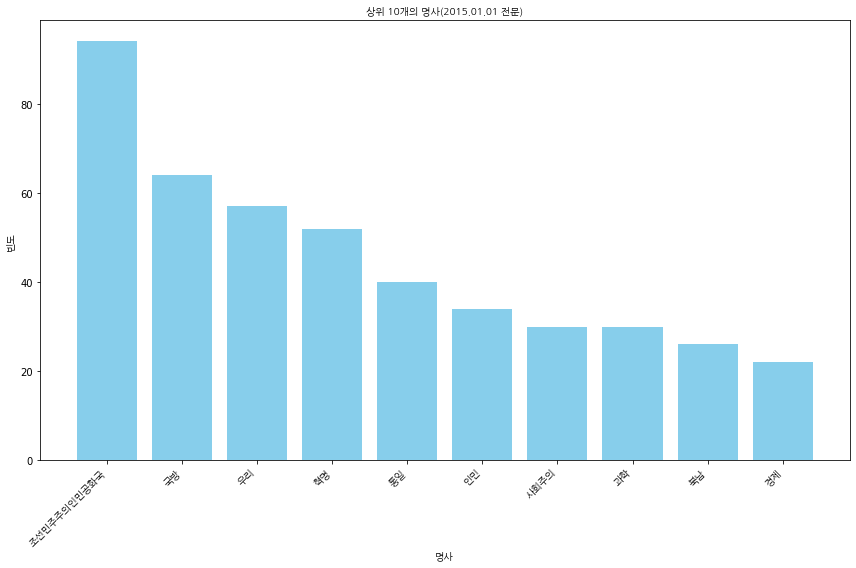

In [561]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_15be).most_common(10)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 10개의 명사(2015.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 20개 단어(전문)

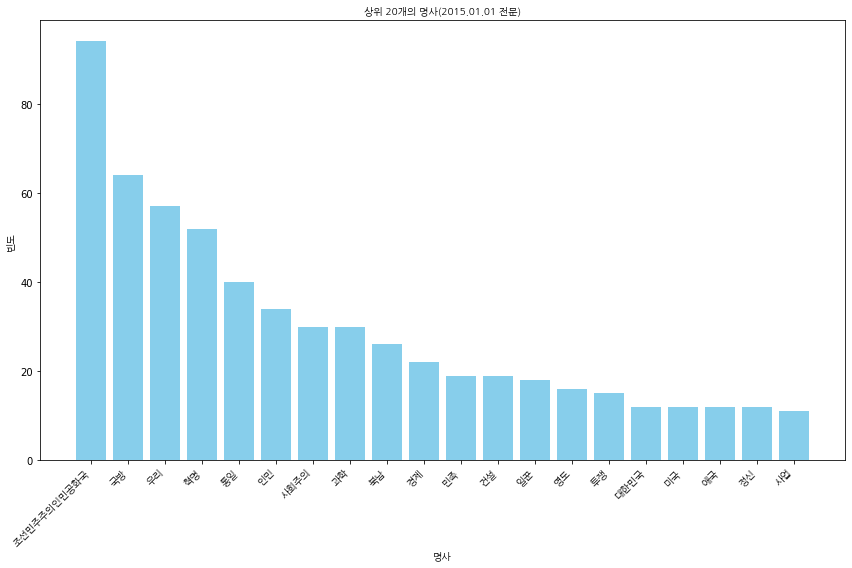

In [562]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_15be).most_common(20)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 20개의 명사(2015.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 30개 단어(전문)

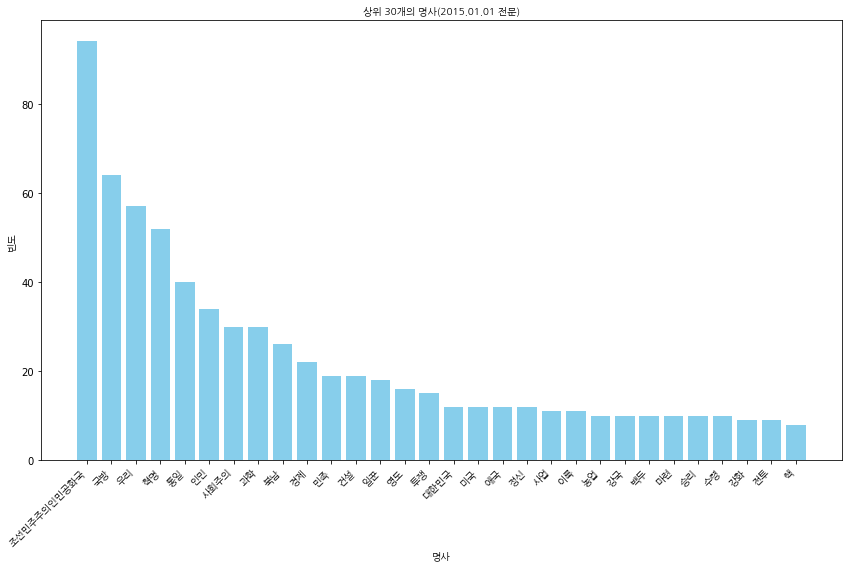

In [563]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_15be).most_common(30)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 30개의 명사(2015.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

# Sheet11 2014.01.01 

In [525]:
df_14be = read_data(10,2)

In [526]:
df_14be

전문  \
0  지금부터 조선노동당 제1비서이시며 조선민주주의인민공화국 국방위원회 제1위원장이 \n...   
1                                                NaN   

                                               제목-서론  \
0  지금부터 조선노동당 제1비서이시며 조선민주주의인민공화국 국방위원회 제1위원장이 \n...   
1                                                NaN   

                                             정치-김씨일가  \
0  동지들, 새해 2014년은 사회주의 강성국가건설의 모든 전선에서 새로운 비약의 불바...   
1                                                NaN   

                                                  경제  \
0  승리의 신심 드높이 강성국가건설의 모든 전선에서 비약의 불바람을 세차게 일으켜 나가...   
1  금속공업과 화학공업은 경제강국을 떠받드는 쌍기둥이며 금속 화학공업을 발전시키는 것은...   

                                                과학기술  \
0  과학기술은 강성국가 건설을 추동하는 원동력이며 과학기술발전에 인민의 행복과 조국의 ...   
1                                                NaN   

                                                교육문화  \
0  교육을 비롯한 문화건설에서 큰 걸음을 내짚어야 합니다.\n\n교육부문에서는 혁명의 ...   
1  문학예술은 강성국가 건설에서 혁명적 진군의 나팔수, 힘있는 추동력입니다. 문학예술부...   

                                                  사회  \
0  건설은 강성국가의 기초를 다지고 인민들의 행복의 터전을 마련하는 중요한 전선입니다....   
1  보건부문에서 인민들의 건강증진을 위한 치료예방사업에 힘을 넣어 인민들에게 사회주의 ...   

                                                  국방  \
0  나라의 방위력을 강화하는데 계속 큰 힘을 넣어야 하겠습니다. 국방력 강화는 국사중의...   
1                                                NaN   

                                                정치-당  \
0  우리 혁명의 정치사상 진지를 더욱 공고히 하여야 하겠습니다. 정치사상 진지는 사회주...   
1                                                NaN   

                                                  외교  \
0  올해는 위대한 수령님께서 조국통일과 관련한 역사적 문건에 생애의 마지막 친필을 남기...   
1                                                NaN   

                                                  결론  
0  우리 앞에 나서고 있는 투쟁과업은 방대하며 우리의 앞길에 난관도 있지만 위대한 김일...  
1                                                NaN

## 📌전문

### 데이터 불러오기

In [527]:
all = df_14be['전문'][0]

In [528]:
all

'지금부터 조선노동당 제1비서이시며 조선민주주의인민공화국 국방위원회 제1위원장이 \n시며 조선인민군 최고사령관이신 경애하는 김정은 동지께서 주체104(2015)년 새해에 즈음 \n하여 하시는 신년사를 보내드리겠습니다.\n친애하는 동지들. 사랑하는 인민군 장병들과 전체 인민들, 동포형제 여러분, 우리는 주체혁명의 성스러운 진군길에 뚜렷한 자욱을 아로새긴 2013년을 보내고 앞날에 대한 확신과 혁명적 자부심에 넘쳐 새해 2014년을 맞이합니다.\n\n나는 먼저 전체 인민군 장병들과 인민들의 한없는 그리움과 뜨거운 경모의 정을 담아 위대한 김일성 동지와 김정일 동지께 가장 숭고한 경의와 새해 인사를 삼가 드립니다.\n\n나는 지난해에 조국보위와 사회주의 건설을 위한 투쟁에 고귀한 생을 바친 열사들에게 경의를 표하며 우리 당을 따라 조국번영의 새 시대를 펼쳐나가고 있는 전체 인민군 장병들과 인민들에게 새해 인사를 드립니다.\n\n새해를 맞으며 온 나라 모든 가정들에 더 큰 행복과 기쁨이 넘쳐나기를 축원합니다.\n\n나는 또한 자주와 민주, 조국통일을 위하여 투쟁하고 있는 남녘 겨레들과 조국의 융성번영을 위해 헌신하고 있는 해외동포들 그리고 정의와 평화를 사랑하는 세계 진보적 인민들과 외국의 벗들에게 새해의 인사를 보냅니다.\n\n지난해는 전당, 전군, 전민이 당이 제시한 새로운 병진노선을 받들고 총공격전을 벌여 사회주의 강성국가 건설과 사회주의 수호전에서 빛나는 승리를 이룩한 자랑찬 해였습니다.\n\n지난해 우리 군대와 인민은 당의 두리에 굳게 뭉쳐 위대한 수령님과 장군님의 사상과 위업을 빛내이고 우리 혁명대오의 정치 사상적 위력을 더욱 강화하였습니다.\n\n 우리 군대와 인민은 공화국 창건 65돌과 전승 60돌에 즈음한 정치행사들과 지난해 투쟁의 전 과정을 통하여 위대한 수령님과 장군님을 높이 우러러 모시고 수령님과 장군님의 불멸의 업적을 만대에 빛내어 갈 확고한 신념과 의지를 과시하였습니다.\n\n우리 당이 펼친 인민존중, 인민사랑의 정치와 당을 어머니품으로 믿고

### 특수기호 일차적으로 제거

In [529]:
import re
all = re.sub(r'[()《》!]', ' ', all) #특수기호 제거, 정규 표현식  

### '\n\n'를 기준으로 문장 나누기

In [530]:
all = all.split('\n\n')

### 특수기호 이차적으로 ('1. ','2. ','3. ', '4. ' ,'\n' 등) 삭제

In [531]:
for idx,sent in enumerate(all):
    if ('1. ' in sent) or ('2. ' in sent) or ('3. ' in sent) or ('4. ' in sent) or ('5. 'in sent) or ('6. 'in sent):
        all[idx] = sent[3:]

In [532]:
all_14be = []
for text in all:
    all_14be.append(re.sub(r'[\n]', ' ', text))

In [533]:
all_14be

['지금부터 조선노동당 제1비서이시며 조선민주주의인민공화국 국방위원회 제1위원장이  시며 조선인민군 최고사령관이신 경애하는 김정은 동지께서 주체104 2015 년 새해에 즈음  하여 하시는 신년사를 보내드리겠습니다. 친애하는 동지들. 사랑하는 인민군 장병들과 전체 인민들, 동포형제 여러분, 우리는 주체혁명의 성스러운 진군길에 뚜렷한 자욱을 아로새긴 2013년을 보내고 앞날에 대한 확신과 혁명적 자부심에 넘쳐 새해 2014년을 맞이합니다.',
 '나는 먼저 전체 인민군 장병들과 인민들의 한없는 그리움과 뜨거운 경모의 정을 담아 위대한 김일성 동지와 김정일 동지께 가장 숭고한 경의와 새해 인사를 삼가 드립니다.',
 '나는 지난해에 조국보위와 사회주의 건설을 위한 투쟁에 고귀한 생을 바친 열사들에게 경의를 표하며 우리 당을 따라 조국번영의 새 시대를 펼쳐나가고 있는 전체 인민군 장병들과 인민들에게 새해 인사를 드립니다.',
 '새해를 맞으며 온 나라 모든 가정들에 더 큰 행복과 기쁨이 넘쳐나기를 축원합니다.',
 '나는 또한 자주와 민주, 조국통일을 위하여 투쟁하고 있는 남녘 겨레들과 조국의 융성번영을 위해 헌신하고 있는 해외동포들 그리고 정의와 평화를 사랑하는 세계 진보적 인민들과 외국의 벗들에게 새해의 인사를 보냅니다.',
 '지난해는 전당, 전군, 전민이 당이 제시한 새로운 병진노선을 받들고 총공격전을 벌여 사회주의 강성국가 건설과 사회주의 수호전에서 빛나는 승리를 이룩한 자랑찬 해였습니다.',
 '지난해 우리 군대와 인민은 당의 두리에 굳게 뭉쳐 위대한 수령님과 장군님의 사상과 위업을 빛내이고 우리 혁명대오의 정치 사상적 위력을 더욱 강화하였습니다.',
 ' 우리 군대와 인민은 공화국 창건 65돌과 전승 60돌에 즈음한 정치행사들과 지난해 투쟁의 전 과정을 통하여 위대한 수령님과 장군님을 높이 우러러 모시고 수령님과 장군님의 불멸의 업적을 만대에 빛내어 갈 확고한 신념과 의지를 과시하였습니다.',
 '우리 당이 펼친 인민존중, 인민사랑의 정치와 당을 어머니

In [534]:
all_14be[0] = all_14be[0].split(".")[2]

In [535]:
all_14be = all_14be[:-1]

In [536]:
all_14be

[' 사랑하는 인민군 장병들과 전체 인민들, 동포형제 여러분, 우리는 주체혁명의 성스러운 진군길에 뚜렷한 자욱을 아로새긴 2013년을 보내고 앞날에 대한 확신과 혁명적 자부심에 넘쳐 새해 2014년을 맞이합니다',
 '나는 먼저 전체 인민군 장병들과 인민들의 한없는 그리움과 뜨거운 경모의 정을 담아 위대한 김일성 동지와 김정일 동지께 가장 숭고한 경의와 새해 인사를 삼가 드립니다.',
 '나는 지난해에 조국보위와 사회주의 건설을 위한 투쟁에 고귀한 생을 바친 열사들에게 경의를 표하며 우리 당을 따라 조국번영의 새 시대를 펼쳐나가고 있는 전체 인민군 장병들과 인민들에게 새해 인사를 드립니다.',
 '새해를 맞으며 온 나라 모든 가정들에 더 큰 행복과 기쁨이 넘쳐나기를 축원합니다.',
 '나는 또한 자주와 민주, 조국통일을 위하여 투쟁하고 있는 남녘 겨레들과 조국의 융성번영을 위해 헌신하고 있는 해외동포들 그리고 정의와 평화를 사랑하는 세계 진보적 인민들과 외국의 벗들에게 새해의 인사를 보냅니다.',
 '지난해는 전당, 전군, 전민이 당이 제시한 새로운 병진노선을 받들고 총공격전을 벌여 사회주의 강성국가 건설과 사회주의 수호전에서 빛나는 승리를 이룩한 자랑찬 해였습니다.',
 '지난해 우리 군대와 인민은 당의 두리에 굳게 뭉쳐 위대한 수령님과 장군님의 사상과 위업을 빛내이고 우리 혁명대오의 정치 사상적 위력을 더욱 강화하였습니다.',
 ' 우리 군대와 인민은 공화국 창건 65돌과 전승 60돌에 즈음한 정치행사들과 지난해 투쟁의 전 과정을 통하여 위대한 수령님과 장군님을 높이 우러러 모시고 수령님과 장군님의 불멸의 업적을 만대에 빛내어 갈 확고한 신념과 의지를 과시하였습니다.',
 '우리 당이 펼친 인민존중, 인민사랑의 정치와 당을 어머니품으로 믿고 따르는 인민들의 뜨거운 충정이 하나로 되어 당과 인민대중의 혈연의 유대가 새로운 높은 경지에 올라섰습니다.',
 '우리 당은 지난해에 강성국가 건설을 위한 투쟁의 벅찬 시기에 당안에 배겨있던 종파오물을 제거하는 단호한 

### 이름 추출
'김일성','김정은' 이름이 언급되지만, 두 이름 다 잘 추출되므로 이름을 따로 추출하는 단계는 생략하겠다.

### 권력구조와 정치형태 관련 단어 사용자 정의 사전을 사용하여 명사 추출

In [537]:
user_defined_extracted_nouns,texts_without_user_nouns  = [],[]
for text in all_14be:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,user_defined_nouns)
    user_defined_extracted_nouns.append(extracted_nouns)
    texts_without_user_nouns.append(remaining_text)

In [538]:
user_defined_extracted_nouns

[[('인민군', 1), ('인민', 1), ('혁명', 2), ('장병', 1), ('동포', 1), ('우리', 1)],
 [('김정일', 1),
  ('김일성', 1),
  ('인민군', 1),
  ('인민', 1),
  ('인사', 1),
  ('동지', 2),
  ('장병', 1)],
 [('사회주의', 1),
  ('우리 당', 1),
  ('인민군', 1),
  ('조국', 2),
  ('인민', 1),
  ('인사', 1),
  ('장병', 1),
  ('건설', 1),
  ('투쟁', 1)],
 [('나라', 1)],
 [('해외동포', 1),
  ('조국통일', 1),
  ('조국', 1),
  ('인민', 1),
  ('인사', 1),
  ('남녘', 1),
  ('투쟁', 1)],
 [('사회주의', 2), ('강성국가', 1), ('노선', 1), ('건설', 1)],
 [('인민', 1), ('혁명', 1), ('군대', 1), ('수령', 1), ('우리', 2), ('장군', 1)],
 [('공화국', 1),
  ('인민', 1),
  ('군대', 1),
  ('수령', 2),
  ('행사', 1),
  ('우리', 1),
  ('투쟁', 1),
  ('장군', 2)],
 [('인민대중', 1), ('우리 당', 1), ('인민', 3)],
 [('우리 당', 2), ('강성국가', 1), ('혁명', 2), ('우리', 1), ('건설', 1), ('투쟁', 1)],
 [('우리 당', 1), ('인민', 2), ('전투', 1), ('투쟁', 1)],
 [('제국주의', 1), ('국방력', 1)],
 [('국방력', 1), ('국방', 2)],
 [('인민군장병', 1),
  ('반공화국', 1),
  ('핵전쟁', 1),
  ('내무군', 1),
  ('공화국', 1),
  ('조국', 2),
  ('인민', 2),
  ('장병', 1),
  ('수령', 2)],
 [('경제강국', 1), ('인민', 2), ('군대', 1

#### 동의어 처리

In [539]:
word_frequencies_user_defined_nouns=merge_synonyms_with_frequencies(user_defined_extracted_nouns,synonym_dict)

#### 빈도수 구하기

In [540]:
word_frequencies_user = Counter(word_frequencies_user_defined_nouns)

In [541]:
texts_without_user_nouns

[' 사랑하는    들과 전체  들,  형제 여러분,  는 주체 의 성스러운 진군길에 뚜렷한 자욱을 아로새긴 2013년을 보내고 앞날에 대한 확신과  적 자부심에 넘쳐 새해 2014년을 맞이합니다',
 '나는 먼저 전체    들과  들의 한없는 그리움과 뜨거운 경모의 정을 담아 위대한    와    께 가장 숭고한 경의와 새해  를 삼가 드립니다.',
 '나는 지난해에  보위와    을 위한  에 고귀한 생을 바친 열사들에게 경의를 표하며  을 따라  번영의 새 시대를 펼쳐나가고 있는 전체    들과  들에게 새해  를 드립니다.',
 '새해를 맞으며 온   모든 가정들에 더 큰 행복과 기쁨이 넘쳐나기를 축원합니다.',
 '나는 또한 자주와 민주,  을 위하여  하고 있는   겨레들과  의 융성번영을 위해 헌신하고 있는  들 그리고 정의와 평화를 사랑하는 세계 진보적  들과 외국의 벗들에게 새해의  를 보냅니다.',
 '지난해는 전당, 전군, 전민이 당이 제시한 새로운 병진 을 받들고 총공격전을 벌여      과   수호전에서 빛나는 승리를 이룩한 자랑찬 해였습니다.',
 '지난해    와  은 당의 두리에 굳게 뭉쳐 위대한  님과  님의 사상과 위업을 빛내이고    대오의 정치 사상적 위력을 더욱 강화하였습니다.',
 '    와  은   창건 65돌과 전승 60돌에 즈음한 정치 들과 지난해  의 전 과정을 통하여 위대한  님과  님을 높이 우러러 모시고  님과  님의 불멸의 업적을 만대에 빛내어 갈 확고한 신념과 의지를 과시하였습니다.',
 ' 이 펼친  존중,  사랑의 정치와 당을 어머니품으로 믿고 따르는  들의 뜨거운 충정이 하나로 되어 당과  의 혈연의 유대가 새로운 높은 경지에 올라섰습니다.',
 ' 은 지난해에    을 위한  의 벅찬 시기에 당안에 배겨있던 종파오물을 제거하는 단호한 조치를 취하였습니다.  이 적중한 시기에 정확한 결심으로 반당, 반  종파일당을 적발, 숙청함으로써 당과  대오가 더욱 굳건히 다져지고  의 일심단결이 백배로 강화되

### 불용어 제거

In [542]:
texts_without_stopwords=[]
for text in texts_without_user_nouns:
    remaining_text = remove_stopwords(text,stopwords)
    texts_without_stopwords.append(remaining_text)

In [543]:
texts_without_stopwords

[' 사랑         전체  들,  형제   ,  는      성   진군길에 뚜렷  자욱을 아로새긴   을 보내고 앞날   확신     자부심        을 맞   ',
 '      전체           한   그리움  뜨거운 경모  정을 담아 위대     와    께    숭고  경의와     를 삼    .',
 '       보위와        에 고귀  생을 바친 열사들   경의를 표        번영    시대를 펼쳐나가고    전체        들         .',
 '  를 맞   온      가정   더 큰 행복  기쁨  넘쳐나기를 축원  .',
 '        와 민주,              겨레      융성번영을 위해 헌신            정의와 평화를 사랑   세계 진보      외국  벗들        를   .',
 '  는 전당, 전군, 전민  당  제시      병진 을 받   총공격전을 벌여          수호전   빛   승리를 이룩  자랑찬 해  .',
 '      와  은 당  두리에    뭉쳐 위대   님   님  사상  위업을 빛내      대오  정치 사상  위력을    강화하  .',
 '    와  은   창건     전승   에 즈음  정치          전 과정   위대   님   님을 높  우러러 모    님   님  불멸  업적을 만대에 빛내어 갈 확고  신념  의지를 과시하  .',
 '   펼친  존중,  사랑  정치와 당을 어머니품   믿고 따르는     뜨거운 충정         당     혈연  유대         경지에 올라섰  .',
 ' 은             벅찬 시기에 당   배겨있던 종파오물을 제거   단호  조치를 취하  .    적중  시기에 정확  결심   반당, 반  종파일당을 적발, 숙청   당   대오       히   지고    일심단결  백배  강화  .',
 '       은 당     기능  역할을 강화      복무   당   시대와 역사 앞

#### '조선로동'이라는 단어는 단독으로 쓰인 단어가 아닌 '조선로동당 중앙위원회'와 같이 사용된 단어로 삭제한다.


In [544]:
sentences = []
for sentence in texts_without_stopwords:
    sentences.append(sentence.replace("조선로동", " "))

In [545]:
texts_without_stopwords = sentences

In [546]:
remaining_text = clean_text(texts_without_stopwords)

In [547]:
texts_without_stopwords = remaining_text

### soynlp 명사 추출기 ( 이미 명사로 분류된 단어들은 제외)

In [548]:
from soynlp.noun import LRNounExtractor_v2
noun_extractor = LRNounExtractor_v2(verbose=True, extract_compound=True)
noun_extractor.train(texts_without_stopwords)
soynlp_nouns = noun_extractor.extract()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 849 from 95 sents. mem=0.202 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=1198, mem=0.202 Gb
[Noun Extractor] batch prediction was completed for 276 words
[Noun Extractor] checked compounds. discovered 4 compounds
[Noun Extractor] postprocessing detaching_features : 88 -> 88
[Noun Extractor] postprocessing ignore_features : 88 -> 86
[Noun Extractor] postprocessing ignore_NJ : 86 -> 86
[Noun Extractor] 86 nouns (4 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.202 Gb                    
[Noun Extractor] 25.96 % eojeols are covered


In [549]:
#soynlp로 추출된 명사를 (명사,빈도수)로 저장
extracted_soynlp_words = {word:score.frequency for word,score in soynlp_nouns.items() if len(word) >= 2}
extracted_soynlp_words

{'철도운수': 2,
 '일심단결': 3,
 '체육열풍': 2,
 '전쟁책동': 2,
 '이바지': 2,
 '평화': 7,
 '경의': 2,
 '보위': 3,
 '시대': 5,
 '승리': 6,
 '정치': 3,
 '창조': 2,
 '지도': 2,
 '요구': 2,
 '행복': 7,
 '난관': 2,
 '강화': 20,
 '마련': 4,
 '추동': 2,
 '의도': 2,
 '헌신': 4,
 '실현': 6,
 '수호': 5,
 '대결': 2,
 '이룩': 7,
 '위협': 2,
 '일어': 2,
 '문제': 6,
 '성과': 4,
 '구호': 3,
 '대오': 5,
 '영예': 2,
 '토대': 2,
 '봉화': 2,
 '기초': 1,
 '관리': 2,
 '제도': 1,
 '관계': 1,
 '나아': 3,
 '자랑': 3,
 '생산': 12,
 '환경': 3,
 '생활': 7,
 '혁신': 5,
 '전진': 3,
 '공업': 4,
 '진군': 3,
 '위업': 3,
 '신념': 5,
 '사명': 2,
 '정신': 2,
 '존엄': 3,
 '자연': 1,
 '농업': 1,
 '열정': 3,
 '개선': 7,
 '운동': 2,
 '사업': 6,
 '방침': 1,
 '이익': 2,
 '입장': 3,
 '민족': 5,
 '안전': 2,
 '발전': 9,
 '농사': 1,
 '현실': 2,
 '단합': 2,
 '다그': 2,
 '체육': 5,
 '빛내': 2,
 '농업생산': 1.0,
 '관계개선': 1.0}

In [550]:
word_frequencies_soynlp=Counter(extracted_soynlp_words)

#### soynlp로 추출한 명사 데이터셋에서 삭제

In [551]:
#texts_without_stopwords에 삭제할 단어 저장
remove_word_soynlp = [ word for word in soynlp_nouns if len(word) >= 2]

In [552]:
#soynlp로 추출된 명사들을 texts_without_stopwords에서 삭제한다.
texts_without_soynlp=[]
for text in texts_without_stopwords:
    remaining_text = remove_stopwords(text,remove_word_soynlp)
    texts_without_soynlp.append(remaining_text)

In [553]:
texts_without_soynlp

['사랑 전체 들, 형제   길에 뚜렷 자욱을 아로새긴 보내고 앞날 확신 자부심 ',
 '전체 그리움 뜨거운 경모 정을 담아 위대 숭고   와 ',
 '  와 고귀 생을 바친 열사들   를 번영   를 펼쳐나가고 전체 ',
 '가정    기쁨 넘쳐나기를 축원 ',
 '민주, 겨레 융성번영을 위해    정의와   를 사랑 세계 진보 외국 벗들 ',
 '전당, 전군, 전민 제시 병진 총공격전을 벌여   전   를      찬 ',
 '두리에 뭉쳐 위대 사상   을          사상 위력을   하 ',
 '창건 전승 즈음    과정 위대 님을 우러러 불멸 업적을 만대에   어 확고    의지를 과시하 ',
 '펼친 존중, 사랑   와 당을 어머니품 믿고 따르는 뜨거운 충정 혈연 유대 경지에 올라섰 ',
 '벅찬 시기에 배겨있던 종파오물을 제거 단호 조치를 취하 적중 시기에 정확 결심 반당, 종파일당을 적발, 숙청    지고    백배    ',
 '기능 역할을    복무   와 역사      을   할 확언하 ',
 '자위    첨예   전   를   하 ',
 '과학자, 기술자 노동계급은 억척    배짱 과학 첨단을 돌파 선군조선 위력을 떨치고   에 기여하 ',
 '결사옹위         을 지니고 목숨 옹위    무모 도발책동   소동을 걸음 짓부    위력을 떨치었 ',
 '어렵고 복잡    힘을    향상   를   하 ',
 '여러 단위들    앙양   나고 자립    근로자 어려운 조건 불리   기후        을 일으켜      하 ',
 '부강번영    기념비   물 수많 일떠세우고 열어 놓았 ',
 '마식령속도를   할 호소를 떨쳐나선 불타는 애국       많은 대상 짧은 기간에 노동당     물 훌륭히 일떠세움 변모    모습을 보여주었    웃음소리 울려퍼지게 ',
 '세포등판 떨쳐나선 부닥치는   을 이겨내며   을 길들여 원대 구상을 앞당겨   할 돌파구를 열어 놓았 ',
 '   문화   을   하   강국 구상을    들끓었 미더

In [554]:
remaining_text = clean_text(texts_without_soynlp)

In [555]:
remaining_text

['사랑 전체 들, 형제 길에 뚜렷 자욱을 아로새긴 보내고 앞날 확신 자부심 ',
 '전체 그리움 뜨거운 경모 정을 담아 위대 숭고 ',
 '고귀 생을 바친 열사들 번영 펼쳐나가고 전체 ',
 '가정 기쁨 넘쳐나기를 축원 ',
 '민주, 겨레 융성번영을 위해 정의와 사랑 세계 진보 외국 벗들 ',
 '전당, 전군, 전민 제시 병진 총공격전을 벌여 ',
 '두리에 뭉쳐 위대 사상 사상 위력을 ',
 '창건 전승 즈음 과정 위대 님을 우러러 불멸 업적을 만대에 확고 의지를 과시하 ',
 '펼친 존중, 사랑 당을 어머니품 믿고 따르는 뜨거운 충정 혈연 유대 경지에 올라섰 ',
 '벅찬 시기에 배겨있던 종파오물을 제거 단호 조치를 취하 적중 시기에 정확 결심 반당, 종파일당을 적발, 숙청 지고 백배 ',
 '기능 역할을 복무 역사 확언하 ',
 '자위 첨예 ',
 '과학자, 기술자 노동계급은 억척 배짱 과학 첨단을 돌파 선군조선 위력을 떨치고 기여하 ',
 '결사옹위 지니고 목숨 옹위 무모 도발책동 소동을 걸음 짓부 위력을 떨치었 ',
 '어렵고 복잡 힘을 향상 ',
 '여러 단위들 앙양 나고 자립 근로자 어려운 조건 불리 기후 일으켜 ',
 '부강번영 기념비 수많 일떠세우고 열어 놓았 ',
 '마식령속도를 호소를 떨쳐나선 불타는 애국 많은 대상 짧은 기간에 노동당 훌륭히 일떠세움 변모 모습을 보여주었 웃음소리 울려퍼지게 ',
 '세포등판 떨쳐나선 부닥치는 이겨내며 길들여 원대 구상을 앞당겨 돌파구를 열어 놓았 ',
 '문화 강국 구상을 들끓었 미더운 국제경기들 금메달 떨치었 ',
 '의무 실시 준비 추진 분야 많은 현대 의료시설 갖추어져 의료봉사 ',
 '음악예술 명곡 창작 천만군민 마음을 충정 세계 승화 위훈 고무하 ',
 '현명 전당, 전군, 전민 일떠세울 불굴 의지 영웅 벌인 결실 ',
 '사상, 원대 목표를 가로막을 뚜렷 보여주었 ',
 '충실성 열렬 애를 지니고 무비 성을 발휘 사변 전체 뜨거운 감사 ',
 '들, 전선 비약 불바람을 일으켜 선군조선 번영기

In [556]:
texts_without_soynlp = remaining_text

### 북한 용어사전을 활용하여 명사 추출

In [557]:
site_defined_extracted_nouns,texts_without_extracted_nouns = [],[]
for text in texts_without_soynlp:
    extracted_nouns, remaining_text = extract_site_defined_nouns(text,dict_site)
    site_defined_extracted_nouns.append(extracted_nouns)
    texts_without_extracted_nouns.append(remaining_text)

In [558]:
# 리스트 평탄화
site_defined_extracted_nouns = [item for sublist in site_defined_extracted_nouns for item in sublist]

print(site_defined_extracted_nouns)

['부심', '자욱', '확신', '경모', '겨레', '외국', '정의', '진보', '공격', '두리', '사상', '사상', '과시', '유대', '복무', '역사', '자위', '노동', '술자', '조선', '걸음', '니고', '로자', '앙양', '노동', '대상', '지게', '겨내', '등판', '원대', '메달', '시설', '실시', '사상', '원대', '니고', '불바람', '조선', '확신', '불바람', '앞장', '사상', '정당', '주타격', '방향', '축산기지', '황해남도', '대상', '물길', '동작', '사기', '지방', '최상', '합숙', '전망', '지식', '술자', '용마', '불바람', '로자', '가지', '담보', '전망', '연대', '가지', '정상', '지방', '지방', '령관', '물고', '물고', '어구', '나무심', '지게', '내부예비', '동원', '가지', '전기', '전사', '주인', '가도', '로자', '발성', '주인', '걸음', '오도', '치도', '나팔수', '사상', '가지', '정예', '총대', '궁전', '사상', '사수', '포수', '체계', '량화', '자위', '보루', '사상', '당조', '체계', '가지', '로자', '사상', '사상', '사상', '저해', '불바람', '로자', '바람', '사상', '선전', '열쇠', '로자', '가지', '로자', '정지', '주인', '가지', '역사', '겨레', '해결', '조선', '공조', '주변', '세력', '조선', '라지', '부지', '세력', '조선', '겨레', '저해', '겨레', '무대', '세력', '엄중', '구름', '대외', '자위', '가지', '두리', '들기', '원대', '한마']


In [559]:
word_frequencies_site = Counter(site_defined_extracted_nouns)

In [560]:
word_frequencies_site

Counter({'부심': 1,
         '자욱': 1,
         '확신': 2,
         '경모': 1,
         '겨레': 4,
         '외국': 1,
         '정의': 1,
         '진보': 1,
         '공격': 1,
         '두리': 2,
         '사상': 11,
         '과시': 1,
         '유대': 1,
         '복무': 1,
         '역사': 2,
         '자위': 3,
         '노동': 2,
         '술자': 2,
         '조선': 5,
         '걸음': 2,
         '니고': 2,
         '로자': 7,
         '앙양': 1,
         '대상': 2,
         '지게': 2,
         '겨내': 1,
         '등판': 1,
         '원대': 3,
         '메달': 1,
         '시설': 1,
         '실시': 1,
         '불바람': 4,
         '앞장': 1,
         '정당': 1,
         '주타격': 1,
         '방향': 1,
         '축산기지': 1,
         '황해남도': 1,
         '물길': 1,
         '동작': 1,
         '사기': 1,
         '지방': 3,
         '최상': 1,
         '합숙': 1,
         '전망': 2,
         '지식': 1,
         '용마': 1,
         '가지': 8,
         '담보': 1,
         '연대': 1,
         '정상': 1,
         '령관': 1,
         '물고': 2,
         '어구': 1,
         '나무심': 1,
  

In [561]:
remaining_text = clean_text(texts_without_extracted_nouns)

In [562]:
remaining_text

['사랑 전체 들, 형제 길에 뚜렷 아로새긴 보내고 앞날 ',
 '전체 그리움 뜨거운 정을 담아 위대 숭고 ',
 '고귀 생을 바친 열사들 번영 펼쳐나가고 전체 ',
 '가정 기쁨 넘쳐나기를 축원 ',
 '민주, 융성번영을 위해 사랑 세계 벗들 ',
 '전당, 전군, 전민 제시 병진 전을 벌여 ',
 '뭉쳐 위대 위력을 ',
 '창건 전승 즈음 과정 위대 님을 우러러 불멸 업적을 만대에 확고 의지를 ',
 '펼친 존중, 사랑 당을 어머니품 믿고 따르는 뜨거운 충정 혈연 경지에 올라섰 ',
 '벅찬 시기에 배겨있던 종파오물을 제거 단호 조치를 취하 적중 시기에 정확 결심 반당, 종파일당을 적발, 숙청 지고 백배 ',
 '기능 역할을 확언하 ',
 '첨예 ',
 '과학자, 계급은 억척 배짱 과학 첨단을 돌파 선군 위력을 떨치고 기여하 ',
 '결사옹위 목숨 옹위 무모 도발책동 소동을 짓부 위력을 떨치었 ',
 '어렵고 복잡 힘을 향상 ',
 '여러 단위들 나고 자립 어려운 조건 불리 기후 일으켜 ',
 '부강번영 기념비 수많 일떠세우고 열어 놓았 ',
 '마식령속도를 호소를 떨쳐나선 불타는 애국 많은 짧은 기간에 훌륭히 일떠세움 변모 모습을 보여주었 웃음소리 울려퍼 ',
 '세포 떨쳐나선 부닥치는 길들여 구상을 앞당겨 돌파구를 열어 놓았 ',
 '문화 강국 구상을 들끓었 미더운 국제경기들 떨치었 ',
 '의무 준비 추진 분야 많은 현대 의료 갖추어져 의료봉사 ',
 '음악예술 명곡 창작 천만군민 마음을 충정 세계 승화 위훈 고무하 ',
 '현명 전당, 전군, 전민 일떠세울 불굴 의지 영웅 벌인 결실 ',
 '목표를 가로막을 뚜렷 보여주었 ',
 '충실성 열렬 애를 무비 성을 발휘 사변 전체 뜨거운 감사 ',
 '들, 전선 비약 일으켜 선군 번영기를 열어 장엄 해, 위대 변혁 ',
 '아름 꿈을 앞당겨 보람찬 영광 창건 장식할 대축전장 잇닿아 ',
 '희망찬 영웅 일대 번영기를 열어 ',
 '신심 드높 전선 비약 일으켜 나가자 ',
 '추켜 나가며 전선 비약 불길 

In [563]:
texts_without_extracted_nouns = remaining_text

### Mecab 명사 추출기(이미 명사로 분류된 단어들은 제외)

In [564]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab_nouns = []
for text in texts_without_extracted_nouns:
    mecab_nouns += mecab.nouns(text)

In [565]:
mecab_nouns

['사랑',
 '전체',
 '형제',
 '길',
 '앞날',
 '전체',
 '그리움',
 '정',
 '숭고',
 '고귀',
 '열사',
 '번영',
 '전체',
 '가정',
 '기쁨',
 '축원',
 '민주',
 '융성',
 '번영',
 '사랑',
 '세계',
 '벗',
 '전당',
 '전군',
 '전민',
 '제시',
 '병진',
 '전',
 '위력',
 '창건',
 '전승',
 '즈음',
 '과정',
 '위대',
 '불멸',
 '업적',
 '만대',
 '의지',
 '존중',
 '사랑',
 '어머니',
 '품',
 '충정',
 '혈연',
 '경지',
 '시기',
 '종파',
 '오물',
 '제거',
 '단호',
 '조치',
 '취하',
 '중',
 '시기',
 '정확',
 '결심',
 '반당',
 '종파',
 '일당',
 '적발',
 '숙청',
 '지고',
 '백배',
 '기능',
 '역할',
 '확언',
 '과학자',
 '계급',
 '억척',
 '배짱',
 '과학',
 '첨단',
 '돌파',
 '선군',
 '위력',
 '기여',
 '결사',
 '옹위',
 '목숨',
 '옹위',
 '무모',
 '도발',
 '책동',
 '소동',
 '위력',
 '힘',
 '향상',
 '단위',
 '자립',
 '조건',
 '후',
 '부강',
 '번영',
 '기념비',
 '떠세',
 '마식령',
 '속도',
 '호소',
 '불타',
 '애국',
 '기간',
 '일',
 '떠세',
 '움',
 '변모',
 '모습',
 '웃음',
 '소리',
 '세포',
 '나선',
 '구상',
 '돌파구',
 '문화',
 '강국',
 '구상',
 '국제',
 '경기',
 '의무',
 '준비',
 '추진',
 '분야',
 '현대',
 '의료',
 '의료',
 '봉사',
 '음악',
 '예술',
 '명곡',
 '창작',
 '천만',
 '군민',
 '마음',
 '충정',
 '세계',
 '승화',
 '위훈',
 '고무',
 '현명',
 '전당',
 '전군',
 '전민',
 '떠세',
 '불굴',
 '지

In [566]:
mecab_nouns_clean = []
for char in mecab_nouns:
    if len(char)>1:
        mecab_nouns_clean.append(char)

In [567]:
mecab_nouns = [map_to_synonym(noun, synonym_dict) for noun in mecab_nouns_clean] #동의어 처리

In [568]:
texts_without_mecab=[]
for text in texts_without_extracted_nouns:
    remaining_text = remove_stopwords(text,mecab_nouns)
    texts_without_mecab.append(remaining_text)
texts_without_mecab


['      들,    길에 뚜렷 아로새긴 보내고    ',
 '      뜨거운 정을 담아       ',
 '   생을 바친   들    펼쳐나가고    ',
 '      넘쳐나기를    ',
 '  ,     을 위해       벗들 ',
 '  ,   ,          전을 벌여 ',
 '뭉쳐      을 ',
 '               님을 우러러      을   에 확고   를 ',
 '펼친   ,    당을   품 믿고 따르는 뜨거운         에 올라섰 ',
 '벅찬   에 배겨있던     을         를    적중   에         ,     을   ,          ',
 '     을   하 ',
 '첨예 ',
 '  자,   은            을         을 떨치고   하 ',
 '                     을 짓부   을 떨치었 ',
 '어렵고 복잡 힘을    ',
 '여러   들 나고    어려운    불리 기후 일으켜 ',
 '        수많 일  우고 열어 놓았 ',
 '    를   를 떨쳐     는    많은 짧은   에 훌륭히 일  움      을 보여주었      울려퍼 ',
 '   떨쳐   부닥치는 길들여   을 앞당겨   구를 열어 놓았 ',
 '        을 들끓었 미더운     들 떨치었 ',
 '            많은       갖추어져      ',
 '                  을               하 ',
 '     ,   ,    일  울          벌인    ',
 '  를 가로막을 뚜렷 보여주었 ',
 '  성    애를    성을          뜨거운    ',
 '들,       일으켜      기를 열어    해,       ',
 '   꿈을 앞당겨 보람찬         할      잇닿아 ',
 '희망찬    일대   기를 열어 ',
 '   드높       일으켜 나가자 ',
 '추켜 나가며       불길 타번 '

In [569]:
#단어 빈도수 계산
from collections import Counter
word_frequencies_mecab = Counter(mecab_nouns)
word_frequencies_mecab

Counter({'사랑': 3,
         '전체': 6,
         '형제': 1,
         '앞날': 1,
         '그리움': 1,
         '숭고': 2,
         '고귀': 1,
         '열사': 1,
         '번영': 4,
         '가정': 2,
         '기쁨': 1,
         '축원': 2,
         '민주': 2,
         '융성': 1,
         '세계': 7,
         '전당': 2,
         '전군': 3,
         '전민': 2,
         '제시': 2,
         '병진': 1,
         '위력': 3,
         '창건': 2,
         '전승': 1,
         '즈음': 1,
         '과정': 1,
         '위대': 8,
         '불멸': 1,
         '업적': 1,
         '만대': 1,
         '의지': 1,
         '존중': 3,
         '어머니': 1,
         '충정': 2,
         '혈연': 1,
         '경지': 1,
         '시기': 2,
         '종파': 2,
         '오물': 1,
         '제거': 1,
         '단호': 1,
         '조치': 1,
         '취하': 1,
         '정확': 1,
         '결심': 1,
         '반당': 1,
         '일당': 1,
         '적발': 1,
         '숙청': 1,
         '지고': 1,
         '백배': 1,
         '기능': 2,
         '역할': 3,
         '확언': 1,
         '과학': 6,
         '계급': 1,
        

### 모두 합하기

In [570]:
word_frequencies_all_14be = word_frequencies_mecab+word_frequencies_soynlp+word_frequencies_site+word_frequencies_user

In [571]:
combined_all_14be = merge_frequencies_with_synonyms(word_frequencies_all_14be , synonym_dict)

In [572]:
combined_all_14be

{'농촌': 6,
 '농업': 15.0,
 '혁명': 48,
 '사회주의': 34,
 '조선민주주의인민공화국': 79,
 '대한민국': 6,
 '북남': 16,
 '민주주의': 2,
 '미국': 10,
 '우리': 49,
 '당중앙위원회': 2,
 '경제': 26,
 '핵': 12,
 '통일': 34,
 '국방': 74,
 '과학': 38,
 '제국주의': 4,
 '김정일': 8,
 '친선': 4,
 '애국': 10,
 '동지': 14,
 '영도': 6,
 '강국': 13,
 '정치사상': 10,
 '문명': 3,
 '에네르기': 10,
 '수산업': 4,
 '일꾼': 16,
 '사랑': 3,
 '전체': 6,
 '형제': 1,
 '앞날': 1,
 '그리움': 1,
 '숭고': 2,
 '고귀': 1,
 '열사': 1,
 '번영': 4,
 '가정': 2,
 '기쁨': 1,
 '축원': 2,
 '민주': 2,
 '융성': 1,
 '세계': 7,
 '전당': 2,
 '전군': 3,
 '전민': 2,
 '제시': 2,
 '병진': 1,
 '위력': 3,
 '창건': 2,
 '전승': 1,
 '즈음': 1,
 '과정': 1,
 '위대': 8,
 '불멸': 1,
 '업적': 1,
 '만대': 1,
 '의지': 1,
 '존중': 3,
 '어머니': 1,
 '충정': 2,
 '혈연': 1,
 '경지': 1,
 '시기': 2,
 '종파': 2,
 '오물': 1,
 '제거': 1,
 '단호': 1,
 '조치': 1,
 '취하': 1,
 '정확': 1,
 '결심': 1,
 '반당': 1,
 '일당': 1,
 '적발': 1,
 '숙청': 1,
 '지고': 1,
 '백배': 1,
 '기능': 2,
 '역할': 3,
 '확언': 1,
 '계급': 1,
 '억척': 1,
 '배짱': 1,
 '첨단': 2,
 '돌파': 2,
 '선군': 3,
 '기여': 1,
 '결사': 3,
 '옹위': 3,
 '목숨': 1,
 '무모': 2,
 '도발': 1,
 '책동': 3,
 '소동': 2,
 '

In [573]:
doc_word_freq['14be'] = combined_all_14be
update_excel_with_new_doc(doc_word_freq, file_path)

Excel 파일이 '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'로 업데이트되었습니다.


### 단어 빈도 시각화

#### 상위 10개 단어(전문)

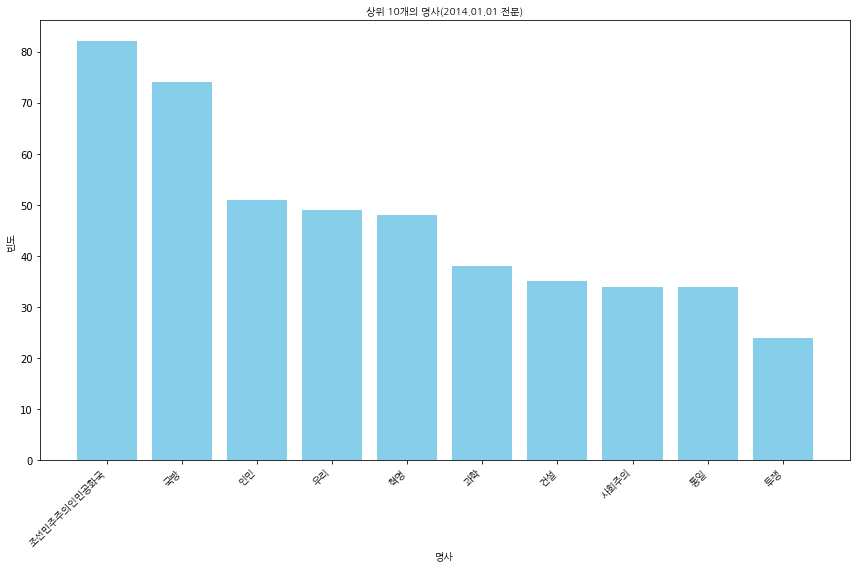

In [612]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_14be).most_common(10)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 10개의 명사(2014.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 20개 단어(전문)

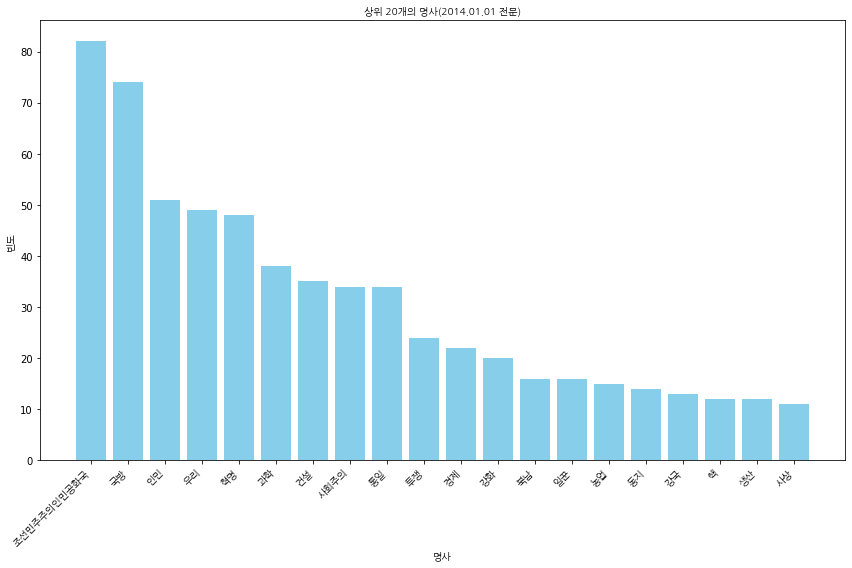

In [613]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_14be).most_common(20)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 20개의 명사(2014.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 30개 단어(전문)

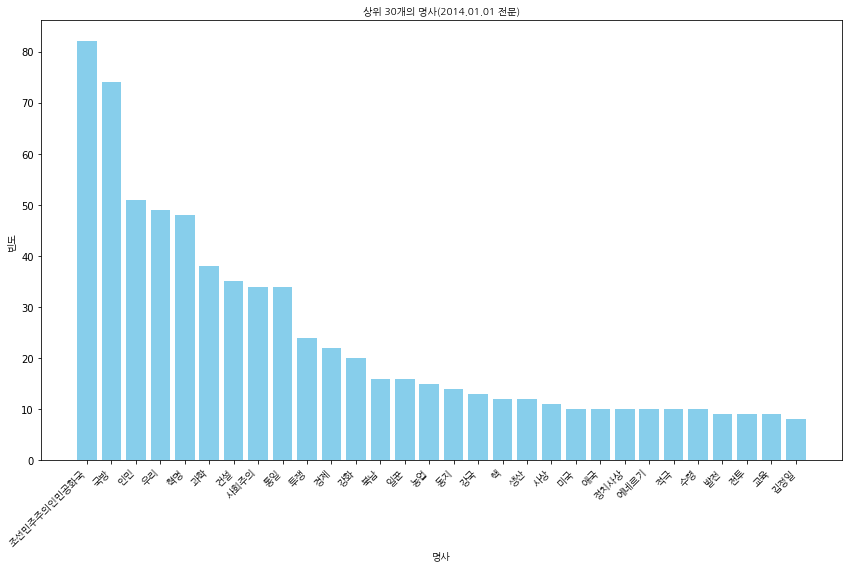

In [614]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_14be).most_common(30)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 30개의 명사(2014.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

# Sheet12 2013.01.01 

In [574]:
df_13be = read_data(11,3)

In [575]:
df_13be

전문  \
0  친애하는 동지들!\n\n영용한 인민군장병들과 사랑하는 온 나라 전체 인민들!\n\n...   
1                                                NaN   

                                               제목-서론  \
0  친애하는 동지들!\n\n영용한 인민군장병들과 사랑하는 온 나라 전체 인민들!\n\n...   
1                                                NaN   

                                             정치-김씨일가  \
0  지난해는 위대한 대원수님들을 우리 혁명의 영원한 수령으로 높이 모시고 당의 령도밑에...   
1  지난해에 혁명투쟁과 건설사업에서 빛나는 승리를 이룩할수 있은것은 위대한 장군님께서 ...   

                                                  경제  \
0  경제강국건설은 오늘 사회주의강성국가건설위업수행에서 전면에 나서는 가장 중요한 과업입...   
1                                                NaN   

                                                과학기술  \
0  우리의 미더운 과학자,기술자들은 인공지구위성 《광명성-3》호 2호기를 성과적으로 발...   
1                                                NaN   

                                                교육문화  \
0  지난해에 전반적12년제의무교육을 실시할데 대한 법령에 의하여 우월한 사회주의교육제도...   
1  사회주의문명국건설에 더욱 박차를 가하여 21세기의 새로운 문명개화기를 활짝열어놓아야...   

                                                  사회  \
0  지난해에 복잡하고 첨예한 정세와 련이어 들이닥친 혹심한 자연재해속에서도 우리 군대와...   
1  \n평양시를 주체조선의 수도,선군문화의 중심지답게 더욱 웅장하고 풍치수려한 도시로 ...   

                                                  국방  \
0  \n우리의 혁명무력은 위대한 수령님 탄생 100돐경축 열병식을 통하여 사상과 신념이...   
1  우리의 정치군사적위력을 백방으로 강화하는데 계속 큰 힘을 넣어야 하겠습니다.\n\n...   

                                                정치-당  \
0  당조직들의 전투적기능과 역할을 더욱 높여야 하겠습니다.\n\n모든 당조직들은 해당 ...   
1                                                NaN   

                                                  외교  \
0  조국통일은 더는 미룰수 없는 민족최대의 절박한 과제이며 위대한 대원수님들의 필생의 ...   
1                                                NaN   

                                                  결론  
0  새해에 우리앞에는 더 밝고 광활한 전망이 펼쳐져있으며 우리 인민이 나아가는 앞길에는...  
1                                                NaN

## 📌전문

### 데이터 불러오기

In [576]:
all = df_13be['전문'][0]

In [577]:
all

'친애하는 동지들!\n\n영용한 인민군장병들과 사랑하는 온 나라 전체 인민들!\n\n그리운 동포형제 여러분!\n\n우리는 조국력사에 특기할 사변들로 빛나게 아로새겨진 2012년을 보내고 원대한 포부와 최후승리에 대한 신심에 넘쳐 새해 2013년을 맞이합니다.\n\n나는 먼저 전체 인민군장병들과 인민들의 한결같은 경모의 마음을 담아 민족의 어버이이시며 주체의 영원한 태양이신 위대한 김일성동지와 김정일동지께 가장 숭고한 경의와 새해의 인사를 삼가 드립니다.\n\n나는 당의 두리에 굳게 뭉쳐 조국의 부강번영을 위하여 헌신적으로 투쟁하고있는 인민군장병들과 인민들에게 새해의 따뜻한 인사를 드리며 온 나라 모든 가정들에 화목과 더 큰 행복이 있기를 진심으로 축원합니다.\n\n나는 또한 조국통일과 민족번영에 대한 열망과 기대속에 새해를 맞이하고있는 남녘겨레들과 해외동포들 그리고 정의와 평화를 사랑하는 세계 진보적인민들과 외국의 벗들에게 새해의 인사를 보냅니다.\n\n지난해는 위대한 대원수님들을 우리 혁명의 영원한 수령으로 높이 모시고 당의 령도밑에 주체혁명위업을 빛나게 계승완성해나갈수 있는 확고한 담보를 마련한 력사적인 해였습니다.\n\n김일성동지와 김정일동지는 우리 인민이 수천년력사에서 처음으로 맞이하고 높이 모신 위대한 수령이시며 백두산대국의 영원한 영상이시고 모든 승리와 영광의 기치이십니다. 우리는 지난해에 위대한 수령님 탄생 100돐을 민족최대의 명절로 성대히 경축하고 주체조선의 100년사를 긍지높이 총화하였으며 김정일동지를 우리 당과 인민의 영원한 수령으로 높이 모시고 수령영생위업을 실현함으로써 김일성-김정일주의기치따라 새로운 주체100년대를 주체혁명위업완성을 위한 승리와 영광의 년대로 빛내여나갈수 있게 되였습니다.\n\n우리 군대와 인민은 하늘처럼 믿고 따르던 장군님을 너무도 뜻밖에 잃고 피눈물속에 2012년을 맞이하였지만 위대한 김정일동지는 영원히 우리와 함께 계신다는 철석의 신념을 가슴깊이 간직하고 당을 따라 결연히 일떠섰으며 당의 령도를 한마음 한뜻으로 받

### 특수기호 일차적으로 제거

In [578]:
import re
all = re.sub(r'[()《》!]', ' ', all) #특수기호 제거, 정규 표현식  

### '\n\n'를 기준으로 문장 나누기

In [579]:
all = all.split('\n\n')

### 특수기호 이차적으로 ('1. ','2. ','3. ', '4. ' ,'\n' 등) 삭제

In [580]:
for idx,sent in enumerate(all):
    if ('1. ' in sent) or ('2. ' in sent) or ('3. ' in sent) or ('4. ' in sent) or ('5. 'in sent) or ('6. 'in sent):
        all[idx] = sent[3:]

In [581]:
all_13be = []
for text in all:
    all_13be.append(re.sub(r'[\n]', ' ', text))

In [582]:
all_13be

['친애하는 동지들 ',
 '영용한 인민군장병들과 사랑하는 온 나라 전체 인민들 ',
 '그리운 동포형제 여러분 ',
 '우리는 조국력사에 특기할 사변들로 빛나게 아로새겨진 2012년을 보내고 원대한 포부와 최후승리에 대한 신심에 넘쳐 새해 2013년을 맞이합니다.',
 '나는 먼저 전체 인민군장병들과 인민들의 한결같은 경모의 마음을 담아 민족의 어버이이시며 주체의 영원한 태양이신 위대한 김일성동지와 김정일동지께 가장 숭고한 경의와 새해의 인사를 삼가 드립니다.',
 '나는 당의 두리에 굳게 뭉쳐 조국의 부강번영을 위하여 헌신적으로 투쟁하고있는 인민군장병들과 인민들에게 새해의 따뜻한 인사를 드리며 온 나라 모든 가정들에 화목과 더 큰 행복이 있기를 진심으로 축원합니다.',
 '나는 또한 조국통일과 민족번영에 대한 열망과 기대속에 새해를 맞이하고있는 남녘겨레들과 해외동포들 그리고 정의와 평화를 사랑하는 세계 진보적인민들과 외국의 벗들에게 새해의 인사를 보냅니다.',
 '지난해는 위대한 대원수님들을 우리 혁명의 영원한 수령으로 높이 모시고 당의 령도밑에 주체혁명위업을 빛나게 계승완성해나갈수 있는 확고한 담보를 마련한 력사적인 해였습니다.',
 '김일성동지와 김정일동지는 우리 인민이 수천년력사에서 처음으로 맞이하고 높이 모신 위대한 수령이시며 백두산대국의 영원한 영상이시고 모든 승리와 영광의 기치이십니다. 우리는 지난해에 위대한 수령님 탄생 100돐을 민족최대의 명절로 성대히 경축하고 주체조선의 100년사를 긍지높이 총화하였으며 김정일동지를 우리 당과 인민의 영원한 수령으로 높이 모시고 수령영생위업을 실현함으로써 김일성-김정일주의기치따라 새로운 주체100년대를 주체혁명위업완성을 위한 승리와 영광의 년대로 빛내여나갈수 있게 되였습니다.',
 '우리 군대와 인민은 하늘처럼 믿고 따르던 장군님을 너무도 뜻밖에 잃고 피눈물속에 2012년을 맞이하였지만 위대한 김정일동지는 영원히 우리와 함께 계신다는 철석의 신념을 가슴깊이 간직하고 당을 따라 결연히 일떠섰으며 당의 령도를 

### 이름 추출
'김일성','김정은' 이름이 언급되지만, 두 이름 모두 잘 추출되므로 따로 추출하지 않겠다.

### 권력구조와 정치형태 관련 단어 사용자 정의 사전을 사용하여 명사 추출

In [583]:
user_defined_extracted_nouns,texts_without_user_nouns  = [],[]
for text in all_13be:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,user_defined_nouns)
    user_defined_extracted_nouns.append(extracted_nouns)
    texts_without_user_nouns.append(remaining_text)

In [584]:
user_defined_extracted_nouns

[[('동지', 1)],
 [('인민군장병', 1), ('인민', 1), ('나라', 1)],
 [('동포', 1)],
 [('조국', 1), ('력사', 1), ('우리', 1)],
 [('인민군장병', 1),
  ('김정일', 1),
  ('김일성', 1),
  ('어버이', 1),
  ('인민', 1),
  ('인사', 1),
  ('동지', 2)],
 [('인민군장병', 1), ('조국', 1), ('인민', 1), ('인사', 1), ('나라', 1), ('투쟁', 1)],
 [('해외동포', 1), ('조국통일', 1), ('인민', 1), ('인사', 1), ('남녘', 1)],
 [('력사적', 1), ('령도', 1), ('혁명', 2), ('수령', 1), ('우리', 1)],
 [('우리 당', 1),
  ('백두산', 1),
  ('김정일', 3),
  ('김일성', 2),
  ('인민', 2),
  ('혁명', 1),
  ('동지', 3),
  ('력사', 1),
  ('수령', 4),
  ('우리', 2)],
 [('인민군장병', 1),
  ('김정일', 1),
  ('령도', 1),
  ('인민', 2),
  ('동지', 1),
  ('군대', 1),
  ('우리', 2),
  ('장군', 1)],
 [('인민군장병', 1),
  ('우리 당', 1),
  ('인민', 2),
  ('군대', 1),
  ('행사', 1),
  ('나라', 1),
  ('우리', 1)],
 [('력사적', 1), ('조국', 1), ('인민', 1), ('군대', 1), ('우리', 1), ('장군', 1)],
 [('과학기술위성', 1), ('인공지구위성', 1), ('우주과학', 1), ('대사변', 1), ('우리', 2), ('장군', 1)],
 [('현대적무장장비', 1),
  ('백두산혁명강군', 1),
  ('전쟁도발책동', 1),
  ('인민군장병', 1),
  ('강성국가', 1),
  ('우리 식', 1),
  ('반공화국', 1),


#### 동의어 처리

In [585]:
word_frequencies_user_defined_nouns=merge_synonyms_with_frequencies(user_defined_extracted_nouns,synonym_dict)

#### 빈도수 구하기

In [586]:
word_frequencies_user = Counter(word_frequencies_user_defined_nouns)

In [587]:
texts_without_user_nouns

['친애하는  들 ',
 '영용한  들과 사랑하는 온   전체  들 ',
 '그리운  형제 여러분 ',
 ' 는   에 특기할 사변들로 빛나게 아로새겨진 2012년을 보내고 원대한 포부와 최후승리에 대한 신심에 넘쳐 새해 2013년을 맞이합니다.',
 '나는 먼저 전체  들과  들의 한결같은 경모의 마음을 담아 민족의  이시며 주체의 영원한 태양이신 위대한   와   께 가장 숭고한 경의와 새해의  를 삼가 드립니다.',
 '나는 당의 두리에 굳게 뭉쳐  의 부강번영을 위하여 헌신적으로  하고있는  들과  들에게 새해의 따뜻한  를 드리며 온   모든 가정들에 화목과 더 큰 행복이 있기를 진심으로 축원합니다.',
 '나는 또한  과 민족번영에 대한 열망과 기대속에 새해를 맞이하고있는  겨레들과  들 그리고 정의와 평화를 사랑하는 세계 진보적 들과 외국의 벗들에게 새해의  를 보냅니다.',
 '지난해는 위대한 대원수님들을    의 영원한  으로 높이 모시고 당의  밑에 주체 위업을 빛나게 계승완성해나갈수 있는 확고한 담보를 마련한  인 해였습니다.',
 '  와   는    이 수천년 에서 처음으로 맞이하고 높이 모신 위대한  이시며  대국의 영원한 영상이시고 모든 승리와 영광의 기치이십니다.  는 지난해에 위대한  님 탄생 100돐을 민족최대의 명절로 성대히 경축하고 주체조선의 100년사를 긍지높이 총화하였으며   를  과  의 영원한  으로 높이 모시고  영생위업을 실현함으로써  - 주의기치따라 새로운 주체100년대를 주체 위업완성을 위한 승리와 영광의 년대로 빛내여나갈수 있게 되였습니다.',
 '   와  은 하늘처럼 믿고 따르던  님을 너무도 뜻밖에 잃고 피눈물속에 2012년을 맞이하였지만 위대한   는 영원히  와 함께 계신다는 철석의 신념을 가슴깊이 간직하고 당을 따라 결연히 일떠섰으며 당의  를 한마음 한뜻으로 받들었습니다.  들과  들은 백옥같은 충정과 숭고한 도덕의리심, 온갖 지성을 다 바쳐 금수산태양궁전을 주체의 최고성지로 가장 숭엄하게 꾸리고

### 불용어 제거

In [588]:
texts_without_stopwords=[]
for text in texts_without_user_nouns:
    remaining_text = remove_stopwords(text,stopwords)
    texts_without_stopwords.append(remaining_text)

In [589]:
texts_without_stopwords

['친애      ',
 '영용      사랑   온   전체    ',
 '그리운  형제    ',
 ' 는   에 특기할 사변   빛   아로새겨진   을 보내고 원대  포부와 최후승리   신심        을 맞   .',
 '      전체         한결   경모  마음을 담아 민족          영원  태양   위대    와   께    숭고  경의와      를 삼    .',
 '   당  두리에    뭉쳐    부강번영   헌신            들       따뜻   를    온      가정   화목  더 큰 행복  있기를 진심   축원  .',
 '         민족번영   열망  기대     를 맞     겨레         정의와 평화를 사랑   세계 진보     외국  벗들        를   .',
 '  는 위대  대원수님        영원      높  모   당         위업을 빛   계승완성     확고  담보를 마련   인 해  .',
 '  와   는      수천     처음으     높  모신 위대       대국  영원  영상       승리와 영광  기치이십니다.  는    위대   님 탄생   을 민족최대  명절     경축     조선  100  를 긍지높  총화     를       영원      높  모    영생위업을 실현    - 주의기치        100  를    위업완성   승리와 영광      빛내여  수    되  .',
 '   와  은 하늘   믿고 따르던  님을       잃고 피눈물     을 맞이하였   위대    는 영원히  와    계신다는 철석  신념을 가슴깊  간직   당   결연히 일떠섰   당   를 한마음      받들었  .         백옥   충정  숭고  도덕의리심,    지성을 다 바쳐 금수산태양궁전을     최고성지     숭엄   꾸리고 만수대언덕  여러 단위에 대원수님   동상을 정중히 모시  .',
 '         을    신뢰   따르

#### '조선로동'이라는 단어는 단독으로 쓰인 단어가 아닌 '조선로동당 중앙위원회'와 같이 사용된 단어로 삭제한다.


In [590]:
sentences = []
for sentence in texts_without_stopwords:
    sentences.append(sentence.replace("조선로동", " "))
    

In [591]:
texts_without_stopwords = sentences

In [592]:
remaining_text = clean_text(texts_without_stopwords)

In [593]:
texts_without_stopwords = remaining_text

### soynlp 명사 추출기 ( 이미 명사로 분류된 단어들은 제외)

In [594]:
from soynlp.noun import LRNounExtractor_v2
noun_extractor = LRNounExtractor_v2(verbose=True, extract_compound=True)
noun_extractor.train(texts_without_stopwords)
soynlp_nouns = noun_extractor.extract()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 786 from 81 sents. mem=0.199 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=1044, mem=0.199 Gb
[Noun Extractor] batch prediction was completed for 265 words
[Noun Extractor] checked compounds. discovered 1 compounds
[Noun Extractor] postprocessing detaching_features : 54 -> 54
[Noun Extractor] postprocessing ignore_features : 54 -> 53
[Noun Extractor] postprocessing ignore_NJ : 53 -> 53
[Noun Extractor] 53 nouns (1 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.199 Gb                    
[Noun Extractor] 18.49 % eojeols are covered


In [595]:
#soynlp로 추출된 명사를 (명사,빈도수)로 저장
extracted_soynlp_words = {word:score.frequency for word,score in soynlp_nouns.items() if len(word) >= 2}
extracted_soynlp_words

{'주의기치': 3,
 '일심단결': 4,
 '총돌격전': 2,
 '당사업': 2,
 '영광': 5,
 '승리': 9,
 '평화': 4,
 '창조': 4,
 '긍지': 1,
 '행복': 3,
 '처음': 2,
 '실현': 8,
 '이룩': 6,
 '수호': 3,
 '일으': 2,
 '기치': 2,
 '구호': 3,
 '제도': 2,
 '자랑': 2,
 '안아': 3,
 '결심': 2,
 '생산': 7,
 '위업': 2,
 '생활': 4,
 '사업': 5,
 '조선': 6,
 '신념': 2,
 '위력': 3,
 '안전': 3,
 '기상': 2,
 '전진': 2,
 '전환': 2,
 '념원': 3,
 '안정': 2,
 '혁신': 2,
 '전망': 3,
 '기대': 2,
 '세계': 5,
 '심장': 2,
 '발사': 2,
 '강화': 6,
 '발전': 1,
 '앞길': 2}

In [596]:
extracted_soynlp_words

{'주의기치': 3,
 '일심단결': 4,
 '총돌격전': 2,
 '당사업': 2,
 '영광': 5,
 '승리': 9,
 '평화': 4,
 '창조': 4,
 '긍지': 1,
 '행복': 3,
 '처음': 2,
 '실현': 8,
 '이룩': 6,
 '수호': 3,
 '일으': 2,
 '기치': 2,
 '구호': 3,
 '제도': 2,
 '자랑': 2,
 '안아': 3,
 '결심': 2,
 '생산': 7,
 '위업': 2,
 '생활': 4,
 '사업': 5,
 '조선': 6,
 '신념': 2,
 '위력': 3,
 '안전': 3,
 '기상': 2,
 '전진': 2,
 '전환': 2,
 '념원': 3,
 '안정': 2,
 '혁신': 2,
 '전망': 3,
 '기대': 2,
 '세계': 5,
 '심장': 2,
 '발사': 2,
 '강화': 6,
 '발전': 1,
 '앞길': 2}

In [597]:
word_frequencies_soynlp=Counter(extracted_soynlp_words)

#### soynlp로 추출한 명사 데이터셋에서 삭제

In [598]:
#texts_without_stopwords에 삭제할 단어 저장
remove_word_soynlp = [ word for word in soynlp_nouns if len(word) >= 2]

In [599]:
#soynlp로 추출된 명사들을 texts_without_stopwords에서 삭제한다.
texts_without_soynlp=[]
for text in texts_without_stopwords:
    remaining_text = remove_stopwords(text,remove_word_soynlp)
    texts_without_soynlp.append(remaining_text)

In [600]:
texts_without_soynlp

['친애 ',
 '영용 사랑 전체 ',
 '그리운 형제 ',
 '특기할 사변 아로새겨진 보내고 원대 포부와 최후   신심 ',
 '전체 한결 경모 마음을 담아 민족 영원 태양 위대 숭고 경의와 ',
 '두리에 뭉쳐 부강번영 헌신 따뜻 가정 화목    있기를 진심 축원 ',
 '민족번영 열망    겨레 정의와   를 사랑    진보 외국 벗들 ',
 '위대 대원수님 영원   을 계승완성 확고 담보를 마련 ',
 '수천   으 모신 위대 대국 영원 영상   와      이십니다. 위대 탄생 민족최대 명절 경축    100   높 총화 영원 영생  을       100   완성   와    빛내여 ',
 '하늘 믿고 따르던 님을 잃고 피눈물 맞이하였 위대 영원히 계신다는 철석   을 가슴깊 간직 결연히 일떠섰 한마음 받들었 백옥 충정 숭고 도덕의리심, 지성을 바쳐 금수산태양궁전을 최고성지 숭엄 꾸리고 만수대언덕 여러 단위에 대원수님 동상을 정중히 모시 ',
 '신뢰 따르면서 한피줄을 잇고    박동을 맞추며 생사고락을 깊은 관심 진행 중요정치 맞고 보낸 불패    끊을래야 끊을수 혈연적뉴대 감동깊은 나날 ',
 '위대 구상 유훈을    총공격전을 벌려 청사에 찬연히 빛날   를   하 ',
 '미더운 과학자,기술자 광명성-3 2호기를    위대 유훈을 관철    기술 종합적국력을 과시하 기술,지혜 제작   에 성공 태양민족 존엄 영예를 최상 경지에 올려세운 대경사 천만군민 필승 신심 용기를 북돋아주고   은   하면 뚜렷 보여준 ',
 '위대 탄생 경축 열병식 사상    투철 강적도 타승할 갖춘 무진막강   을 시위 끊임 모략소동을 걸음 짓부   을 믿음직   하 단숨에    주요 전구 진격 돌파구를 열고    좋은 일을 믿음   에 훌륭히 보답하 ',
 '복잡 첨예 닥친 혹심 자연재해 견인불발 의지와 백절불굴   향상   을   하 ',
 '희천  소와 단천항을 완공 화,    수많은 공장,기업소 일떠세우고 기간공업 중요  기지 기초 훌륭히 개건 물질기술적토대를 

In [601]:
remaining_text = clean_text(texts_without_soynlp)

In [602]:
remaining_text

['친애 ',
 '영용 사랑 전체 ',
 '그리운 형제 ',
 '특기할 사변 아로새겨진 보내고 원대 포부와 최후 신심 ',
 '전체 한결 경모 마음을 담아 민족 영원 태양 위대 숭고 경의와 ',
 '두리에 뭉쳐 부강번영 헌신 따뜻 가정 화목 있기를 진심 축원 ',
 '민족번영 열망 겨레 정의와 사랑 진보 외국 벗들 ',
 '위대 대원수님 영원 계승완성 확고 담보를 마련 ',
 '수천 모신 위대 대국 영원 영상 이십니다. 위대 탄생 민족최대 명절 경축 100 총화 영원 영생 100 완성 빛내여 ',
 '하늘 믿고 따르던 님을 잃고 피눈물 맞이하였 위대 영원히 계신다는 철석 가슴깊 간직 결연히 일떠섰 한마음 받들었 백옥 충정 숭고 도덕의리심, 지성을 바쳐 금수산태양궁전을 최고성지 숭엄 꾸리고 만수대언덕 여러 단위에 대원수님 동상을 정중히 모시 ',
 '신뢰 따르면서 한피줄을 잇고 박동을 맞추며 생사고락을 깊은 관심 진행 중요정치 맞고 보낸 불패 끊을래야 끊을수 혈연적뉴대 감동깊은 나날 ',
 '위대 구상 유훈을 총공격전을 벌려 청사에 찬연히 빛날 ',
 '미더운 과학자,기술자 광명성-3 2호기를 위대 유훈을 관철 기술 종합적국력을 과시하 기술,지혜 제작 성공 태양민족 존엄 영예를 최상 경지에 올려세운 대경사 천만군민 필승 신심 용기를 북돋아주고 하면 뚜렷 보여준 ',
 '위대 탄생 경축 열병식 사상 투철 강적도 타승할 갖춘 무진막강 시위 끊임 모략소동을 걸음 짓부 믿음직 단숨에 주요 전구 진격 돌파구를 열고 좋은 일을 믿음 훌륭히 보답하 ',
 '복잡 첨예 닥친 혹심 자연재해 견인불발 의지와 백절불굴 향상 ',
 '희천 소와 단천항을 완공 화, 수많은 공장,기업소 일떠세우고 기간공업 중요 기지 기초 훌륭히 개건 물질기술적토대를 다지 ',
 '앙양 떠받들려 평양시에 창전거리와 릉라 기념비적 전국도처에 복리증진 문화시설 수많 꾸려져 면모 일신되 ',
 '적12 실시 우월 한층 체육인 국제경기들 훌륭 성과를 거두어 영예를 떨치 적예술인 참신 진취 예술활동을 벌려 사회에

In [603]:
texts_without_soynlp = remaining_text

### 북한 용어사전을 활용하여 명사 추출

In [604]:
site_defined_extracted_nouns,texts_without_extracted_nouns = [],[]
for text in texts_without_soynlp:
    extracted_nouns, remaining_text = extract_site_defined_nouns(text,dict_site)
    site_defined_extracted_nouns.append(extracted_nouns)
    texts_without_extracted_nouns.append(remaining_text)

In [605]:
# 리스트 평탄화
site_defined_extracted_nouns = [item for sublist in site_defined_extracted_nouns for item in sublist]

print(site_defined_extracted_nouns)

['리운', '원대', '특기', '경모', '두리', '겨레', '열망', '외국', '정의', '진보', '담보', '마련', '간직', '궁전', '동상', '리고', '만수', '백옥', '피눈', '하늘', '한마', '뉴대', '박동', '피줄', '공격', '광명성', '과시', '술자', '아주', '최상', '호기', '걸음', '단숨', '사상', '열병', '전구', '타승', '불발', '물질기술적토대', '기간공업', '기업소', '거리', '릉라', '시설', '앙양', '전국', '실시', '고결', '마련', '원대', '아가', '진로', '건국', '자위', '세기', '동원', '전국', '정신', '앙양', '마련', '지게', '장대', '주공', '개간', '등판', '연개', '조구', '도강', '마련', '증산', '세기', '선차', '세기', '아가', '현실', '고수', '단계', '동원', '앙양', '주인', '현행', '두리', '붉은기', '일체', '고수', '두리', '로자', '사상', '일군', '일심', '싸움군', '대전', '동상', '략자', '불질', '소탕', '실전', '자비', '화적', '사수', '략사', '세기', '누리', '니고', '지식', '로선', '사상', '거리', '누리', '리고', '심지', '사상관점', '오기', '일군', '고방', '니고', '대오', '요구', '일군', '일군', '가지', '일군', '일군', '당조', '당조', '당조', '앙양', '초소', '화력', '간직', '당조', '로자', '륭성', '일군', '조시', '겨레', '구성', '로고', '마련', '고수', '대결', '세력', '리행', '전제', '리정표', '겨레', '리행', '세기', '립장', '지배', '시련', '무대', '아시', '엄중', '지배', '두리']


In [606]:
word_frequencies_site = Counter(site_defined_extracted_nouns)

In [607]:
word_frequencies_site

Counter({'리운': 1,
         '원대': 2,
         '특기': 1,
         '경모': 1,
         '두리': 4,
         '겨레': 3,
         '열망': 1,
         '외국': 1,
         '정의': 1,
         '진보': 1,
         '담보': 1,
         '마련': 5,
         '간직': 2,
         '궁전': 1,
         '동상': 2,
         '리고': 2,
         '만수': 1,
         '백옥': 1,
         '피눈': 1,
         '하늘': 1,
         '한마': 1,
         '뉴대': 1,
         '박동': 1,
         '피줄': 1,
         '공격': 1,
         '광명성': 1,
         '과시': 1,
         '술자': 1,
         '아주': 1,
         '최상': 1,
         '호기': 1,
         '걸음': 1,
         '단숨': 1,
         '사상': 3,
         '열병': 1,
         '전구': 1,
         '타승': 1,
         '불발': 1,
         '물질기술적토대': 1,
         '기간공업': 1,
         '기업소': 1,
         '거리': 2,
         '릉라': 1,
         '시설': 1,
         '앙양': 4,
         '전국': 2,
         '실시': 1,
         '고결': 1,
         '아가': 2,
         '진로': 1,
         '건국': 1,
         '자위': 1,
         '세기': 5,
         '동원': 2,
         '정신': 1,
 

In [608]:
remaining_text = clean_text(texts_without_extracted_nouns)

In [609]:
remaining_text

['친애 ',
 '영용 사랑 전체 ',
 '형제 ',
 '사변 아로새겨진 보내고 포부와 최후 신심 ',
 '전체 한결 마음을 담아 민족 영원 태양 위대 숭고 경의와 ',
 '뭉쳐 부강번영 헌신 따뜻 가정 화목 있기를 진심 축원 ',
 '민족번영 사랑 벗들 ',
 '위대 대원수님 영원 계승완성 확고 ',
 '수천 모신 위대 대국 영원 영상 이십니다. 위대 탄생 민족최대 명절 경축 100 총화 영원 영생 100 완성 빛내여 ',
 '믿고 따르던 님을 잃고 맞이하였 위대 영원히 계신다는 철석 가슴깊 결연히 일떠섰 받들었 충정 숭고 도덕의리심, 지성을 바쳐 금수산태양 최고성지 숭엄 대언덕 여러 단위에 대원수님 정중히 모시 ',
 '신뢰 따르면서 잇고 맞추며 생사고락을 깊은 관심 진행 중요정치 맞고 보낸 불패 끊을래야 끊을수 혈연적 감동깊은 나날 ',
 '위대 구상 유훈을 전을 벌려 청사에 찬연히 빛날 ',
 '미더운 과학자,기 -3 위대 유훈을 관철 기술 종합적국력을 기술,지혜 제작 성공 태양민족 존엄 영예를 경지에 올려세운 대경사 천만군민 필승 신심 용기를 북돋 하면 뚜렷 보여준 ',
 '위대 탄생 경축 투철 강적도 갖춘 무진막강 시위 끊임 모략소동을 짓부 믿음직 주요 진격 돌파구를 열고 좋은 일을 믿음 훌륭히 보답하 ',
 '복잡 첨예 닥친 혹심 자연재해 견인 의지와 백절불굴 향상 ',
 '희천 소와 단천항을 완공 화, 수많은 공장, 일떠세우고 중요 기지 기초 훌륭히 개건 다지 ',
 '떠받들려 평양시에 창전 기념비적 도처에 복리증진 문화 수많 꾸려져 면모 일신되 ',
 '적12 우월 한층 체육인 국제경기들 훌륭 성과를 거두어 영예를 떨치 적예술인 참신 진취 예술활동을 벌려 사회에 약동 펼치고 적극 고무추동하 ',
 '있은 위대 부강 휘황 설계도를 펼쳐주 튼튼 토대를 주시였기 성과는 위대 구상 유훈을 꽃피워 떨치려는 확고 정확 ,당에 충실 충정 고귀 결실 ',
 '적호소를 100 첫해를 위대 빛내인 전체 뜨거운 감사 ',
 '',
 '100 진군길 적국면을 열어 

In [610]:
texts_without_extracted_nouns = remaining_text

### Mecab 명사 추출기(이미 명사로 분류된 단어들은 제외)

In [611]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab_nouns = []
for text in texts_without_extracted_nouns:
    mecab_nouns += mecab.nouns(text)

In [612]:
mecab_nouns

['친애',
 '영용',
 '사랑',
 '전체',
 '형제',
 '사변',
 '포부',
 '최후',
 '신심',
 '전체',
 '마음',
 '민족',
 '영원',
 '태양',
 '위대',
 '숭고',
 '부강',
 '번영',
 '헌신',
 '가정',
 '화목',
 '진심',
 '축원',
 '민족',
 '번영',
 '사랑',
 '벗',
 '위대',
 '대원수',
 '영원',
 '계승',
 '완성',
 '수천',
 '모신',
 '위대',
 '대국',
 '영원',
 '영상',
 '위대',
 '탄생',
 '민족',
 '최대',
 '명절',
 '경축',
 '총화',
 '영원',
 '영생',
 '완성',
 '님',
 '철석',
 '가슴',
 '일',
 '충정',
 '숭고',
 '도덕',
 '의리',
 '지성',
 '금수산',
 '태양',
 '최고',
 '대언',
 '덕',
 '단위',
 '대원수',
 '모시',
 '신뢰',
 '생사고락',
 '관심',
 '진행',
 '중요',
 '정치',
 '불패',
 '수',
 '혈연',
 '감동',
 '나날',
 '위대',
 '구상',
 '유훈',
 '전',
 '청사',
 '과학자',
 '기',
 '위',
 '유훈',
 '관철',
 '기술',
 '종합',
 '국력',
 '기술',
 '지혜',
 '제작',
 '성공',
 '태양',
 '민족',
 '존엄',
 '영예',
 '경지',
 '대경',
 '사',
 '천만',
 '군민',
 '필승',
 '신심',
 '용기',
 '위대',
 '탄생',
 '경축',
 '강적',
 '막강',
 '시위',
 '모략',
 '소동',
 '짓',
 '부',
 '주요',
 '진격',
 '돌파구',
 '일',
 '보답',
 '자연재해',
 '견인',
 '지와',
 '백절불굴',
 '향상',
 '희천',
 '소',
 '단천',
 '항',
 '완공',
 '공장',
 '일',
 '떠세',
 '우고',
 '중요',
 '기지',
 '기초',
 '개건',
 '다지',
 '평양',
 '시',
 '창전',
 '기념비',
 '도

In [613]:
mecab_nouns_clean = []
for char in mecab_nouns:
    if len(char)>1:
        mecab_nouns_clean.append(char)

In [614]:
mecab_nouns = [map_to_synonym(noun, synonym_dict) for noun in mecab_nouns_clean] #동의어 처리

In [615]:
#단어 빈도수 계산
from collections import Counter
word_frequencies_mecab = Counter(mecab_nouns)
word_frequencies_mecab

Counter({'친애': 1,
         '영용': 1,
         '사랑': 3,
         '전체': 8,
         '형제': 1,
         '사변': 1,
         '포부': 1,
         '최후': 1,
         '신심': 3,
         '마음': 1,
         '민족': 21,
         '영원': 5,
         '태양': 3,
         '위대': 22,
         '숭고': 4,
         '부강': 4,
         '번영': 5,
         '헌신': 4,
         '가정': 1,
         '화목': 1,
         '진심': 1,
         '축원': 1,
         '대원수': 7,
         '계승': 1,
         '완성': 4,
         '수천': 1,
         '모신': 1,
         '대국': 1,
         '영상': 1,
         '탄생': 2,
         '최대': 6,
         '명절': 1,
         '경축': 2,
         '총화': 1,
         '영생': 1,
         '철석': 1,
         '가슴': 2,
         '충정': 2,
         '도덕': 3,
         '의리': 1,
         '지성': 1,
         '금수산': 1,
         '최고': 1,
         '대언': 1,
         '단위': 7,
         '모시': 1,
         '신뢰': 2,
         '생사고락': 2,
         '관심': 1,
         '진행': 1,
         '중요': 4,
         '정치': 5,
         '불패': 1,
         '혈연': 1,
         '감동': 1,
    

In [616]:
texts_without_mecab=[]
for text in texts_without_extracted_nouns:
    remaining_text = remove_stopwords(text,mecab_nouns)
    texts_without_mecab.append(remaining_text)
texts_without_mecab

['   ',
 '         ',
 '   ',
 '   아로새겨진 보내고   와       ',
 '   한결   을 담아                경의와 ',
 '뭉쳐         따뜻       있기를       ',
 '        벗들 ',
 '     님         확고 ',
 '                  이십니다.                  100          100    빛내여 ',
 '믿고 따르던 님을 잃고 맞이하였      히 계신다는      깊 결연히 일떠섰 받들었           심,   을 바쳐        성지 숭엄   덕 여러   에   님 정중히    ',
 '   따르면서 잇고 맞추며   을 깊은            맞고 보낸    끊을래야 끊을수   적   깊은    ',
 '        을 전을 벌려   에 찬연히 빛날 ',
 '미더운   자,기 -3      을         적  을   ,                   를   에 올려세운   사              를 북돋 하면 뚜렷 보여준 ',
 '         투철   도 갖춘 무진      끊임     을 짓부 믿음직         를 열고 좋은 일을 믿음 훌륭히   하 ',
 '복잡 첨예 닥친 혹심       의         ',
 '   소와   항을    화, 수많은   , 일              훌륭히       ',
 '떠받들려   시에      적   에         수많 꾸려져      되 ',
 '적12    한층        들 훌륭   를 거두어   를 떨치 적   참신        을 벌려   에    펼치고        하 ',
 '있은            를 펼쳐주 튼튼   를   였기   는         을 꽃피워 떨치려는 확고    ,당에             ',
 '적  를 100   를    빛      뜨거운    ',
 '',
 '100   길 적  을 열어       ',
 '   

### 모두 합하기

In [617]:
word_frequencies_all_13be = word_frequencies_mecab+word_frequencies_soynlp+word_frequencies_site+word_frequencies_user

In [618]:
combined_all_13be = merge_frequencies_with_synonyms(word_frequencies_all_13be, synonym_dict)
combined_all_13be

{'농업': 4,
 '혁명': 28,
 '사회주의': 20,
 '조선민주주의인민공화국': 80,
 '대한민국': 4,
 '북남': 12,
 '민주주의': 2,
 '미국': 2,
 '우리': 60,
 '경제': 46,
 '통일': 52,
 '국방': 62,
 '과학': 20,
 '우주': 12,
 '력사': 12,
 '제국주의': 2,
 '김정일': 32,
 '친선': 4,
 '애국': 14,
 '동지': 24,
 '영도': 8,
 '강국': 10,
 '정치사상': 2,
 '문명': 8,
 '수산업': 1,
 '일꾼': 6,
 '친애': 1,
 '영용': 1,
 '사랑': 3,
 '전체': 8,
 '형제': 1,
 '사변': 1,
 '포부': 1,
 '최후': 1,
 '신심': 3,
 '마음': 1,
 '민족': 21,
 '영원': 5,
 '태양': 3,
 '위대': 22,
 '숭고': 4,
 '부강': 4,
 '번영': 5,
 '헌신': 4,
 '가정': 1,
 '화목': 1,
 '진심': 1,
 '축원': 1,
 '대원수': 7,
 '계승': 1,
 '완성': 4,
 '수천': 1,
 '모신': 1,
 '대국': 1,
 '영상': 1,
 '탄생': 2,
 '최대': 6,
 '명절': 1,
 '경축': 2,
 '총화': 1,
 '영생': 1,
 '철석': 1,
 '가슴': 2,
 '충정': 2,
 '도덕': 3,
 '의리': 1,
 '지성': 1,
 '금수산': 1,
 '최고': 1,
 '대언': 1,
 '단위': 7,
 '모시': 1,
 '신뢰': 2,
 '생사고락': 2,
 '관심': 1,
 '진행': 1,
 '중요': 4,
 '정치': 5,
 '불패': 1,
 '혈연': 1,
 '감동': 1,
 '나날': 1,
 '구상': 2,
 '유훈': 4,
 '청사': 1,
 '관철': 3,
 '기술': 3,
 '종합': 1,
 '국력': 2,
 '지혜': 1,
 '제작': 2,
 '성공': 1,
 '존엄': 3,
 '영예': 2,
 '경지': 1,
 '대경': 1

In [619]:
doc_word_freq['13be'] = combined_all_13be
update_excel_with_new_doc(doc_word_freq, file_path)

Excel 파일이 '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'로 업데이트되었습니다.


### 단어 빈도 시각화

#### 상위 10개 단어(전문)

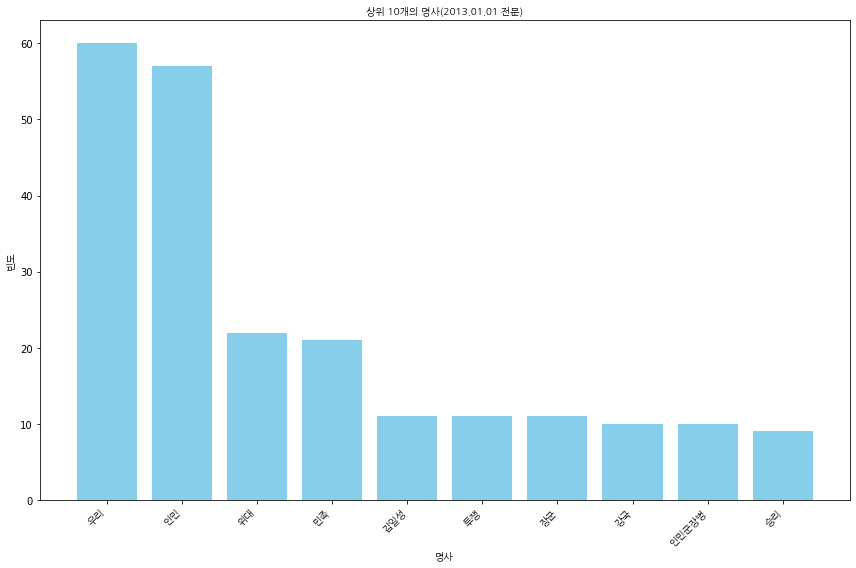

In [667]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_13be).most_common(10)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 10개의 명사(2013.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 20개 단어(전문)

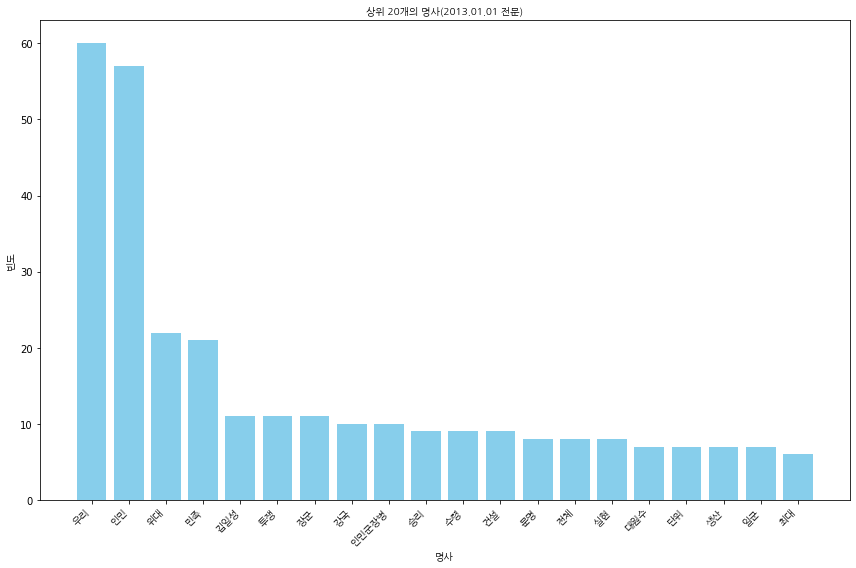

In [668]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_13be).most_common(20)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 20개의 명사(2013.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 30개 단어(전문)

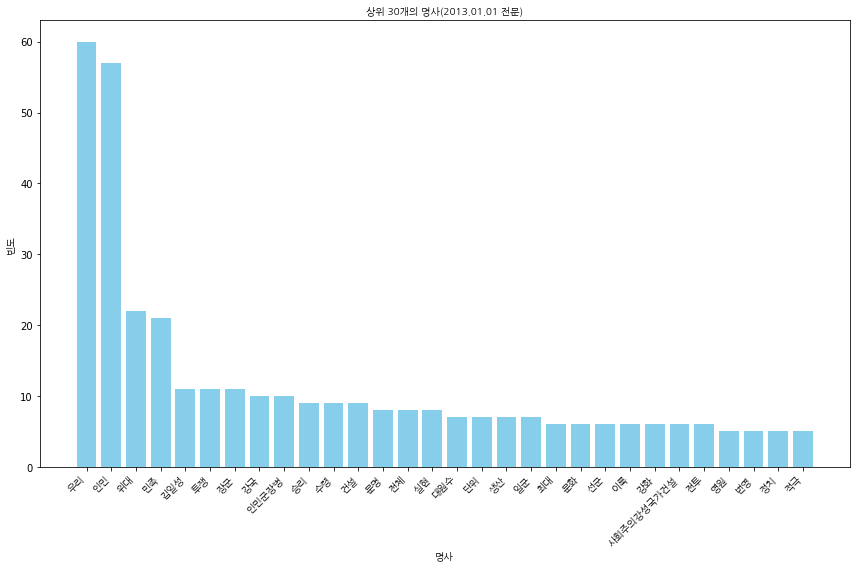

In [669]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_13be).most_common(30)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 30개의 명사(2013.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

# Sheet13 2012.01.01 

In [620]:
df_12be = read_data(12,3)

In [621]:
df_12be

전문  \
0  위대한 김정일동지의 유훈을 받들어    2012년을 강성부흥의 전성기가 펼쳐 \n지...   

                                               제목-서론  \
0  위대한 김정일동지의 유훈을 받들어   2012년을 강성부흥의 전성기가 펼쳐지는 자랑...   

                                             정치-김씨일가  \
0  오늘 우리 군대와 인민은 피눈물 속에 ２０１１년을 보내고 새해 주체１０１(２０１２)...   

                                                  경제  \
0  우리 당의 웅대한 강성부흥전략을 관철하기 위한 총돌격전을 힘차게 벌려나가야 한다.\...   

                                                과학기술  \
0  과학연구기관들에서는 정보기술, 나노기술, 생물공학과 같은 핵심기초기술과 중요부문 기...   

                                                교육문화  \
0  우리 조국을 발전된 사회주의문명국으로 빛내여나가야 한다. \n사회생활의 모든 분야에...   

                                                  사회  \
0  평양시의 면모를 일신하는 것은 어버이수령님 탄생 １００돐을 성대히 맞이하기 위한 중...   

                                                  국방  \
0  선군의 기치높이 나라의 국방력을 백방으로 다져나가야 한다.\n\n\n인민군대는 선군...   

                                                정치-당  \
0  위대한 김정일동지의 유훈을 받들고 강성부흥의 새시대를 펼쳐나가기 위한 결정적 담보는...   

                                                  외교  \
0  민족의 영원한 태양이신 위대한 수령 김일성동지와 경애하는 김정일동지의 조국통일유훈을...   

                                                  결론  
0  \n크나큰 상실의 아픔을 이겨내고 새로운 주체 １００년대에 들어선 우리 군대와 인민...

## 📌전문

### 데이터 불러오기

In [622]:
all = df_12be['전문'][0]

In [623]:
all

'위대한 김정일동지의 유훈을 받들어    2012년을 강성부흥의 전성기가 펼쳐 \n지는 자랑찬 승리의 해로 빛내이자\n노동신문 조선인민군 청년전위 공동사설 발표\n오늘 우리 군대와 인민은 피눈물 속에 ２０１１년을 보내고 새해 주체１０１(２０１２)년을 맞이한다.\n\n\n해마다 위대한 김정일동지께 축원의 인사를 드리고 새해의 진군길에 오르는 것은 우리 인민의 오랜 전통이였다. 위대한 김정일동지의 존함과 태양의 모습은 우리 인민에게 필승의 신심과 의지를 안겨주는 승리의 기치였고 정신력의 원천이였다. 지금 우리의 천만군민은 크나큰 슬픔을 천백배의 힘과 용기로 바꾸어 경애하는 김정은동지의 령도따라 새로운 주체１００년대의 강성부흥을 위한 장엄한 진군길에 들어서고 있다.\n\n\n지난해에 우리가 천만뜻밖에도 위대한 김정일동지와 영결하게 된 것은 ５천년 민족사에서 최대의 손실이였고 우리 당과 인민의 가장 큰 슬픔이였다.\n\n\n위대한 김정일동지는 심오한 사상리론과 비범한 령도로 주체혁명위업을 백전백승의 한길로 이끌어 오신 걸출한 사상리론가, 희세의 정치원로, 불세출의 선군령장이시며 조국과 인민에 대한 숭고한 헌신으로 혁명적 생애를 수놓아 오신 절세의 애국자, 인민의 자애로운 어버이이시였다. 위대한 김정일동지께서 이끄심으로써 어버이수령님께서 창시하신 불멸의 주체사상, 선군사상이 자주시대의 지도사상으로 빛을 뿌리게되고 백두의 혁명전통이 견결히 옹호 고수되였으며 우리 당과 군대의 위력,나라의 국력이 최상의 경지에 오르고 반만년 력사에 일찌기 없었던 민족번영의 대전성기가 펼쳐졌다.\n\n\n우리 혁명이 가장 어려운 시련을 겪던 시기에 어버이수령님의 고귀한 유산인 사회주의전취물을 굳건히 수호하시고 민족만대의 번영을 위한 강력한 정치군사적, 경제적 토대를 마련하여주신 것은 위대한 김정일동지께서 주체혁명위업에 이룩하신 최대의 공적으로 빛나고 있다.\n\n\n오늘 우리 군대와 인민은 얼마나 위대한 령도자를 민족의 태양으로, 어버이로 모시고 혁명하여왔는가를 심장으로 절감하고 있으며 김정

### 특수기호 일차적으로 제거

In [624]:
import re
all = re.sub(r'[()《》!]', ' ', all) #특수기호 제거, 정규 표현식  

### '\n\n'를 기준으로 문장 나누기

In [625]:
all = all.split('\n\n')

### 특수기호 이차적으로 ('1. ','2. ','3. ', '4. ' ,'\n' 등) 삭제

In [626]:
for idx,sent in enumerate(all):
    if ('1. ' in sent) or ('2. ' in sent) or ('3. ' in sent) or ('4. ' in sent) or ('5. 'in sent) or ('6. 'in sent):
        all[idx] = sent[3:]

In [627]:
all_12be = []
for text in all:
    all_12be.append(re.sub(r'[\n]', ' ', text))

In [628]:
all_12be

['위대한 김정일동지의 유훈을 받들어    2012년을 강성부흥의 전성기가 펼쳐  지는 자랑찬 승리의 해로 빛내이자 노동신문 조선인민군 청년전위 공동사설 발표 오늘 우리 군대와 인민은 피눈물 속에 ２０１１년을 보내고 새해 주체１０１ ２０１２ 년을 맞이한다.',
 ' 해마다 위대한 김정일동지께 축원의 인사를 드리고 새해의 진군길에 오르는 것은 우리 인민의 오랜 전통이였다. 위대한 김정일동지의 존함과 태양의 모습은 우리 인민에게 필승의 신심과 의지를 안겨주는 승리의 기치였고 정신력의 원천이였다. 지금 우리의 천만군민은 크나큰 슬픔을 천백배의 힘과 용기로 바꾸어 경애하는 김정은동지의 령도따라 새로운 주체１００년대의 강성부흥을 위한 장엄한 진군길에 들어서고 있다.',
 ' 지난해에 우리가 천만뜻밖에도 위대한 김정일동지와 영결하게 된 것은 ５천년 민족사에서 최대의 손실이였고 우리 당과 인민의 가장 큰 슬픔이였다.',
 ' 위대한 김정일동지는 심오한 사상리론과 비범한 령도로 주체혁명위업을 백전백승의 한길로 이끌어 오신 걸출한 사상리론가, 희세의 정치원로, 불세출의 선군령장이시며 조국과 인민에 대한 숭고한 헌신으로 혁명적 생애를 수놓아 오신 절세의 애국자, 인민의 자애로운 어버이이시였다. 위대한 김정일동지께서 이끄심으로써 어버이수령님께서 창시하신 불멸의 주체사상, 선군사상이 자주시대의 지도사상으로 빛을 뿌리게되고 백두의 혁명전통이 견결히 옹호 고수되였으며 우리 당과 군대의 위력,나라의 국력이 최상의 경지에 오르고 반만년 력사에 일찌기 없었던 민족번영의 대전성기가 펼쳐졌다.',
 ' 우리 혁명이 가장 어려운 시련을 겪던 시기에 어버이수령님의 고귀한 유산인 사회주의전취물을 굳건히 수호하시고 민족만대의 번영을 위한 강력한 정치군사적, 경제적 토대를 마련하여주신 것은 위대한 김정일동지께서 주체혁명위업에 이룩하신 최대의 공적으로 빛나고 있다.',
 ' 오늘 우리 군대와 인민은 얼마나 위대한 령도자를 민족의 태양으로, 어버이로 모시고 혁명하여왔는가를 심장으로 절감하고 있으며 김정일동

### 이름 추출
'김정일','김일성','김정은' 이름이 언급되었지만, 잘 추출되는 이름들이므로 따로 추출하지 않겠다.

### 권력구조와 정치형태 관련 단어 사용자 정의 사전을 사용하여 명사 추출

In [629]:
user_defined_extracted_nouns,texts_without_user_nouns  = [],[]
for text in all_12be:
    extracted_nouns, remaining_text = extract_user_defined_nouns(text,user_defined_nouns)
    user_defined_extracted_nouns.append(extracted_nouns)
    texts_without_user_nouns.append(remaining_text)

In [630]:
user_defined_extracted_nouns

[[('조선인민군', 1),
  ('전성기', 1),
  ('김정일', 1),
  ('인민', 1),
  ('동지', 1),
  ('군대', 1),
  ('우리', 1)],
 [('김정일', 2),
  ('김정은', 1),
  ('령도', 1),
  ('인민', 2),
  ('인사', 1),
  ('동지', 3),
  ('우리', 3)],
 [('우리 당', 1), ('김정일', 1), ('인민', 1), ('동지', 1), ('우리', 1)],
 [('어버이수령', 1),
  ('우리 당', 1),
  ('전성기', 1),
  ('김정일', 2),
  ('어버이', 1),
  ('령도', 1),
  ('조국', 1),
  ('인민', 2),
  ('혁명', 3),
  ('군사', 1),
  ('동지', 2),
  ('력사', 1),
  ('군대', 1),
  ('나라', 1)],
 [('어버이수령', 1),
  ('사회주의', 1),
  ('김정일', 1),
  ('경제적', 1),
  ('혁명', 2),
  ('군사', 1),
  ('동지', 1),
  ('우리', 1)],
 [('김정일', 1),
  ('어버이', 1),
  ('령도', 1),
  ('인민', 1),
  ('혁명', 1),
  ('동지', 1),
  ('군대', 1),
  ('우리', 1)],
 [('강성국가', 1), ('김정일', 1), ('령도', 1), ('동지', 1), ('건설', 1)],
 [('강성대국건설', 1),
  ('김정일', 1),
  ('김일성', 1),
  ('령도', 1),
  ('인민', 1),
  ('혁명', 1),
  ('동지', 2),
  ('력사', 1),
  ('군대', 1),
  ('수령', 1),
  ('나라', 1),
  ('장군', 2)],
 [('경제강국', 1), ('인민', 1)],
 [('우리 당', 1),
  ('강성국가', 1),
  ('현대화', 1),
  ('인민', 1),
  ('혁명', 1),
  ('경제', 2),
  ('

#### 동의어 처리

In [631]:
word_frequencies_user_defined_nouns=merge_synonyms_with_frequencies(user_defined_extracted_nouns,synonym_dict)

#### 빈도수 구하기

In [632]:
word_frequencies_user = Counter(word_frequencies_user_defined_nouns)

In [633]:
texts_without_user_nouns

['위대한   의 유훈을 받들어    2012년을 강성부흥의  가 펼쳐  지는 자랑찬 승리의 해로 빛내이자 노동신문   청년전위 공동사설 발표 오늘    와  은 피눈물 속에 ２０１１년을 보내고 새해 주체１０１ ２０１２ 년을 맞이한다.',
 ' 해마다 위대한   께 축원의  를 드리고 새해의 진군길에 오르는 것은    의 오랜 전통이였다. 위대한   의 존함과 태양의 모습은    에게 필승의 신심과 의지를 안겨주는 승리의 기치였고 정신력의 원천이였다. 지금  의 천만군민은 크나큰 슬픔을 천백배의 힘과 용기로 바꾸어 경애하는   의  따라 새로운 주체１００년대의 강성부흥을 위한 장엄한 진군길에 들어서고 있다.',
 ' 지난해에  가 천만뜻밖에도 위대한   와 영결하게 된 것은 ５천년 민족사에서 최대의 손실이였고  과  의 가장 큰 슬픔이였다.',
 ' 위대한   는 심오한 사상리론과 비범한  로 주체 위업을 백전백승의 한길로 이끌어 오신 걸출한 사상리론가, 희세의 정치원로, 불세출의 선군령장이시며  과  에 대한 숭고한 헌신으로  적 생애를 수놓아 오신 절세의 애국자,  의 자애로운  이시였다. 위대한   께서 이끄심으로써  님께서 창시하신 불멸의 주체사상, 선 상이 자주시대의 지도사상으로 빛을 뿌리게되고 백두의  전통이 견결히 옹호 고수되였으며  과  의 위력, 의 국력이 최상의 경지에 오르고 반만년  에 일찌기 없었던 민족번영의 대 가 펼쳐졌다.',
 '    이 가장 어려운 시련을 겪던 시기에  님의 고귀한 유산인  전취물을 굳건히 수호하시고 민족만대의 번영을 위한 강력한 정치 적,   토대를 마련하여주신 것은 위대한   께서 주체 위업에 이룩하신 최대의 공적으로 빛나고 있다.',
 ' 오늘    와  은 얼마나 위대한  자를 민족의 태양으로,  로 모시고  하여왔는가를 심장으로 절감하고 있으며   의 념원과 위업을 끝까지 실현해나갈 불타는 결의에 넘쳐있다.',
 ' 지난해는 위대한   의 정력적인  로   에서 대혁신, 대비약이 일어난 승리의 해였다.',

### 불용어 제거

In [634]:
texts_without_stopwords=[]
for text in texts_without_user_nouns:
    remaining_text = remove_stopwords(text,stopwords)
    texts_without_stopwords.append(remaining_text)

In [635]:
texts_without_stopwords

['위대      유훈        을 강성부흥     펼쳐  지는 자랑찬 승리  해  빛내   노동신문   청년전위 공동사설 발표       와  은 피눈물      을 보내고       ２０１２    .',
 ' 해   위대    께 축원   를 드리고     진군길에 오르는         오랜 전통   . 위대      존함  태양  모습은       필승  신심  의지를 안겨주는 승리  기치   정신력  원천   .       천만군민은 크나큰 슬픔을 천백배  힘  용기     경애                      강성부흥   장엄  진군길  고   .',
 '            위대    와 영결            민족사   최대  손실            큰 슬픔   .',
 ' 위대    는 심오  사상리론  비범        위업을 백전백승        걸출  사상리론가, 희세  정치원로, 불세출  선군령장          숭고  헌신      생애      절세  애국자,    자애      . 위대             님   창시   불멸    사상, 선 상    시대  지도사상   빛을      백두   전통     옹호 고수         위력,   국력  최상  경지   반만   에    민족번영  대     .',
 '         어려운 시련   시기에  님  고귀  유산인  전취물을   히 수호   민족만대  번영   강력  정치 적,   토대를 마련        위대          위업     최대  공   빛나고   .',
 '       와  은    위대   자를 민족  태양  ,    모      왔는가를 심장   절감          념원  위업을    실현   불타는 결     .',
 '   는 위대      정력           대혁신, 대비약  일어난 승리  해  .',
 ' 위대        탄생   을 선 고조  승리  포성  울리는 크나큰 경사     성대  ,    의의깊게       경애 

#### '조선로동'이라는 단어는 단독으로 쓰인 단어가 아닌 '조선로동당 중앙위원회'와 같이 사용된 단어로 삭제한다.


In [636]:
sentences = []
for sentence in texts_without_stopwords:
    sentences.append(sentence.replace("조선로동", " "))
    

In [637]:
texts_without_stopwords = sentences

In [638]:
remaining_text = clean_text(texts_without_stopwords)

In [639]:
texts_without_stopwords = remaining_text

### soynlp 명사 추출기 ( 이미 명사로 분류된 단어들은 제외)

In [640]:
from soynlp.noun import LRNounExtractor_v2
noun_extractor = LRNounExtractor_v2(verbose=True, extract_compound=True)
noun_extractor.train(texts_without_stopwords)
soynlp_nouns = noun_extractor.extract()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 1078 from 81 sents. mem=0.201 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=1561, mem=0.201 Gb
[Noun Extractor] batch prediction was completed for 326 words
[Noun Extractor] checked compounds. discovered 2 compounds
[Noun Extractor] postprocessing detaching_features : 102 -> 102
[Noun Extractor] postprocessing ignore_features : 102 -> 99
[Noun Extractor] postprocessing ignore_NJ : 99 -> 99
[Noun Extractor] 99 nouns (2 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.201 Gb                    
[Noun Extractor] 22.10 % eojeols are covered


In [641]:
#soynlp로 추출된 명사를 (명사,빈도수)로 저장
extracted_soynlp_words = {word:score.frequency for word,score in soynlp_nouns.items() if len(word) >= 2}
extracted_soynlp_words

{'강성부흥구상': 2,
 '결사옹위': 2,
 '강성대국': 2,
 '문학예술': 2,
 '일심단결': 3,
 '만들어': 2,
 '정상화': 2,
 '평양시': 2,
 '돌파구': 2,
 '정신력': 4,
 '대비약': 2,
 '대진군': 6,
 '잠재력': 2,
 '진군길': 3,
 '승리': 17,
 '기치': 8,
 '세대': 2,
 '문화': 1,
 '의사': 2,
 '가져': 2,
 '훈련': 1,
 '방침': 2,
 '실현': 5,
 '구현': 5,
 '창조': 2,
 '강화': 8,
 '견지': 3,
 '보장': 3,
 '수행': 3,
 '헌신': 3,
 '군중': 2,
 '공격': 1,
 '고수': 2,
 '관철': 7,
 '개선': 2,
 '집중': 2,
 '배격': 2,
 '다그': 3,
 '세계': 7,
 '구호': 4,
 '토대': 4,
 '문제': 3,
 '의지': 3,
 '맹세': 2,
 '진리': 2,
 '사업': 12,
 '유훈': 9,
 '위업': 8,
 '불길': 9,
 '전환': 5,
 '립장': 3,
 '신념': 3,
 '존엄': 3,
 '전통': 4,
 '슬픔': 2,
 '위력': 2,
 '유산': 2,
 '념원': 3,
 '결실': 2,
 '확신': 1,
 '민심': 1,
 '충정': 2,
 '기상': 1,
 '기질': 2,
 '화력': 1,
 '조건': 3,
 '체육': 2,
 '혁신': 2,
 '기풍': 2,
 '단합': 2,
 '책동': 2,
 '전군': 4,
 '단계': 3,
 '사회': 1,
 '지향': 2,
 '현실': 2,
 '위업수행': 1.0,
 '창조기풍': 1.0}

In [642]:
extracted_soynlp_words

{'강성부흥구상': 2,
 '결사옹위': 2,
 '강성대국': 2,
 '문학예술': 2,
 '일심단결': 3,
 '만들어': 2,
 '정상화': 2,
 '평양시': 2,
 '돌파구': 2,
 '정신력': 4,
 '대비약': 2,
 '대진군': 6,
 '잠재력': 2,
 '진군길': 3,
 '승리': 17,
 '기치': 8,
 '세대': 2,
 '문화': 1,
 '의사': 2,
 '가져': 2,
 '훈련': 1,
 '방침': 2,
 '실현': 5,
 '구현': 5,
 '창조': 2,
 '강화': 8,
 '견지': 3,
 '보장': 3,
 '수행': 3,
 '헌신': 3,
 '군중': 2,
 '공격': 1,
 '고수': 2,
 '관철': 7,
 '개선': 2,
 '집중': 2,
 '배격': 2,
 '다그': 3,
 '세계': 7,
 '구호': 4,
 '토대': 4,
 '문제': 3,
 '의지': 3,
 '맹세': 2,
 '진리': 2,
 '사업': 12,
 '유훈': 9,
 '위업': 8,
 '불길': 9,
 '전환': 5,
 '립장': 3,
 '신념': 3,
 '존엄': 3,
 '전통': 4,
 '슬픔': 2,
 '위력': 2,
 '유산': 2,
 '념원': 3,
 '결실': 2,
 '확신': 1,
 '민심': 1,
 '충정': 2,
 '기상': 1,
 '기질': 2,
 '화력': 1,
 '조건': 3,
 '체육': 2,
 '혁신': 2,
 '기풍': 2,
 '단합': 2,
 '책동': 2,
 '전군': 4,
 '단계': 3,
 '사회': 1,
 '지향': 2,
 '현실': 2,
 '위업수행': 1.0,
 '창조기풍': 1.0}

In [643]:
word_frequencies_soynlp=Counter(extracted_soynlp_words)

#### soynlp로 추출한 명사 데이터셋에서 삭제

In [644]:
#texts_without_stopwords에 삭제할 단어 저장
remove_word_soynlp = [ word for word in soynlp_nouns if len(word) >= 2]

In [645]:
#soynlp로 추출된 명사들을 texts_without_stopwords에서 삭제한다.
texts_without_soynlp=[]
for text in texts_without_stopwords:
    remaining_text = remove_stopwords(text,remove_word_soynlp)
    texts_without_soynlp.append(remaining_text)

In [646]:
texts_without_soynlp

['위대    강성부흥 펼쳐 지는 자랑찬    빛내 노동신문 청년전위 공동사설 발표 피눈물 보내고 ２０１２ ',
 '위대 축원 드리고   에 오르는 오랜    위대 존함 태양 모습은 필승 신심   를 안겨주는          원천 천만군민은 크나큰   을 천백배 용기 경애 강성부흥 장엄    ',
 '위대 영결 민족사 최대 손실    ',
 '위대 심오 사상리론 비범   을 백전백승 걸출 사상리론가, 희세 정치원로, 불세출 선군령장 숭고    생애 절세 애국자, 자애 위대 창시 불멸 사상, 시대 지도사상 빛을 백두    옹호      , 국력 최상 경지 반만 민족번영 ',
 '어려운 시련 시기에 고귀   인 전취물을 수호 민족만대 번영 강력 정치 적,   를 마련 위대    최대 빛나고 ',
 '위대 자를 민족 태양 왔는가를 심장 절감      을    불타는 ',
 '위대 정력 대  ,    일어난    ',
 '위대 탄생 고조    포성 울리는 크나큰 경사 성대 의의깊게 경애 숭고 위대 자랑찬   를 초인간 정력 진군을 진두 생애 마지막순간 주요전구 최전연초소들, 현지지도 경애 위대   와 변혁 결속 ',
 '생활   이룩 강력    마련 ',
 '위대 불면불휴 로고 세기 산업 봉화 지식 형강국 희천발전소를 대축전에 드리는 기념비적  물 도처      인 함남    생활향상 대고조진군 수많은 경공업공장 개건 완비 세기 표본 축산, 양어, 대규모과일생산기지 강성부흥 전략 위대      자 긍지를 대문을 여는    계선   성 ',
 '면모    체모 일신 위대 웅대 구상   를    도시 웅장화려 꾸리    본격 진행 룡림 대흥, 회령을 이르는 선경마을 생겨났다. 선군시대   을 대표 연극 추억하리 기념비 무대예술작품      예술 개화기 ',
 '위대 대풍모 숭고 발휘 ',
 '긴장 복잡하였 발걸음에 전진 보폭을 맞추어나   은 순결 변함 없었다. ',
 '위대 추모 애도기간은 맺어진 혈연 뉴대는 영원히 변함 억센 보여주었다. 천만군민 크나큰 비분을 흘리는

In [647]:
remaining_text = clean_text(texts_without_soynlp)

In [648]:
remaining_text

['위대 강성부흥 펼쳐 지는 자랑찬 빛내 노동신문 청년전위 공동사설 발표 피눈물 보내고 ２０１２ ',
 '위대 축원 드리고 오르는 오랜 위대 존함 태양 모습은 필승 신심 안겨주는 원천 천만군민은 크나큰 천백배 용기 경애 강성부흥 장엄 ',
 '위대 영결 민족사 최대 손실 ',
 '위대 심오 사상리론 비범 백전백승 걸출 사상리론가, 희세 정치원로, 불세출 선군령장 숭고 생애 절세 애국자, 자애 위대 창시 불멸 사상, 시대 지도사상 빛을 백두 옹호 국력 최상 경지 반만 민족번영 ',
 '어려운 시련 시기에 고귀 전취물을 수호 민족만대 번영 강력 정치 적, 마련 위대 최대 빛나고 ',
 '위대 자를 민족 태양 왔는가를 심장 절감 불타는 ',
 '위대 정력 일어난 ',
 '위대 탄생 고조 포성 울리는 크나큰 경사 성대 의의깊게 경애 숭고 위대 자랑찬 초인간 정력 진군을 진두 생애 마지막순간 주요전구 최전연초소들, 현지지도 경애 위대 변혁 결속 ',
 '생활 이룩 강력 마련 ',
 '위대 불면불휴 로고 세기 산업 봉화 지식 형강국 희천발전소를 대축전에 드리는 기념비적 도처 함남 생활향상 대고조진군 수많은 경공업공장 개건 완비 세기 표본 축산, 양어, 대규모과일생산기지 강성부흥 전략 위대 긍지를 대문을 여는 계선 ',
 '면모 체모 일신 위대 웅대 구상 도시 웅장화려 꾸리 본격 진행 룡림 대흥, 회령을 이르는 선경마을 생겨났다. 선군시대 대표 연극 추억하리 기념비 무대예술작품 예술 개화기 ',
 '위대 대풍모 숭고 발휘 ',
 '긴장 복잡하였 발걸음에 전진 보폭을 맞추어나 순결 변함 없었다. ',
 '위대 추모 애도기간은 맺어진 혈연 뉴대는 영원히 변함 억센 보여주었다. 천만군민 크나큰 비분을 흘리는 눈물은 가식도 모르는 순결무구 단결 눈물 세상 당을 따르려는 불타는 눈물 숭고 도덕 의리심을 사상정신 풍모는 전률케 경탄 ',
 '위대 발전 불패 계승자 현명 자를 충직 받드는 훌륭 확정 것, 들어선 지니게 ',
 '２０１２ 년은 위대 맺게 조선 시작 장엄 ',
 '진군은 

In [649]:
texts_without_soynlp = remaining_text

### 북한 용어사전을 활용하여 명사 추출

In [650]:
site_defined_extracted_nouns,texts_without_extracted_nouns = [],[]
for text in texts_without_soynlp:
    extracted_nouns, remaining_text = extract_site_defined_nouns(text,dict_site)
    site_defined_extracted_nouns.append(extracted_nouns)
    texts_without_extracted_nouns.append(remaining_text)

In [651]:
# 리스트 평탄화
site_defined_extracted_nouns = [item for sublist in site_defined_extracted_nouns for item in sublist]

print(site_defined_extracted_nouns)

['청년전위', '노동', '피눈', '리고', '사상리론가', '사상리론', '지도사상', '령장', '사상', '세출', '최상', '마련', '시련', '전취', '전연초소', '성대', '인간', '전구', '마련', '과일', '로고', '세기', '세기', '지식', '천발', '무대', '화기', '걸음', '뉴대', '사상', '전률', '정신', '추모', '지니', '조선', '령장', '보검', '과시', '사상', '조선', '향도', '사상', '조선', '로력', '사상', '전사', '걸음', '천지', '관점', '정당', '걸음', '이시', '이시', '인간', '조선', '령전', '세기', '전국', '간내', '정신', '족자', '최상', '해제', '주공', '마련', '방공', '해결', '축산기지', '간지대', '농산', '벌방', '일군', '지대', '체계', '해결', '비날론', '가지', '공기', '도수', '부쩍', '선차', '일군', '체계', '탄밭', '로선', '세기', '지식', '련하', '련하', '전망', '정신', '생산실천', '구성', '보기', '생물', '초기', '최상', '열기', '정서', '지식', '사상', '거리', '경영', '대상', '록화', '만수', '지게', '지방', '최상', '련대', '운동', '니고', '총대', '사수', '자루', '령군', '령지', '앞장', '체계', '싸움군', '대우', '자비', '쇠소리', '규률', '대오', '립하', '부대', '자리', '쟁쟁', '피우기', '사상', '가도', '단숨', '전구', '마련', '담보', '두리', '정신', '정신', '사상', '일체', '주선', '체계', '과시', '대성', '로선', '요구', '리도', '선전', '세기', '올리', '정신', '일군', '조시', '립체전', '라배', '요구', '일군', '일군', '일군', '일군', '일군', '조시', 

In [652]:
word_frequencies_site = Counter(site_defined_extracted_nouns)

In [653]:
word_frequencies_site

Counter({'청년전위': 2,
         '노동': 1,
         '피눈': 1,
         '리고': 2,
         '사상리론가': 1,
         '사상리론': 1,
         '지도사상': 1,
         '령장': 2,
         '사상': 8,
         '세출': 1,
         '최상': 4,
         '마련': 5,
         '시련': 1,
         '전취': 1,
         '전연초소': 1,
         '성대': 1,
         '인간': 2,
         '전구': 2,
         '과일': 1,
         '로고': 1,
         '세기': 6,
         '지식': 3,
         '천발': 1,
         '무대': 1,
         '화기': 1,
         '걸음': 7,
         '뉴대': 1,
         '전률': 1,
         '정신': 6,
         '추모': 1,
         '지니': 1,
         '조선': 8,
         '보검': 1,
         '과시': 2,
         '향도': 2,
         '로력': 1,
         '전사': 1,
         '천지': 1,
         '관점': 2,
         '정당': 1,
         '이시': 2,
         '령전': 1,
         '전국': 1,
         '간내': 1,
         '족자': 1,
         '해제': 2,
         '주공': 1,
         '방공': 1,
         '해결': 3,
         '축산기지': 1,
         '간지대': 1,
         '농산': 1,
         '벌방': 1,
         '일군': 11,
         '지대'

In [654]:
remaining_text = clean_text(texts_without_extracted_nouns)

In [655]:
remaining_text

['위대 강성부흥 펼쳐 지는 자랑찬 빛내 신문 공동사설 발표 보내고 ２０１２ ',
 '위대 축원 오르는 오랜 위대 존함 태양 모습은 필승 신심 안겨주는 원천 천만군민은 크나큰 천백배 용기 경애 강성부흥 장엄 ',
 '위대 영결 민족사 최대 손실 ',
 '위대 심오 비범 백전백승 걸출 희세 정치원로, 선군 숭고 생애 절세 애국자, 자애 위대 창시 불멸 시대 빛을 백두 옹호 국력 경지 반만 민족번영 ',
 '어려운 시기에 고귀 물을 수호 민족만대 번영 강력 정치 적, 위대 최대 빛나고 ',
 '위대 자를 민족 태양 왔는가를 심장 절감 불타는 ',
 '위대 정력 일어난 ',
 '위대 탄생 고조 포성 울리는 크나큰 경사 의의깊게 경애 숭고 위대 자랑찬 정력 진군을 진두 생애 마지막순간 주요 들, 현지지도 경애 위대 변혁 결속 ',
 '생활 이룩 강력 ',
 '위대 불면불휴 산업 봉화 형강국 전소를 대축전에 드리는 기념비적 도처 함남 생활향상 대고조진군 수많은 경공업공장 개건 완비 표본 축산, 양어, 대규모 생산기지 강성부흥 전략 위대 긍지를 대문을 여는 계선 ',
 '면모 체모 일신 위대 웅대 구상 도시 웅장화려 꾸리 본격 진행 룡림 대흥, 회령을 이르는 선경마을 생겨났다. 선군시대 대표 연극 추억하리 기념비 예술작품 예술 ',
 '위대 대풍모 숭고 발휘 ',
 '긴장 복잡하였 전진 보폭을 맞추어나 순결 변함 없었다. ',
 '위대 애도기간은 맺어진 혈연 영원히 변함 억센 보여주었다. 천만군민 크나큰 비분을 흘리는 눈물은 가식도 모르는 순결무구 단결 눈물 세상 당을 따르려는 불타는 눈물 숭고 도덕 의리심을 풍모는 경탄 ',
 '위대 발전 불패 계승자 현명 자를 충직 받드는 훌륭 확정 것, 들어선 ',
 '２０１２ 년은 위대 맺게 시작 장엄 ',
 '진군은 백두 시작 적진군 위대 시작 백승떨쳐온 영원 확고부동 희망 표대는 위인 위대 필승 백두 담대 배짱 방식 위대 개척 선군 걸어나감 선군 흐르게 ',
 '탄생 전진 국력 중대 계기 혈통을 확고부동 계승성을 적대축전 위대

In [656]:
texts_without_extracted_nouns = remaining_text

### Mecab 명사 추출기(이미 명사로 분류된 단어들은 제외)

In [657]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab_nouns = []
for text in texts_without_extracted_nouns:
    mecab_nouns += mecab.nouns(text)

In [658]:
mecab_nouns

['부흥',
 '자랑',
 '찬',
 '신문',
 '공동',
 '사설',
 '발표',
 '위대',
 '축원',
 '위대',
 '존함',
 '태양',
 '모습',
 '필승',
 '신심',
 '원천',
 '천만',
 '군민',
 '천',
 '백',
 '배',
 '용기',
 '경애',
 '강성',
 '부흥',
 '장엄',
 '위대',
 '영결',
 '민족사',
 '최대',
 '손실',
 '백전백승',
 '걸출',
 '희세',
 '정치',
 '원로',
 '선군',
 '숭고',
 '생애',
 '절세',
 '애국자',
 '자애',
 '위대',
 '창시',
 '불멸',
 '시대',
 '빛',
 '백두',
 '옹호',
 '국력',
 '경지',
 '반',
 '민족',
 '번영',
 '시기',
 '고귀',
 '물',
 '수호',
 '민족',
 '번영',
 '강력',
 '정치',
 '위대',
 '최대',
 '위대',
 '민족',
 '태양',
 '심장',
 '절감',
 '불타',
 '위대',
 '정력',
 '위대',
 '탄생',
 '고조',
 '포성',
 '경사',
 '의의',
 '경애',
 '숭고',
 '위대',
 '정력',
 '진군',
 '진두',
 '생애',
 '마지막',
 '순간',
 '주요',
 '현지',
 '지도',
 '경애',
 '위대',
 '변혁',
 '결속',
 '생활',
 '위대',
 '불면불휴',
 '산업',
 '봉화',
 '강국',
 '전소',
 '대축전',
 '기념비',
 '도처',
 '함남',
 '생활',
 '향상',
 '군',
 '경공업',
 '공장',
 '개건',
 '완비',
 '표본',
 '축산',
 '양어',
 '규모',
 '생산',
 '기지',
 '강성',
 '부흥',
 '전략',
 '위대',
 '긍지',
 '대문',
 '계선',
 '면모',
 '체모',
 '일신',
 '구상',
 '도시',
 '웅장',
 '화려',
 '꾸리',
 '본격',
 '진행',
 '룡',
 '림',
 '대흥',
 '회령',
 '선',
 '경마',
 '선군',
 '시대',


In [659]:
mecab_nouns_clean = []
for char in mecab_nouns:
    if len(char)>1:
        mecab_nouns_clean.append(char)

In [660]:
mecab_nouns = [map_to_synonym(noun, synonym_dict) for noun in mecab_nouns_clean] #동의어 처리

In [661]:
texts_without_mecab=[]
for text in texts_without_extracted_nouns:
    remaining_text = remove_stopwords(text,mecab_nouns)
    texts_without_mecab.append(remaining_text)
texts_without_mecab

['        펼쳐 지는   찬 빛내            보내고 ２０１２ ',
 '      오르는 오랜            은       안겨주는        은 크나큰 천백배               ',
 '               ',
 '   심오 비범              ,               자,                빛을             반만      ',
 '어려운   에    물을      만대          적,       빛나고 ',
 '   자를       왔는가를         는 ',
 '      일어난 ',
 '            울리는 크나큰      깊게            찬      을               들,                  ',
 '   이룩    ',
 '            형     를   에 드리는   적            대     수많은                 , 양어, 대                     를   을 여는    ',
 '            웅대                     룡림   ,   을 이르는 선  을 생겨났다.                            ',
 '   대         ',
 '   복잡하였      을 맞추어나    변함 없었다. ',
 '   애도  은 맺어진      히 변함 억센 보여주었다.      크나큰   을 흘리는   은   도 모르는   무구          당을 따르려는   는            심을   는    ',
 '               자를    받드는 훌륭    것, 들어선 ',
 '２０１２ 년은    맺게       ',
 '  은       적           떨쳐온            는                               걸어나감    흐르게 ',
 '                 을      을 적      대         총   빛내

In [662]:
#단어 빈도수 계산
from collections import Counter
word_frequencies_mecab = Counter(mecab_nouns)
word_frequencies_mecab

Counter({'부흥': 6,
         '자랑': 2,
         '신문': 1,
         '공동': 2,
         '사설': 1,
         '발표': 1,
         '위대': 43,
         '축원': 1,
         '존함': 1,
         '태양': 3,
         '모습': 2,
         '필승': 4,
         '신심': 3,
         '원천': 2,
         '천만': 8,
         '군민': 4,
         '용기': 1,
         '경애': 10,
         '강성': 4,
         '장엄': 3,
         '영결': 1,
         '민족사': 2,
         '최대': 8,
         '손실': 1,
         '백전백승': 1,
         '걸출': 1,
         '희세': 2,
         '정치': 6,
         '원로': 1,
         '선군': 15,
         '숭고': 6,
         '생애': 2,
         '절세': 2,
         '애국': 6,
         '자애': 1,
         '창시': 1,
         '불멸': 3,
         '시대': 7,
         '백두': 4,
         '옹호': 2,
         '국력': 3,
         '경지': 1,
         '민족': 17,
         '번영': 4,
         '시기': 3,
         '고귀': 1,
         '수호': 1,
         '강력': 1,
         '심장': 1,
         '절감': 1,
         '불타': 3,
         '정력': 3,
         '탄생': 6,
         '고조': 2,
         '포성': 1,
   

### 모두 합하기

In [663]:
word_frequencies_all_12be = word_frequencies_mecab+word_frequencies_soynlp+word_frequencies_site+word_frequencies_user

In [664]:
combined_all_12be = merge_frequencies_with_synonyms(word_frequencies_all_12be, synonym_dict)
combined_all_12be

{'농업': 8,
 '혁명': 88,
 '사회주의': 22,
 '조선민주주의인민공화국': 48,
 '대한민국': 12,
 '김정은': 32,
 '북남': 14,
 '미국': 6,
 '우리': 80,
 '당중앙위원회': 2,
 '경제': 14,
 '핵': 2,
 '통일': 54,
 '국방': 56,
 '과학': 12,
 '력사': 16,
 '제국주의': 5,
 '러시아': 2,
 '김정일': 90,
 '친선': 2,
 '애국': 12,
 '동지': 108,
 '영도': 42,
 '강국': 13,
 '정치사상': 6,
 '문명': 2,
 '에네르기': 2,
 '수산업': 3,
 '일꾼': 2,
 '부흥': 6,
 '자랑': 2,
 '신문': 1,
 '공동': 2,
 '사설': 1,
 '발표': 1,
 '위대': 43,
 '축원': 1,
 '존함': 1,
 '태양': 3,
 '모습': 2,
 '필승': 4,
 '신심': 3,
 '원천': 2,
 '천만': 8,
 '군민': 4,
 '용기': 1,
 '경애': 10,
 '강성': 4,
 '장엄': 3,
 '영결': 1,
 '민족사': 2,
 '최대': 8,
 '손실': 1,
 '백전백승': 1,
 '걸출': 1,
 '희세': 2,
 '정치': 6,
 '원로': 1,
 '선군': 15,
 '숭고': 6,
 '생애': 2,
 '절세': 2,
 '자애': 1,
 '창시': 1,
 '불멸': 3,
 '시대': 7,
 '백두': 4,
 '옹호': 2,
 '국력': 3,
 '경지': 1,
 '민족': 17,
 '번영': 4,
 '시기': 3,
 '고귀': 1,
 '수호': 1,
 '강력': 1,
 '심장': 1,
 '절감': 1,
 '불타': 3,
 '정력': 3,
 '탄생': 6,
 '고조': 2,
 '포성': 1,
 '경사': 1,
 '의의': 1,
 '진군': 3,
 '진두': 3,
 '마지막': 1,
 '순간': 1,
 '주요': 2,
 '현지': 1,
 '지도': 1,
 '변혁': 1,
 '결속': 1,
 '생활': 1

In [665]:
doc_word_freq['12be'] = combined_all_12be
update_excel_with_new_doc(doc_word_freq, file_path)

Excel 파일이 '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'로 업데이트되었습니다.


### 단어 빈도 시각화

#### 상위 10개 단어(전문)

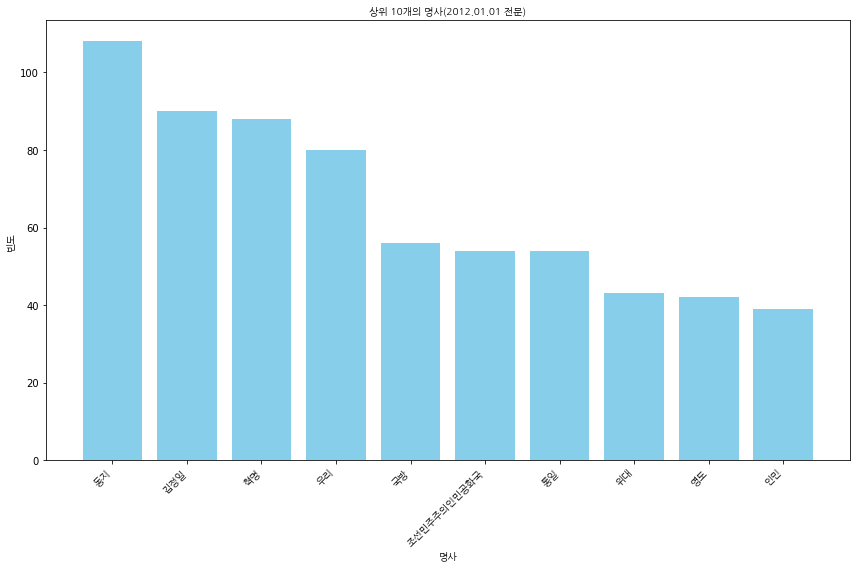

In [717]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_12be).most_common(10)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 10개의 명사(2012.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 20개 단어(전문)

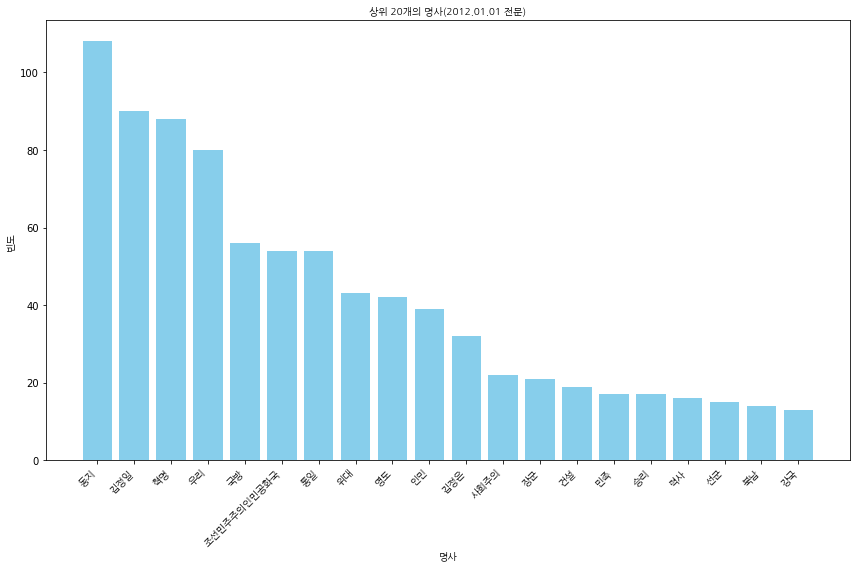

In [718]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_12be).most_common(20)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 20개의 명사(2012.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

#### 상위 30개 단어(전문)

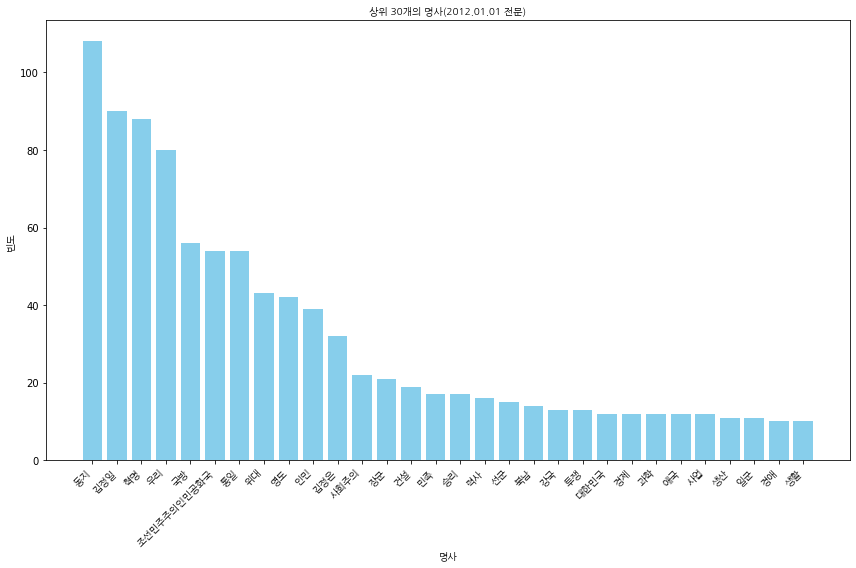

In [719]:
#단어 빈도를 내림차순으로 정렬
sorted_word_frequencies = Counter(combined_all_12be).most_common(30)

# 상위 10개의 단어 추출
words, frequencies = zip(*sorted_word_frequencies)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 한글 폰트 설정
font_path = '/Users/kimsuyeon/Desktop/nanum-gothic/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로 (이 경로는 본인의 시스템에 맞춰 변경 필요)
fontprop = fm.FontProperties(fname=font_path)
# 시각화: 바 차트
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title("상위 30개의 명사(2012.01.01 전문)", fontproperties=fontprop)
plt.ylabel("빈도", fontproperties=fontprop)
plt.xlabel("명사", fontproperties=fontprop)

# x축 단어 회전 (길이가 길 경우)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)  # 폰트 적용

# 그래프 출력
plt.tight_layout()
plt.show()

# Topic Modeling 

In [666]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [667]:
#각 문서에 대해 단어 리스트 추출 (빈도수에 따라 반복된 단어 리스트로 변환)
documents = [[word for word, freq in doc.items() for _ in range(int(freq))] for doc in doc_word_freq.values()]

In [668]:
#Gensim의 Dictionary 및 Corpus 형식으로 변환
dictionary = corpora.Dictionary(documents)

2024-10-03 12:14:59,010 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-10-03 12:14:59,035 : INFO : built Dictionary<3477 unique tokens: ['4년', '9.19북남군사분야합의', '가공', '가금', '가도']...> from 13 documents (total 27354 corpus positions)
2024-10-03 12:14:59,036 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<3477 unique tokens: ['4년', '9.19북남군사분야합의', '가공', '가금', '가도']...> from 13 documents (total 27354 corpus positions)", 'datetime': '2024-10-03T12:14:59.036456', 'gensim': '4.3.3', 'python': '3.10.2 (v3.10.2:a58ebcc701, Jan 13 2022, 14:50:16) [Clang 13.0.0 (clang-1300.0.29.30)]', 'platform': 'macOS-14.3-x86_64-i386-64bit', 'event': 'created'}


In [671]:
#Bag-of-Words 형식으로 변환
corpus = [dictionary.doc2bow(doc) for doc in documents]

In [670]:
dictionary.filter_extremes(no_below=2, no_above=0.8) #빈도가 2 이상인 단어와 전체의 80%로 이상 차지하는 단어 필터링

2024-10-03 12:15:02,559 : INFO : discarding 1909 tokens: [('4년', 1), ('9.19북남군사분야합의', 1), ('가금', 1), ('가득', 1), ('가속', 1), ('가지', 13), ('각일', 1), ('각지', 1), ('간과', 1), ('간충', 1)]...
2024-10-03 12:15:02,561 : INFO : keeping 1568 tokens which were in no less than 2 and no more than 10 (=80.0%) documents
2024-10-03 12:15:02,563 : INFO : resulting dictionary: Dictionary<1568 unique tokens: ['가공', '가도', '가동', '가방', '가운데']...>


In [672]:
#LDA 모델 적용 (토픽 수 설정)
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=7,
    random_state=42,
    passes=10,
    callbacks=[
        CoherenceMetric(texts=documents, corpus=corpus, dictionary=dictionary, coherence='c_v'),
        PerplexityMetric(corpus=corpus, logger='shell')]
    )

2024-10-03 12:15:13,982 : INFO : using symmetric alpha at 0.14285714285714285
2024-10-03 12:15:13,984 : INFO : using symmetric eta at 0.14285714285714285
2024-10-03 12:15:13,986 : INFO : using serial LDA version on this node
2024-10-03 12:15:13,992 : INFO : running online (multi-pass) LDA training, 7 topics, 10 passes over the supplied corpus of 13 documents, updating model once every 13 documents, evaluating perplexity every 13 documents, iterating 50x with a convergence threshold of 0.001000
2024-10-03 12:15:14,039 : INFO : -8.704 per-word bound, 417.1 perplexity estimate based on a held-out corpus of 13 documents with 11698 words
2024-10-03 12:15:14,040 : INFO : PROGRESS: pass 0, at document #13/13
2024-10-03 12:15:14,068 : INFO : topic #5 (0.143): 0.032*"당대표자회" + 0.010*"김정은" + 0.010*"김정일" + 0.009*"민족" + 0.008*"력사" + 0.008*"강국" + 0.007*"조선로동당" + 0.007*"농촌" + 0.004*"평화" + 0.004*"일군"
2024-10-03 12:15:14,069 : INFO : topic #3 (0.143): 0.037*"김정은" + 0.014*"농촌" + 0.010*"전원회의" + 0.009*"당대

In [ ]:
/Users/kimsuyeon/Desktop/Project2/result.xlsx

In [727]:
import pandas as pd
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric, PerplexityMetric
from gensim.models import CoherenceModel
import logging

# 로깅 설정
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

def perform_lda_and_save_to_excel(doc_word_freq_dict, num_topics=5, file_path='lda_keywords_coherence.xlsx'):
    """
    딕셔너리에서 문서-단어 빈도 데이터를 읽어 Gensim LDA 토픽 모델링을 수행하고
    문서별 토픽 분포와 응집도, 키워드를 Excel 파일로 저장하는 함수.
    
    Parameters:
    - doc_word_freq_dict: {문서 이름: {단어: 빈도수}} 형태의 딕셔너리
    - num_topics: 추출할 토픽의 수 (기본값: 5)
    - file_path: 저장할 엑셀 파일 경로
    
    Returns:
    - None
    """
    # 1. 각 문서에 대해 단어 리스트 추출 (빈도수에 따라 반복된 단어 리스트로 변환)
    documents = [[word for word, freq in doc.items() for _ in range(int(freq))] for doc in doc_word_freq_dict.values()]

    # 2. Gensim의 Dictionary 및 Corpus 형식으로 변환
    dictionary = corpora.Dictionary(documents)

    # Bag-of-Words 형식으로 변환
    corpus = [dictionary.doc2bow(doc) for doc in documents]

    # 3. LDA 모델 적용 (토픽 수 설정)
    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=10,
        callbacks=[
            CoherenceMetric(texts=documents, corpus=corpus, dictionary=dictionary, coherence='c_v'),
            PerplexityMetric(corpus=corpus, logger='shell')
        ]
    )

    # 4. 각 토픽에 해당하는 중요한 단어(키워드) 및 응집도 계산
    doc_coherences = []
    doc_keywords = []
    
    for i, doc_bow in enumerate(corpus):
        # 4.1 문서별 응집도 계산
        coherence_model = CoherenceModel(model=lda_model, texts=[documents[i]], dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        doc_coherences.append(coherence_score)

        # 4.2 문서별 주요 단어(키워드) 추출
        doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0)
        keywords = [dictionary[topic_id] for topic_id, _ in doc_topics]
        doc_keywords.append(", ".join(keywords))  # 키워드를 문자열로 결합

    # 5. 결과를 DataFrame으로 변환
    df = pd.DataFrame({
        'Document': list(doc_word_freq_dict.keys()),
        'Coherence Score': doc_coherences,
        'Keywords': doc_keywords
    })

    # 6. Excel 파일로 내보내기
    df.to_excel(file_path, index=False)
    
    print(f"키워드와 응집도가 포함된 결과가 '{file_path}'에 저장되었습니다.")



# 엑셀 파일로 결과 저장
perform_lda_and_save_to_excel(doc_word_freq, num_topics=7, file_path="/Users/kimsuyeon/Desktop/Project2/result.xlsx")


2024-09-27 12:37:53,206 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-09-27 12:37:53,257 : INFO : built Dictionary<3476 unique tokens: ['2년간', '30일', '4년', '9.19북남군사분야합의', '가공']...> from 13 documents (total 27035 corpus positions)
2024-09-27 12:37:53,261 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<3476 unique tokens: ['2년간', '30일', '4년', '9.19북남군사분야합의', '가공']...> from 13 documents (total 27035 corpus positions)", 'datetime': '2024-09-27T12:37:53.260234', 'gensim': '4.3.3', 'python': '3.10.2 (v3.10.2:a58ebcc701, Jan 13 2022, 14:50:16) [Clang 13.0.0 (clang-1300.0.29.30)]', 'platform': 'macOS-14.3-x86_64-i386-64bit', 'event': 'created'}
2024-09-27 12:37:53,296 : INFO : using symmetric alpha at 0.14285714285714285
2024-09-27 12:37:53,298 : INFO : using symmetric eta at 0.14285714285714285
2024-09-27 12:37:53,304 : INFO : using serial LDA version on this node
2024-09-27 12:37:53,316 : INFO : running online (multi-pass) LDA training, 7 topics, 10 passe

키워드와 응집도가 포함된 결과가 '/Users/kimsuyeon/Desktop/Project2/result.xlsx'에 저장되었습니다.


In [728]:
import pandas as pd
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric, PerplexityMetric
from gensim.models import CoherenceModel
import logging

# 로깅 설정
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [729]:
# 각 문서에 대해 단어 리스트 추출 (빈도수에 따라 반복된 단어 리스트로 변환)
documents = [[word for word, freq in doc.items() for _ in range(int(freq))] for doc in doc_word_freq.values()]


In [725]:
import pandas as pd
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric, PerplexityMetric
from gensim.models import CoherenceModel
import logging

# 로깅 설정
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

def perform_lda_from_dict(doc_word_freq_dict, num_topics=5):
    """
    딕셔너리에서 문서-단어 빈도 데이터를 읽어 Gensim LDA 토픽 모델링을 수행하고 문서별 토픽 분포와 응집도를 확인하는 함수.
    
    Parameters:
    - doc_word_freq_dict: {문서 이름: {단어: 빈도수}} 형태의 딕셔너리
    - num_topics: 추출할 토픽의 수 (기본값: 5)
    
    Returns:
    - lda_model: Gensim LDA 모델
    - doc_topic_dist: 각 문서별 토픽 분포 (리스트)
    - doc_coherences: 각 문서별 응집도 (리스트)
    """
    # 각 문서에 대해 단어 리스트 추출 (빈도수에 따라 반복된 단어 리스트로 변환)
    documents = [[word for word, freq in doc.items() for _ in range(int(freq))] for doc in doc_word_freq_dict.values()]

    # 2. Gensim의 Dictionary 및 Corpus 형식으로 변환
    dictionary = corpora.Dictionary(documents)

    # Bag-of-Words 형식으로 변환
    corpus = [dictionary.doc2bow(doc) for doc in documents]

    # 3. LDA 모델 적용 (토픽 수 설정)
    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=10,
        callbacks=[
            CoherenceMetric(texts=documents, corpus=corpus, dictionary=dictionary, coherence='c_v'),
            PerplexityMetric(corpus=corpus, logger='shell')
        ]
    )

    # 4. 각 토픽에 해당하는 중요한 단어 출력
    for idx, topic in lda_model.print_topics(num_words=10):
        print(f"토픽 {idx + 1}: {topic}")
    
    # 5. 문서별 토픽 분포 확인
    doc_topic_dist = []
    for i, doc_bow in enumerate(corpus):
        doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0)
        doc_topic_dist.append(doc_topics)
        print(f"\n문서 {i + 1}의 토픽 분포: {doc_topics}")

    # 6. 문서별 응집도 계산
    doc_coherences = []
    for i, doc_bow in enumerate(corpus):
        # 문서 내의 단어 리스트를 사용하여 응집도 계산
        coherence_model = CoherenceModel(model=lda_model, texts=[documents[i]], dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        doc_coherences.append(coherence_score)
        print(f"문서 {i + 1}의 응집도: {coherence_score}")

    return lda_model, doc_topic_dist, doc_coherences


lda_model, doc_topic_dist, doc_coherences = perform_lda_from_dict(doc_word_freq, num_topics=7)


2024-09-27 12:30:40,679 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-09-27 12:30:40,706 : INFO : built Dictionary<3476 unique tokens: ['2년간', '30일', '4년', '9.19북남군사분야합의', '가공']...> from 13 documents (total 27035 corpus positions)
2024-09-27 12:30:40,707 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<3476 unique tokens: ['2년간', '30일', '4년', '9.19북남군사분야합의', '가공']...> from 13 documents (total 27035 corpus positions)", 'datetime': '2024-09-27T12:30:40.707235', 'gensim': '4.3.3', 'python': '3.10.2 (v3.10.2:a58ebcc701, Jan 13 2022, 14:50:16) [Clang 13.0.0 (clang-1300.0.29.30)]', 'platform': 'macOS-14.3-x86_64-i386-64bit', 'event': 'created'}
2024-09-27 12:30:40,730 : INFO : using symmetric alpha at 0.14285714285714285
2024-09-27 12:30:40,735 : INFO : using symmetric eta at 0.14285714285714285
2024-09-27 12:30:40,743 : INFO : using serial LDA version on this node
2024-09-27 12:30:40,755 : INFO : running online (multi-pass) LDA training, 7 topics, 10 passe

2024-09-27 12:30:40,950 : INFO : topic #5 (0.143): 0.028*"조선민주주의인민공화국" + 0.027*"우리" + 0.023*"인민" + 0.020*"동지" + 0.015*"혁명" + 0.012*"경제" + 0.010*"사회주의" + 0.010*"국방" + 0.010*"투쟁" + 0.010*"과학"
2024-09-27 12:30:40,952 : INFO : topic #2 (0.143): 0.039*"동지" + 0.031*"우리" + 0.028*"조선민주주의인민공화국" + 0.019*"혁명" + 0.013*"국방" + 0.013*"과학" + 0.012*"경제" + 0.012*"사회주의" + 0.012*"인민" + 0.011*"통일"
2024-09-27 12:30:40,954 : INFO : topic #4 (0.143): 0.038*"조선민주주의인민공화국" + 0.024*"동지" + 0.022*"사회주의" + 0.021*"혁명" + 0.019*"김정은" + 0.017*"우리" + 0.017*"농업" + 0.015*"과학" + 0.014*"농촌" + 0.013*"인민"
2024-09-27 12:30:40,958 : INFO : topic diff=2.551267, rho=1.000000
2024-09-27 12:30:40,969 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
2024-09-27 12:30:42,574 : INFO : 1 batches submitted to accumulate stats from 64 documents (25618 virtual)
2024-09-27 12:30:46,301 : INFO : 7 accumulators retrieved from output queue
2024-09-27 12:30:46,317 : INFO 

토픽 1: 0.048*"조선민주주의인민공화국" + 0.029*"우리" + 0.026*"국방" + 0.024*"혁명" + 0.023*"인민" + 0.022*"사회주의" + 0.020*"통일" + 0.018*"경제" + 0.016*"과학" + 0.016*"북남"
토픽 2: 0.044*"조선민주주의인민공화국" + 0.038*"동지" + 0.025*"우리" + 0.020*"당대표자회" + 0.017*"당중앙위원회" + 0.016*"사회주의" + 0.016*"혁명" + 0.016*"김정은" + 0.014*"국방" + 0.013*"투쟁"
토픽 3: 0.062*"동지" + 0.031*"우리" + 0.026*"조선민주주의인민공화국" + 0.026*"혁명" + 0.024*"김정은" + 0.020*"김정일" + 0.018*"국방" + 0.014*"미국" + 0.014*"경제" + 0.013*"당중앙위원회"
토픽 4: 0.001*"조선민주주의인민공화국" + 0.001*"우리" + 0.001*"사회주의" + 0.001*"혁명" + 0.001*"경제" + 0.001*"동지" + 0.001*"국방" + 0.001*"과학" + 0.001*"인민" + 0.001*"통일"
토픽 5: 0.040*"조선민주주의인민공화국" + 0.035*"농업" + 0.033*"농촌" + 0.032*"사회주의" + 0.022*"동지" + 0.020*"혁명" + 0.017*"건설" + 0.015*"우리" + 0.014*"김정은" + 0.013*"과학"
토픽 6: 0.037*"우리" + 0.035*"인민" + 0.014*"위대" + 0.013*"민족" + 0.007*"투쟁" + 0.007*"장군" + 0.007*"김일성" + 0.006*"강국" + 0.006*"인민군장병" + 0.006*"건설"
토픽 7: 0.001*"조선민주주의인민공화국" + 0.001*"우리" + 0.001*"동지" + 0.001*"국방" + 0.001*"경제" + 0.001*"인민" + 0.000*"혁명" + 0.000*"사회주의" + 0.0

2024-09-27 12:31:34,121 : INFO : 1 batches submitted to accumulate stats from 64 documents (4418 virtual)
2024-09-27 12:31:38,422 : INFO : 7 accumulators retrieved from output queue
2024-09-27 12:31:38,443 : INFO : accumulated word occurrence stats for 4418 virtual documents
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))
2024-09-27 12:31:38,775 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows


문서 1의 응집도: nan


2024-09-27 12:31:39,966 : INFO : 1 batches submitted to accumulate stats from 64 documents (1480 virtual)
2024-09-27 12:31:44,019 : INFO : 7 accumulators retrieved from output queue
2024-09-27 12:31:44,035 : INFO : accumulated word occurrence stats for 1480 virtual documents
2024-09-27 12:31:44,444 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows


문서 2의 응집도: nan


2024-09-27 12:31:45,815 : INFO : 1 batches submitted to accumulate stats from 64 documents (3273 virtual)
2024-09-27 12:31:49,564 : INFO : 7 accumulators retrieved from output queue
2024-09-27 12:31:49,581 : INFO : accumulated word occurrence stats for 3273 virtual documents
2024-09-27 12:31:49,892 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows


문서 3의 응집도: nan


2024-09-27 12:31:51,051 : INFO : 1 batches submitted to accumulate stats from 64 documents (857 virtual)
2024-09-27 12:31:55,350 : INFO : 7 accumulators retrieved from output queue
2024-09-27 12:31:55,365 : INFO : accumulated word occurrence stats for 857 virtual documents
2024-09-27 12:31:55,667 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows


문서 4의 응집도: nan


2024-09-27 12:31:56,777 : INFO : 1 batches submitted to accumulate stats from 64 documents (1858 virtual)
2024-09-27 12:31:59,918 : INFO : 7 accumulators retrieved from output queue
2024-09-27 12:31:59,932 : INFO : accumulated word occurrence stats for 1858 virtual documents
2024-09-27 12:32:00,189 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows


문서 5의 응집도: nan


2024-09-27 12:32:01,346 : INFO : 1 batches submitted to accumulate stats from 64 documents (2012 virtual)
2024-09-27 12:32:04,525 : INFO : 7 accumulators retrieved from output queue
2024-09-27 12:32:04,545 : INFO : accumulated word occurrence stats for 2012 virtual documents
2024-09-27 12:32:04,908 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows


문서 6의 응집도: nan


2024-09-27 12:32:06,142 : INFO : 1 batches submitted to accumulate stats from 64 documents (1932 virtual)
2024-09-27 12:32:09,287 : INFO : 7 accumulators retrieved from output queue
2024-09-27 12:32:09,301 : INFO : accumulated word occurrence stats for 1932 virtual documents
2024-09-27 12:32:09,567 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows


문서 7의 응집도: nan


2024-09-27 12:32:10,604 : INFO : 1 batches submitted to accumulate stats from 64 documents (1647 virtual)
2024-09-27 12:32:13,517 : INFO : 7 accumulators retrieved from output queue
2024-09-27 12:32:13,536 : INFO : accumulated word occurrence stats for 1647 virtual documents
2024-09-27 12:32:13,863 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows


문서 8의 응집도: nan


2024-09-27 12:32:15,022 : INFO : 1 batches submitted to accumulate stats from 64 documents (1669 virtual)
2024-09-27 12:32:18,677 : INFO : 7 accumulators retrieved from output queue
2024-09-27 12:32:18,697 : INFO : accumulated word occurrence stats for 1669 virtual documents
2024-09-27 12:32:19,087 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows


문서 9의 응집도: nan


2024-09-27 12:32:20,196 : INFO : 1 batches submitted to accumulate stats from 64 documents (1655 virtual)
2024-09-27 12:32:23,730 : INFO : 7 accumulators retrieved from output queue
2024-09-27 12:32:23,747 : INFO : accumulated word occurrence stats for 1655 virtual documents
2024-09-27 12:32:23,983 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows


문서 10의 응집도: nan


2024-09-27 12:32:25,152 : INFO : 1 batches submitted to accumulate stats from 64 documents (1618 virtual)
2024-09-27 12:32:28,932 : INFO : 7 accumulators retrieved from output queue
2024-09-27 12:32:28,950 : INFO : accumulated word occurrence stats for 1618 virtual documents
2024-09-27 12:32:29,246 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows


문서 11의 응집도: nan


2024-09-27 12:32:30,439 : INFO : 1 batches submitted to accumulate stats from 64 documents (1015 virtual)
2024-09-27 12:32:33,839 : INFO : 7 accumulators retrieved from output queue
2024-09-27 12:32:33,864 : INFO : accumulated word occurrence stats for 1015 virtual documents
2024-09-27 12:32:34,220 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows


문서 12의 응집도: nan


2024-09-27 12:32:35,474 : INFO : 1 batches submitted to accumulate stats from 64 documents (2184 virtual)
2024-09-27 12:32:39,327 : INFO : 7 accumulators retrieved from output queue
2024-09-27 12:32:39,346 : INFO : accumulated word occurrence stats for 2184 virtual documents


문서 13의 응집도: nan


In [674]:
import pandas as pd
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# 1. 엑셀 파일 불러오기
file_path = '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'  # 엑셀 파일 경로를 지정하세요
doc_term_matrix = pd.read_excel(file_path, index_col=0)

# 2. Gensim의 Dictionary 및 Corpus로 변환
terms = list(doc_term_matrix.columns)
documents = [[(terms[i], int(freq)) for i, freq in enumerate(doc) if freq > 0] for doc in doc_term_matrix.values]

# Gensim의 Dictionary 생성
dictionary = corpora.Dictionary([[term for term, _ in doc] for doc in documents])

# 3. 빈도가 2 미만이거나 전체의 80% 이상 차지하는 단어 필터링
dictionary.filter_extremes(no_below=3, no_above=0.95)

# 4. 필터링된 단어로 새로운 Bag-of-Words 생성
corpus = [dictionary.doc2bow([term for term, _ in doc]) for doc in documents]

# 5. LDA 모델 학습
num_topics = 7  # 원하는 토픽 수
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10
)

# 6. 전체 문서에 대한 Coherence Score 계산
coherence_model = CoherenceModel(model=lda_model, texts=[[term for term, _ in doc] for doc in documents], dictionary=dictionary, coherence='c_v')
overall_coherence = coherence_model.get_coherence()
print(f"Overall Coherence Score: {overall_coherence}")

# 7. 각 문서별 각 토픽별 키워드 추출 및 저장
doc_topic_keywords = []
for i, doc_bow in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0)
    doc_keywords = []
    for topic_id, _ in doc_topics:
        # 각 토픽에서 상위 5개의 키워드 추출
        top_terms = lda_model.show_topic(topic_id, topn=5)
        keywords = [term for term, _ in top_terms]
        doc_keywords.append(f"Topic {topic_id}: " + ", ".join(keywords))
    doc_topic_keywords.append(" | ".join(doc_keywords))

# 8. 각 문서별 키워드를 DataFrame에 저장
df = pd.DataFrame({
    'Document': doc_term_matrix.index,
    'Topic Keywords': doc_topic_keywords
})

# DataFrame을 Excel로 저장
df.to_excel('doc_topic_keywords.xlsx', index=False)

# 9. LDA 모델 시각화
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(lda_vis, 'lda_visualization.html')

# LDA 시각화 브라우저에서 확인
pyLDAvis.display(lda_vis)


2024-10-03 12:17:40,703 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-10-03 12:17:40,722 : INFO : built Dictionary<3477 unique tokens: ['4년', '9.19북남군사분야합의', '가공', '가금', '가도']...> from 13 documents (total 9651 corpus positions)
2024-10-03 12:17:40,723 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<3477 unique tokens: ['4년', '9.19북남군사분야합의', '가공', '가금', '가도']...> from 13 documents (total 9651 corpus positions)", 'datetime': '2024-10-03T12:17:40.723330', 'gensim': '4.3.3', 'python': '3.10.2 (v3.10.2:a58ebcc701, Jan 13 2022, 14:50:16) [Clang 13.0.0 (clang-1300.0.29.30)]', 'platform': 'macOS-14.3-x86_64-i386-64bit', 'event': 'created'}
2024-10-03 12:17:40,727 : INFO : discarding 2378 tokens: [('4년', 1), ('9.19북남군사분야합의', 1), ('가공', 2), ('가금', 1), ('가동', 2), ('가득', 1), ('가방', 2), ('가속', 1), ('가져', 2), ('가지', 13)]...
2024-10-03 12:17:40,728 : INFO : keeping 1099 tokens which were in no less than 3 and no more than 12 (=95.0%) documents
2024-10-03 12:17:40,7

Overall Coherence Score: 0.34236020661523864


In [679]:
! pip install nltk

In [684]:
import sys
!{sys.executable} -m pip install nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.0 MB/s eta 0:00:00


In [706]:
pip install striprtf

Note: you may need to restart the kernel to use updated packages.


In [707]:
from striprtf.striprtf import rtf_to_text

# 1. RTF 파일에서 텍스트 추출
with open('remove_words.rtf', 'r', encoding='utf-8') as f:
    rtf_content = f.read()

# RTF 형식에서 텍스트만 추출
plain_text = rtf_to_text(rtf_content)

# 단어 리스트 생성 (개행으로 분리)
remove_words = set([word.strip().lower() for word in plain_text.splitlines() if word.strip()])

# 2. documents에서 제거할 단어들 처리
documents = [[(terms[i], int(freq)) for i, freq in enumerate(doc) if freq > 0 and terms[i].strip().lower() not in remove_words] 
             for doc in doc_term_matrix.values]

# 확인: 첫 번째 문서에서 단어가 제대로 필터링되었는지 출력


In [708]:
documents

[[('정당성', 3),
  ('황해남도', 1),
  ('패배주의', 1),
  ('긍정', 1),
  ('량곡', 1),
  ('기회', 1),
  ('소박', 1),
  ('창건', 2),
  ('만족', 1),
  ('책임성', 3),
  ('조직', 4),
  ('안전', 2),
  ('집중', 2),
  ('강령', 8),
  ('정력', 1),
  ('중심', 2),
  ('광증', 1),
  ('검증', 2),
  ('사업방법', 1),
  ('유발', 2),
  ('대정치', 1),
  ('증진', 1),
  ('우두머리', 1),
  ('명성', 1),
  ('조선소년단', 1),
  ('질서', 1),
  ('최준호', 2),
  ('대안', 1),
  ('확산', 1),
  ('흡수통일', 3),
  ('예방', 2),
  ('생활력', 2),
  ('선진', 1),
  ('법제', 1),
  ('대형', 2),
  ('집요', 1),
  ('상업', 1),
  ('화력', 1),
  ('절약', 1),
  ('교육', 15),
  ('해결', 4),
  ('실증', 2),
  ('식민지', 2),
  ('전폭', 2),
  ('후보위원', 8),
  ('민방위무력', 1),
  ('성공', 6),
  ('요구', 3),
  ('결산분배', 1),
  ('주창일', 1),
  ('세분화', 1),
  ('청진', 1),
  ('구인', 1),
  ('지리', 1),
  ('압축기', 2),
  ('공고', 1),
  ('리충길', 2),
  ('본부', 1),
  ('현대화', 7),
  ('발동', 1),
  ('등주', 1),
  ('산업', 1),
  ('국한', 1),
  ('실무', 1),
  ('군사분계선지역', 2),
  ('접경', 1),
  ('민주', 1),
  ('개발', 4),
  ('김광진', 1),
  ('광란', 1),
  ('미싸일', 4),
  ('승산', 1),
  ('요새', 1),
  ('주력', 1),

In [730]:
# 1. 문서-단어 행렬 불러오기
file_path = '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'  # 엑셀 파일 경로를 지정하세요
doc_term_matrix = pd.read_excel(file_path, index_col=0)

# 2. Gensim의 Dictionary 및 Corpus로 변환
terms = list(doc_term_matrix.columns)

from striprtf.striprtf import rtf_to_text

# 1. RTF 파일에서 텍스트 추출
with open('remove_words.rtf', 'r', encoding='utf-8') as f:
    rtf_content = f.read()

# RTF 형식에서 텍스트만 추출
plain_text = rtf_to_text(rtf_content)

# 단어 리스트 생성 (개행으로 분리)
remove_words = set([word.strip().lower() for word in plain_text.splitlines() if word.strip()])

# 2. documents에서 제거할 단어들 처리
documents = [[(terms[i], int(freq)) for i, freq in enumerate(doc) if freq > 0 and terms[i].strip().lower() not in remove_words] 
             for doc in doc_term_matrix.values]

# documents: 각 문서에 대해 (단어, 빈도) 튜플 리스트 생성
#documents = [[(terms[i], int(freq)) for i, freq in enumerate(doc) if freq > 0] for doc in doc_term_matrix.values]

# 3. Optional: n-grams 적용 (1-grams 사용)
def make_ngrams(words, n=1):
    n_gram_list = list(ngrams(words, n))
    if n_gram_list:
        return ['_'.join(gram) for gram in n_gram_list]
    else:
        # n-grams을 만들 수 없을 때 (예: 단어가 하나뿐일 때) 단어 그대로 반환
        return words


# 각 문서에 대해 n-grams 변환
documents_ngrams = [[(make_ngrams([term], n=1)[0], freq) for term, freq in doc] for doc in documents]

# Gensim의 Dictionary 생성
dictionary = corpora.Dictionary([[term for term, _ in doc] for doc in documents_ngrams])

# 4. 빈도가 3 미만이거나 전체 문서의 95% 이상에서 나타나는 단어를 필터링
dictionary.filter_extremes(no_below=1, no_above=0.98)

# 5. 필터링된 단어로 새로운 Bag-of-Words 생성
corpus = [dictionary.doc2bow([term for term, _ in doc]) for doc in documents_ngrams]

# 6. TF-IDF 모델 적용 (선택 사항)
tfidf_model = TfidfModel(corpus)
corpus_tfidf = tfidf_model[corpus]

# 7. LDA 모델 학습 (TF-IDF 적용)
for alpha_val in [0.01, 0.1, 'auto']:
    for eta_val in [0.01, 0.1, 'auto']:
        lda_model = LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=7,
            random_state=42,
            passes=10,
            alpha=alpha_val,
            eta=eta_val
        )
        coherence_model = CoherenceModel(model=lda_model, texts=[[term for term, _ in doc] for doc in documents], dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        print(f'Alpha: {alpha_val}, Eta: {eta_val}, Coherence Score: {coherence_score}')

2024-10-03 14:51:10,530 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-10-03 14:51:10,546 : INFO : built Dictionary<2759 unique tokens: ['9.19북남군사분야합의', '가공', '가금', '가동', '가방']...> from 13 documents (total 8076 corpus positions)
2024-10-03 14:51:10,547 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<2759 unique tokens: ['9.19북남군사분야합의', '가공', '가금', '가동', '가방']...> from 13 documents (total 8076 corpus positions)", 'datetime': '2024-10-03T14:51:10.547404', 'gensim': '4.3.3', 'python': '3.10.2 (v3.10.2:a58ebcc701, Jan 13 2022, 14:50:16) [Clang 13.0.0 (clang-1300.0.29.30)]', 'platform': 'macOS-14.3-x86_64-i386-64bit', 'event': 'created'}
2024-10-03 14:51:10,551 : INFO : discarding 42 tokens: [('우리', 13), ('원칙', 13), ('위력', 13), ('위업', 13), ('강화', 13), ('사상', 13), ('사업', 13), ('개선', 13), ('사회주의', 13), ('건설', 13)]...
2024-10-03 14:51:10,553 : INFO : keeping 2717 tokens which were in no less than 1 and no more than 12 (=98.0%) documents
2024-10-03 14:51:10,55

Alpha: 0.01, Eta: 0.01, Coherence Score: 0.3747314119904276


2024-10-03 14:51:18,346 : INFO : -9.869 per-word bound, 934.8 perplexity estimate based on a held-out corpus of 13 documents with 7530 words
2024-10-03 14:51:18,347 : INFO : PROGRESS: pass 1, at document #13/13
2024-10-03 14:51:18,395 : INFO : topic #2 (0.010): 0.002*"대책" + 0.002*"난관" + 0.002*"문학예술" + 0.002*"수령" + 0.002*"단계" + 0.002*"감사" + 0.002*"요구" + 0.002*"자랑" + 0.002*"헌신" + 0.002*"보건"
2024-10-03 14:51:18,396 : INFO : topic #4 (0.010): 0.002*"구상" + 0.002*"수행" + 0.002*"단위" + 0.002*"국면" + 0.002*"실천" + 0.002*"계획" + 0.002*"미래" + 0.002*"기관" + 0.002*"창조" + 0.002*"환경"
2024-10-03 14:51:18,398 : INFO : topic #3 (0.010): 0.002*"전략" + 0.002*"북남" + 0.002*"자랑" + 0.002*"대중" + 0.002*"대결" + 0.002*"일꾼" + 0.002*"전망" + 0.002*"과시" + 0.002*"국제" + 0.002*"공업"
2024-10-03 14:51:18,400 : INFO : topic #1 (0.010): 0.001*"공장" + 0.001*"핵" + 0.001*"전투" + 0.001*"애국" + 0.001*"수령" + 0.001*"단위" + 0.001*"지휘" + 0.001*"관철" + 0.001*"결심" + 0.001*"행위"
2024-10-03 14:51:18,403 : INFO : topic #0 (0.010): 0.002*"단합" + 0.002*"계

Alpha: 0.01, Eta: 0.1, Coherence Score: 0.3280500188703757


2024-10-03 14:51:25,369 : INFO : -8.918 per-word bound, 483.8 perplexity estimate based on a held-out corpus of 13 documents with 7530 words
2024-10-03 14:51:25,370 : INFO : PROGRESS: pass 1, at document #13/13
2024-10-03 14:51:25,414 : INFO : topic #2 (0.010): 0.002*"대책" + 0.002*"난관" + 0.002*"문학예술" + 0.002*"수령" + 0.002*"단계" + 0.002*"감사" + 0.002*"요구" + 0.002*"자랑" + 0.002*"헌신" + 0.002*"보건"
2024-10-03 14:51:25,416 : INFO : topic #4 (0.010): 0.002*"구상" + 0.002*"수행" + 0.001*"단위" + 0.001*"국면" + 0.001*"실천" + 0.001*"계획" + 0.001*"미래" + 0.001*"기관" + 0.001*"창조" + 0.001*"환경"
2024-10-03 14:51:25,418 : INFO : topic #3 (0.010): 0.002*"전략" + 0.002*"북남" + 0.002*"자랑" + 0.002*"대중" + 0.002*"일꾼" + 0.002*"대결" + 0.002*"전망" + 0.002*"과시" + 0.002*"국제" + 0.002*"공업"
2024-10-03 14:51:25,419 : INFO : topic #1 (0.010): 0.001*"공장" + 0.001*"핵" + 0.001*"전투" + 0.001*"애국" + 0.001*"수령" + 0.001*"단위" + 0.001*"지휘" + 0.001*"관철" + 0.001*"결심" + 0.001*"행위"
2024-10-03 14:51:25,420 : INFO : topic #0 (0.010): 0.002*"단합" + 0.002*"계

Alpha: 0.01, Eta: auto, Coherence Score: 0.3724575360599907


2024-10-03 14:51:34,221 : INFO : topic #0 (0.100): 0.002*"구상" + 0.002*"단위" + 0.002*"애국" + 0.002*"로자" + 0.002*"성과" + 0.002*"준비" + 0.002*"중요" + 0.002*"단합" + 0.002*"계획" + 0.002*"문명"
2024-10-03 14:51:34,225 : INFO : topic #3 (0.100): 0.002*"자랑" + 0.002*"북남" + 0.002*"대중" + 0.002*"일꾼" + 0.002*"국제" + 0.002*"과시" + 0.002*"환경" + 0.002*"전략" + 0.002*"전망" + 0.002*"요구"
2024-10-03 14:51:34,228 : INFO : topic #2 (0.100): 0.002*"보건" + 0.002*"수령" + 0.002*"대책" + 0.002*"난관" + 0.002*"단계" + 0.002*"문학예술" + 0.002*"자랑" + 0.002*"요구" + 0.002*"감사" + 0.002*"진행"
2024-10-03 14:51:34,232 : INFO : topic #6 (0.100): 0.002*"전체" + 0.002*"안전" + 0.002*"인사" + 0.002*"정책" + 0.002*"담보" + 0.002*"사회" + 0.002*"대책" + 0.002*"대한민국" + 0.002*"기술" + 0.002*"전반"
2024-10-03 14:51:34,236 : INFO : topic #4 (0.100): 0.002*"수행" + 0.002*"구상" + 0.002*"향상" + 0.002*"국면" + 0.002*"단위" + 0.002*"미래" + 0.002*"실천" + 0.002*"기관" + 0.002*"환경" + 0.002*"계획"
2024-10-03 14:51:34,240 : INFO : topic diff=3.767404, rho=1.000000
2024-10-03 14:51:34,394 : INFO : -

Alpha: 0.1, Eta: 0.01, Coherence Score: 0.3752727320043225


2024-10-03 14:51:43,024 : INFO : -9.879 per-word bound, 941.4 perplexity estimate based on a held-out corpus of 13 documents with 7530 words
2024-10-03 14:51:43,026 : INFO : PROGRESS: pass 1, at document #13/13
2024-10-03 14:51:43,081 : INFO : topic #2 (0.100): 0.002*"대책" + 0.002*"난관" + 0.002*"문학예술" + 0.002*"수령" + 0.002*"단계" + 0.002*"감사" + 0.002*"요구" + 0.002*"자랑" + 0.002*"보건" + 0.002*"헌신"
2024-10-03 14:51:43,083 : INFO : topic #4 (0.100): 0.002*"구상" + 0.002*"수행" + 0.002*"국면" + 0.002*"단위" + 0.002*"실천" + 0.002*"계획" + 0.002*"미래" + 0.002*"기관" + 0.002*"창조" + 0.002*"환경"
2024-10-03 14:51:43,085 : INFO : topic #3 (0.100): 0.002*"전략" + 0.002*"북남" + 0.002*"자랑" + 0.002*"대중" + 0.002*"대결" + 0.002*"일꾼" + 0.002*"전망" + 0.002*"과시" + 0.002*"국제" + 0.002*"공업"
2024-10-03 14:51:43,088 : INFO : topic #1 (0.100): 0.001*"공장" + 0.001*"핵" + 0.001*"전투" + 0.001*"애국" + 0.001*"수령" + 0.001*"단위" + 0.001*"관철" + 0.001*"지휘" + 0.001*"결심" + 0.001*"행위"
2024-10-03 14:51:43,091 : INFO : topic #0 (0.100): 0.002*"단합" + 0.002*"계

Alpha: 0.1, Eta: 0.1, Coherence Score: 0.32686137685671157


2024-10-03 14:51:51,449 : INFO : topic #2 (0.100): 0.002*"대책" + 0.002*"난관" + 0.002*"문학예술" + 0.002*"수령" + 0.002*"단계" + 0.002*"감사" + 0.002*"요구" + 0.002*"자랑" + 0.002*"보건" + 0.002*"헌신"
2024-10-03 14:51:51,453 : INFO : topic #4 (0.100): 0.002*"구상" + 0.002*"수행" + 0.001*"단위" + 0.001*"국면" + 0.001*"실천" + 0.001*"계획" + 0.001*"미래" + 0.001*"기관" + 0.001*"창조" + 0.001*"환경"
2024-10-03 14:51:51,455 : INFO : topic #3 (0.100): 0.002*"전략" + 0.002*"북남" + 0.002*"자랑" + 0.002*"대중" + 0.002*"일꾼" + 0.002*"대결" + 0.002*"전망" + 0.002*"과시" + 0.002*"국제" + 0.002*"공업"
2024-10-03 14:51:51,458 : INFO : topic #1 (0.100): 0.001*"공장" + 0.001*"핵" + 0.001*"전투" + 0.001*"애국" + 0.001*"수령" + 0.001*"단위" + 0.001*"관철" + 0.001*"지휘" + 0.001*"결심" + 0.001*"행위"
2024-10-03 14:51:51,460 : INFO : topic #0 (0.100): 0.002*"계획" + 0.002*"단합" + 0.002*"확대" + 0.002*"존엄" + 0.002*"단결" + 0.002*"애국" + 0.002*"준비" + 0.002*"로자" + 0.001*"중요" + 0.001*"성과"
2024-10-03 14:51:51,461 : INFO : topic diff=1.043747, rho=0.577350
2024-10-03 14:51:51,568 : INFO : -8.2

Alpha: 0.1, Eta: auto, Coherence Score: 0.36938503331749256


2024-10-03 14:51:59,391 : INFO : -14.202 per-word bound, 18846.2 perplexity estimate based on a held-out corpus of 13 documents with 7530 words
2024-10-03 14:51:59,395 : INFO : PROGRESS: pass 1, at document #13/13
2024-10-03 14:51:59,451 : INFO : optimized alpha [0.15735346, 0.019499674, 0.15059859, 0.102561325, 0.05325991, 0.09238337, 0.111607105]
2024-10-03 14:51:59,460 : INFO : topic #1 (0.019): 0.002*"공장" + 0.002*"핵" + 0.002*"전투" + 0.002*"애국" + 0.002*"수령" + 0.002*"단위" + 0.002*"관철" + 0.002*"지휘" + 0.002*"결심" + 0.002*"행위"
2024-10-03 14:51:59,464 : INFO : topic #4 (0.053): 0.002*"구상" + 0.002*"수행" + 0.002*"국면" + 0.002*"단위" + 0.002*"미래" + 0.002*"실천" + 0.002*"계획" + 0.002*"기관" + 0.002*"창조" + 0.002*"전략"
2024-10-03 14:51:59,468 : INFO : topic #6 (0.112): 0.002*"대책" + 0.002*"전체" + 0.002*"안전" + 0.002*"담보" + 0.002*"정책" + 0.002*"대한민국" + 0.002*"기술" + 0.002*"보장" + 0.002*"세력" + 0.002*"전반"
2024-10-03 14:51:59,472 : INFO : topic #2 (0.151): 0.002*"대책" + 0.002*"난관" + 0.002*"문학예술" + 0.002*"수령" + 0.002*

Alpha: auto, Eta: 0.01, Coherence Score: 0.37527273200432243


2024-10-03 14:52:08,068 : INFO : optimized alpha [0.1697908, 0.018531814, 0.16578998, 0.11700378, 0.056739926, 0.09513044, 0.12698846]
2024-10-03 14:52:08,075 : INFO : topic #1 (0.019): 0.001*"공장" + 0.001*"핵" + 0.001*"전투" + 0.001*"애국" + 0.001*"수령" + 0.001*"단위" + 0.001*"관철" + 0.001*"지휘" + 0.001*"결심" + 0.001*"향상"
2024-10-03 14:52:08,077 : INFO : topic #4 (0.057): 0.002*"구상" + 0.002*"수행" + 0.002*"국면" + 0.002*"단위" + 0.002*"실천" + 0.002*"미래" + 0.002*"계획" + 0.002*"기관" + 0.002*"창조" + 0.002*"환경"
2024-10-03 14:52:08,079 : INFO : topic #6 (0.127): 0.002*"대책" + 0.002*"전체" + 0.002*"안전" + 0.002*"담보" + 0.002*"정책" + 0.001*"대한민국" + 0.001*"기술" + 0.001*"보장" + 0.001*"전반" + 0.001*"세력"
2024-10-03 14:52:08,081 : INFO : topic #2 (0.166): 0.002*"대책" + 0.002*"난관" + 0.002*"문학예술" + 0.002*"수령" + 0.002*"단계" + 0.002*"감사" + 0.002*"요구" + 0.002*"보건" + 0.002*"자랑" + 0.002*"헌신"
2024-10-03 14:52:08,082 : INFO : topic #0 (0.170): 0.002*"계획" + 0.002*"단합" + 0.002*"확대" + 0.002*"존엄" + 0.002*"단결" + 0.002*"애국" + 0.002*"준비" + 0.00

Alpha: auto, Eta: 0.1, Coherence Score: 0.32340011330010465


2024-10-03 14:52:15,962 : INFO : -8.934 per-word bound, 489.2 perplexity estimate based on a held-out corpus of 13 documents with 7530 words
2024-10-03 14:52:15,965 : INFO : PROGRESS: pass 1, at document #13/13
2024-10-03 14:52:16,026 : INFO : optimized alpha [0.1827249, 0.01971443, 0.17170271, 0.13160552, 0.059127226, 0.0986176, 0.13436499]
2024-10-03 14:52:16,039 : INFO : topic #1 (0.020): 0.001*"공장" + 0.001*"핵" + 0.001*"전투" + 0.001*"애국" + 0.001*"수령" + 0.001*"단위" + 0.001*"관철" + 0.001*"지휘" + 0.001*"결심" + 0.001*"향상"
2024-10-03 14:52:16,042 : INFO : topic #4 (0.059): 0.002*"구상" + 0.002*"수행" + 0.001*"국면" + 0.001*"단위" + 0.001*"실천" + 0.001*"미래" + 0.001*"계획" + 0.001*"기관" + 0.001*"창조" + 0.001*"환경"
2024-10-03 14:52:16,047 : INFO : topic #6 (0.134): 0.001*"대책" + 0.001*"전체" + 0.001*"안전" + 0.001*"담보" + 0.001*"정책" + 0.001*"대한민국" + 0.001*"기술" + 0.001*"보장" + 0.001*"전반" + 0.001*"사회"
2024-10-03 14:52:16,049 : INFO : topic #2 (0.172): 0.002*"대책" + 0.002*"난관" + 0.002*"문학예술" + 0.002*"수령" + 0.002*"단계" + 

Alpha: auto, Eta: auto, Coherence Score: 0.36971372436562644


In [737]:
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel, CoherenceModel
from gensim.models import TfidfModel
from nltk import ngrams
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# 1. 문서-단어 행렬 불러오기
file_path = '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'  # 엑셀 파일 경로를 지정하세요
doc_term_matrix = pd.read_excel(file_path, index_col=0)

# 2. Gensim의 Dictionary 및 Corpus로 변환
terms = list(doc_term_matrix.columns)

from striprtf.striprtf import rtf_to_text

# 1. RTF 파일에서 텍스트 추출
with open('remove_words.rtf', 'r', encoding='utf-8') as f:
    rtf_content = f.read()

# RTF 형식에서 텍스트만 추출
plain_text = rtf_to_text(rtf_content)

# 단어 리스트 생성 (개행으로 분리)
remove_words = set([word.strip().lower() for word in plain_text.splitlines() if word.strip()])

# 2. documents에서 제거할 단어들 처리
documents = [[(terms[i], int(freq)) for i, freq in enumerate(doc) if freq > 0 and terms[i].strip().lower() not in remove_words] 
             for doc in doc_term_matrix.values]

# documents: 각 문서에 대해 (단어, 빈도) 튜플 리스트 생성
#documents = [[(terms[i], int(freq)) for i, freq in enumerate(doc) if freq > 0] for doc in doc_term_matrix.values]

# 3. Optional: n-grams 적용 (1-grams 사용)
def make_ngrams(words, n=1):
    n_gram_list = list(ngrams(words, n))
    if n_gram_list:
        return ['_'.join(gram) for gram in n_gram_list]
    else:
        # n-grams을 만들 수 없을 때 (예: 단어가 하나뿐일 때) 단어 그대로 반환
        return words


# 각 문서에 대해 n-grams 변환
documents_ngrams = [[(make_ngrams([term], n=1)[0], freq) for term, freq in doc] for doc in documents]

# Gensim의 Dictionary 생성
dictionary = corpora.Dictionary([[term for term, _ in doc] for doc in documents_ngrams])

# 4. 빈도가 3 미만이거나 전체 문서의 95% 이상에서 나타나는 단어를 필터링
dictionary.filter_extremes(no_below=1, no_above=0.97)

# 5. 필터링된 단어로 새로운 Bag-of-Words 생성
corpus = [dictionary.doc2bow([term for term, _ in doc]) for doc in documents_ngrams]

# 6. TF-IDF 모델 적용 (선택 사항)
tfidf_model = TfidfModel(corpus)
corpus_tfidf = tfidf_model[corpus]

# 7. LDA 모델 학습 (TF-IDF 적용)
num_topics = 7  # 원하는 토픽 수
lda_model_tfidf = LdaModel(
    corpus=corpus_tfidf,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10,
    alpha=0.1, #'auto',  # or a specific value like 0.01
    eta=0.01 #'auto'  # or a specific value like 0.01
)

# 8. 전체 문서에 대한 Coherence Score 계산
coherence_model_tfidf = CoherenceModel(model=lda_model_tfidf, texts=[[term for term, _ in doc] for doc in documents_ngrams], dictionary=dictionary, coherence='c_v')
overall_coherence_tfidf = coherence_model_tfidf.get_coherence()
print(f"Overall Coherence Score (TF-IDF): {overall_coherence_tfidf}")

# 9. 각 문서별 각 토픽별 키워드 추출 및 저장
doc_topic_keywords = []
for i, doc_bow in enumerate(corpus_tfidf):
    doc_topics = lda_model_tfidf.get_document_topics(doc_bow, minimum_probability=0)
    doc_keywords = []
    for topic_id, _ in doc_topics:
        # 각 토픽에서 상위 5개의 키워드 추출
        top_terms = lda_model_tfidf.show_topic(topic_id, topn=5)
        keywords = [term for term, _ in top_terms]
        doc_keywords.append(f"Topic {topic_id}: " + ", ".join(keywords))
    doc_topic_keywords.append(" | ".join(doc_keywords))

# 10. 각 문서별 키워드를 DataFrame에 저장
df = pd.DataFrame({
    'Document': doc_term_matrix.index,
    'Topic Keywords': doc_topic_keywords
})

# DataFrame을 Excel로 저장
df.to_excel('doc_topic_keywords_tfidf.xlsx', index=False)

# 11. LDA 모델 시각화
lda_vis_tfidf = gensimvis.prepare(lda_model_tfidf, corpus_tfidf, dictionary)
pyLDAvis.save_html(lda_vis_tfidf, 'lda_visualization_tfidf.html')

# LDA 시각화 브라우저에서 확인
pyLDAvis.display(lda_vis_tfidf)


2024-10-03 14:59:57,970 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-10-03 14:59:57,981 : INFO : built Dictionary<2759 unique tokens: ['9.19북남군사분야합의', '가공', '가금', '가동', '가방']...> from 13 documents (total 8076 corpus positions)
2024-10-03 14:59:57,983 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<2759 unique tokens: ['9.19북남군사분야합의', '가공', '가금', '가동', '가방']...> from 13 documents (total 8076 corpus positions)", 'datetime': '2024-10-03T14:59:57.983048', 'gensim': '4.3.3', 'python': '3.10.2 (v3.10.2:a58ebcc701, Jan 13 2022, 14:50:16) [Clang 13.0.0 (clang-1300.0.29.30)]', 'platform': 'macOS-14.3-x86_64-i386-64bit', 'event': 'created'}
2024-10-03 14:59:57,985 : INFO : discarding 42 tokens: [('우리', 13), ('원칙', 13), ('위력', 13), ('위업', 13), ('강화', 13), ('사상', 13), ('사업', 13), ('개선', 13), ('사회주의', 13), ('건설', 13)]...
2024-10-03 14:59:57,986 : INFO : keeping 2717 tokens which were in no less than 1 and no more than 12 (=97.0%) documents
2024-10-03 14:59:57,98

Overall Coherence Score (TF-IDF): 0.8467260172476194


In [841]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser
# 1. 문서-단어 행렬 불러오기
file_path = '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'  # 엑셀 파일 경로를 지정하세요
doc_term_matrix = pd.read_excel(file_path, index_col=0)

# 2. Gensim의 Dictionary 및 Corpus로 변환
terms = list(doc_term_matrix.columns)

from striprtf.striprtf import rtf_to_text

# 1. RTF 파일에서 텍스트 추출
with open('remove_words.rtf', 'r', encoding='utf-8') as f:
    rtf_content = f.read()

# RTF 형식에서 텍스트만 추출
plain_text = rtf_to_text(rtf_content)

# 단어 리스트 생성 (개행으로 분리)
remove_words = set([word.strip().lower() for word in plain_text.splitlines() if word.strip()])

# 2. documents에서 제거할 단어들 처리
documents = [[(terms[i], int(freq)) for i, freq in enumerate(doc) if freq > 0 and terms[i].strip().lower() not in remove_words] 
             for doc in doc_term_matrix.values]

# Create a list of tokenized documents
documents_words = [[term for term, freq in doc] for doc in documents]

# Train a bigram model
bigram = Phrases(documents_words, min_count=2, threshold=5)  # 최소 5번 이상 등장하는 단어 조합만 묶음
bigram_mod = Phraser(bigram)

# 3. tri-gram 모델 생성 (bi-gram을 적용한 후 학습)
trigram = Phrases(bigram[documents_words], min_count=2, threshold=5)
trigram_mod = Phraser(trigram)

# 4. bi-gram과 tri-gram을 적용한 문서 생성
documents_bigrams = [bigram_mod[doc] for doc in documents_words]  # bi-gram 적용
documents_trigrams = [trigram_mod[bigram_mod[doc]] for doc in documents_words]  # bi-gram에 이어 tri-gram 적용


# Gensim의 Dictionary 생성
dictionary = corpora.Dictionary(documents_trigrams)

# 빈도 필터링
#dictionary.filter_extremes(no_below=1, no_above=1.00)

# 새로운 Bag-of-Words 생성
corpus = [dictionary.doc2bow(doc) for doc in documents_trigrams]

tfidf_model = TfidfModel(corpus)
corpus_tfidf = tfidf_model[corpus]

# 7. LDA 모델 학습 (TF-IDF 적용)
num_topics = 7 # 원하는 토픽 수
lda_model_tfidf = LdaModel(
    corpus=corpus_tfidf,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=7,
    alpha=0.01, #'auto',  # or a specific value like 0.01
    eta=0.0000000001
)

# 8. 전체 문서에 대한 Coherence Score 계산
coherence_model_tfidf = CoherenceModel(model=lda_model_tfidf, texts=[[term for term, _ in doc] for doc in documents_ngrams], dictionary=dictionary, coherence='c_v')
overall_coherence_tfidf = coherence_model_tfidf.get_coherence()
print(f"Overall Coherence Score (TF-IDF): {overall_coherence_tfidf}")

# 9. 각 문서별 각 토픽별 키워드 추출 및 저장
doc_topic_keywords = []
for i, doc_bow in enumerate(corpus_tfidf):
    doc_topics = lda_model_tfidf.get_document_topics(doc_bow, minimum_probability=0)
    doc_keywords = []
    for topic_id, _ in doc_topics:
        # 각 토픽에서 상위 5개의 키워드 추출
        top_terms = lda_model_tfidf.show_topic(topic_id, topn=3)
        keywords = [term for term, _ in top_terms]
        doc_keywords.append(f"Topic {topic_id}: " + ", ".join(keywords))
    doc_topic_keywords.append(" | ".join(doc_keywords))

# 10. 각 문서별 키워드를 DataFrame에 저장
df = pd.DataFrame({
    'Document': doc_term_matrix.index,
    'Topic Keywords': doc_topic_keywords
})

# DataFrame을 Excel로 저장
df.to_excel('doc_topic_keywords_tfidf.xlsx', index=False)

# 11. LDA 모델 시각화
lda_vis_tfidf = gensimvis.prepare(lda_model_tfidf, corpus_tfidf, dictionary)
pyLDAvis.save_html(lda_vis_tfidf, 'lda_visualization_tfidf.html')

# LDA 시각화 브라우저에서 확인
pyLDAvis.display(lda_vis_tfidf)

2024-10-03 17:13:05,394 : INFO : collecting all words and their counts
2024-10-03 17:13:05,395 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2024-10-03 17:13:05,421 : INFO : collected 7086 token types (unigram + bigrams) from a corpus of 7035 words and 13 sentences
2024-10-03 17:13:05,423 : INFO : merged Phrases<7086 vocab, min_count=2, threshold=5, max_vocab_size=40000000>
2024-10-03 17:13:05,425 : INFO : Phrases lifecycle event {'msg': 'built Phrases<7086 vocab, min_count=2, threshold=5, max_vocab_size=40000000> in 0.03s', 'datetime': '2024-10-03T17:13:05.425112', 'gensim': '4.3.3', 'python': '3.10.2 (v3.10.2:a58ebcc701, Jan 13 2022, 14:50:16) [Clang 13.0.0 (clang-1300.0.29.30)]', 'platform': 'macOS-14.3-x86_64-i386-64bit', 'event': 'created'}
2024-10-03 17:13:05,428 : INFO : exporting phrases from Phrases<7086 vocab, min_count=2, threshold=5, max_vocab_size=40000000>
2024-10-03 17:13:05,453 : INFO : FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrase

Overall Coherence Score (TF-IDF): nan


In [818]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser
# 1. 문서-단어 행렬 불러오기
file_path = '/Users/kimsuyeon/Desktop/Project2/doc_word_freq.xlsx'  # 엑셀 파일 경로를 지정하세요
doc_term_matrix = pd.read_excel(file_path, index_col=0)

# 2. Gensim의 Dictionary 및 Corpus로 변환
terms = list(doc_term_matrix.columns)

from striprtf.striprtf import rtf_to_text

# 1. RTF 파일에서 텍스트 추출
with open('remove_words.rtf', 'r', encoding='utf-8') as f:
    rtf_content = f.read()

# RTF 형식에서 텍스트만 추출
plain_text = rtf_to_text(rtf_content)

# 단어 리스트 생성 (개행으로 분리)
remove_words = set([word.strip().lower() for word in plain_text.splitlines() if word.strip()])

# 2. documents에서 제거할 단어들 처리
documents = [[(terms[i], int(freq)) for i, freq in enumerate(doc) if freq > 0 and terms[i].strip().lower() not in remove_words] 
             for doc in doc_term_matrix.values]

# Create a list of tokenized documents
documents_words = [[term for term, freq in doc] for doc in documents]

# Train a bigram model
bigram = Phrases(documents_words, min_count=2, threshold=5)  # 최소 5번 이상 등장하는 단어 조합만 묶음
bigram_mod = Phraser(bigram)

# 3. tri-gram 모델 생성 (bi-gram을 적용한 후 학습)
trigram = Phrases(bigram[documents_words], min_count=2, threshold=5)
trigram_mod = Phraser(trigram)

# 4. bi-gram과 tri-gram을 적용한 문서 생성
documents_bigrams = [bigram_mod[doc] for doc in documents_words]  # bi-gram 적용
documents_trigrams = [trigram_mod[bigram_mod[doc]] for doc in documents_words]  # bi-gram에 이어 tri-gram 적용


# Gensim의 Dictionary 생성
dictionary = corpora.Dictionary(documents_trigrams)

# 빈도 필터링
dictionary.filter_extremes(no_below=1, no_above=1.00)

# 새로운 Bag-of-Words 생성
corpus = [dictionary.doc2bow(doc) for doc in documents_trigrams]


# 7. LDA 모델 학습 (TF-IDF 적용)
num_topics = 7  # 원하는 토픽 수
lda_model= LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=7,
    alpha=0.01, #'auto',  # or a specific value like 0.01
    eta=0.01
)

# 8. 전체 문서에 대한 Coherence Score 계산
coherence_model = CoherenceModel(model=lda_model, texts=[[term for term, _ in doc] for doc in documents_ngrams], dictionary=dictionary, coherence='c_v')
overall_coherence = coherence_model_tfidf.get_coherence()
print(f"Overall Coherence Score (TF-IDF): {overall_coherence}")

# 9. 각 문서별 각 토픽별 키워드 추출 및 저장
doc_topic_keywords = []
for i, doc_bow in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0)
    doc_keywords = []
    for topic_id, _ in doc_topics:
        # 각 토픽에서 상위 5개의 키워드 추출
        top_terms = lda_model.show_topic(topic_id, topn=3)
        keywords = [term for term, _ in top_terms]
        doc_keywords.append(f"Topic {topic_id}: " + ", ".join(keywords))
    doc_topic_keywords.append(" | ".join(doc_keywords))

# 10. 각 문서별 키워드를 DataFrame에 저장
df = pd.DataFrame({
    'Document': doc_term_matrix.index,
    'Topic Keywords': doc_topic_keywords
})

# DataFrame을 Excel로 저장
df.to_excel('doc_topic_keywords_tfidf.xlsx', index=False)

# 11. LDA 모델 시각화
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(lda_vis, 'lda_visualization_tfidf.html')

# LDA 시각화 브라우저에서 확인
pyLDAvis.display(lda_vis)

2024-10-03 16:56:29,186 : INFO : collecting all words and their counts
2024-10-03 16:56:29,263 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2024-10-03 16:56:29,327 : INFO : collected 7328 token types (unigram + bigrams) from a corpus of 7260 words and 13 sentences
2024-10-03 16:56:29,328 : INFO : merged Phrases<7328 vocab, min_count=2, threshold=5, max_vocab_size=40000000>
2024-10-03 16:56:29,331 : INFO : Phrases lifecycle event {'msg': 'built Phrases<7328 vocab, min_count=2, threshold=5, max_vocab_size=40000000> in 0.14s', 'datetime': '2024-10-03T16:56:29.331566', 'gensim': '4.3.3', 'python': '3.10.2 (v3.10.2:a58ebcc701, Jan 13 2022, 14:50:16) [Clang 13.0.0 (clang-1300.0.29.30)]', 'platform': 'macOS-14.3-x86_64-i386-64bit', 'event': 'created'}
2024-10-03 16:56:29,333 : INFO : exporting phrases from Phrases<7328 vocab, min_count=2, threshold=5, max_vocab_size=40000000>
2024-10-03 16:56:29,389 : INFO : FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrase

Overall Coherence Score (TF-IDF): nan
